In [1]:
import numpy as np

# Project 9 - Working With OLS

Having built statistics functions, we are now ready to build a function for regression analysis. We will start by building the an regression. We will use linear algebra to estimate parameters that minimize the sum of the squared errors. This is an ordinary least squares regression. 

An OLS regression with one exogenous variable takes the form. 

$y = \alpha + \beta_1x_1 + \mu $

$\beta_0 = \alpha + \mu$

We merge the error term, which represents bias in the data, with alpha to yield the constant, $\beta_0$. This is necessary since OLS assumes an unbiased estimator where:

$\sum_{i=0}^{n-1} e_{i}=0$

Each estimate of a point created from a particular observation takes the form.

$y_i = \beta_0 + \beta_1x_{1,i} + e_i$

This can be generalized to include k exogenous variables:

$y_i = \beta_0 + (\sum_{j=1}^{k} \beta_jx_{i,j}) + e_i$

Ideally, we want to form a prediction where, on average, the right-hand side of the equation  yields the correct value on the left-hand side. When we perform an OLS regression, we form a predictor that minimizes the sum of the distance between each predicted value and the observed value drawn from the data. For example, if the prediction for a particular value of y is 8, and the actual value is 10, the error of the prediction is -2 and the squared error is 4.

To find the function that minimizes the sum squared errors, we will use matrix algebra, also known as linear algebra. For those unfamiliar, the next section uses the numpy library to perform matrix operations. For clarity, we will review the linear algebra functions that we will use with simple examples.

## Linear Algebra for OLS

We solve the following function for a vector of beta values ($\beta$), constants whose values represent estimates of the effect of variables in the set **_X_** on the selected endogenously generate variable $y$. The matrix **_X_** also includes a vector of ones used to estimate the constant $\beta_0$.

$\beta = (X'X)^{-1}X'Y$

$Y =$ Observations for Endogenous Variable

$X =$ Observations for Exogenous Variables

$X' =$ $X$-transpose

$(X'X)^{-1} =$ Inverse of $X'X$

### Inverting a Matrix

In reviewing the linear equation for estimating $\beta$, we confront two unique operations worth understanding. Included in these are some key concepts in linear algebra, including the identity matrix $I$ and linear independence. The best way to understand these concepts is by working with some sample vectors. Consider the matrix $X$ consisting of vectors $x_0$,$x_1$,…,$x_{n-1}$,$x_n$. We must check that these vectors are linearly independent. We do this by joining $X$ with an identity matrix and thus create:

$A = [XI]$

We transform this to show that the product of $A$ and $X^{-1}$ is equal to the product of and an identity matrix, $I$ and $X^{-1}$

$AX^{-1} = [XI]X^{-1}$

$AX^{-1} = [IX^{-1}]$

Let us solve for $AX^{-1}$ using the following vectors for $X$. 

$\begin{equation*}
X = \begin{bmatrix}
1 & 2 & 1 \\
4 & 1 & 5 \\
6 & 8 & 6
\end{bmatrix}
\end{equation*}$

Concatenate a 3 X 3 identity matrix on the left of $X$:

$\begin{equation*}
I = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
[XI] = \begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
4 & 1 & 5 & 0 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$

If we perform row operations on $A$ to transform $X$ in $[XI]$ into $I$, then we $I$ will be transformed into $X^{-1}$:

$\begin{equation*}
[XI] = \begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
4 & 1 & 5 & 0 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$




$\begin{equation*}
r_2 - 4r_1:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -7 & 1 & -4 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$


$\begin{equation*}
r_3 - 6r_1:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -7 & 1 & -4 & 1 & 0 \\
0 & -4 & 0 & -6 & 0 & 1
\end{bmatrix}
\end{equation*}$


$\begin{equation*}
r_2 \leftrightarrow r_3:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -4 & 0 & -6 & 0 & 1\\
0 & -7 & 1 & -4 & 1 & 0 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_2/{-4}:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & -7 & 1 & -4 & 1 & 0 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_3 + 7r_2:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & 0 & 1 & 13/2 & 1 & -7/4 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_1 + -2r_2 - r_3:\begin{bmatrix}
1 & 0 & 0 & -17/2 & -1 & 9/4 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & 0 & 1 & 13/2 & 1 & -7/4 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
IX^{-1}=\begin{bmatrix}
1 & 0 & 0 & -8.5 & -1 & 2.25 \\
0 & 1 & 0 & 1.5 & 0 & -0.25\\
0 & 0 & 1 & 6.5 & 1 & -1.75 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
X^{-1}=\begin{bmatrix}
-8.5 & -1 & 2.25 \\
1.5 & 0 & -0.25\\
6.5 & 1 & -1.75 
\end{bmatrix}
\end{equation*}$

By transforming $X$ in matrix $XI$ into an identity matrix, we transform the $I$ matrix into $X^{-1}$. This also confirms that the vectors comprising X are independent, meaning that one vector in the set comprising $X$ cannot be formed from the combination and or transformation of the others. A fundamental assumption of regression analysis is that data generated from factors believed to determine the y-values are independent of one another.

In [2]:
x1 = np.array([1,2,1])
x2 = np.array([4,1,5])
x3 = np.array([6,8,6])
print(x1,x2,x3, sep="\n")

[1 2 1]
[4 1 5]
[6 8 6]


In [3]:
x1 = np.matrix(x1)
x2 = np.matrix(x2)
x3 = np.matrix(x3)
print(x1,x2,x3, sep="\n")

[[1 2 1]]
[[4 1 5]]
[[6 8 6]]


In [4]:
X = np.concatenate((x1, x2, x3), axis = 0)
X

matrix([[1, 2, 1],
        [4, 1, 5],
        [6, 8, 6]])

In [5]:
X_inverse = X.getI()
X_inverse

matrix([[-8.50000000e+00, -1.00000000e+00,  2.25000000e+00],
        [ 1.50000000e+00,  5.12410627e-17, -2.50000000e-01],
        [ 6.50000000e+00,  1.00000000e+00, -1.75000000e+00]])

In [6]:
X_inverse = np.round(X.getI(), 2)
X_inverse

array([[-8.5 , -1.  ,  2.25],
       [ 1.5 ,  0.  , -0.25],
       [ 6.5 ,  1.  , -1.75]])

In [7]:
X_transpose = X.getT()
X_transpose

matrix([[1, 4, 6],
        [2, 1, 8],
        [1, 5, 6]])

## Regression Function

Now that we have learned the necessary operations, we can understand the operations of the regression function. If you would like to build your own regression module, reconstruct the scripts form Chapter 7. In this lesson, we will use the statsmodels OLS method to reconstruct and compare statistics from an OLS regression. 

Recall that we estimate the vector of beta parameters for each variable with the equation:

$\beta = (X'X)^{-1}X'Y$

Each estimated $\beta$ value is multiplied by each observation of the relevant exogenous variable estimate the effect of the value on the endogenous, $Y$, value.

We will run a regression In order to estimate the parameters, we will need to import data, define the dependent variable and independent variables, and transform these into matrix objects. 

Let's use the data from chapter 6 with the addition real GDP per capita. This combined set of data is saved in the repository as a file created in chapter 8.

In [8]:
import pandas as pd
mgdp = pd.read_excel("https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2020.xlsx", 
                   index_col = [0,2],
                   parse_dates = True, 
                    sheet_name = "Full data")
mgdp

country      gdppc          pop
countrycode year                                     
AFG         1820  Afghanistan        NaN   3280.00000
            1870  Afghanistan        NaN   4207.00000
            1913  Afghanistan        NaN   5730.00000
            1950  Afghanistan  1156.0000   8150.00000
            1951  Afghanistan  1170.0000   8284.00000
...                       ...        ...          ...
ZWE         2014     Zimbabwe  1594.0000  13313.99205
            2015     Zimbabwe  1560.0000  13479.13812
            2016     Zimbabwe  1534.0000  13664.79457
            2017     Zimbabwe  1582.3662  13870.26413
            2018     Zimbabwe  1611.4052  14096.61179

[21682 rows x 3 columns]

In [9]:
filename = "efotw-2022-master-index-data-for-researchers-iso.xlsx"
data = pd.read_excel(filename, 
                     index_col = [2,0], 
                     header = [0],
                     sheet_name = "EFW Panel Data 2022 Report")
data

ISO_Code_2              World Bank Region  \
ISO_Code_3 Year                                             
ALB        2020         AL          Europe & Central Asia   
DZA        2020         DZ     Middle East & North Africa   
AGO        2020         AO             Sub-Saharan Africa   
ARG        2020         AR  Latin America & the Caribbean   
ARM        2020         AM          Europe & Central Asia   
...                    ...                            ...   
VEN        1970         VE  Latin America & the Caribbean   
VNM        1970         VN            East Asia & Pacific   
YEM        1970         YE     Middle East & North Africa   
ZMB        1970         ZM             Sub-Saharan Africa   
ZWE        1970         ZW             Sub-Saharan Africa   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
ALB        2020                                                 UM                                                                                     
DZA        2020                                                 LM                                                                                     
AGO        2020                                                 LM                                                                                     
ARG        2020                                                 UM                                                                                     
ARM        2020                                                 UM                                                                                     
...                                                            ...                                                                                     
VEN        1970                                                NaN                                                                                     
VNM        1970                                                NaN                                                                                     
YEM        1970                                                NaN                                                                                     
ZMB        1970                                                NaN                                                                                     
ZWE        1970                                                NaN                                                                                     

                     Countries  Panel Data Summary Index    Area 1    Area 2  \
ISO_Code_3 Year                                                                
ALB        2020        Albania                  7.640000  7.817077  5.260351   
DZA        2020        Algeria                  5.120000  4.409943  4.131760   
AGO        2020         Angola                  5.910000  8.133385  3.705161   
ARG        2020      Argentina                  4.870000  6.483768  4.796454   
ARM        2020        Armenia                  7.840000  7.975292  6.236215   
...                        ...                       ...       ...       ...   
VEN        1970  Venezuela, RB                  7.242943  8.349529  5.003088   
VNM        1970        Vietnam                       NaN       NaN       NaN   
YEM        1970    Yemen, Rep.                       NaN       NaN       NaN   
ZMB        1970         Zambia                  4.498763  5.374545  4.472812   
ZWE        1970       Zimbabwe                       NaN       NaN       NaN   

                   Area 3    Area 4    Area 5  \
ISO_Code_3 Year                                 
ALB        2020  9.788269  8.222499  7.112958   
DZA        2020  7.630287  3.639507  5.778953   
AGO     

In [10]:
rename = {"Panel Data Summary Index": "Summary",
         "Area 1":"Size of Government",
         "Area 2":"Legal System and Property Rights",
         "Area 3":"Sound Money",
         "Area 4":"Freedom to Trade Internationally",
         "Area 5":"Regulation"}
data = data.dropna(how="all", axis = 1).rename(columns = rename)
data

ISO_Code_2              World Bank Region  \
ISO_Code_3 Year                                             
ALB        2020         AL          Europe & Central Asia   
DZA        2020         DZ     Middle East & North Africa   
AGO        2020         AO             Sub-Saharan Africa   
ARG        2020         AR  Latin America & the Caribbean   
ARM        2020         AM          Europe & Central Asia   
...                    ...                            ...   
VEN        1970         VE  Latin America & the Caribbean   
VNM        1970         VN            East Asia & Pacific   
YEM        1970         YE     Middle East & North Africa   
ZMB        1970         ZM             Sub-Saharan Africa   
ZWE        1970         ZW             Sub-Saharan Africa   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
ALB        2020                                                 UM                                                                                     
DZA        2020                                                 LM                                                                                     
AGO        2020                                                 LM                                                                                     
ARG        2020                                                 UM                                                                                     
ARM        2020                                                 UM                                                                                     
...                                                            ...                                                                                     
VEN        1970                                                NaN                                                                                     
VNM        1970                                                NaN                                                                                     
YEM        1970                                                NaN                                                                                     
ZMB        1970                                                NaN                                                                                     
ZWE        1970                                                NaN                                                                                     

                     Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                
ALB        2020        Albania  7.640000            7.817077   
DZA        2020        Algeria  5.120000            4.409943   
AGO        2020         Angola  5.910000            8.133385   
ARG        2020      Argentina  4.870000            6.483768   
ARM        2020        Armenia  7.840000            7.975292   
...                        ...       ...                 ...   
VEN        1970  Venezuela, RB  7.242943            8.349529   
VNM        1970        Vietnam       NaN                 NaN   
YEM        1970    Yemen, Rep.       NaN                 NaN   
ZMB        1970         Zambia  4.498763            5.374545   
ZWE        1970       Zimbabwe       NaN                 NaN   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
DZA        2020                          4.131760     7.630287   
AGO        2020                          3.705161     6.087996   
ARG        2020                          4.796454     4.516018   
ARM        2020 

In [11]:
data["RGDP Per Capita"] = mgdp["gdppc"]
data

ISO_Code_2              World Bank Region  \
ISO_Code_3 Year                                             
ALB        2020         AL          Europe & Central Asia   
DZA        2020         DZ     Middle East & North Africa   
AGO        2020         AO             Sub-Saharan Africa   
ARG        2020         AR  Latin America & the Caribbean   
ARM        2020         AM          Europe & Central Asia   
...                    ...                            ...   
VEN        1970         VE  Latin America & the Caribbean   
VNM        1970         VN            East Asia & Pacific   
YEM        1970         YE     Middle East & North Africa   
ZMB        1970         ZM             Sub-Saharan Africa   
ZWE        1970         ZW             Sub-Saharan Africa   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
ALB        2020                                                 UM                                                                                     
DZA        2020                                                 LM                                                                                     
AGO        2020                                                 LM                                                                                     
ARG        2020                                                 UM                                                                                     
ARM        2020                                                 UM                                                                                     
...                                                            ...                                                                                     
VEN        1970                                                NaN                                                                                     
VNM        1970                                                NaN                                                                                     
YEM        1970                                                NaN                                                                                     
ZMB        1970                                                NaN                                                                                     
ZWE        1970                                                NaN                                                                                     

                     Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                
ALB        2020        Albania  7.640000            7.817077   
DZA        2020        Algeria  5.120000            4.409943   
AGO        2020         Angola  5.910000            8.133385   
ARG        2020      Argentina  4.870000            6.483768   
ARM        2020        Armenia  7.840000            7.975292   
...                        ...       ...                 ...   
VEN        1970  Venezuela, RB  7.242943            8.349529   
VNM        1970        Vietnam       NaN                 NaN   
YEM        1970    Yemen, Rep.       NaN                 NaN   
ZMB        1970         Zambia  4.498763            5.374545   
ZWE        1970       Zimbabwe       NaN                 NaN   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
DZA        2020                          4.131760     7.630287   
AGO        2020                          3.705161     6.087996   
ARG        2020                          4.796454     4.516018   
ARM        2020 

In [12]:
del data['Standard Deviation of the 5 EFW Areas']
data

ISO_Code_2              World Bank Region  \
ISO_Code_3 Year                                             
ALB        2020         AL          Europe & Central Asia   
DZA        2020         DZ     Middle East & North Africa   
AGO        2020         AO             Sub-Saharan Africa   
ARG        2020         AR  Latin America & the Caribbean   
ARM        2020         AM          Europe & Central Asia   
...                    ...                            ...   
VEN        1970         VE  Latin America & the Caribbean   
VNM        1970         VN            East Asia & Pacific   
YEM        1970         YE     Middle East & North Africa   
ZMB        1970         ZM             Sub-Saharan Africa   
ZWE        1970         ZW             Sub-Saharan Africa   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
ALB        2020                                                 UM                                                                                     
DZA        2020                                                 LM                                                                                     
AGO        2020                                                 LM                                                                                     
ARG        2020                                                 UM                                                                                     
ARM        2020                                                 UM                                                                                     
...                                                            ...                                                                                     
VEN        1970                                                NaN                                                                                     
VNM        1970                                                NaN                                                                                     
YEM        1970                                                NaN                                                                                     
ZMB        1970                                                NaN                                                                                     
ZWE        1970                                                NaN                                                                                     

                     Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                
ALB        2020        Albania  7.640000            7.817077   
DZA        2020        Algeria  5.120000            4.409943   
AGO        2020         Angola  5.910000            8.133385   
ARG        2020      Argentina  4.870000            6.483768   
ARM        2020        Armenia  7.840000            7.975292   
...                        ...       ...                 ...   
VEN        1970  Venezuela, RB  7.242943            8.349529   
VNM        1970        Vietnam       NaN                 NaN   
YEM        1970    Yemen, Rep.       NaN                 NaN   
ZMB        1970         Zambia  4.498763            5.374545   
ZWE        1970       Zimbabwe       NaN                 NaN   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
DZA        2020                          4.131760     7.630287   
AGO        2020                          3.705161     6.087996   
ARG        2020                          4.796454     4.516018   
ARM        2020 

In [13]:
!pip install xlwt
# save to file. We will need to reimport for the homework question
data.to_excel("EFWAndRGDP.xls")

C:\Users\hthog\AppData\Local\Temp\ipykernel_7688\29290774.py:3: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data.to_excel("EFWAndRGDP.xls")


In [14]:
data.keys()

Index(['ISO_Code_2', 'World Bank Region',
       'World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)',
       'Countries', 'Summary', 'Size of Government',
       'Legal System and Property Rights', 'Sound Money',
       'Freedom to Trade Internationally', 'Regulation', 'RGDP Per Capita'],
      dtype='object')

In [15]:
data = data[data.keys()[4:]]
data

Summary  Size of Government  \
ISO_Code_3 Year                                 
ALB        2020  7.640000            7.817077   
DZA        2020  5.120000            4.409943   
AGO        2020  5.910000            8.133385   
ARG        2020  4.870000            6.483768   
ARM        2020  7.840000            7.975292   
...                   ...                 ...   
VEN        1970  7.242943            8.349529   
VNM        1970       NaN                 NaN   
YEM        1970       NaN                 NaN   
ZMB        1970  4.498763            5.374545   
ZWE        1970       NaN                 NaN   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
DZA        2020                          4.131760     7.630287   
AGO        2020                          3.705161     6.087996   
ARG        2020                          4.796454     4.516018   
ARM        2020                          6.236215     9.553009   
...                                           ...          ...   
VEN        1970                          5.003088     9.621851   
VNM        1970                               NaN          NaN   
YEM        1970                               NaN          NaN   
ZMB        1970                          4.472812     5.137395   
ZWE        1970                               NaN          NaN   

                 Freedom to Trade Internationally  Regulation  RGDP Per Capita  
ISO_Code_3 Year                                                                 
ALB        2020                          8.222499    7.112958              NaN  
DZA        2020                          3.639507    5.778953              NaN  
AGO        2020                          5.373190    6.227545              NaN  
ARG        2020                          3.086907    5.490538              NaN  
ARM        2020                          7.692708    7.756333              NaN  
...                                           ...         ...              ...  
VEN        1970                          7.895993    5.209592          15289.0  
VNM        1970                               NaN         NaN           1172.0  
YEM        1970                               NaN         NaN           1961.0  
ZMB        1970                               NaN    5.307952           1710.0  
ZWE        1970                               NaN         NaN           2043.0  

[4455 rows x 7 columns]

In [16]:
data.sort_index(inplace = True)
data

C:\Users\hthog\AppData\Local\Temp\ipykernel_7688\1074359210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_index(inplace = True)


Summary  Size of Government  \
ISO_Code_3 Year                                 
AGO        1970       NaN                 NaN   
           1975       NaN                 NaN   
           1980       NaN                 NaN   
           1985       NaN                 NaN   
           1990       NaN                 NaN   
...                   ...                 ...   
ZWE        2016  6.121996            5.332597   
           2017  5.599886            4.699843   
           2018  5.876298            5.170946   
           2019  4.719465            5.628359   
           2020  4.480000            5.562008   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AGO        1970                               NaN          NaN   
           1975                               NaN          NaN   
           1980                               NaN          NaN   
           1985                               NaN          NaN   
           1990                               NaN          NaN   
...                                           ...          ...   
ZWE        2016                          4.056407     8.086016   
           2017                          4.071445     7.983888   
           2018                          4.041897     7.312324   
           2019                          4.026568     1.413372   
           2020                          3.965267     1.250000   

                 Freedom to Trade Internationally  Regulation  RGDP Per Capita  
ISO_Code_3 Year                                                                 
AGO        1970                               NaN         NaN        2818.0000  
           1975                               NaN         NaN        1710.0000  
           1980                               NaN         NaN        1532.0000  
           1985                               NaN         NaN        1242.0000  
           1990                               NaN         NaN        1384.0000  
...                                           ...         ...              ...  
ZWE        2016                          6.404937    6.520805        1534.0000  
           2017                          4.503965    6.399757        1582.3662  
           2018                          6.396649    6.303135        1611.4052  
           2019                          6.397045    6.132583              NaN  
           2020                          5.565207    6.080774              NaN  

[4455 rows x 7 columns]

In [17]:
reg_vars = list(data.keys())
reg_vars

['Summary',
 'Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'RGDP Per Capita']

In [18]:
y_var = [reg_vars[-1]]
x_vars = reg_vars[2:-1]
y_var, x_vars

(['RGDP Per Capita'],
 ['Legal System and Property Rights',
  'Sound Money',
  'Freedom to Trade Internationally',
  'Regulation'])

In [19]:
reg_data = data[reg_vars].dropna()

In [20]:
import statsmodels.api as sm

In [21]:
y = reg_data[y_var]
x = reg_data[x_vars]
x["Constant"] = 1
x

C:\Users\hthog\AppData\Local\Temp\ipykernel_7688\1596483963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Constant"] = 1


Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AGO        2005                          3.129619     1.270081   
           2006                          3.238314     3.807267   
           2007                          3.224507     4.015297   
           2008                          3.382642     4.653201   
           2009                          3.394515     4.901540   
...                                           ...          ...   
ZWE        2014                          3.930143     7.664303   
           2015                          4.108142     7.859669   
           2016                          4.056407     8.086016   
           2017                          4.071445     7.983888   
           2018                          4.041897     7.312324   

                 Freedom to Trade Internationally  Regulation  Constant  
ISO_Code_3 Year                                                          
AGO        2005                          5.356979    4.511067         1  
           2006                          5.302944    5.118114         1  
           2007                          5.139768    5.348260         1  
           2008                          5.181950    5.185843         1  
           2009                          5.503538    5.007256         1  
...                                           ...         ...       ...  
ZWE        2014                          6.398692    5.039824         1  
           2015                          6.509231    6.555970         1  
           2016                          6.404937    6.520805         1  
           2017                          4.503965    6.399757         1  
           2018                          6.396649    6.303135         1  

[3145 rows x 5 columns]

In [22]:
results = sm.OLS(y, x).fit()

In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     657.0
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:38:03   Log-Likelihood:                -34171.
No. Observations:                3145   AIC:                         6.835e+04
Df Residuals:                    3140   BIC:                         6.838e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Legal System and Property Rights  4992.2355    186.307     26.796      0.000    4626.939    5357.532
Sound Money                        787.7770    182.011      4.328      0.000     430.904    1144.650
Freedom to Trade Internationally   677.2807    213.100      3.178      0.001     259.452    1095.109
Regulation                        1438.1860    284.240      5.060      0.000     880.870    1995.502
Constant                          -3.05e+04   1302.963    -23.410      0.000   -3.31e+04   -2.79e+04
==============================================================================
Omnibus:                     2962.792   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           185402.728
Skew:                           4.359   Prob(JB):                         0.00
Kurtosis:                      39.590   Cond. No.                         79.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
predictor = results.predict()
reg_data[y_var[0] + "Predictor"] = predictor
reg_data

Summary  Size of Government  \
ISO_Code_3 Year                                 
AGO        2005  4.214590            6.886311   
           2006  4.531179            5.162277   
           2007  4.550966            4.963676   
           2008  4.643633            4.715589   
           2009  5.251115            7.455501   
...                   ...                 ...   
ZWE        2014  5.999147            6.771807   
           2015  6.449595            6.964753   
           2016  6.121996            5.332597   
           2017  5.599886            4.699843   
           2018  5.876298            5.170946   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AGO        2005                          3.129619     1.270081   
           2006                          3.238314     3.807267   
           2007                          3.224507     4.015297   
           2008                          3.382642     4.653201   
           2009                          3.394515     4.901540   
...                                           ...          ...   
ZWE        2014                          3.930143     7.664303   
           2015                          4.108142     7.859669   
           2016                          4.056407     8.086016   
           2017                          4.071445     7.983888   
           2018                          4.041897     7.312324   

                 Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                 
AGO        2005                          5.356979    4.511067   
           2006                          5.302944    5.118114   
           2007                          5.139768    5.348260   
           2008                          5.181950    5.185843   
           2009                          5.503538    5.007256   
...                                           ...         ...   
ZWE        2014                          6.398692    5.039824   
           2015                          6.509231    6.555970   
           2016                          6.404937    6.520805   
           2017                          4.503965    6.399757   
           2018                          6.396649    6.303135   

                 RGDP Per Capita  RGDP Per CapitaPredictor  
ISO_Code_3 Year                                             
AGO        2005        3708.7706              -3762.456330  
           2006        4592.3373               -384.638228  
           2007        5773.5483                -69.208979  
           2008        6743.7482               1017.748676  
           2009        7087.6041               1233.622788  
...                          ...                       ...  
ZWE        2014        1594.0000               6737.153557  
           2015        1560.0000              10035.032701  
           2016        1534.0000               9833.863988  
           2017        1582.3662               8366.899593  
           2018        1611.4052               8833.265419  

[3145 rows x 8 columns]

In [25]:
y_hat = reg_data[y_var[0] + "Predictor"]
y_mean = reg_data[y_var[0]].mean()
y = reg_data[y_var[0]]

In [26]:
reg_data["Residuals"] = (y.sub(y_hat))
reg_data["Squared Explained"] = y_hat.sub(y_mean) ** 2
reg_data["Squared Residuals"] = (y.sub(y_hat)) ** 2
reg_data["Squared Totals"] = (y.sub(y_mean)) ** 2
reg_data

Summary  Size of Government  \
ISO_Code_3 Year                                 
AGO        2005  4.214590            6.886311   
           2006  4.531179            5.162277   
           2007  4.550966            4.963676   
           2008  4.643633            4.715589   
           2009  5.251115            7.455501   
...                   ...                 ...   
ZWE        2014  5.999147            6.771807   
           2015  6.449595            6.964753   
           2016  6.121996            5.332597   
           2017  5.599886            4.699843   
           2018  5.876298            5.170946   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AGO        2005                          3.129619     1.270081   
           2006                          3.238314     3.807267   
           2007                          3.224507     4.015297   
           2008                          3.382642     4.653201   
           2009                          3.394515     4.901540   
...                                           ...          ...   
ZWE        2014                          3.930143     7.664303   
           2015                          4.108142     7.859669   
           2016                          4.056407     8.086016   
           2017                          4.071445     7.983888   
           2018                          4.041897     7.312324   

                 Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                 
AGO        2005                          5.356979    4.511067   
           2006                          5.302944    5.118114   
           2007                          5.139768    5.348260   
           2008                          5.181950    5.185843   
           2009                          5.503538    5.007256   
...                                           ...         ...   
ZWE        2014                          6.398692    5.039824   
           2015                          6.509231    6.555970   
           2016                          6.404937    6.520805   
           2017                          4.503965    6.399757   
           2018                          6.396649    6.303135   

                 RGDP Per Capita  RGDP Per CapitaPredictor    Residuals  \
ISO_Code_3 Year                                                           
AGO        2005        3708.7706              -3762.456330  7471.226930   
           2006        4592.3373               -384.638228  4976.975528   
           2007        5773.5483                -69.208979  5842.757279   
           2008        6743.7482               1017.748676  5725.999524   
           2009        7087.6041               1233.622788  5853.981312   
...                          ...                       ...          ...   
ZWE        2014        1594.0000               6737.153557 -5143.153557   
           2015        1560.0000              10035.032701 -8475.032701   
           2016        1534.0000               9833.863988 -8299.863988   
           2017        1582.3662               8366.899593 -6784.533393   
           2018        1611.4052               8833.265419 -7221.860219   

                 Squared Explained  Squared Residuals  Squared Totals  
ISO_Code_3 Year                                                        
AGO        2005       3.981226e+08       5.581923e+07    1.557949e+08  
           2006       2.747370e+08       2.477029e+07    1.345186e+08  
           2007       2.643798e+08       3.413781e+07    1.085140e+08  
           2008       2.302140e+08       3.278707e+07    8.924211e+07  
           2009       2.237097e+08       3.426910e+07    8.286367e+07  
...                            ...                ...             ...  
ZWE        2014       8.936675e+07       2.645203e+07    2.130593e+08  
           2015       3.789043e+07       7.182618e+

In [27]:
SSR = reg_data["Squared Explained"].sum()
SSE = reg_data["Squared Residuals"].sum()
SST = reg_data["Squared Totals"].sum()
SSR, SSE, SST

(421964682448.37415, 504153850828.9198, 926118533277.295)

# Calculate Estimator Variance 
With the sum of squared errors calculated, the next step is to calculate the estimator variance and use this to construct the covariance matrix. The covariance matrix is used to derive the standard errors and related statistics for each estimated coefficient.

We estimate the variance of the error term of the estimator for the dependent variable. 

$\sigma^2 = \frac{SSE}{n-k}$

$n = $number of observations

$k = $number of independent variables

An increase in the number of exogenous variables tends ot increase the fit of a model. By dividing the $SSE$ by degrees of freedom, $n-k$ , improvements in fit that result from increases in the number of variables are offset in part by a reduction in degrees of freedom. 

Finally, we calculate the covariance matrix, $(X'X)^{-1}$:

$\sigma^2 (X'X)^{-1}$

In [28]:
n = results.nobs
k = len(results.params)
estimator_variance = SSE / (n - k)
n, k, estimator_variance

(3145.0, 5, 160558551.2194012)

In [29]:
cov_matrix = results.cov_params()
cov_matrix

Legal System and Property Rights  \
Legal System and Property Rights                      34710.443687   
Sound Money                                           -1509.406910   
Freedom to Trade Internationally                     -11667.191134   
Regulation                                           -19285.189578   
Constant                                              36392.128088   

                                   Sound Money  \
Legal System and Property Rights  -1509.406910   
Sound Money                       33128.103419   
Freedom to Trade Internationally -17238.439659   
Regulation                       -12076.790525   
Constant                         -52314.130595   

                                  Freedom to Trade Internationally  \
Legal System and Property Rights                     -11667.191134   
Sound Money                                          -17238.439659   
Freedom to Trade Internationally                      45411.440903   
Regulation                                           -17946.615322   
Constant                                               7758.561854   

                                     Regulation      Constant  
Legal System and Property Rights  -19285.189578  3.639213e+04  
Sound Money                       -12076.790525 -5.231413e+04  
Freedom to Trade Internationally  -17946.615322  7.758562e+03  
Regulation                         80792.613354 -2.221893e+05  
Constant                         -222189.269988  1.697712e+06

In [30]:
results.params

Legal System and Property Rights     4992.235503
Sound Money                           787.777008
Freedom to Trade Internationally      677.280657
Regulation                           1438.186002
Constant                           -30502.724409
dtype: float64

Taking the squareroot of  the diagonal values of the covariance matrix generates each variable's standard error. To check for statistical significance, we calculate the t-statistics for each variable by divising each beta parameter by the estimates standard error: $\frac{\beta}{SE}$. Then we create a dictionary with these three values for each variables and transform it into a pandas dataframe.

In [31]:
parameters = {}
for x_var in x_vars:
    parameters[x_var] = {}
    parameters[x_var]["Beta"] = results.params[x_var]
    parameters[x_var]["Standard Error"] = cov_matrix.loc[x_var, x_var] ** (1/2)
    parameters[x_var]["t-stats"] = parameters[x_var]["Beta"] / parameters[x_var]["Standard Error"] 
parameters = pd.DataFrame(parameters).T
parameters

Beta  Standard Error    t-stats
Legal System and Property Rights  4992.235503      186.307390  26.795692
Sound Money                        787.777008      182.011273   4.328177
Freedom to Trade Internationally   677.280657      213.099603   3.178235
Regulation                        1438.186002      284.240415   5.059752

 # Calculate $R^2$

The variance term will be used to help us calculate other values. First we estimate the square root of the mean squared error. Since the mean squared error is the variance of the estimator, this means we simply take the square root the variance term

$rootMSE = \sqrt{\sigma^2}$

The square-root of the MSE provides a more readily interpretable estimate of the estimator variance, showing the average distance of predicted values from actual values, corrected for the number of independent variables. 

We also estimate the R2 value. This value indicates the explanator power of the regression

$R^2 = \frac{SSR}{SST}$

In [32]:
r2 = SSR/SST
r2

0.4556270793492813

### Adjusted R-Squared

${R^2}_{Adjusted} = 1 - \frac{\frac{SSE}{n - k}}{\frac{SST}{n-1}}$

In [33]:
r2_adjusted = 1 - (SSE / (n - k)) / (SST / (n - 1))
r2_adjusted

0.4549336106605555

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     657.0
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:38:03   Log-Likelihood:                -34171.
No. Observations:                3145   AIC:                         6.835e+04
Df Residuals:                    3140   BIC:                         6.838e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Legal System and Property Rights  4992.2355    186.307     26.796      0.000    4626.939    5357.532
Sound Money                        787.7770    182.011      4.328      0.000     430.904    1144.650
Freedom to Trade Internationally   677.2807    213.100      3.178      0.001     259.452    1095.109
Regulation                        1438.1860    284.240      5.060      0.000     880.870    1995.502
Constant                          -3.05e+04   1302.963    -23.410      0.000   -3.31e+04   -2.79e+04
==============================================================================
Omnibus:                     2962.792   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           185402.728
Skew:                           4.359   Prob(JB):                         0.00
Kurtosis:                      39.590   Cond. No.                         79.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Common Problems with OLS
Although our regression generates a large t-statitic, our errors are not normally distributed. This is due in part to our use of untransformed time-series data. To make the data normally distributed, we could log the data or calculate either the annual difference or percent change. Logging the data will maintain levels. Since this data suffers from a trend, we will calculate the annual difference of index values and the annual percent change of real GDP per capita values after we review the distribution of residuals.

(array([-50000., -25000.,      0.,  25000.,  50000.,  75000., 100000.,
        125000., 150000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(-25000.0, 0, '−25000'),
  Text(0.0, 0, '0'),
  Text(25000.0, 0, '25000'),
  Text(50000.0, 0, '50000'),
  Text(75000.0, 0, '75000'),
  Text(100000.0, 0, '100000'),
  Text(125000.0, 0, '125000'),
  Text(150000.0, 0, '150000')])

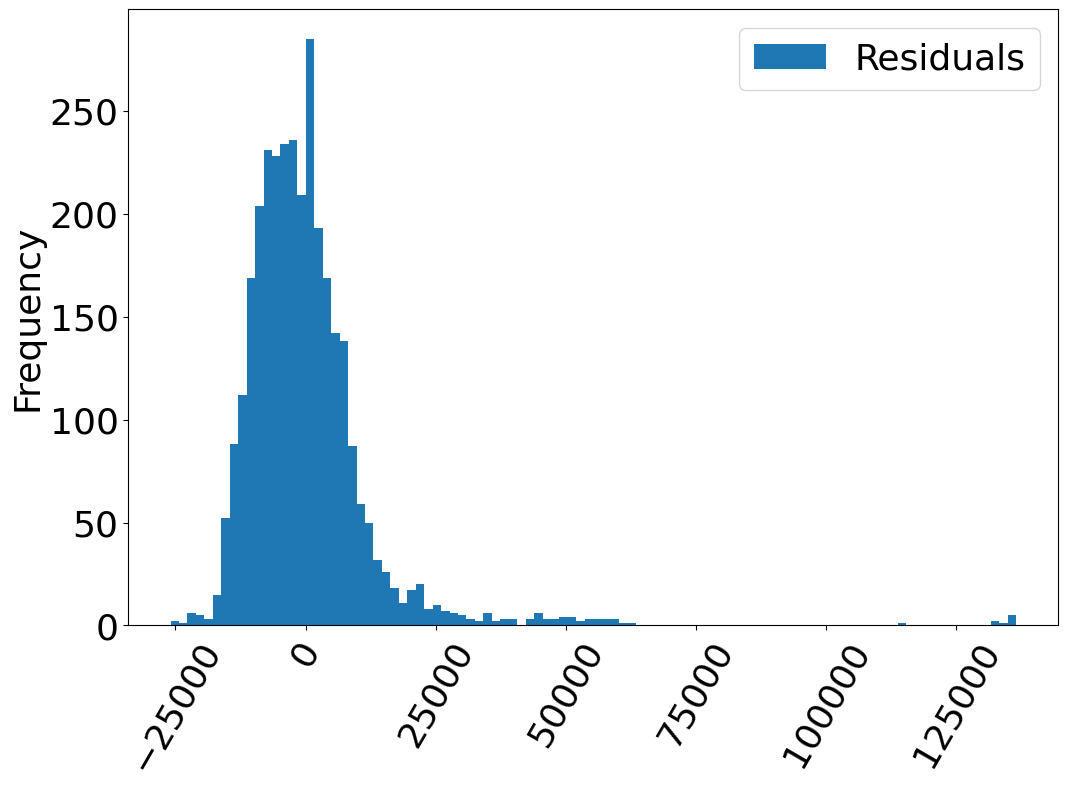

In [35]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.xticks(rotation=60)

<AxesSubplot: ylabel='Frequency'>

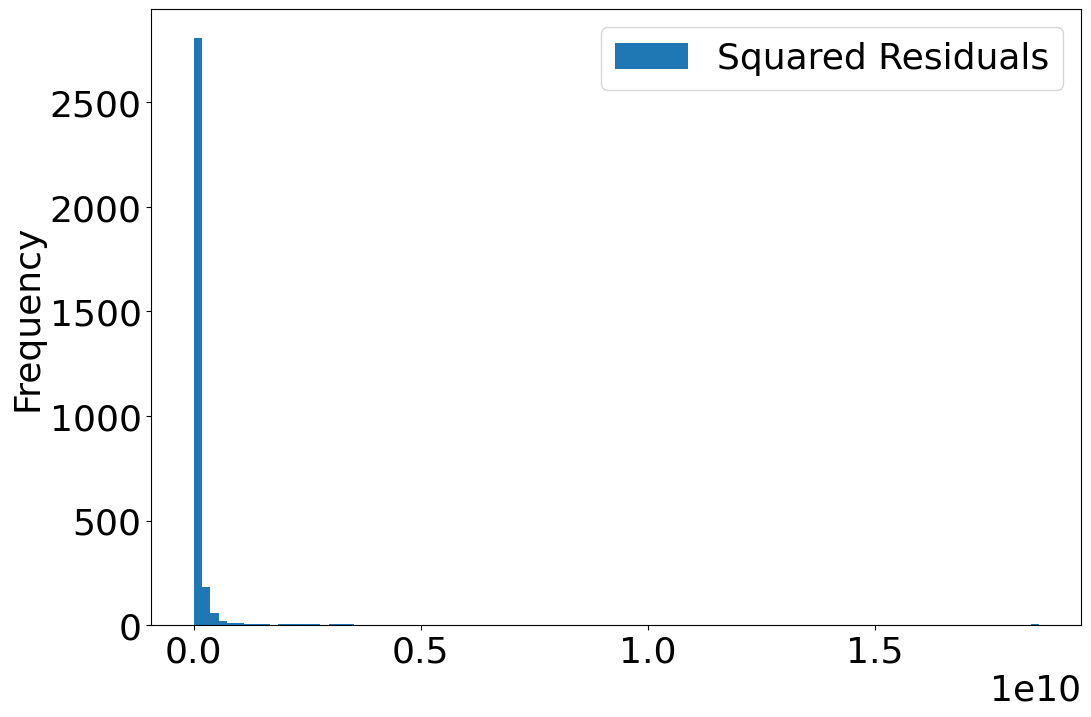

In [36]:
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Squared Residuals"]].plot.hist(bins =100, ax = ax)

## Regression logged differences

To normalize the distribution of errors, we will transform the *real GDP* into the growth rate of real GDP. Since even the growth rate of GDP tends to be autocorrelated, we may control for this using a lag. We will not change any of the scores from the economic freedom index, thus implying that the scores tend to operate on the rate of growth.

In [38]:
years_diff = 5
reg_data = data
reg_data["RGDP Per Capita"] = np.log(data).groupby("ISO_Code_3")["RGDP Per Capita"].diff(years_diff) 
reg_data = reg_data.replace([np.inf, -np.inf], np.nan)
reg_data.loc["USA"]

C:\Users\hthog\AppData\Local\Temp\ipykernel_7688\1196368539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita"] = np.log(data).groupby("ISO_Code_3")["RGDP Per Capita"].diff(years_diff)


Summary  Size of Government  Legal System and Property Rights  \
Year                                                                   
1970  7.615181            5.341231                          8.286741   
1975  7.907324            5.336851                          8.670280   
1980  8.101368            5.788734                          8.684269   
1985  8.295413            6.582616                          8.726823   
1990  8.461126            7.262163                          8.350956   
1995  8.588435            7.446569                          8.587870   
2000  8.648077            7.704726                          8.773170   
2001  8.509072            7.521319                          8.615158   
2002  8.568646            7.673536                          8.370127   
2003  8.558717            7.866283                          8.257379   
2004  8.618290            8.071277                          8.139297   
2005  8.509323            7.892833                          7.937832   
2006  8.509323            7.871725                          7.874278   
2007  8.529298            7.824422                          7.977695   
2008  8.329549            7.274573                          7.908009   
2009  8.049900            6.649408                          7.700352   
2010  8.139787            7.027099                          7.647480   
2011  8.159762            7.202000                          7.491318   
2012  8.259637            7.394264                          7.566832   
2013  8.229674            7.015350                          7.592930   
2014  8.249649            7.239681                          7.652463   
2015  8.309574            7.237673                          7.745733   
2016  8.339536            7.252009                          7.793107   
2017  8.379486            7.354358                          7.802657   
2018  8.279612            7.409095                          7.646530   
2019  8.249649            7.320058                          7.644319   
2020  7.970000            6.790621                          7.555009   

      Sound Money  Freedom to Trade Internationally  Regulation  \
Year                                                              
1970     9.588817                          8.232334    6.631262   
1975     9.067438                          8.412407    8.042706   
1980     9.122306                          8.544966    8.359863   
1985     9.339660                          8.505198    8.335644   
1990     9.669842                          8.537828    8.477998   
1995     9.787931                          8.594211    8.538840   
2000     9.607665                          8.466601    8.739485   
2001     9.612028                          8.397002    8.464019   
2002     9.724310                          8.298912    8.819880   
2003     9.743489                          8.338465    8.662287   
2004     9.753433                          8.378804    8.786829   
2005     9.704102                          8.289870    8.736210   
2006     9.650034                          8.305433    8.861652   
2007     9.605929                          8.329089    8.934012   
2008     9.514924                          8.270653    8.691719   
2009     9.628821                          8.029884    8.259457   
2010     9.684594                          8.015303    8.337193   
2011     9.677635                          8.007558    8.424296   
2012     9.783103                          7.994599    8.571630   
2013     9.824240                          7.964254    8.736168   
2014     9.737154                          7.836022    8.792114   
2015     9.855788                          7.810632    8.891698   
2016     9.814703                          7.889129    8.952382   
2017     9.772320                          7.921225    9.031901   
2018     9.772494                          7.783384    8.784245   
2019     9.747903                          7.829949    8.682216   
2020     9.626843                         

In [39]:
reg_data.dropna()

Summary  Size of Government  \
ISO_Code_3 Year                                 
AGO        2005  4.214590            6.886311   
           2006  4.531179            5.162277   
           2007  4.550966            4.963676   
           2008  4.643633            4.715589   
           2009  5.251115            7.455501   
...                   ...                 ...   
ZWE        2014  5.999147            6.771807   
           2015  6.449595            6.964753   
           2016  6.121996            5.332597   
           2017  5.599886            4.699843   
           2018  5.876298            5.170946   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AGO        2005                          3.129619     1.270081   
           2006                          3.238314     3.807267   
           2007                          3.224507     4.015297   
           2008                          3.382642     4.653201   
           2009                          3.394515     4.901540   
...                                           ...          ...   
ZWE        2014                          3.930143     7.664303   
           2015                          4.108142     7.859669   
           2016                          4.056407     8.086016   
           2017                          4.071445     7.983888   
           2018                          4.041897     7.312324   

                 Freedom to Trade Internationally  Regulation  RGDP Per Capita  
ISO_Code_3 Year                                                                 
AGO        2005                          5.356979    4.511067         0.610758  
           2006                          5.302944    5.118114         0.753131  
           2007                          5.139768    5.348260         0.827968  
           2008                          5.181950    5.185843         0.910956  
           2009                          5.503538    5.007256         0.838529  
...                                           ...         ...              ...  
ZWE        2014                          6.398692    5.039824         0.215452  
           2015                          6.509231    6.555970         0.106888  
           2016                          6.404937    6.520805         0.012463  
           2017                          4.503965    6.399757        -0.013579  
           2018                          6.396649    6.303135         0.004606  

[2719 rows x 7 columns]

In [40]:
r_df = reg_data.dropna(axis = 0, how = "any")
y = r_df[y_var]
X = r_df[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_df["Predictor"] = results.predict()

C:\Users\hthog\AppData\Local\Temp\ipykernel_7688\3386029528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\hthog\AppData\Local\Temp\ipykernel_7688\3386029528.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df["Predictor"] = results.predict()


In [41]:
y, X

(                 RGDP Per Capita
 ISO_Code_3 Year                 
 AGO        2005         0.610758
            2006         0.753131
            2007         0.827968
            2008         0.910956
            2009         0.838529
 ...                          ...
 ZWE        2014         0.215452
            2015         0.106888
            2016         0.012463
            2017        -0.013579
            2018         0.004606
 
 [2719 rows x 1 columns],
                  Legal System and Property Rights  Sound Money  \
 ISO_Code_3 Year                                                  
 AGO        2005                          3.129619     1.270081   
            2006                          3.238314     3.807267   
            2007                          3.224507     4.015297   
            2008                          3.382642     4.653201   
            2009                          3.394515     4.901540   
 ...                                           ...          .

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     22.50
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           2.63e-18
Time:                        12:47:03   Log-Likelihood:                -89.860
No. Observations:                2719   AIC:                             189.7
Df Residuals:                    2714   BIC:                             219.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Legal System and Property Rights     0.0027      0.004      0.626      0.532      -0.006       0.011
Sound Money                         -0.0140      0.004     -3.107      0.002      -0.023      -0.005
Freedom to Trade Internationally     0.0363      0.006      6.302      0.000       0.025       0.048
Regulation                           0.0045      0.006      0.697      0.486      -0.008       0.017
Constant                            -0.0051      0.032     -0.160      0.873      -0.068       0.057
==============================================================================
Omnibus:                      841.845   Durbin-Watson:                   0.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6097.661
Skew:                           1.270   Prob(JB):                         0.00
Kurtosis:                       9.883   Cond. No.                         93.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\hthog\AppData\Local\Temp\ipykernel_7688\3043588271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df["Residuals"] = results.resid


<AxesSubplot: ylabel='Frequency'>

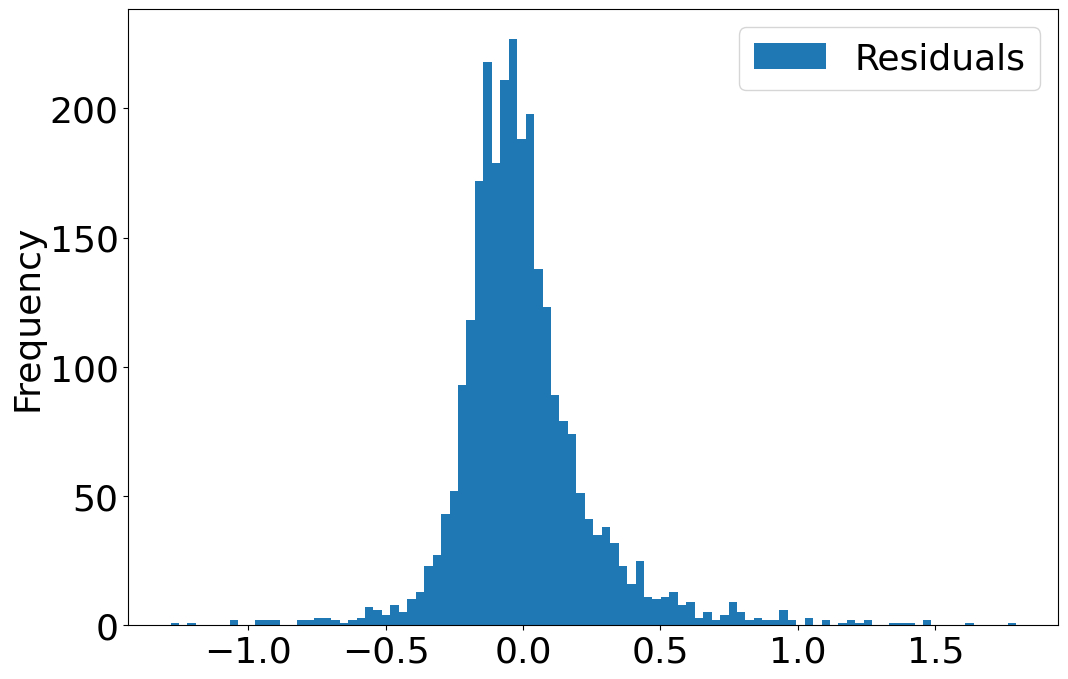

In [43]:
r_df["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))
r_df[["Residuals"]].plot.hist(bins = 100, ax = ax)

In [44]:
betaEstimates = results.params
tStats = results.tvalues
pValues = results.pvalues
stdErrors = results.bse

resultsDict = {"Beta Estimates" : betaEstimates,
              "t-stats":tStats,
              "p-values":pValues,
              "Standard Errors":stdErrors}
resultsDF = pd.DataFrame(resultsDict)
resultsDF.round(3)

Beta Estimates  t-stats  p-values  \
Legal System and Property Rights           0.003    0.626     0.532   
Sound Money                               -0.014   -3.107     0.002   
Freedom to Trade Internationally           0.036    6.302     0.000   
Regulation                                 0.005    0.697     0.486   
Constant                                  -0.005   -0.160     0.873   

                                  Standard Errors  
Legal System and Property Rights            0.004  
Sound Money                                 0.004  
Freedom to Trade Internationally            0.006  
Regulation                                  0.006  
Constant                                    0.032

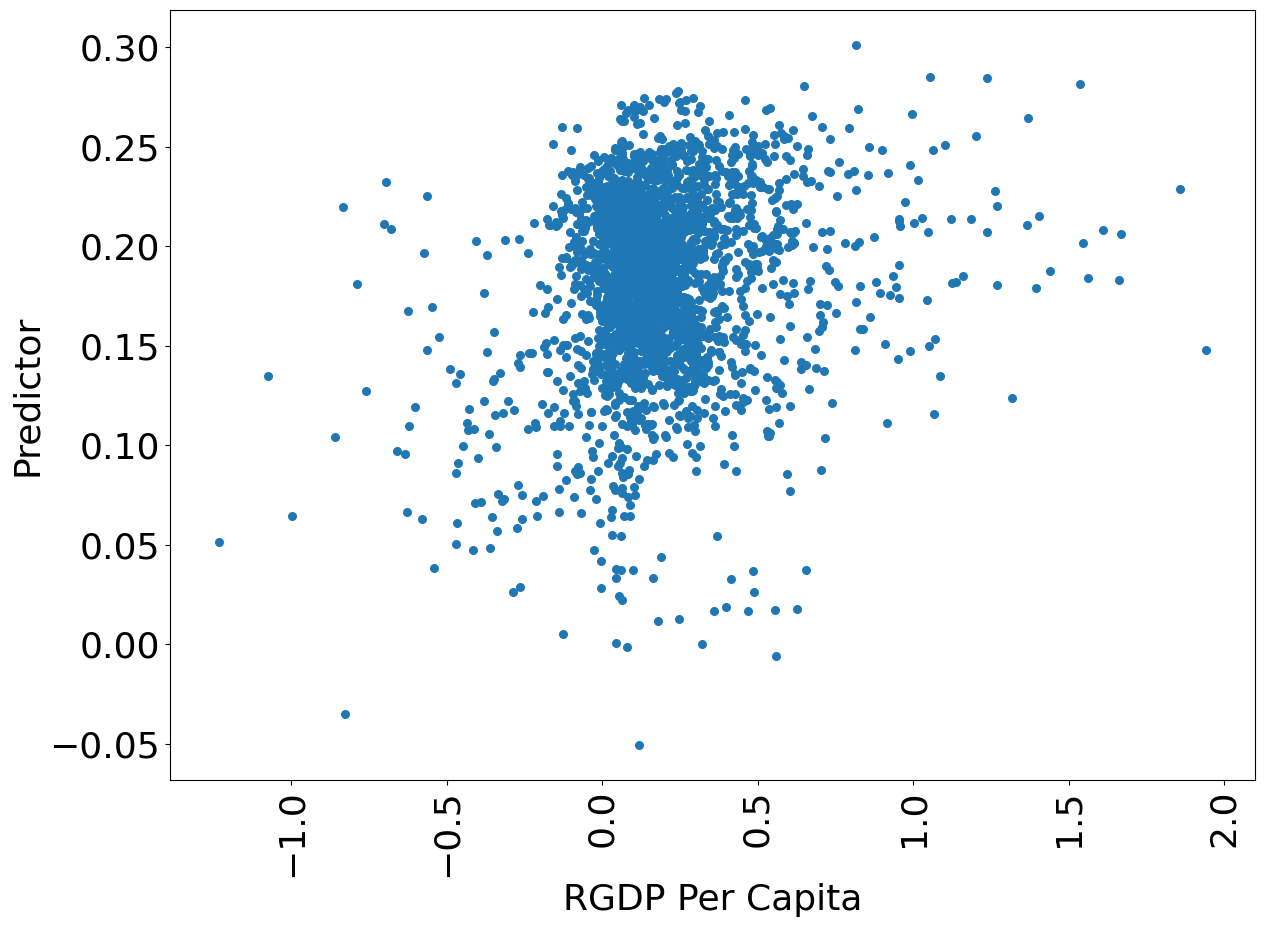

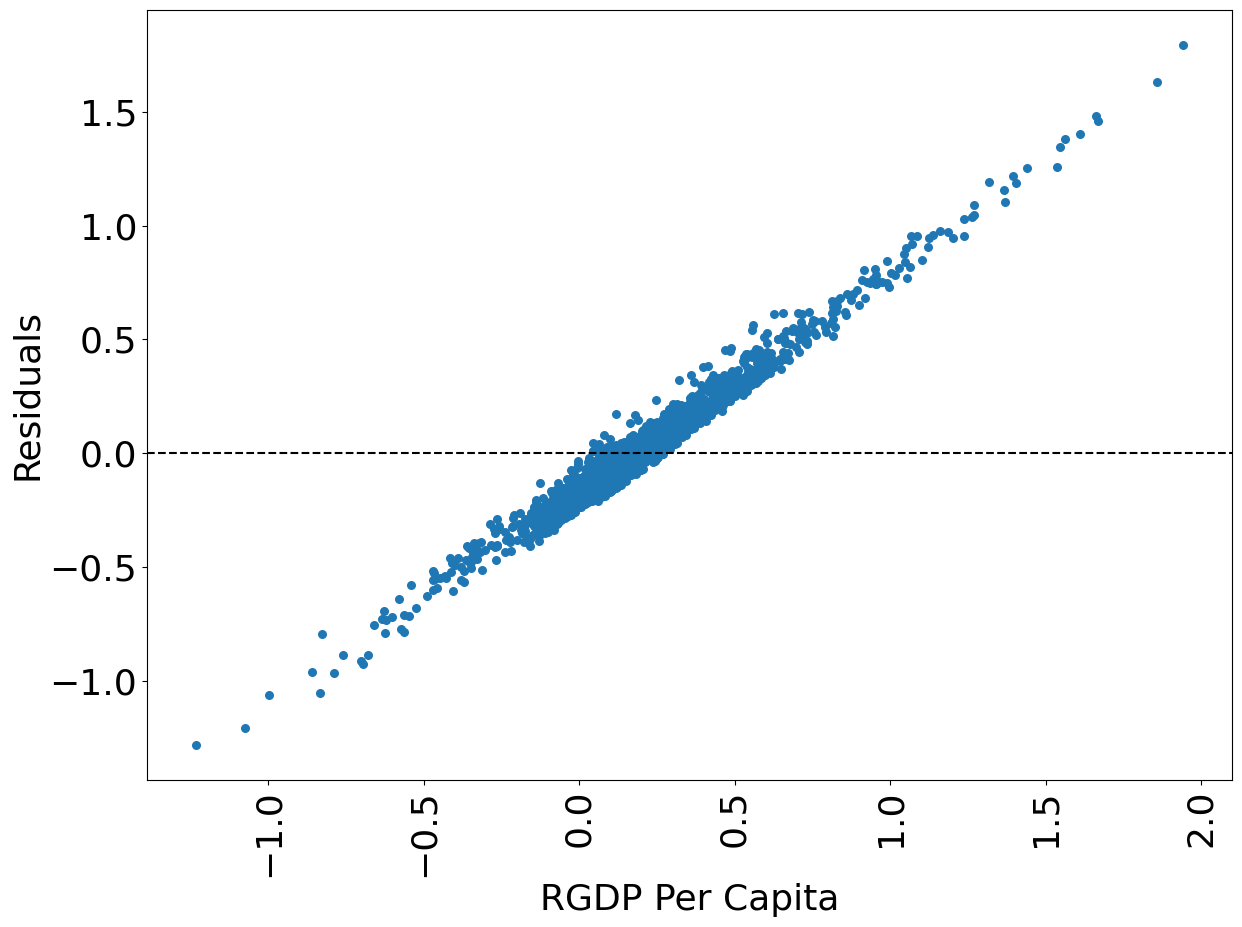

In [45]:
fig, ax = plt.subplots(figsize = (14,10))
r_df.plot.scatter(x = y_var[0],
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_df.plot.scatter(x = y_var[0],
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

In [46]:
countries = r_df.groupby("ISO_Code_3").mean().index
plot_data = r_df[y_var + ["Predictor"]]
for key in plot_data:
    plot_data[key] = plot_data[key] + 1
plot_data

C:\Users\hthog\AppData\Local\Temp\ipykernel_7688\1991247305.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data[key] = plot_data[key] + 1


RGDP Per Capita  Predictor
ISO_Code_3 Year                            
AGO        2005         1.610758   1.200680
           2006         1.753131   1.166337
           2007         1.827968   1.158513
           2008         1.910956   1.150834
           2009         1.838529   1.158264
...                          ...        ...
ZWE        2014         1.215452   1.153797
           2015         1.106888   1.162443
           2016         1.012463   1.155194
           2017         0.986421   1.087104
           2018         1.004606   1.164671

[2719 rows x 2 columns]

C:\Users\hthog\AppData\Local\Temp\ipykernel_7688\29349493.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = (12,8))


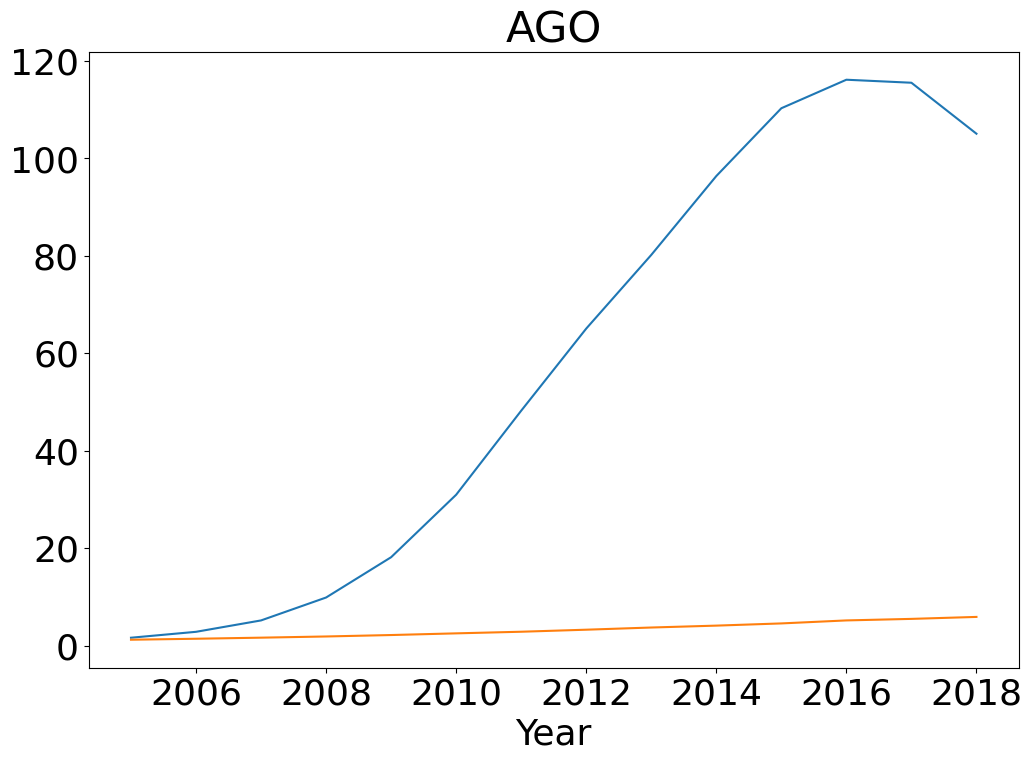

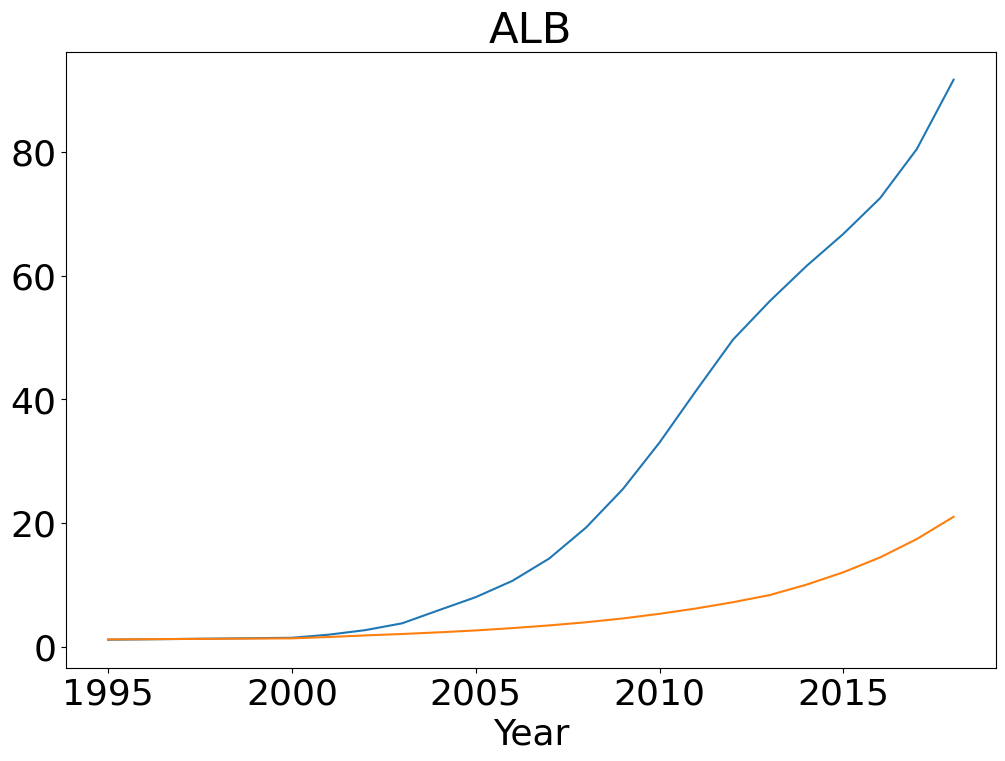

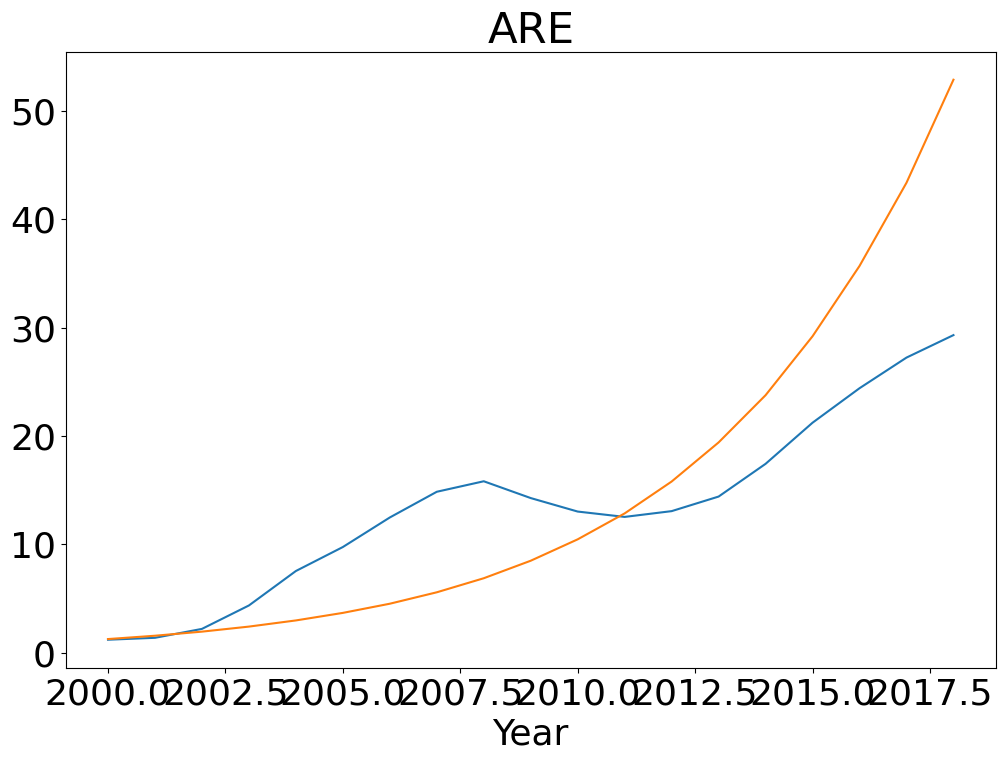

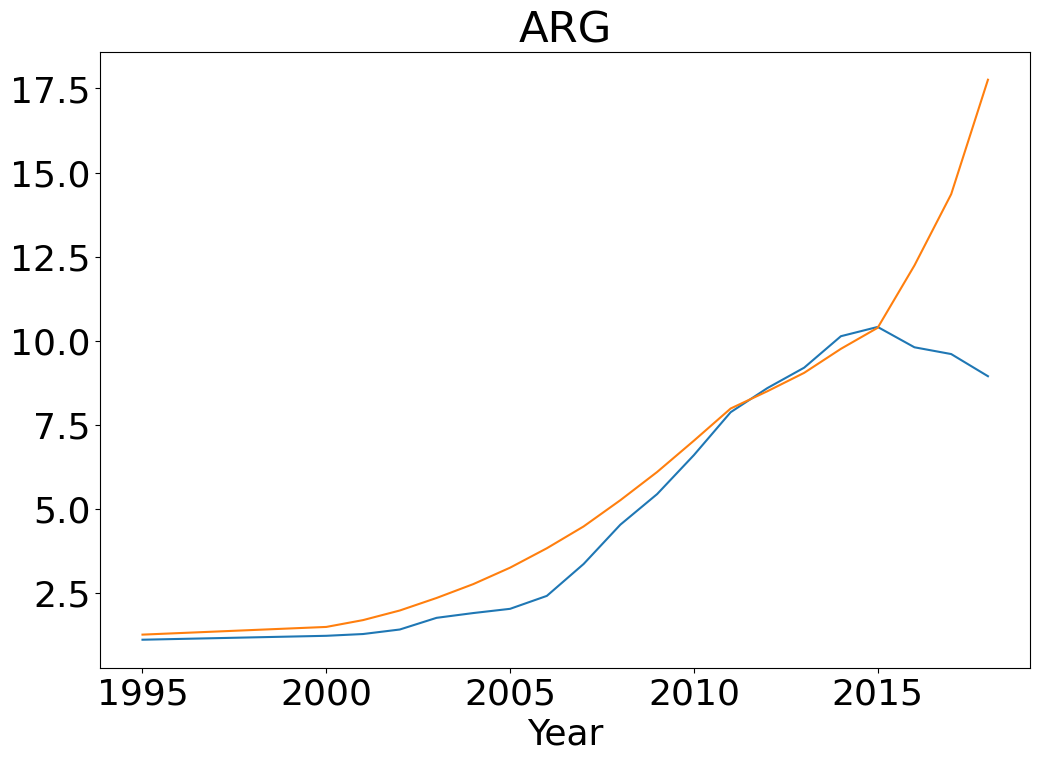

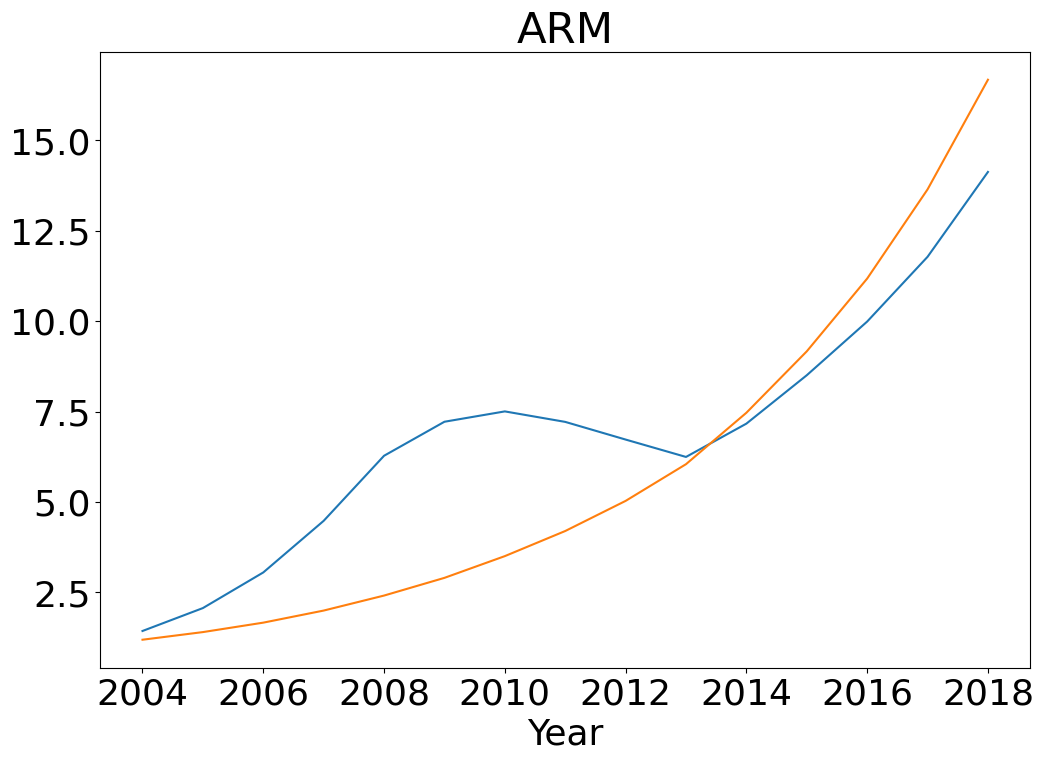

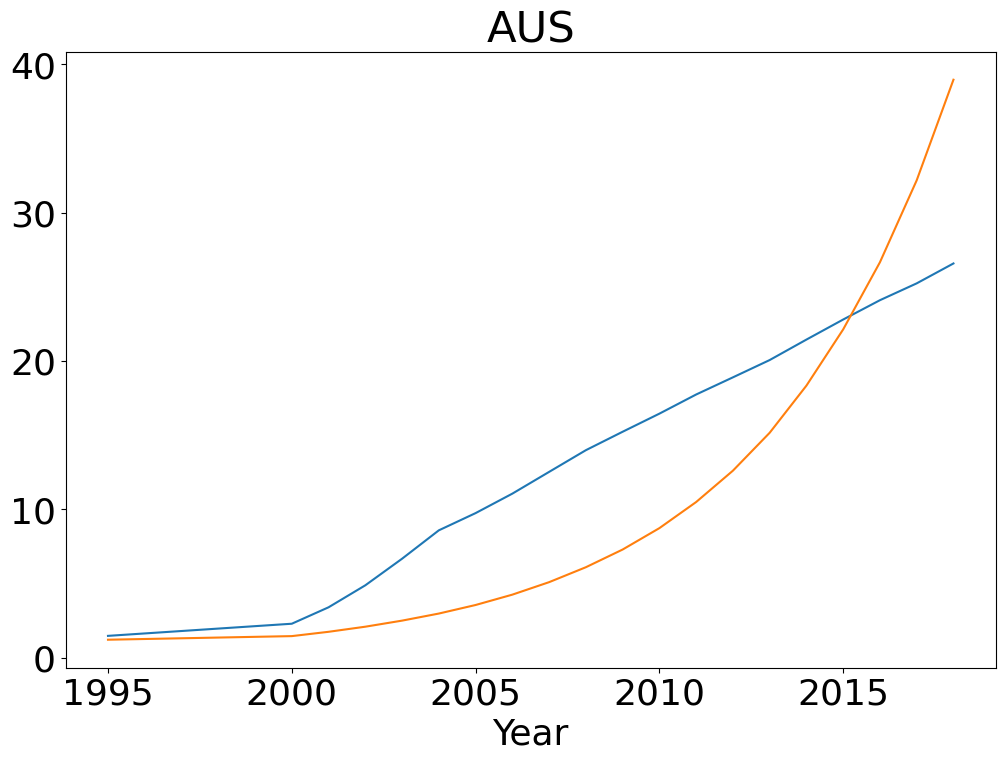

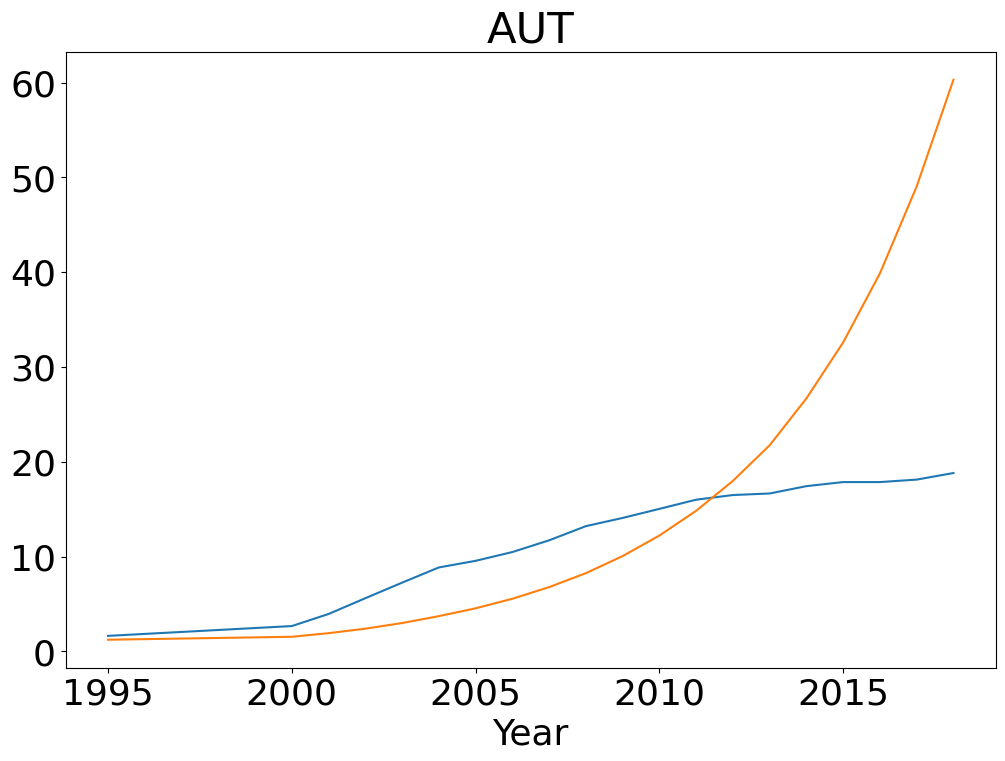

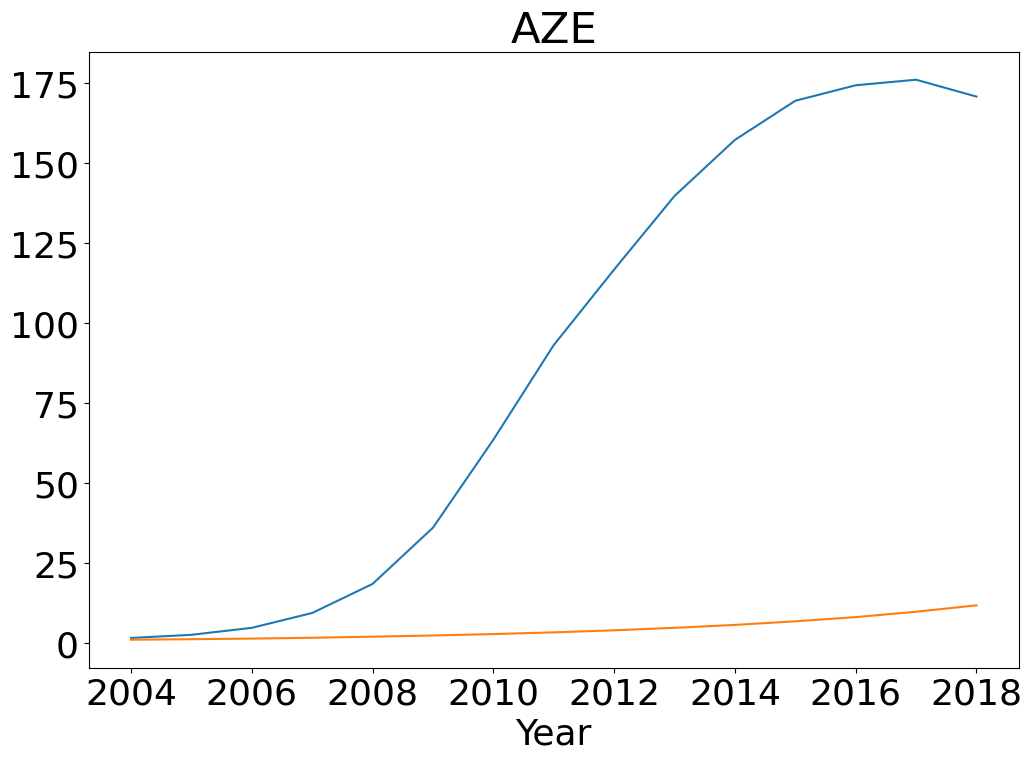

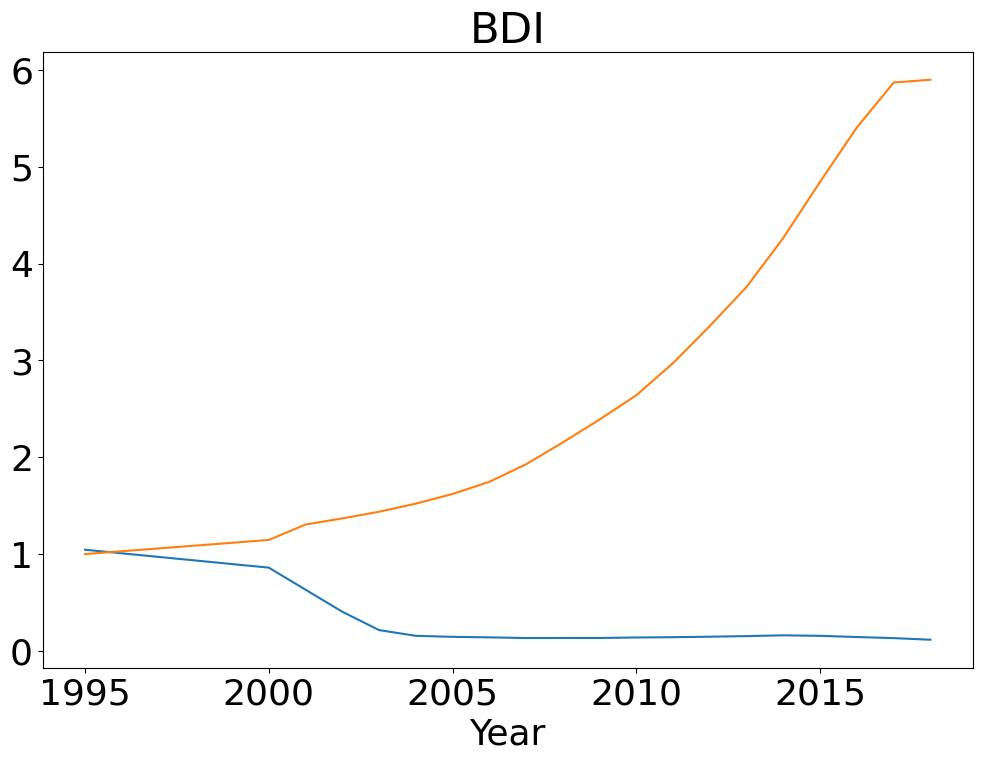

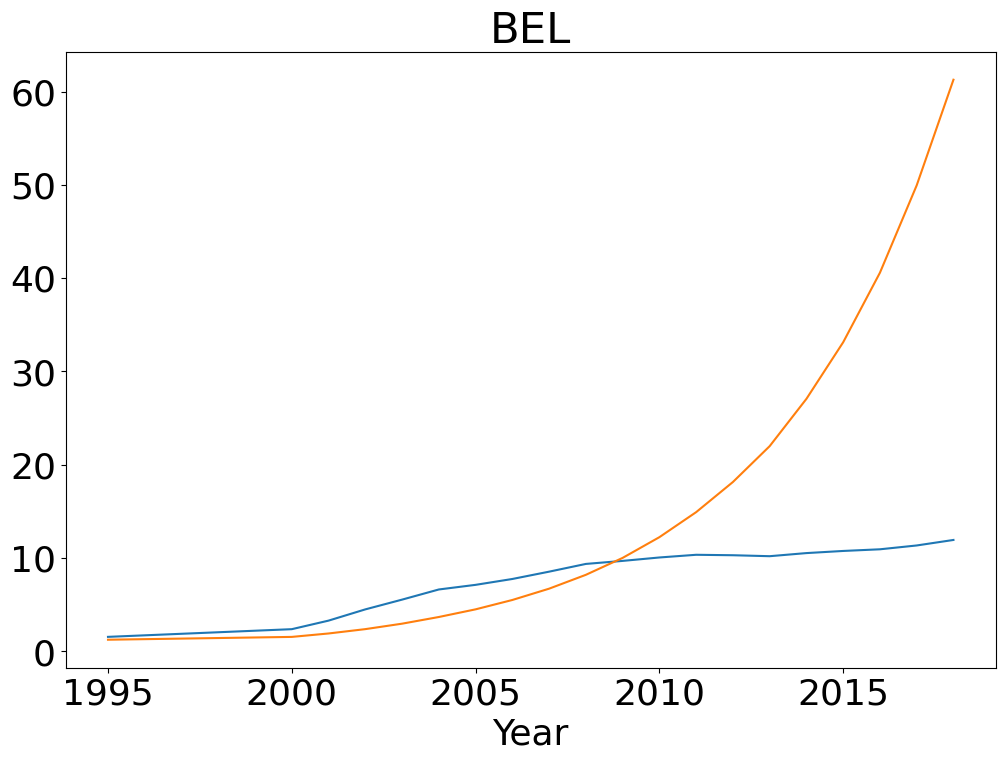

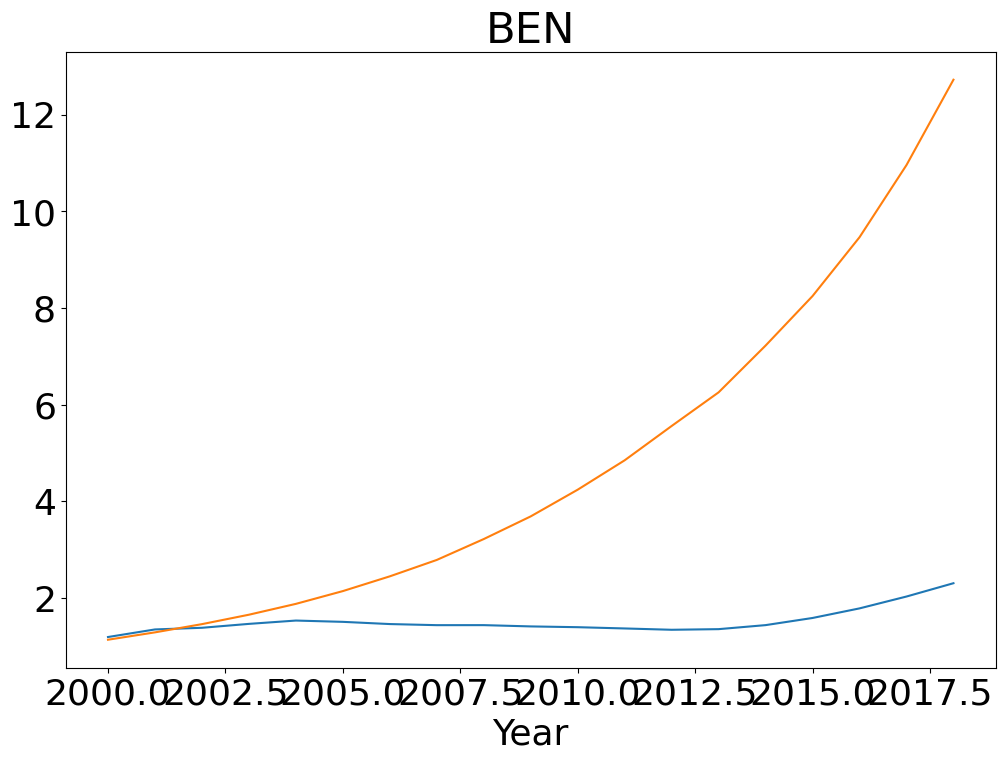

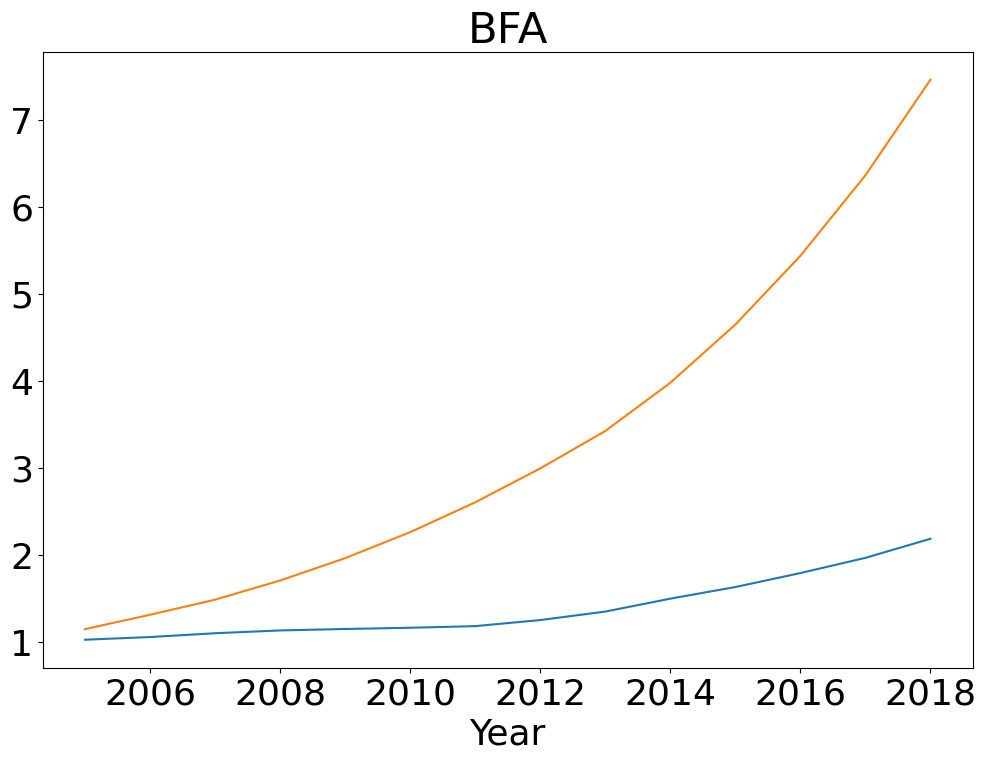

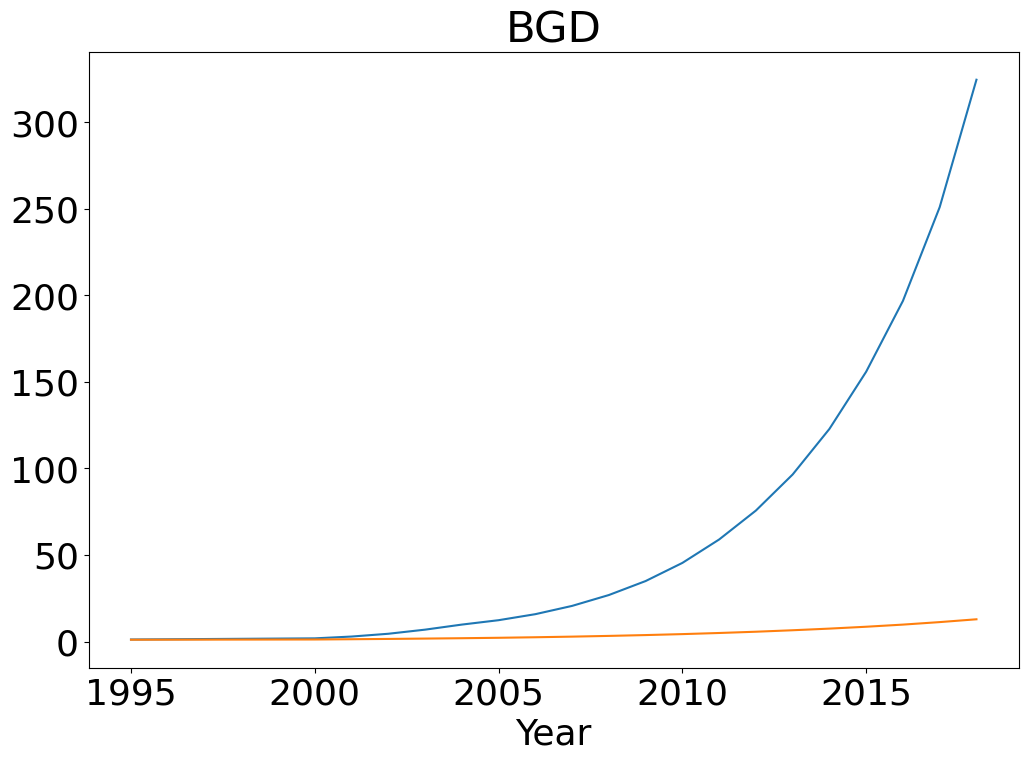

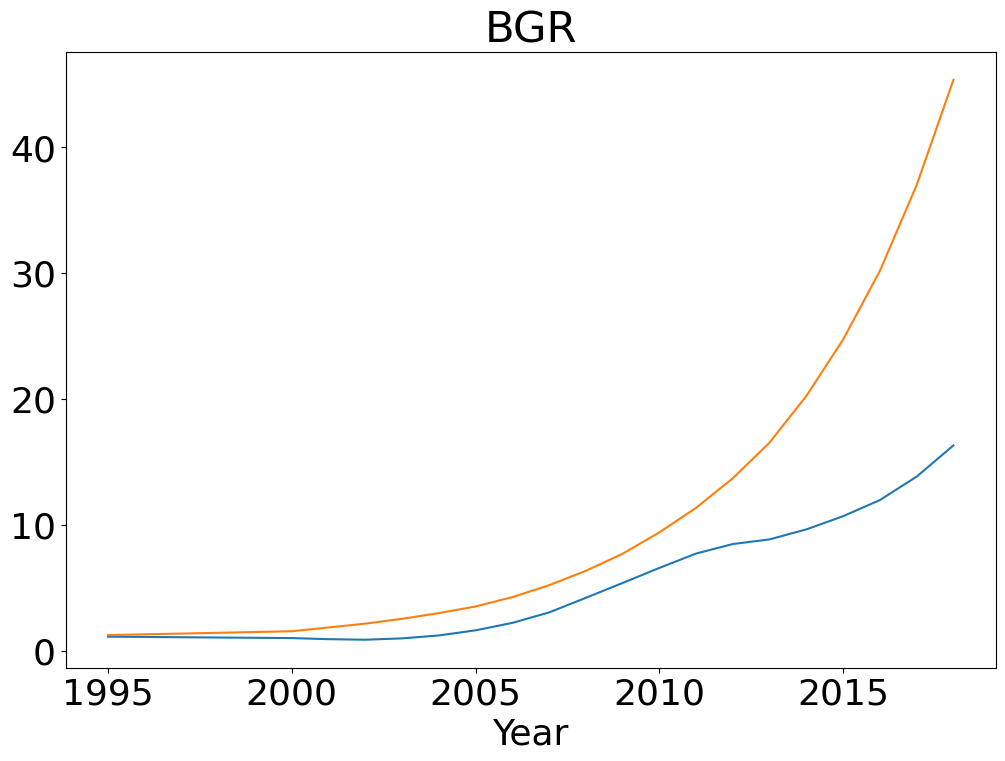

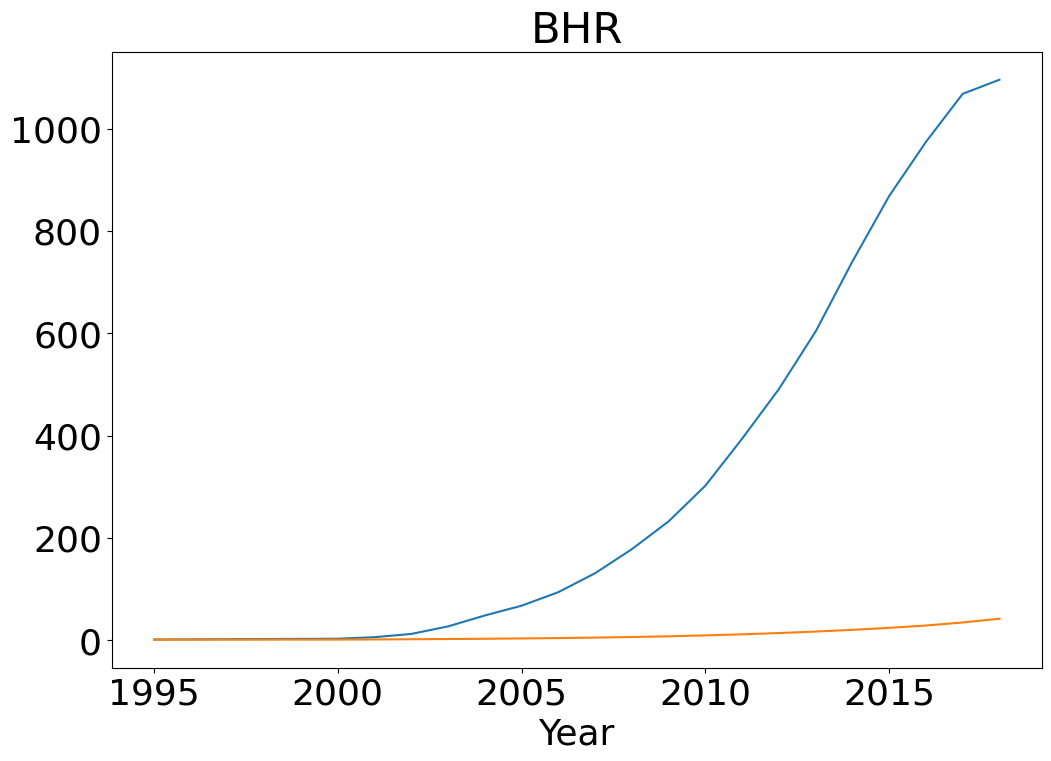

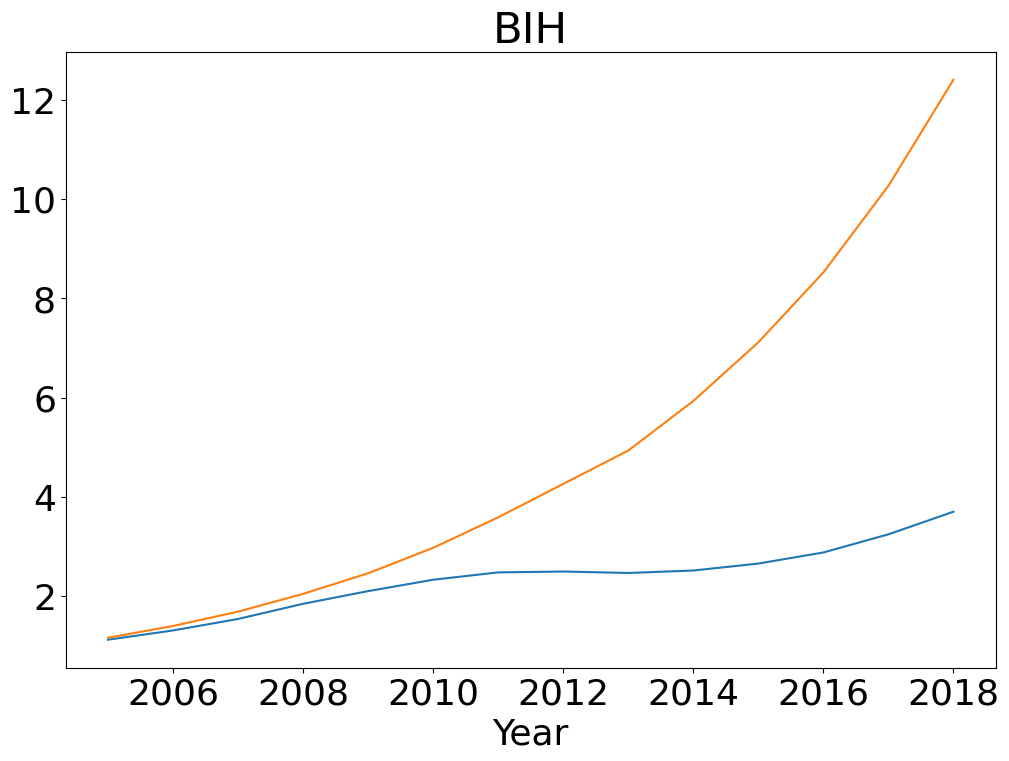

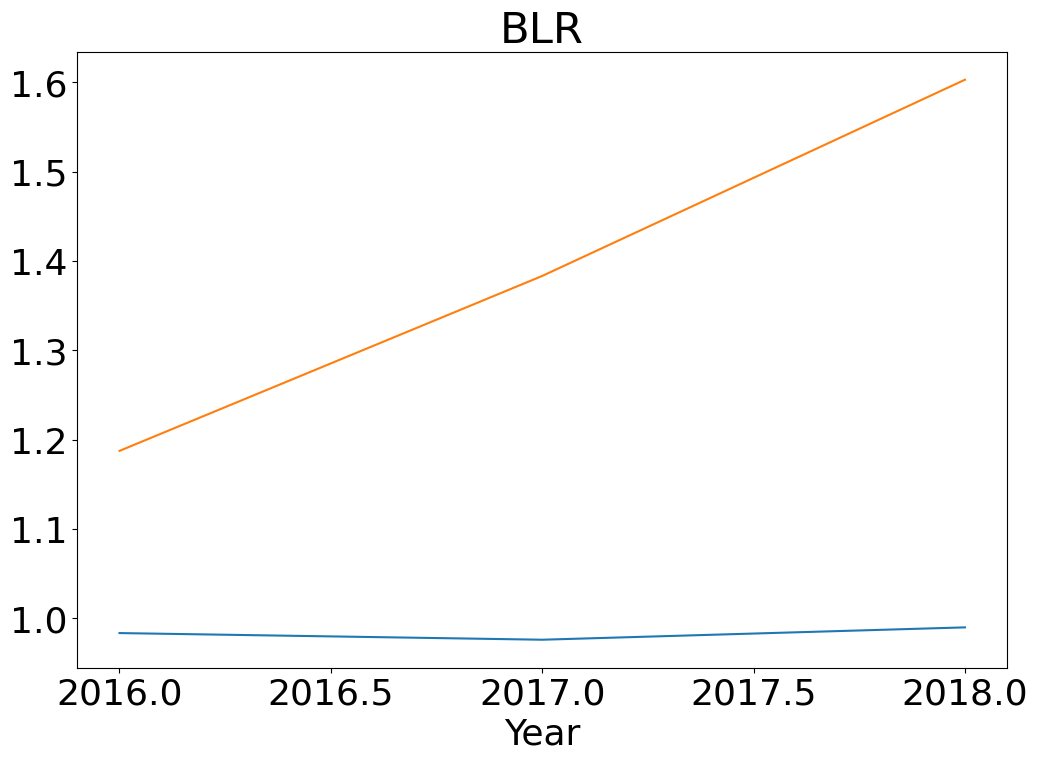

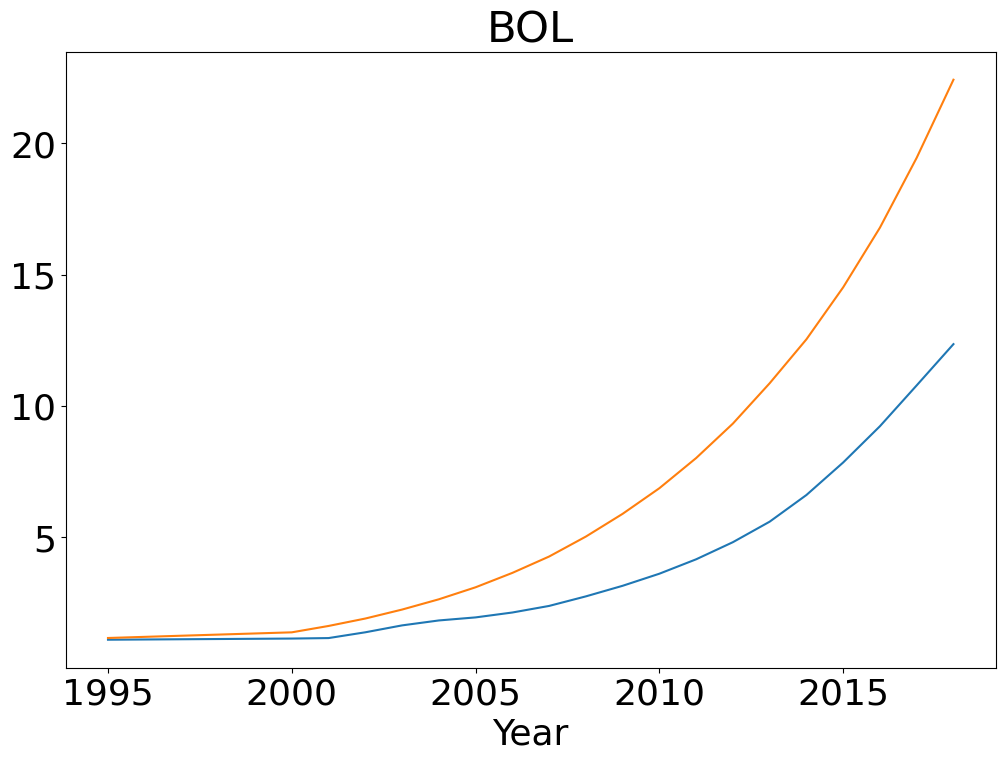

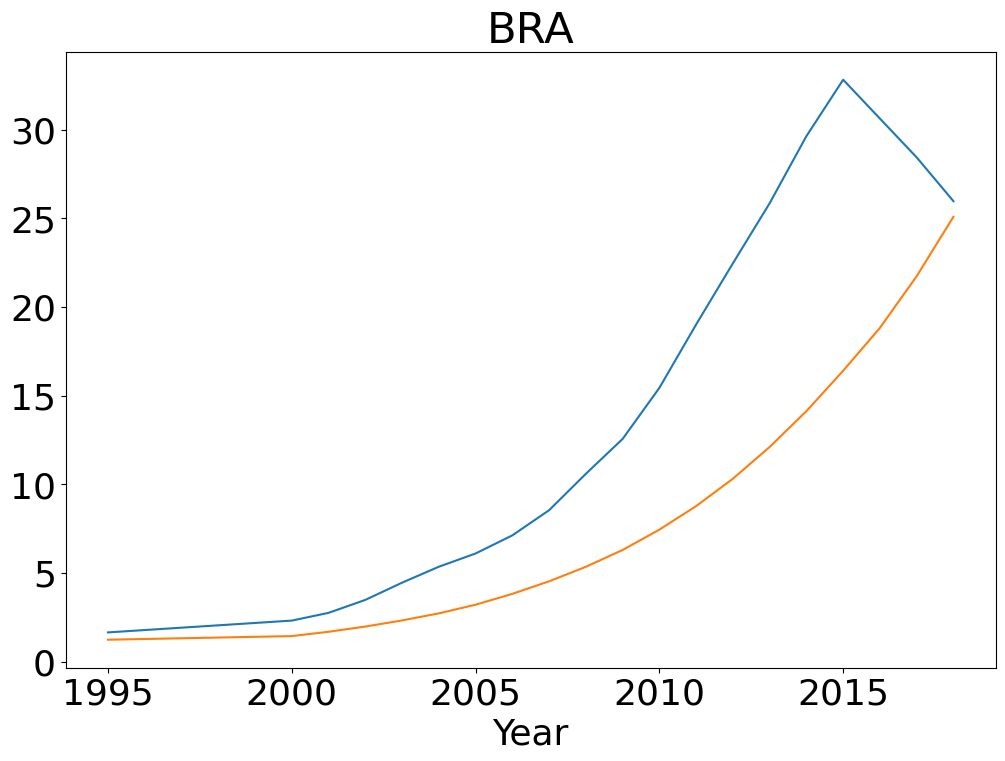

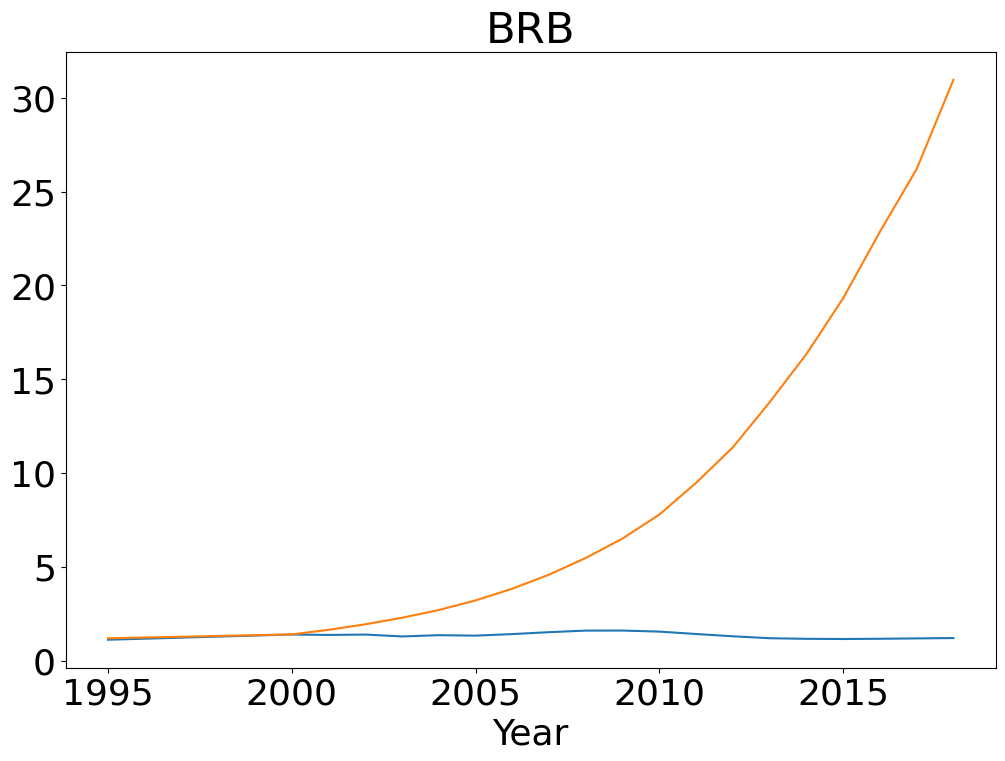

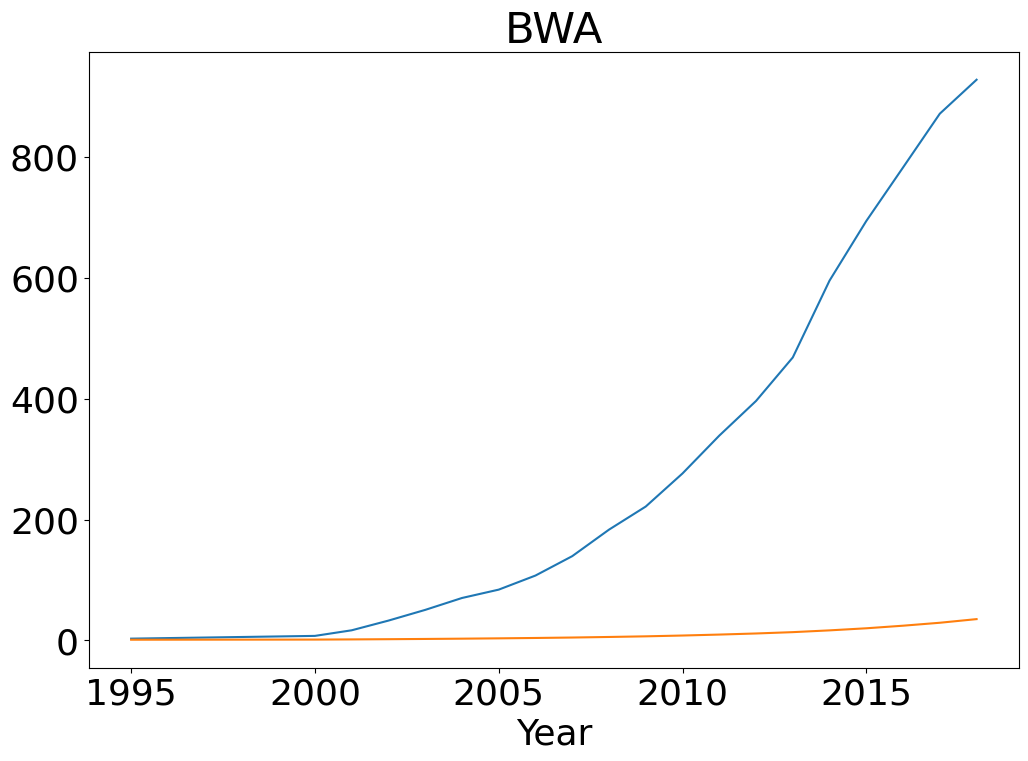

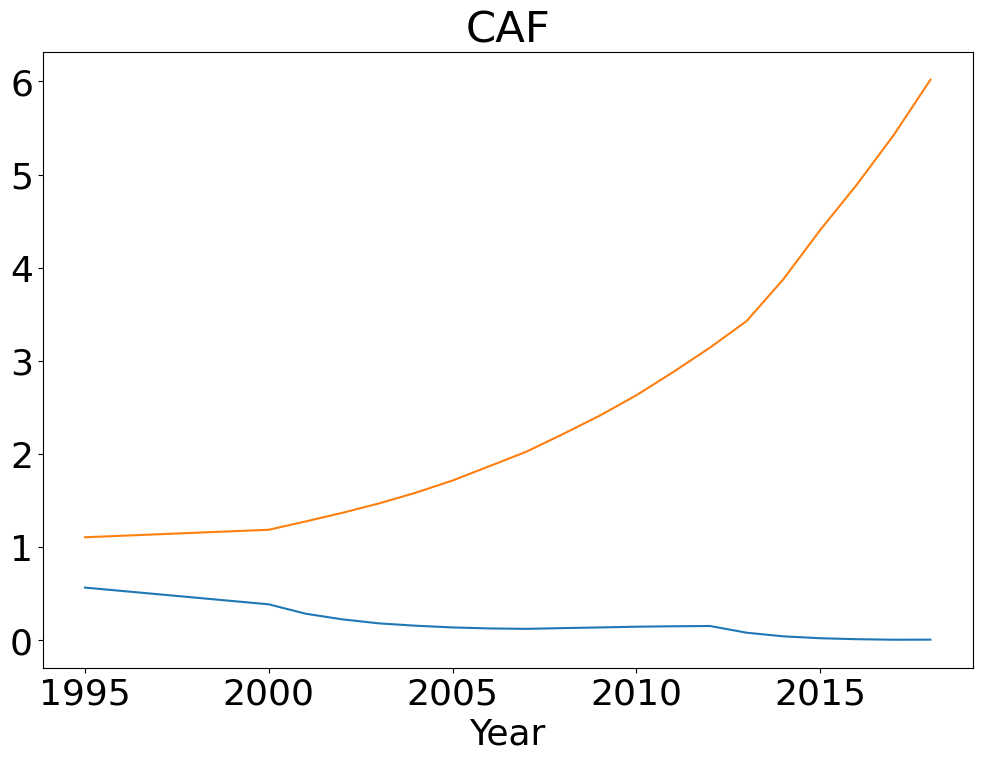

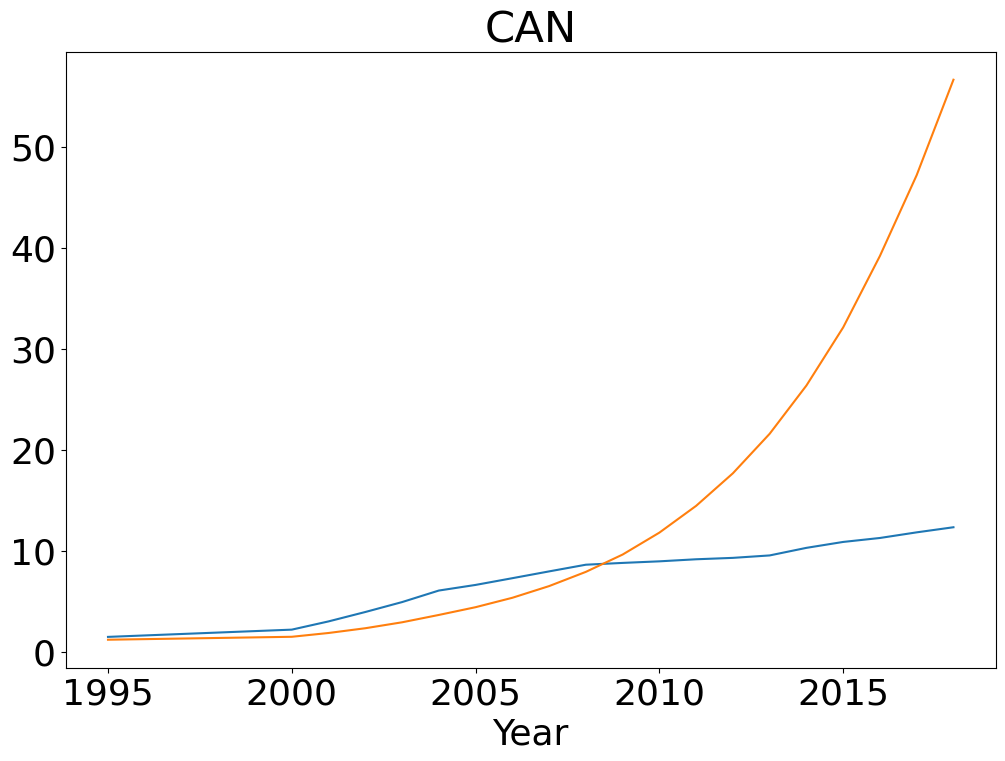

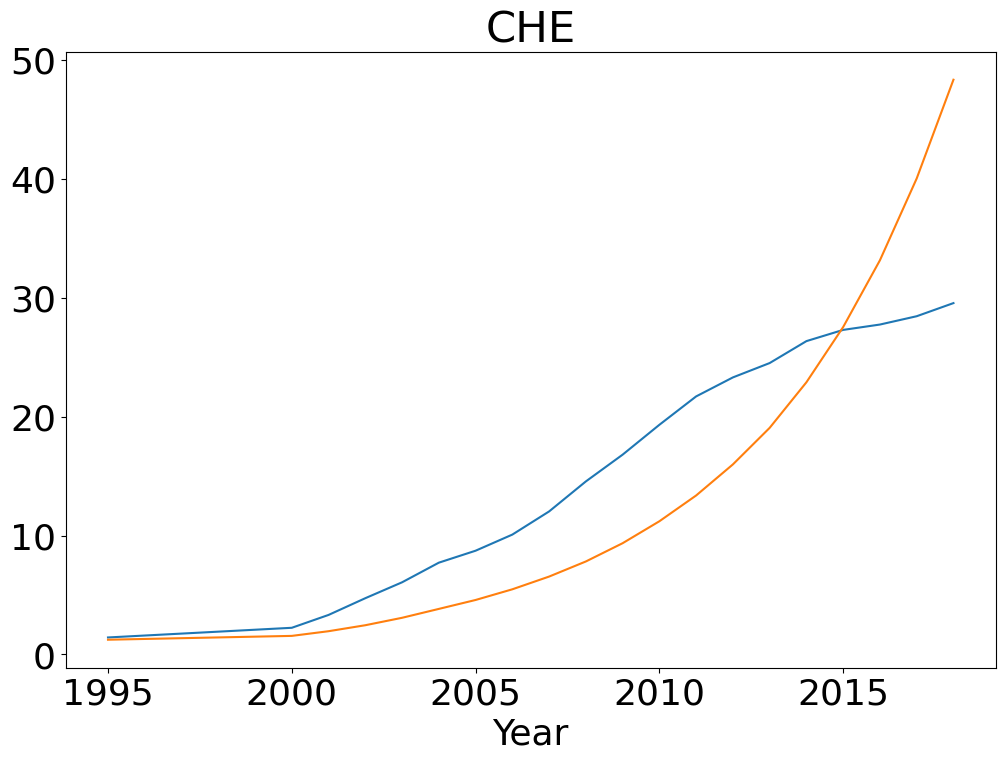

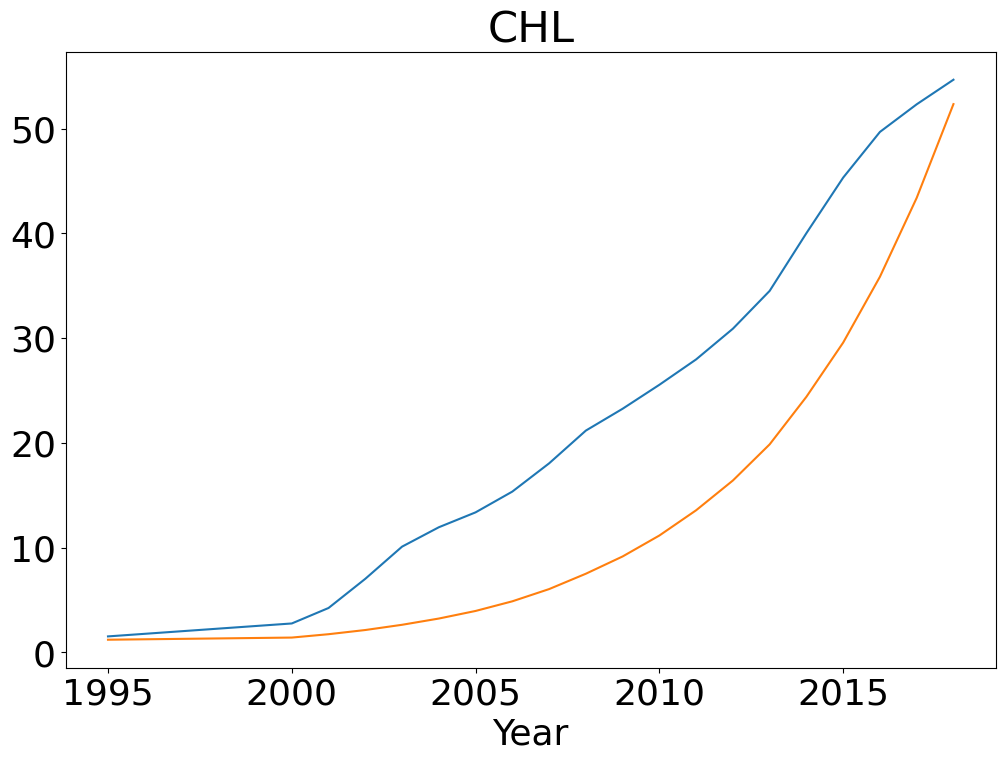

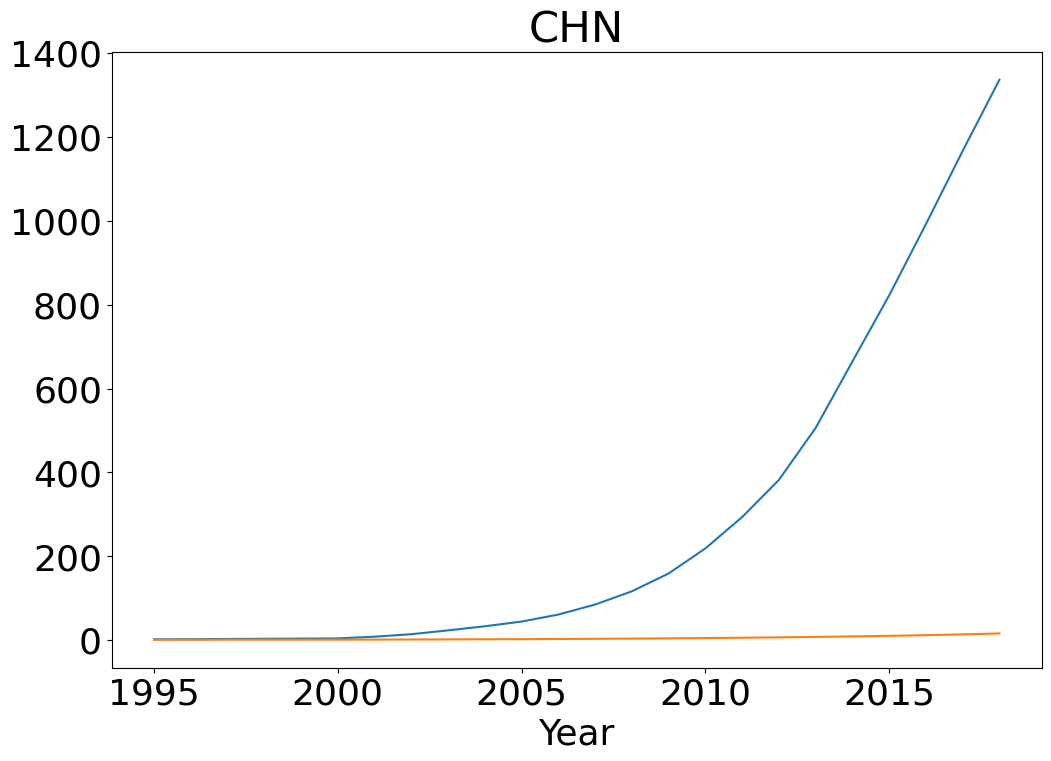

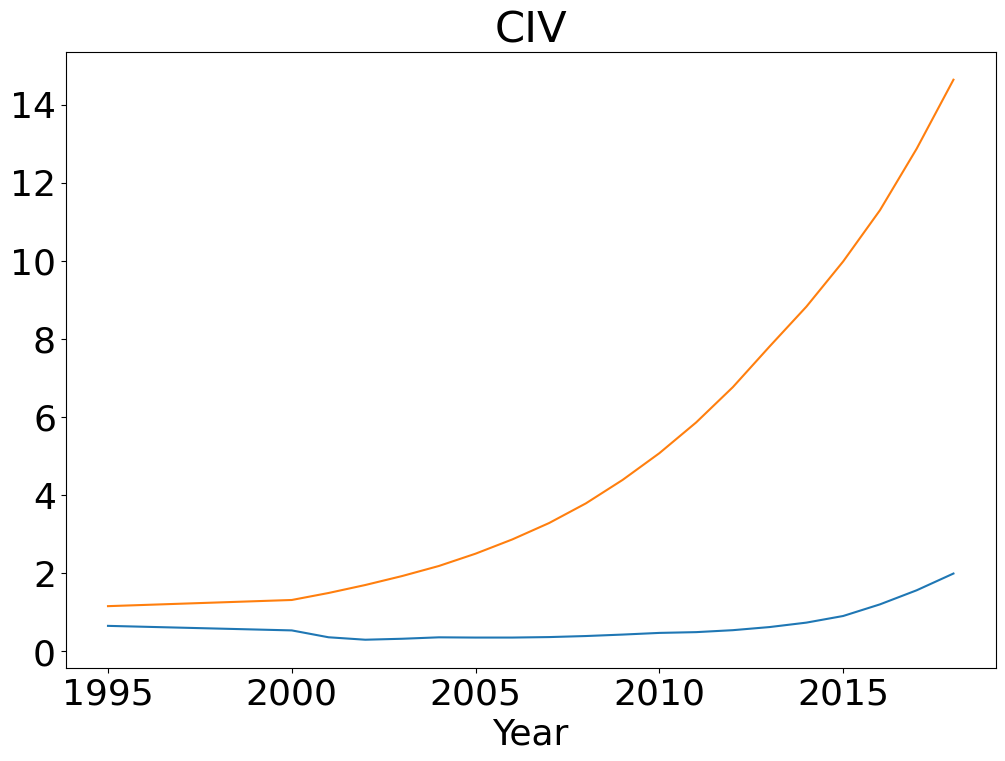

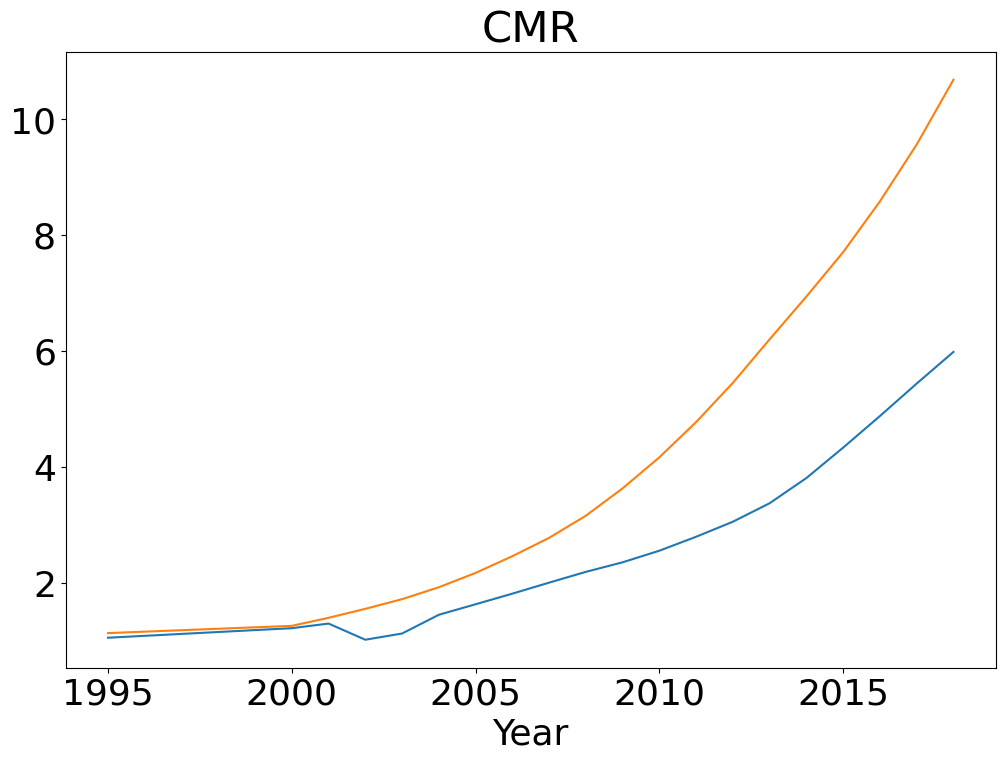

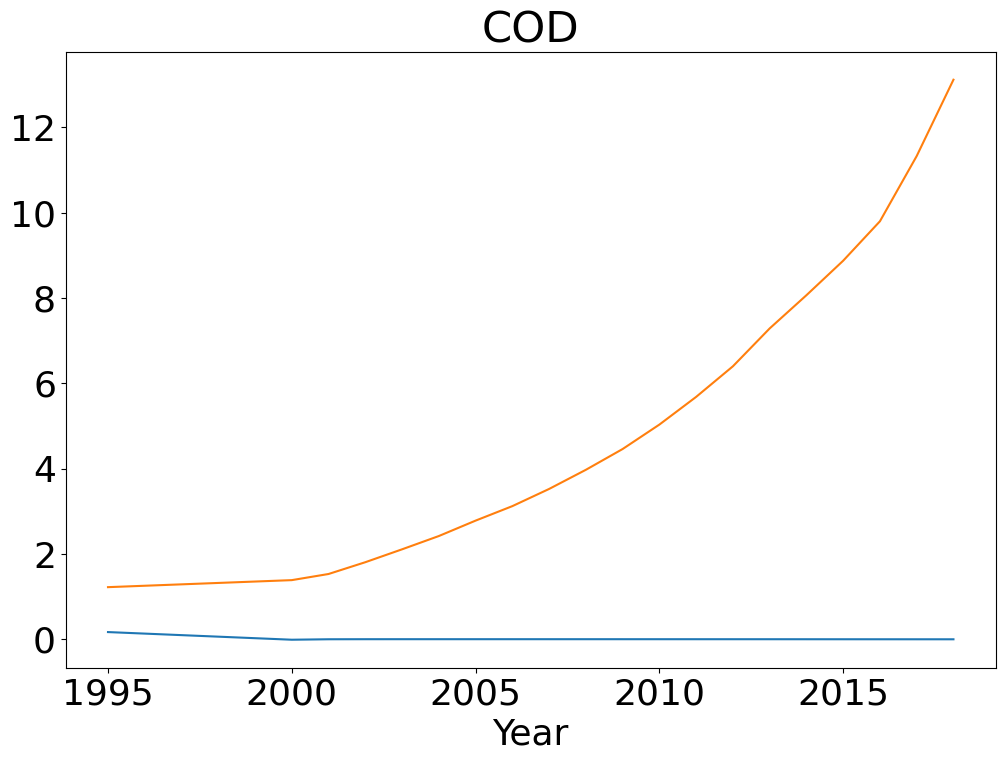

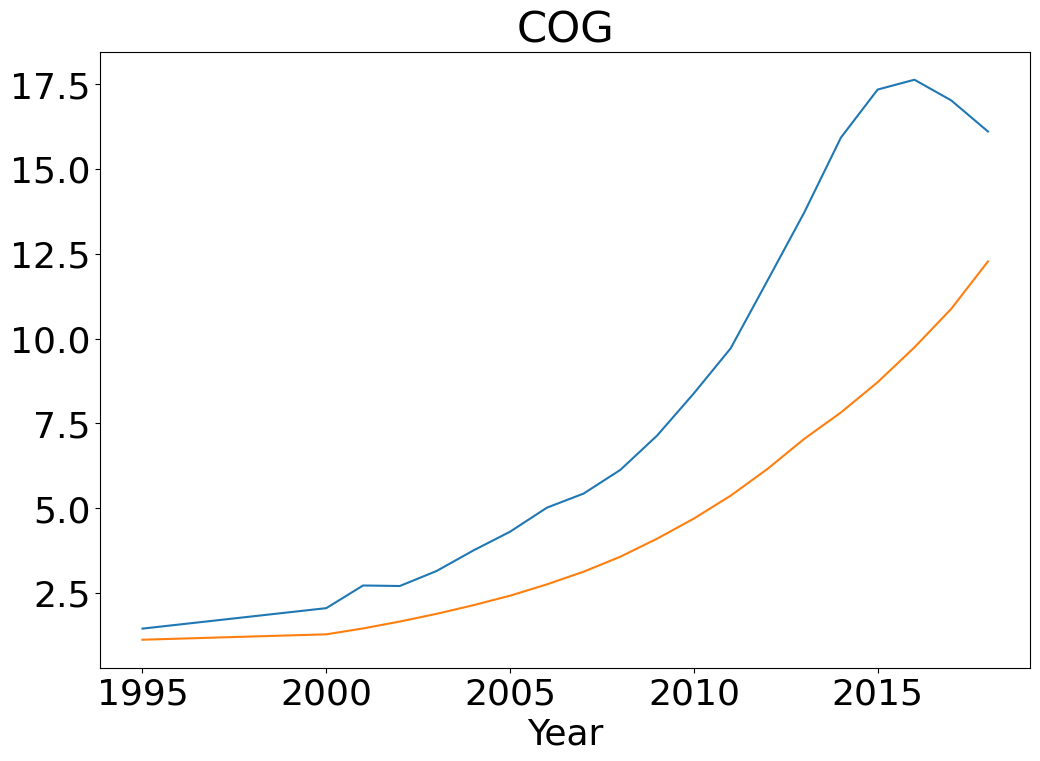

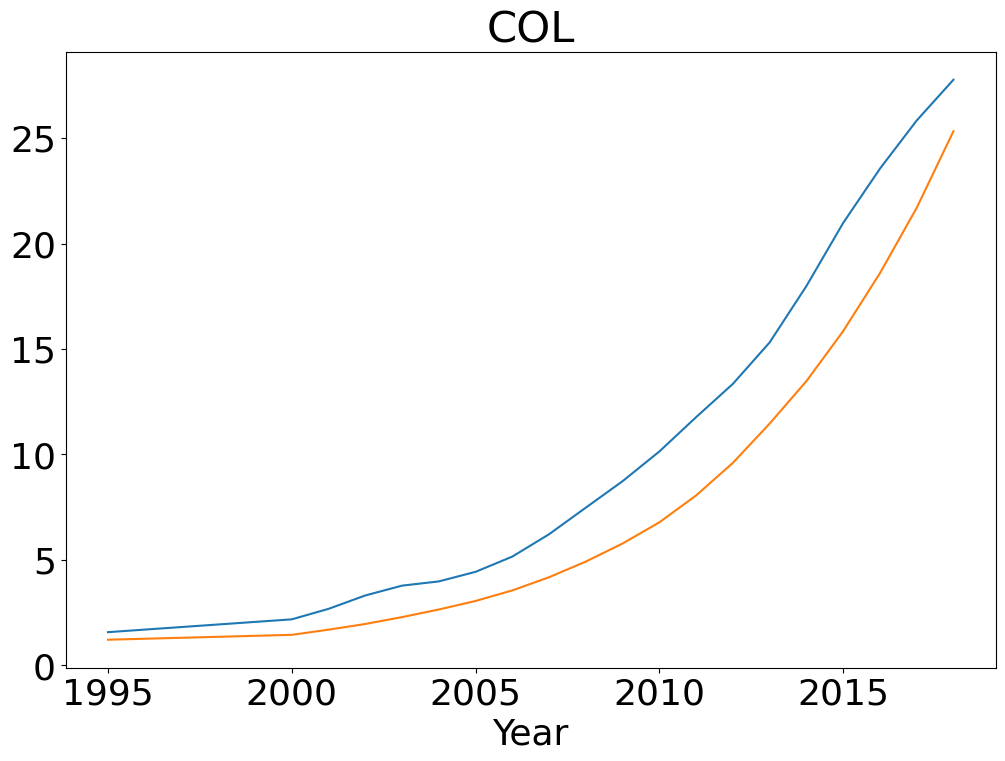

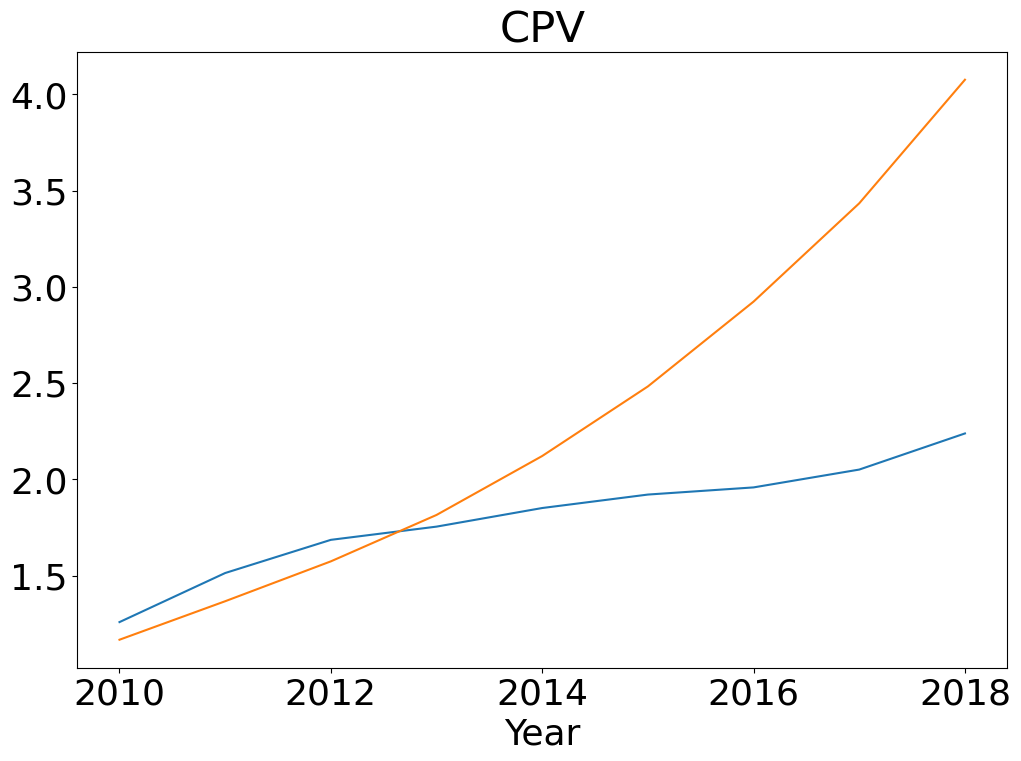

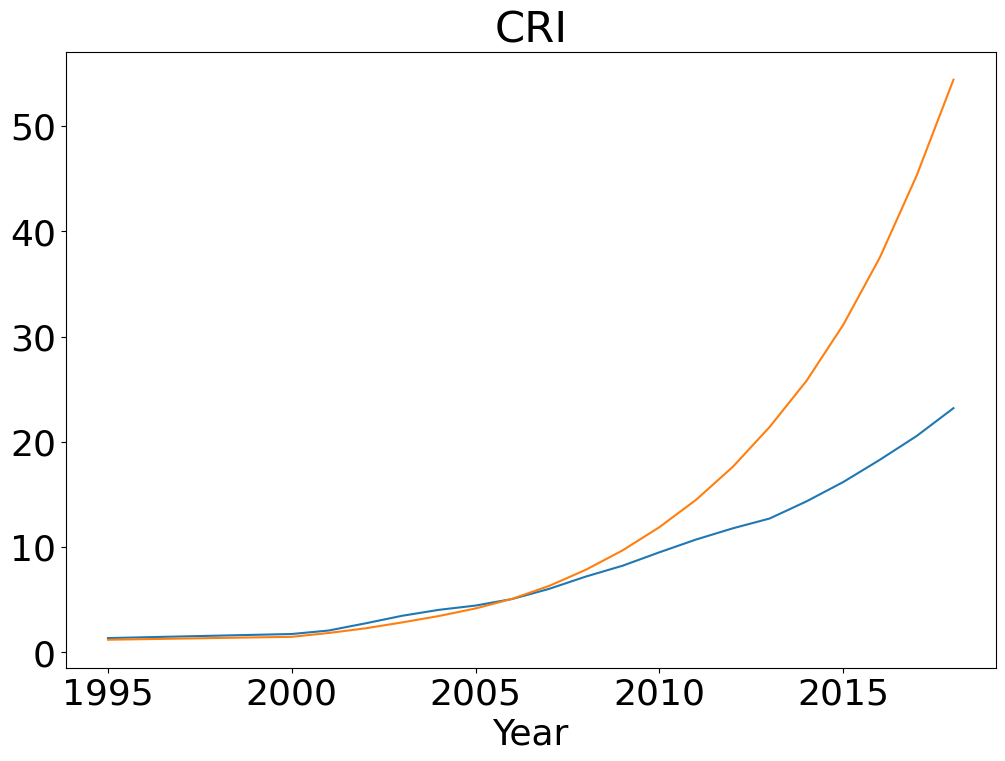

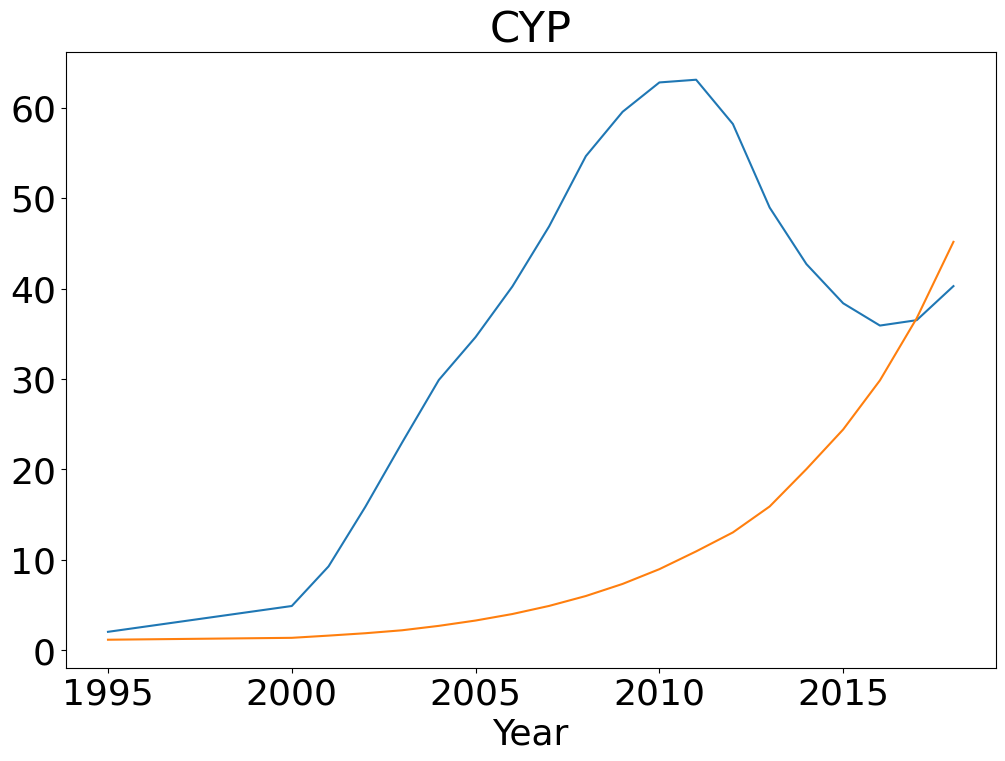

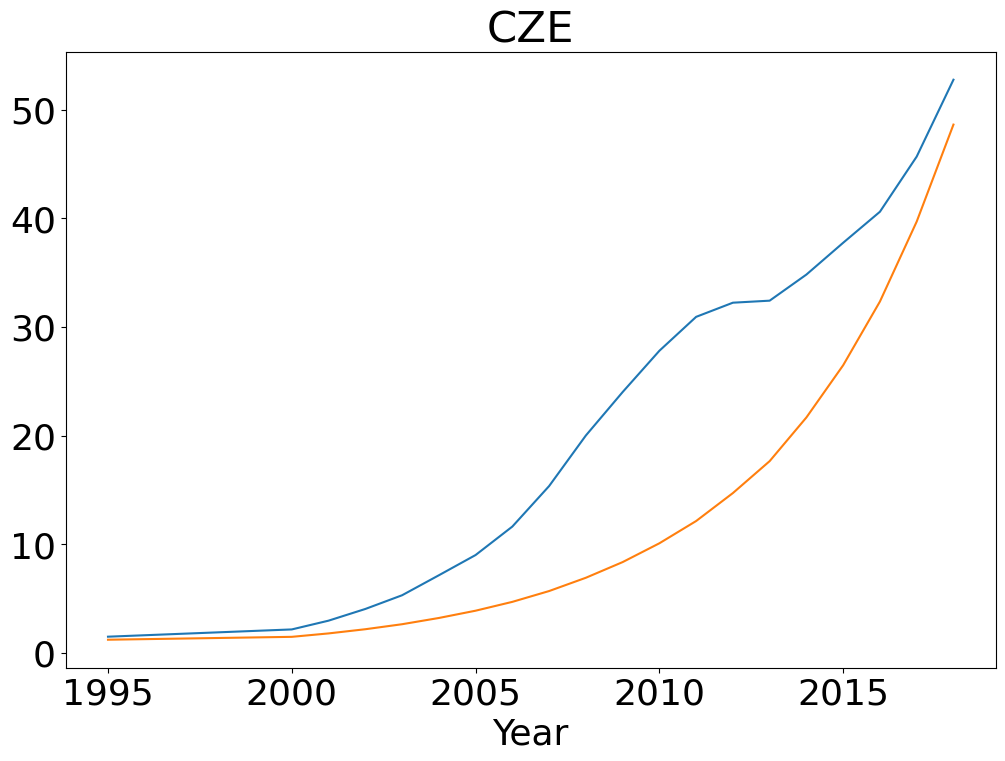

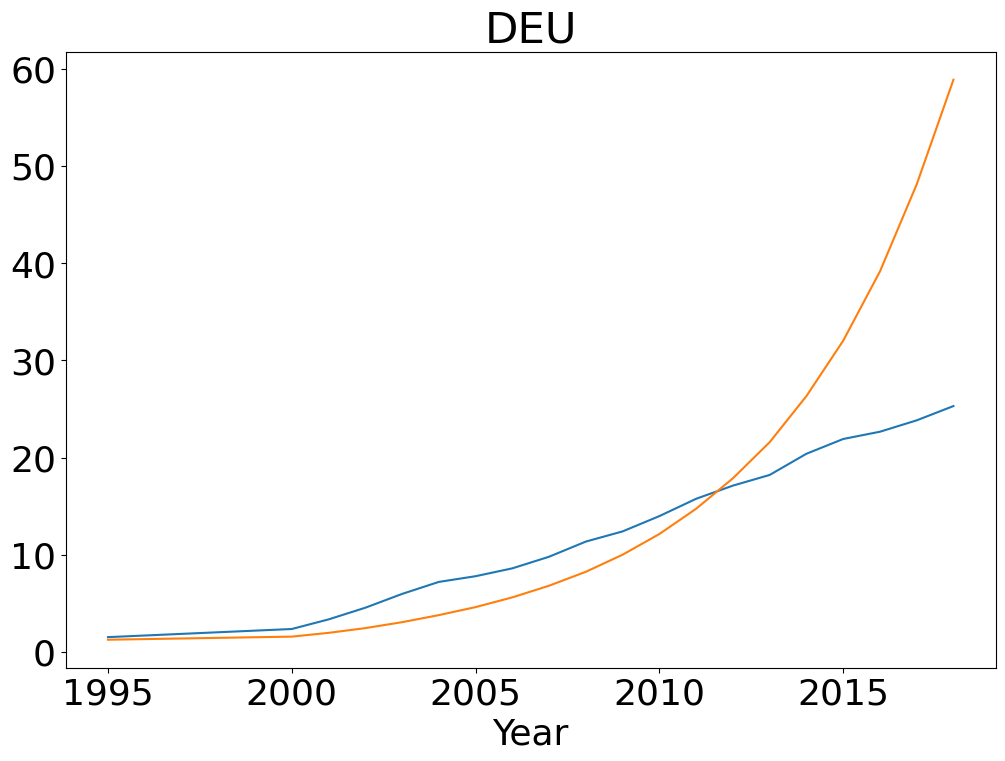

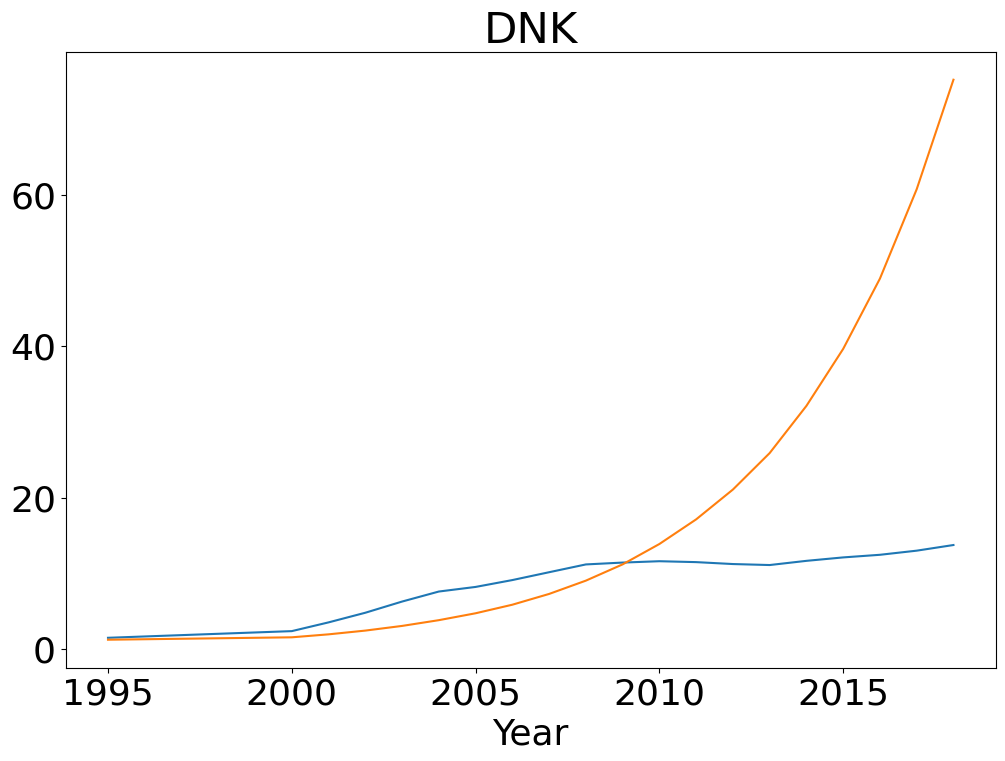

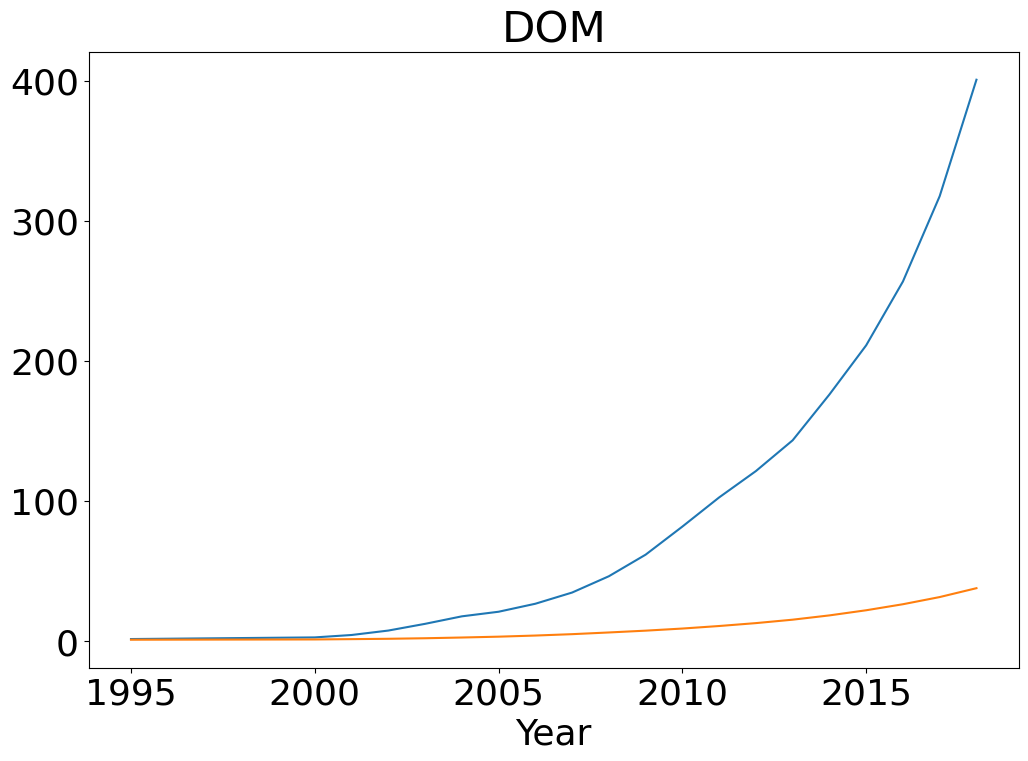

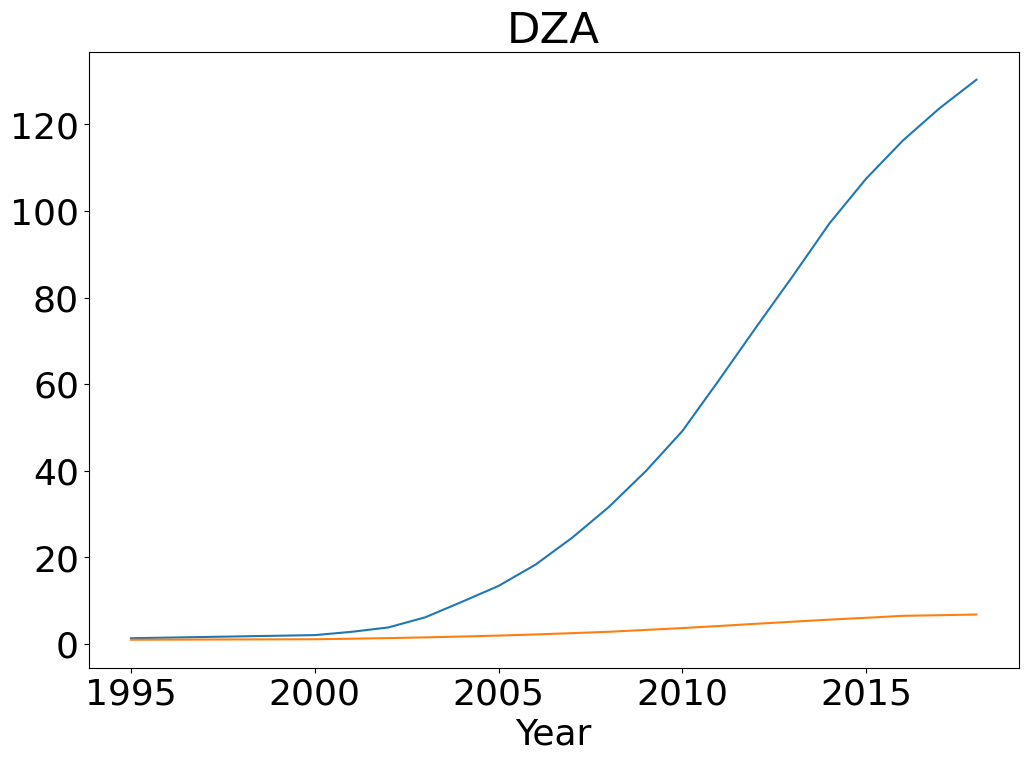

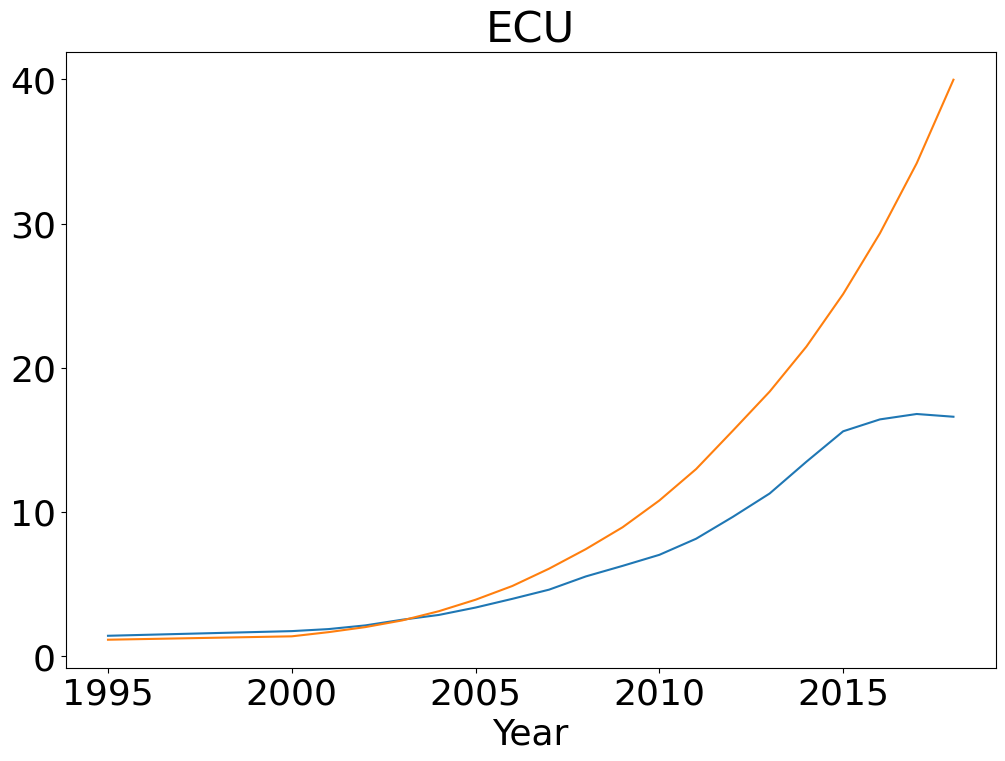

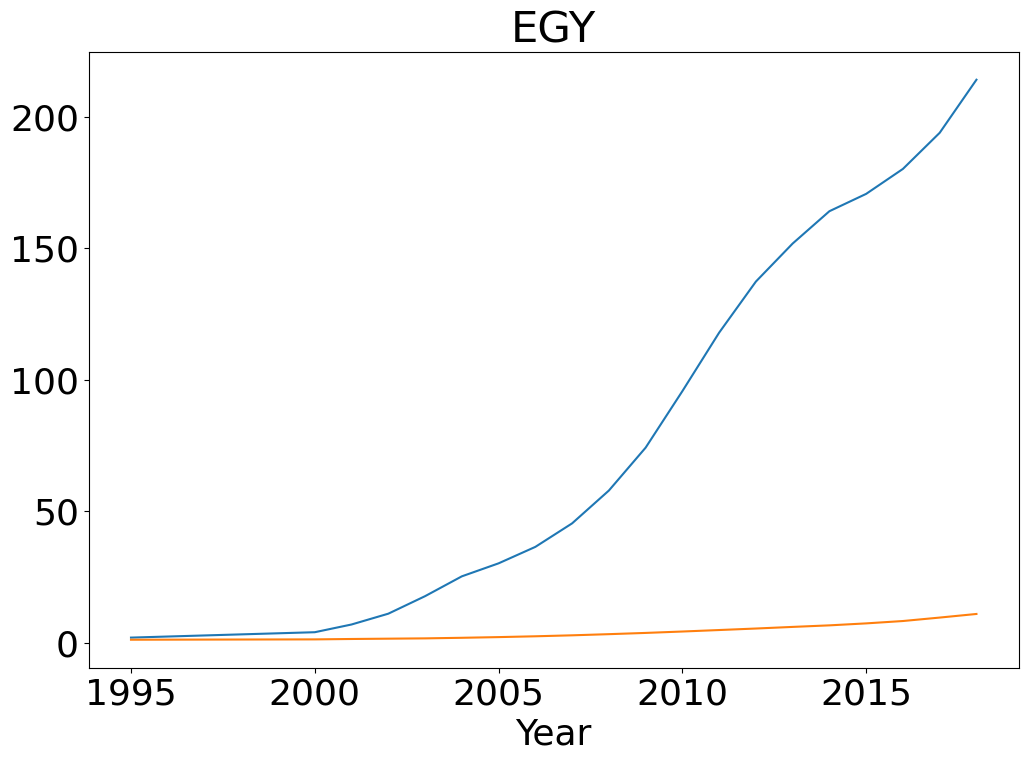

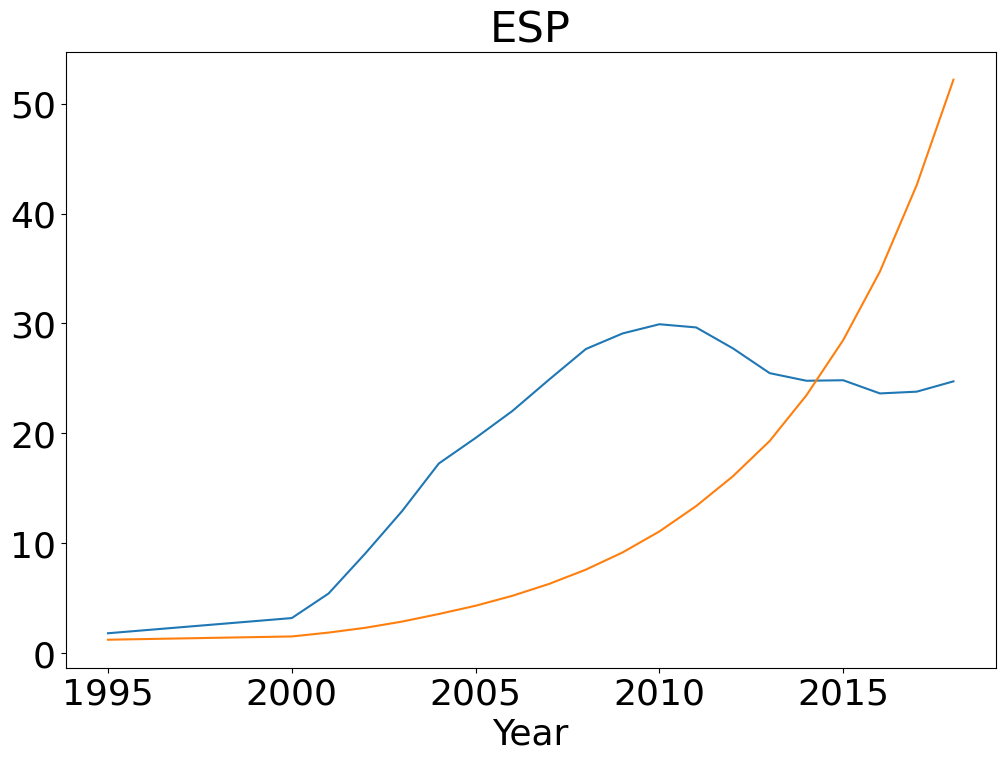

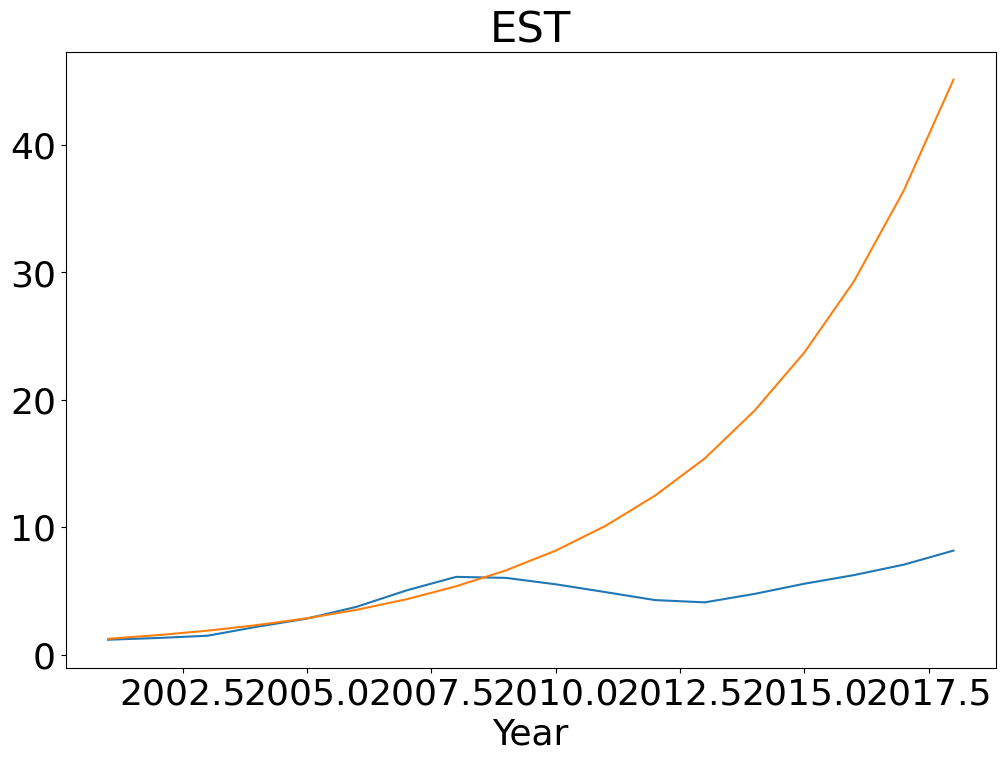

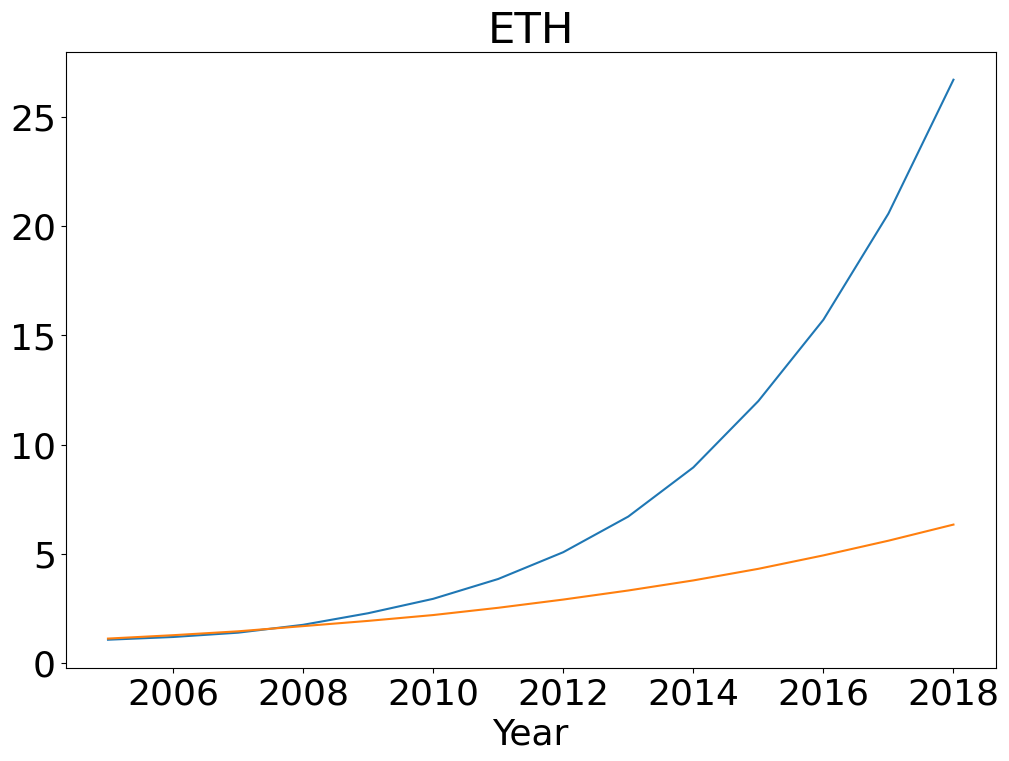

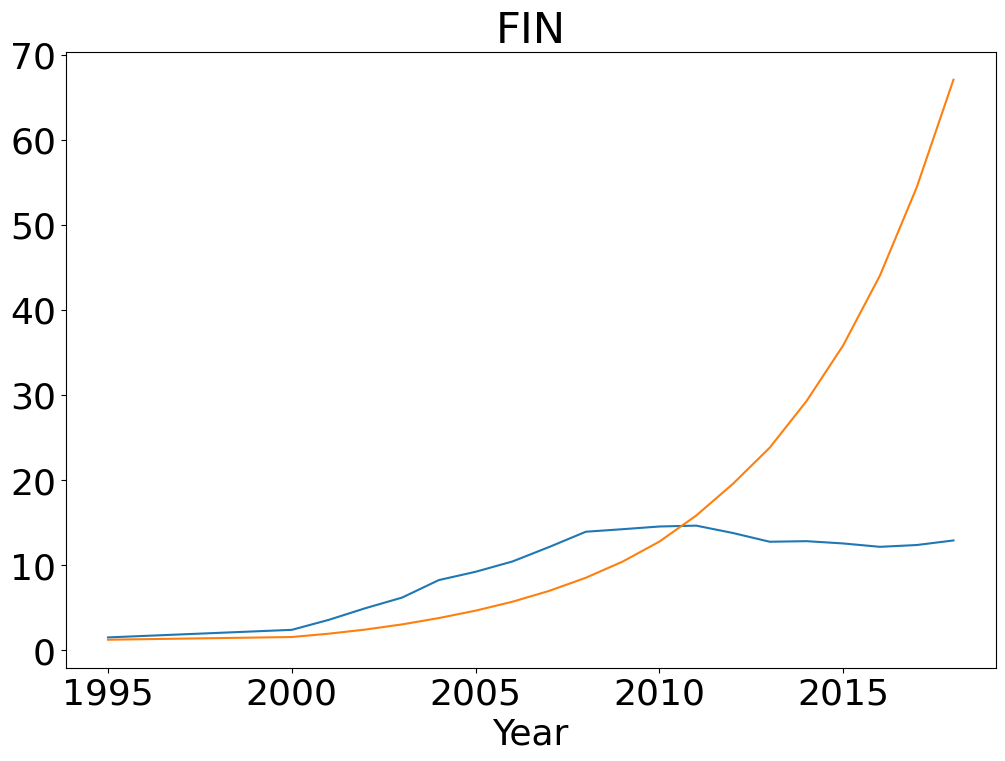

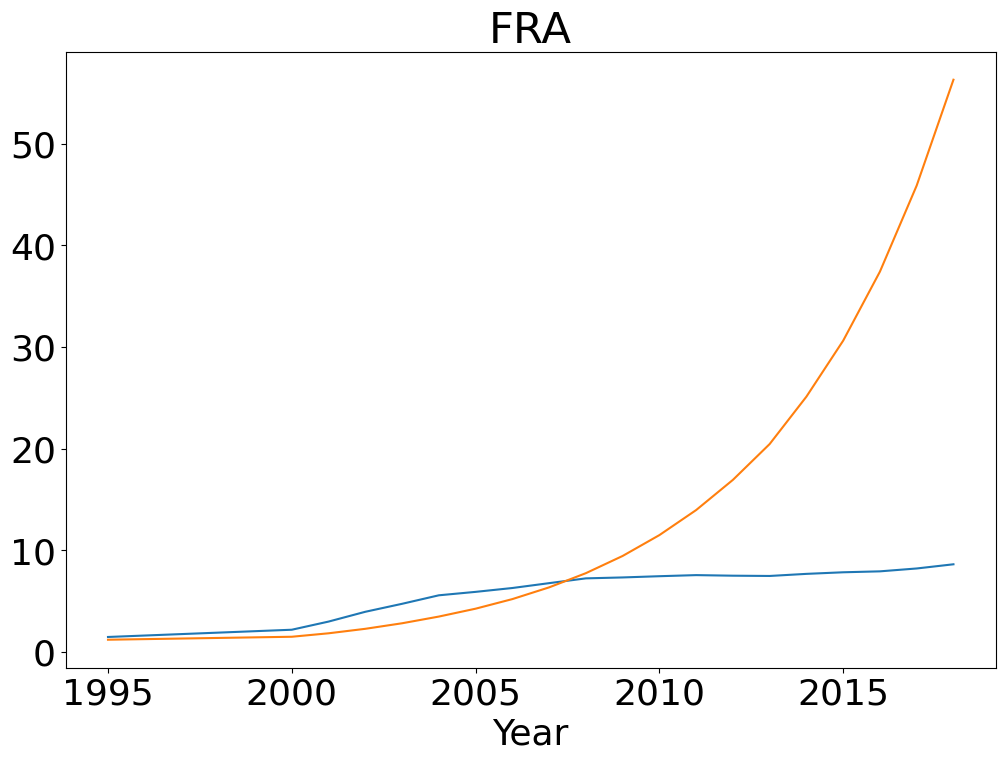

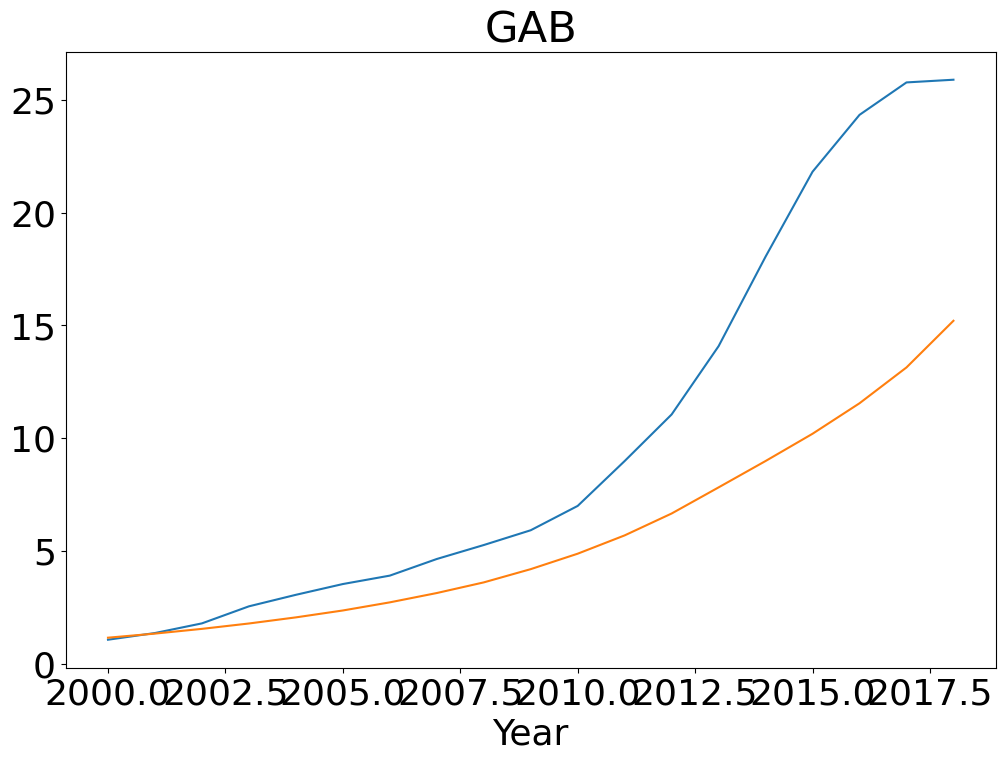

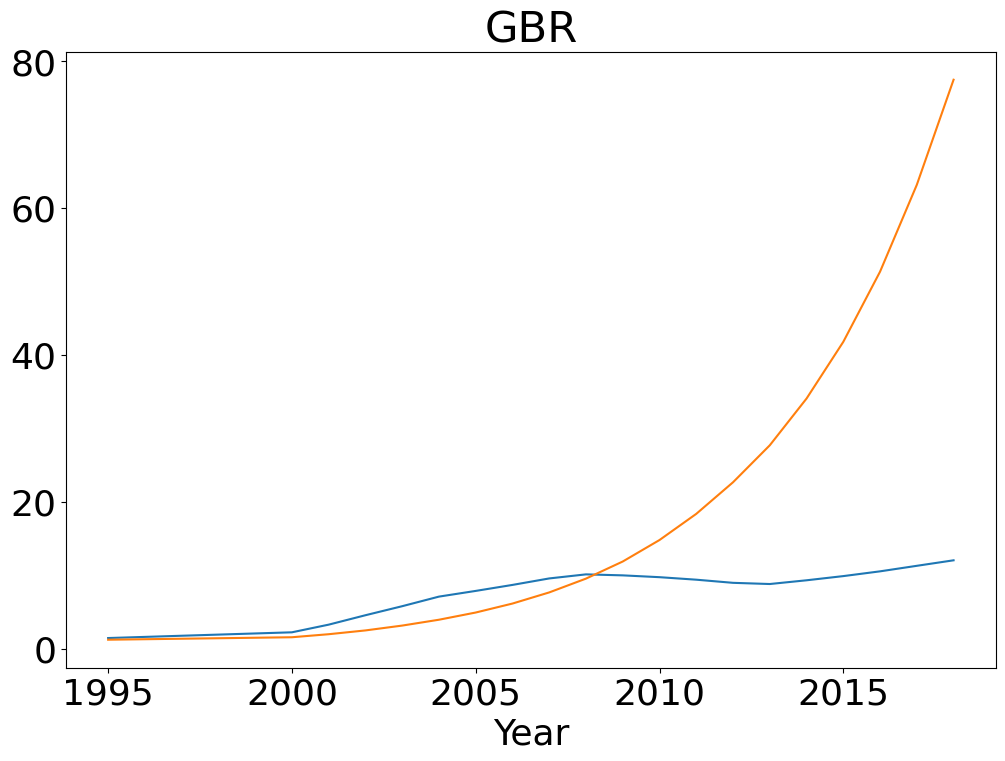

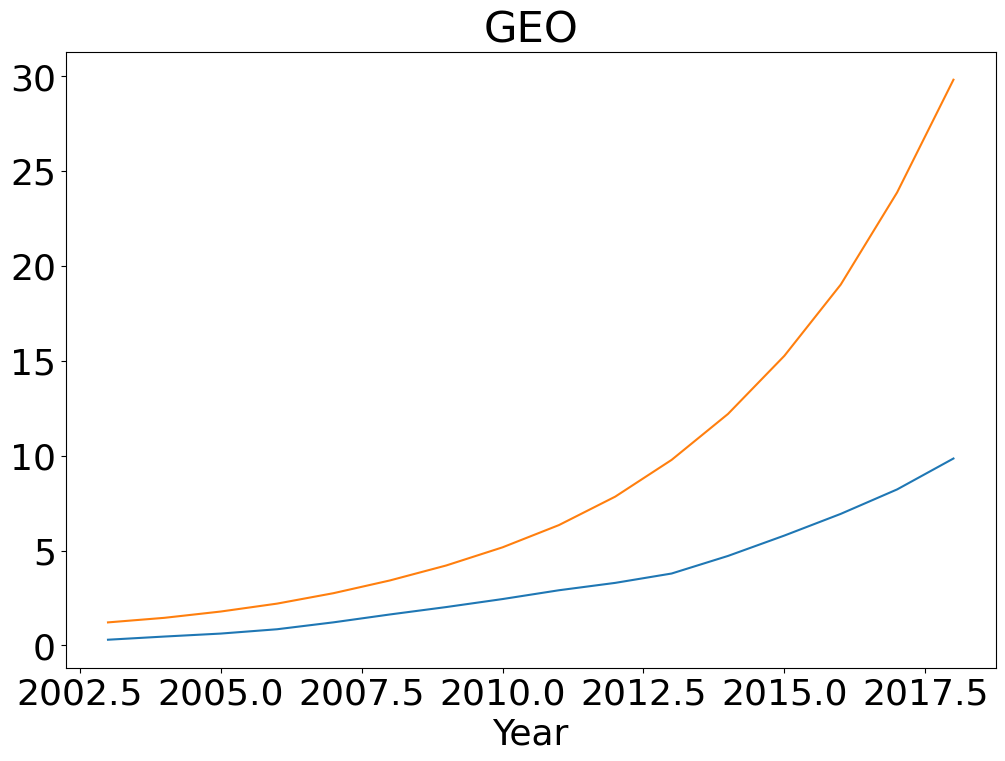

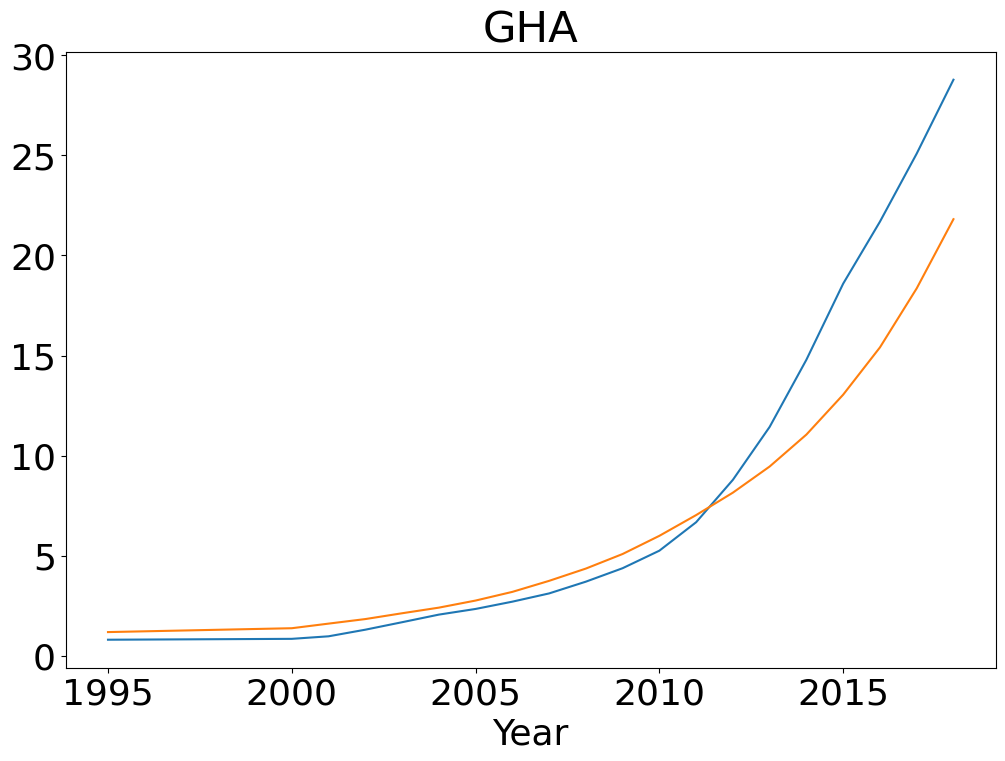

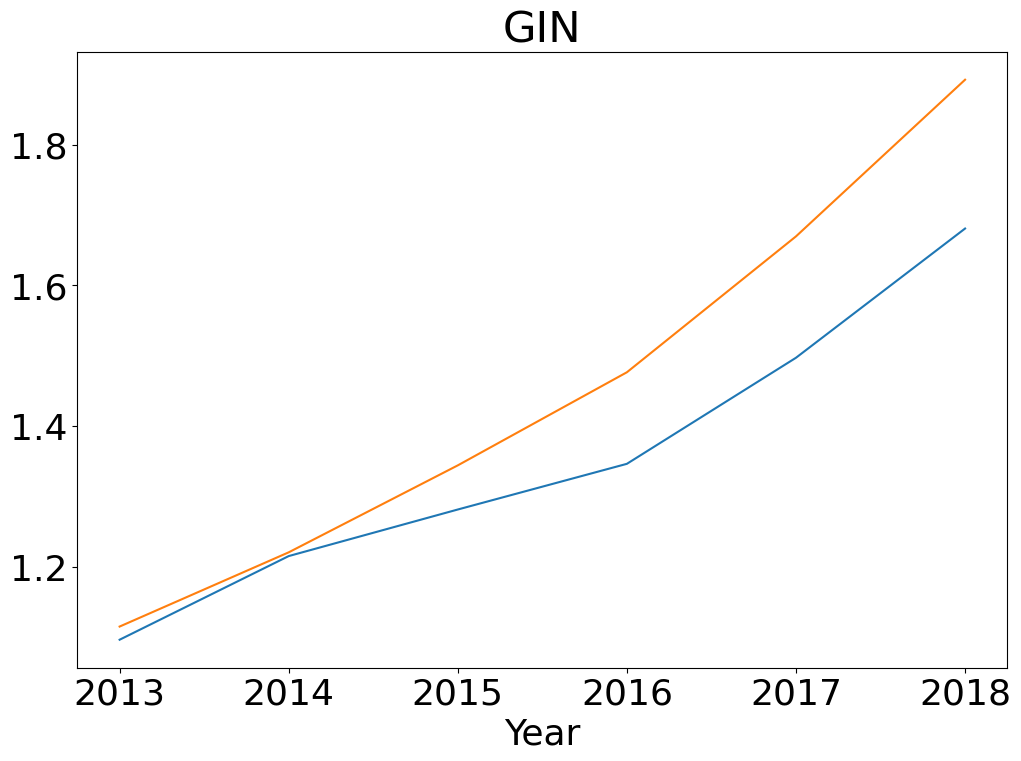

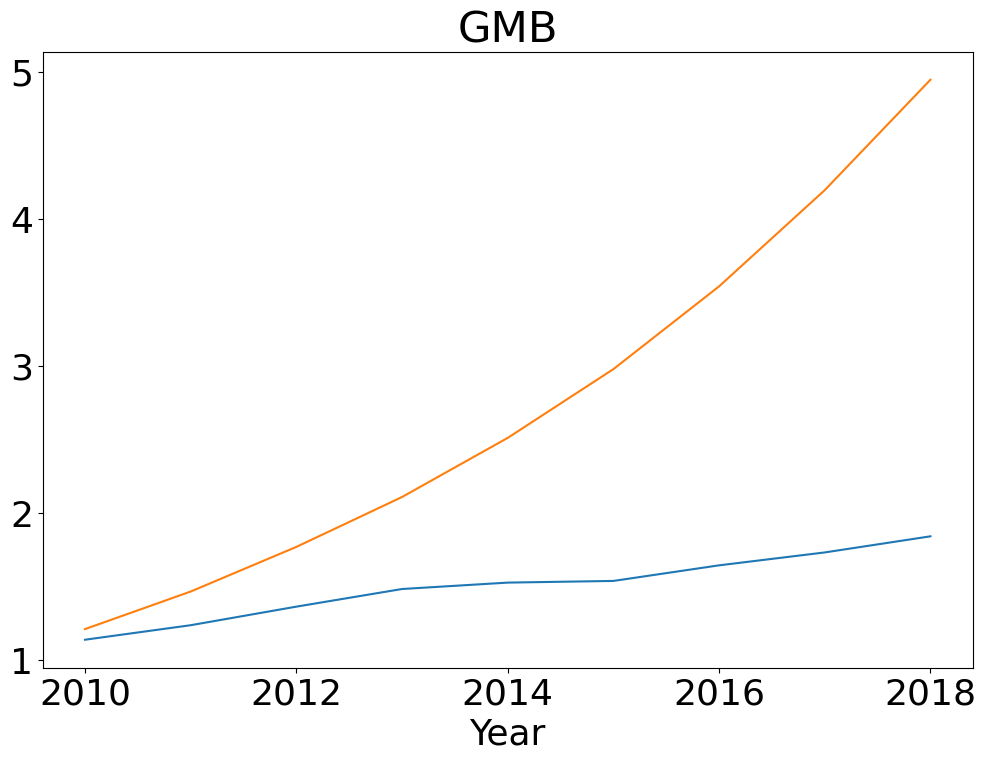

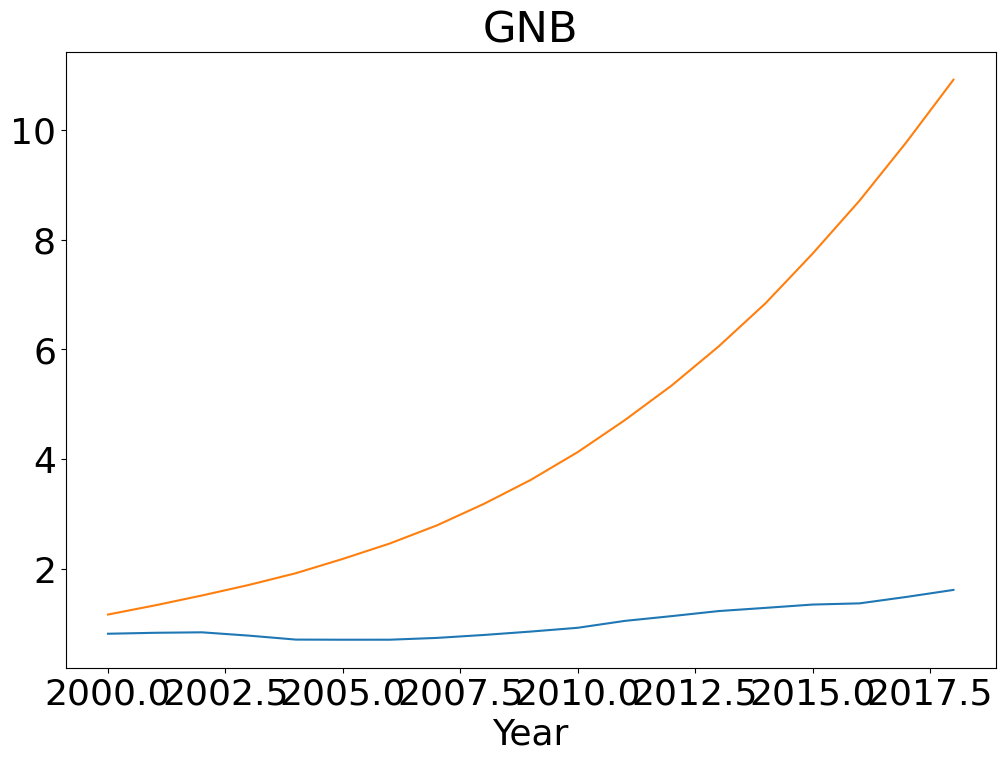

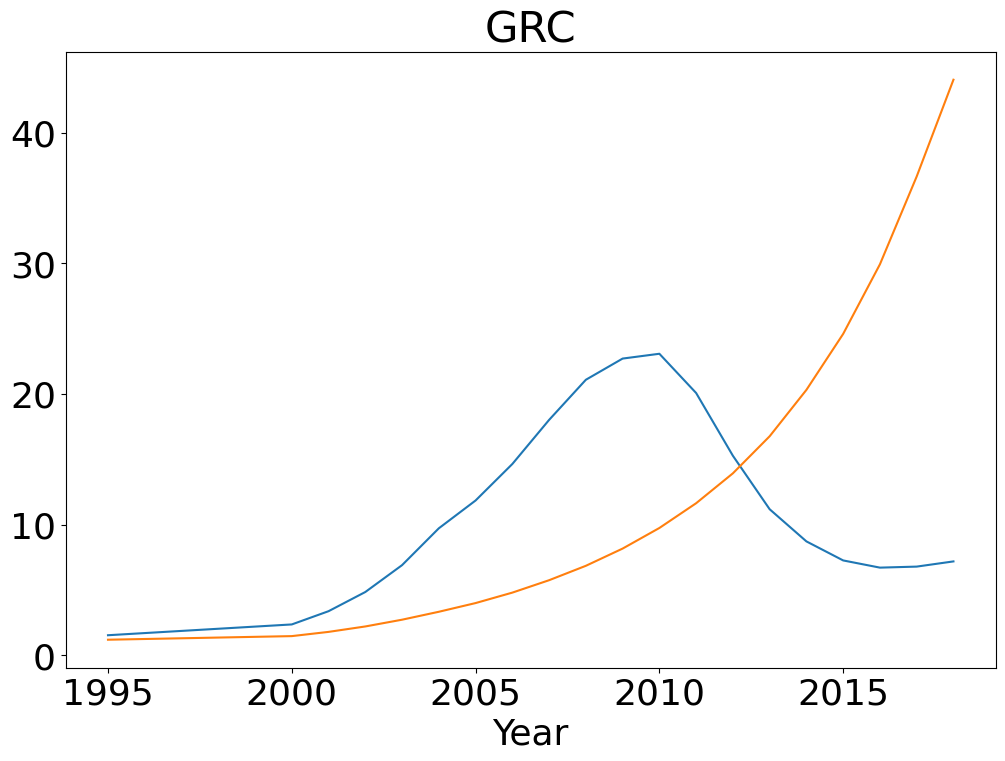

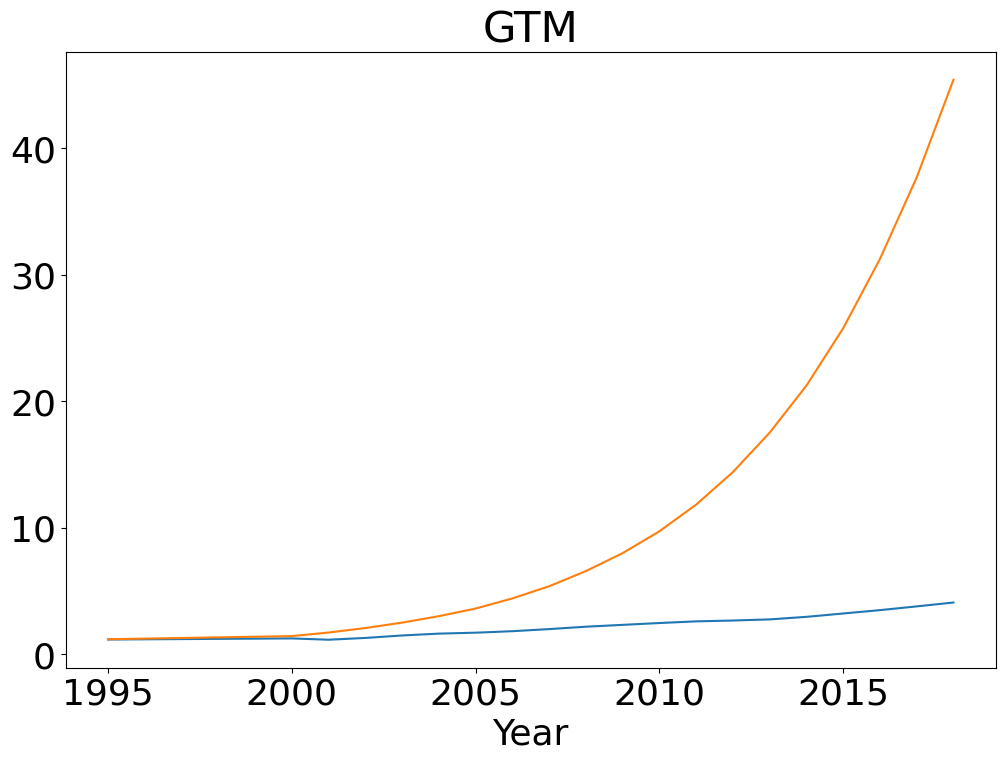

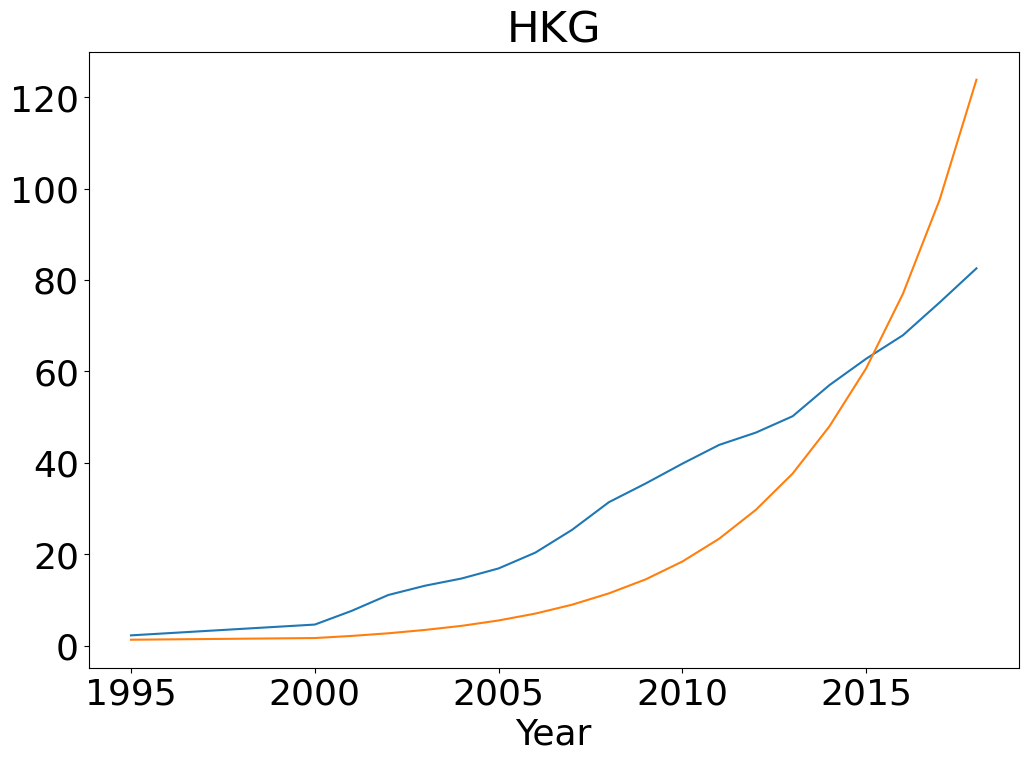

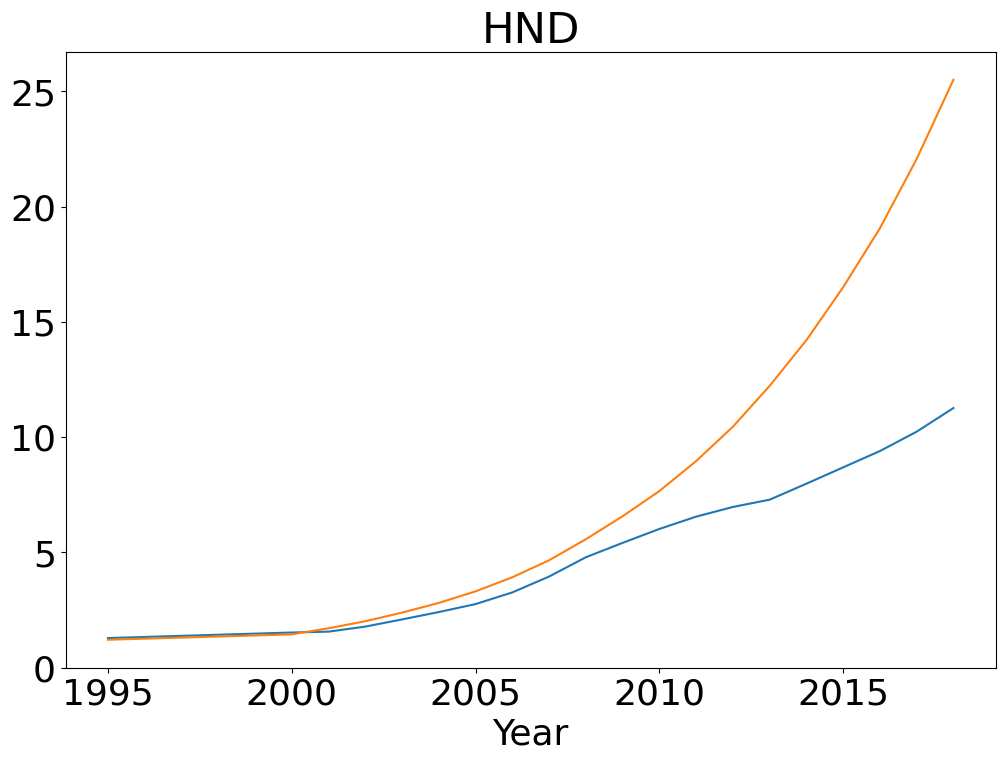

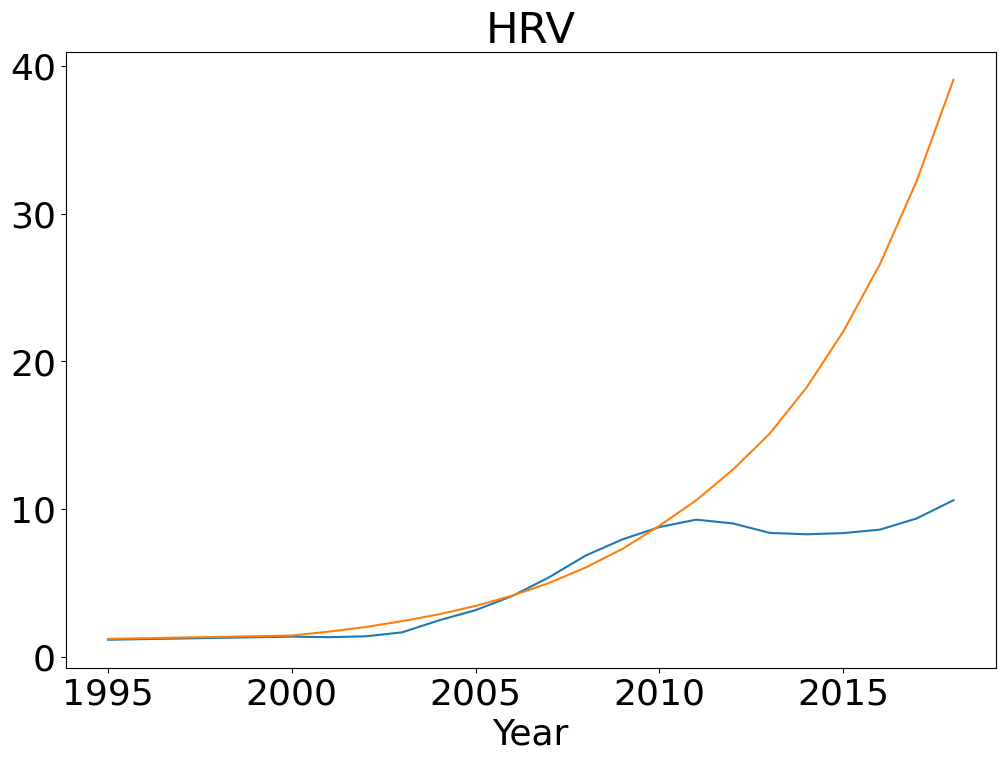

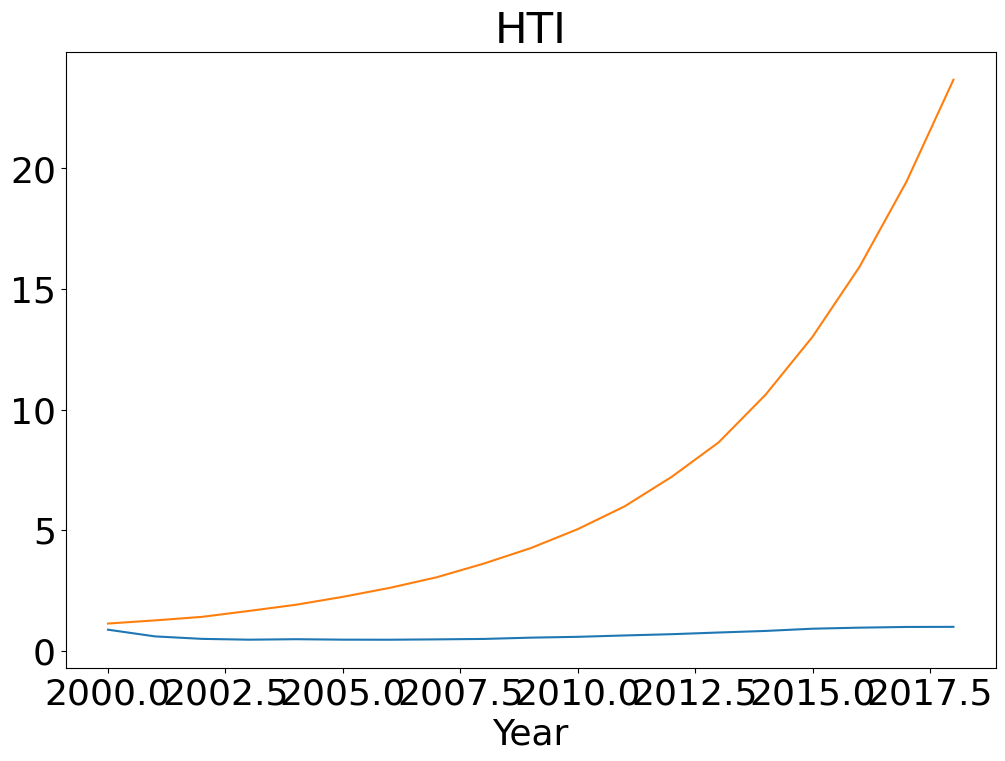

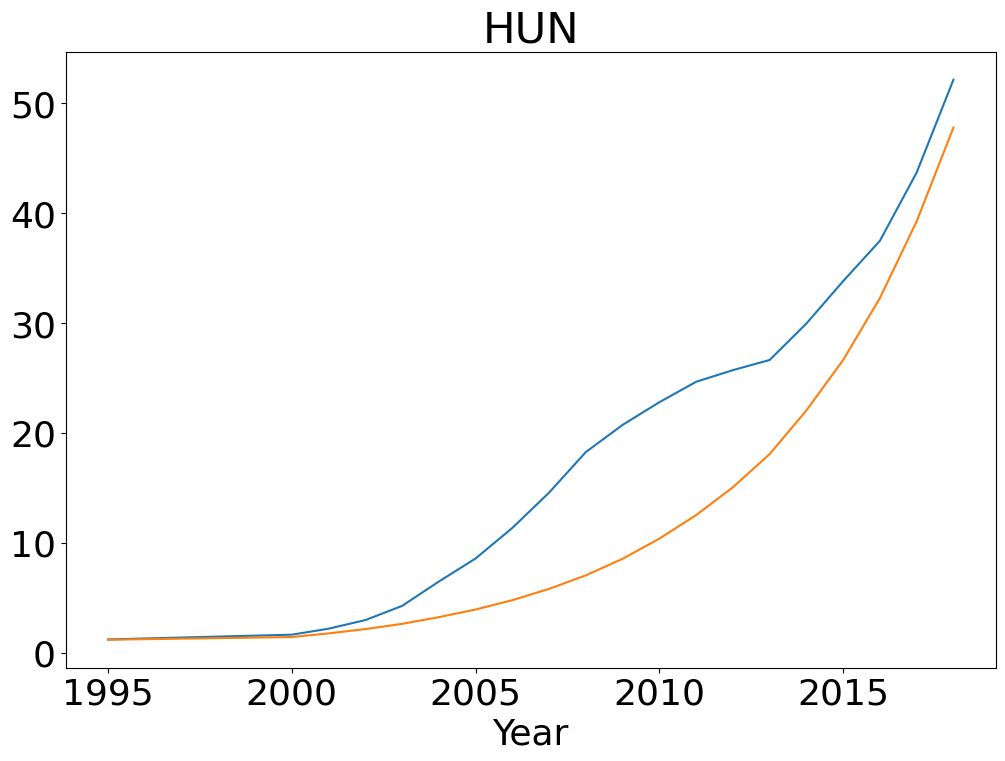

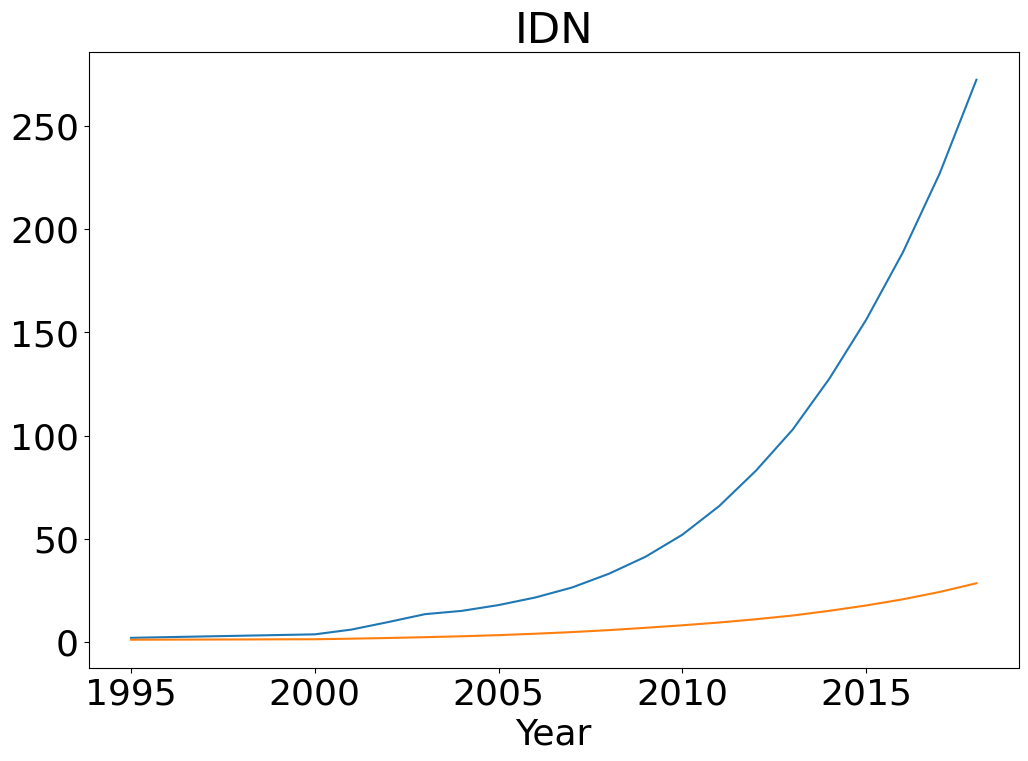

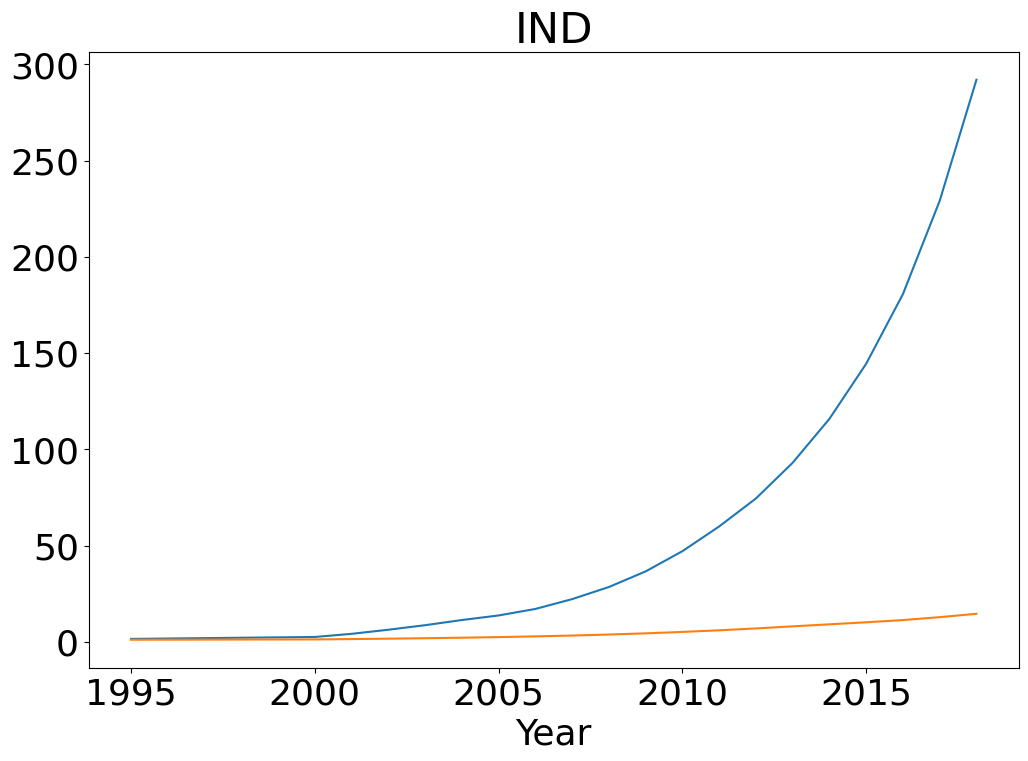

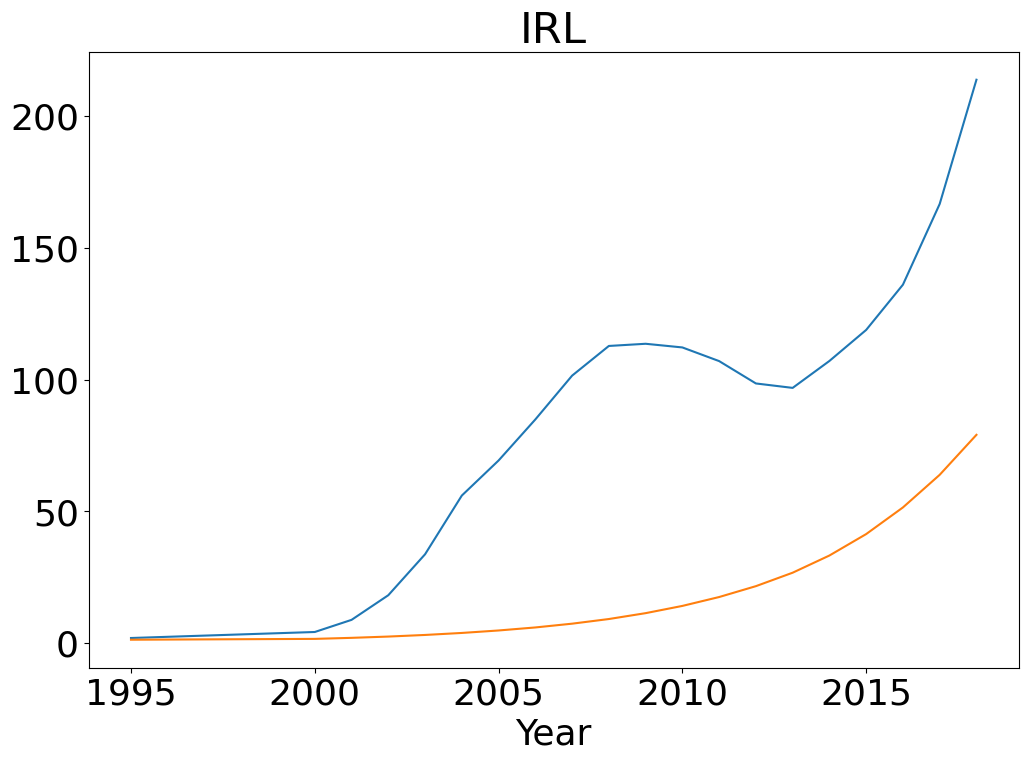

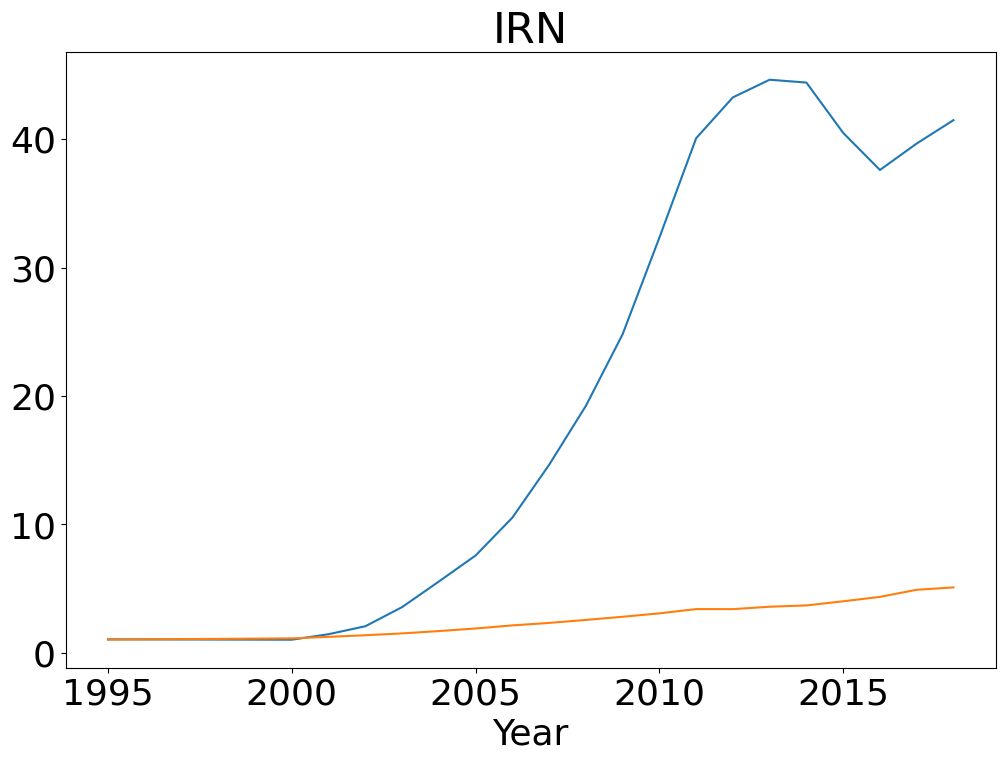

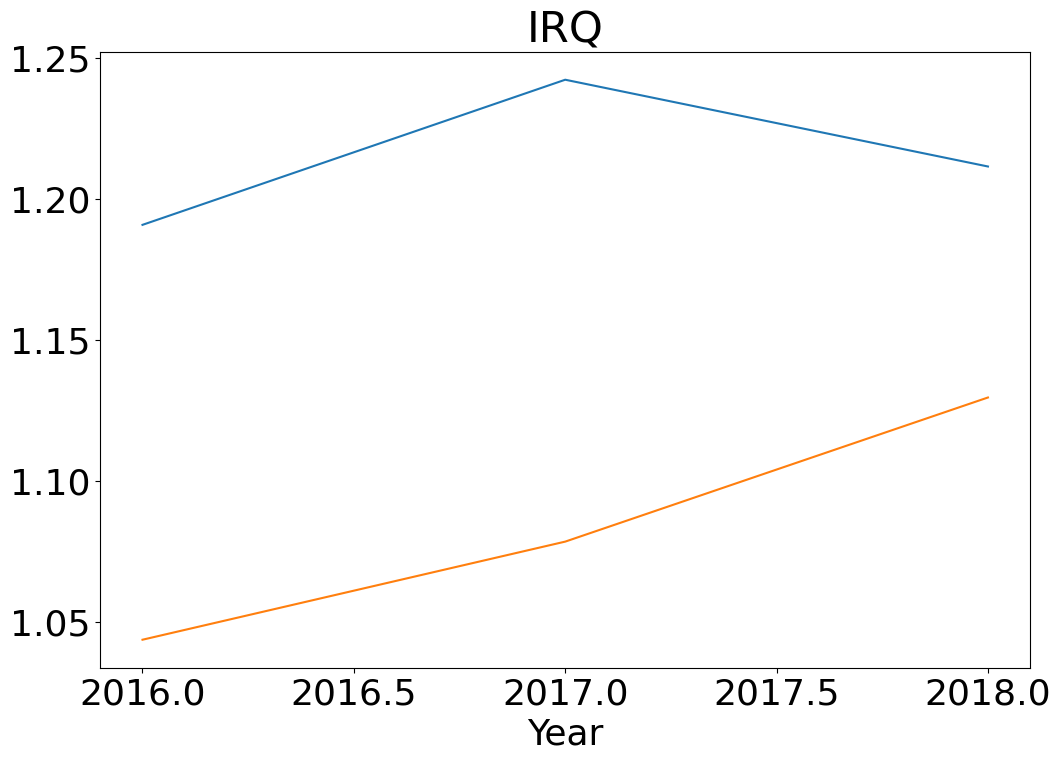

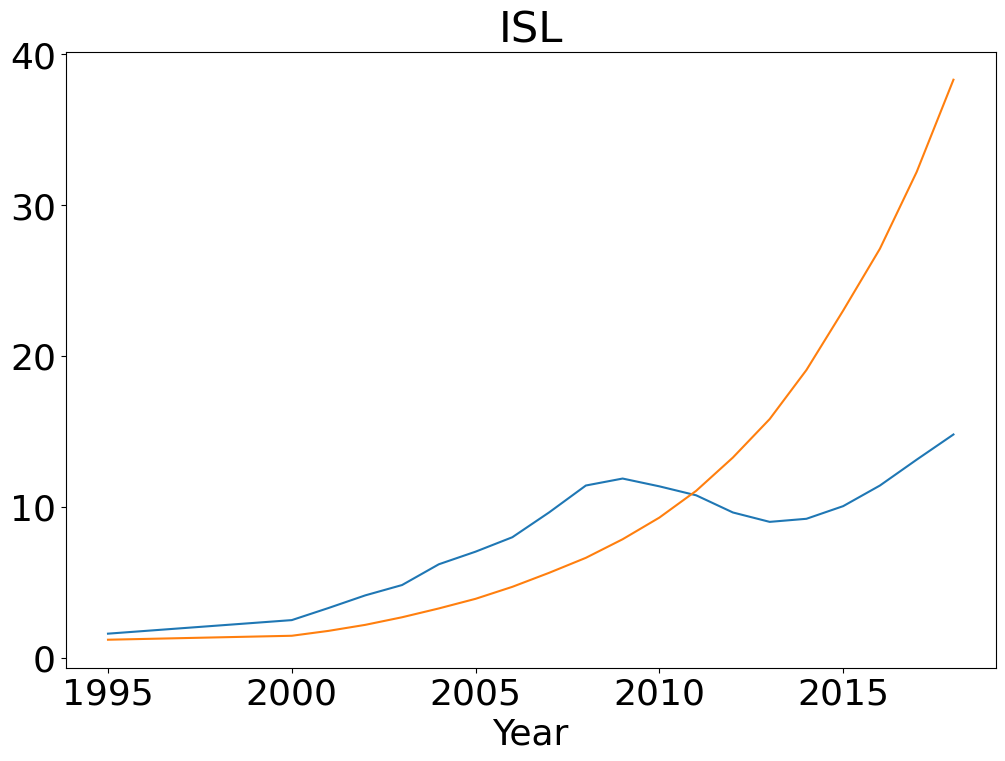

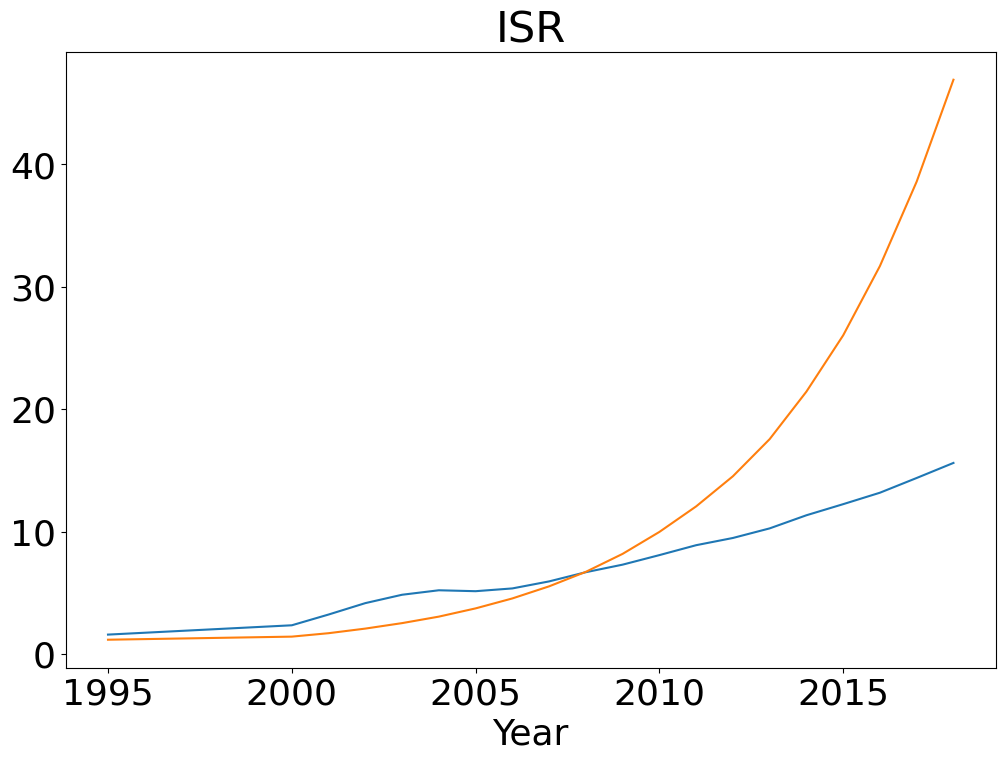

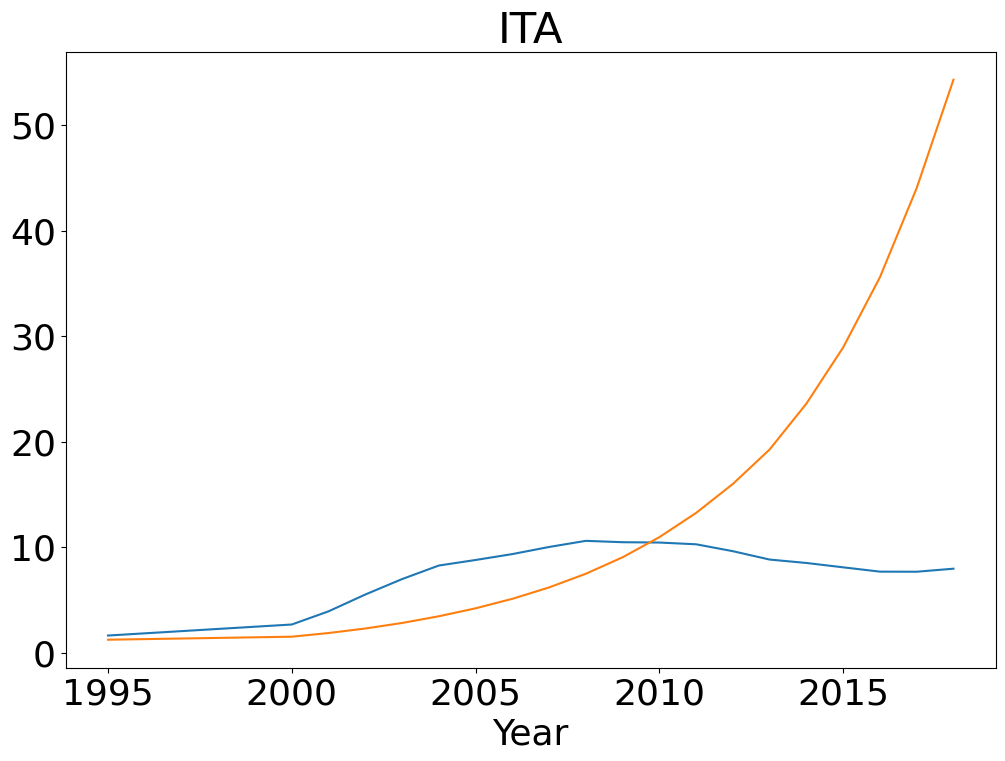

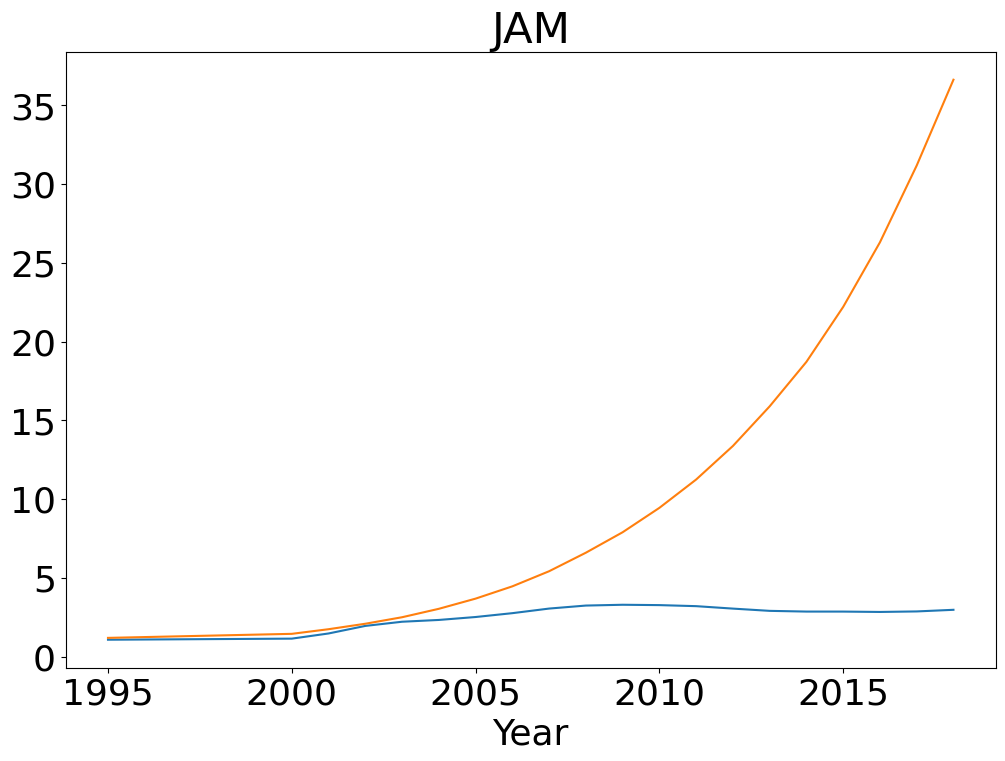

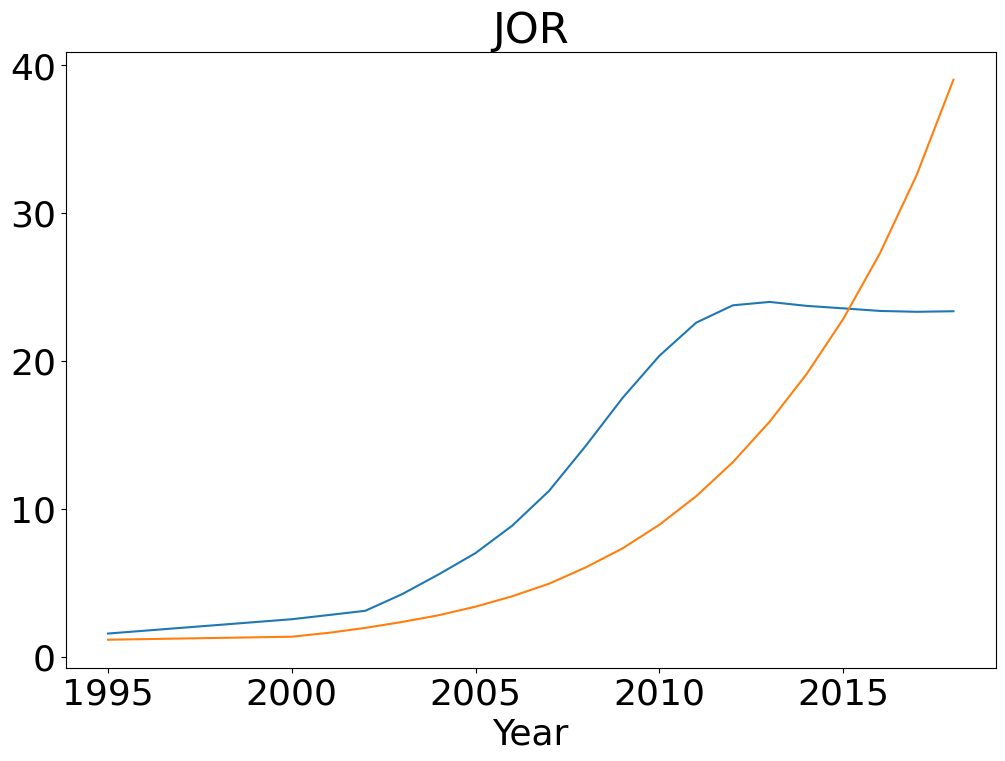

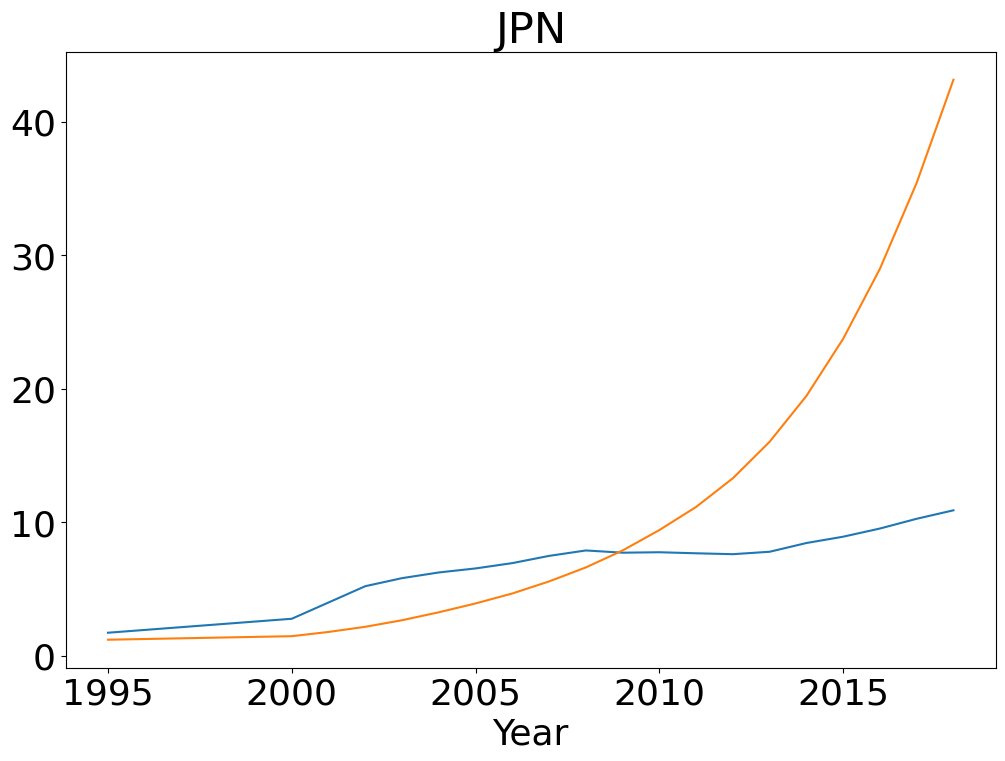

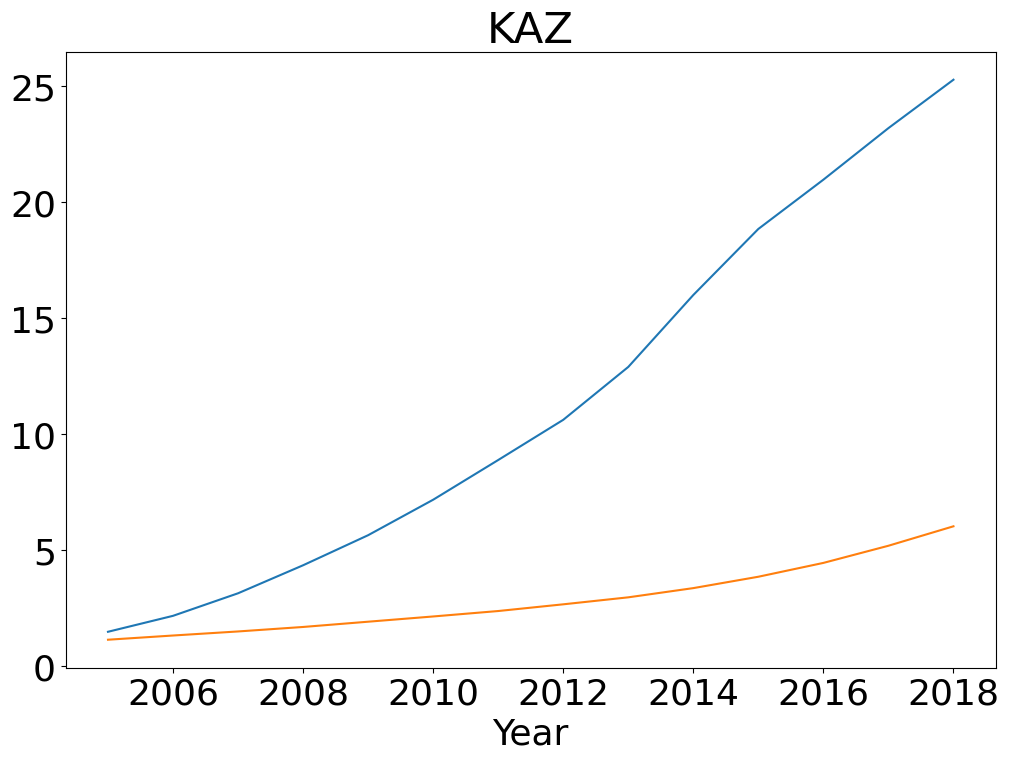

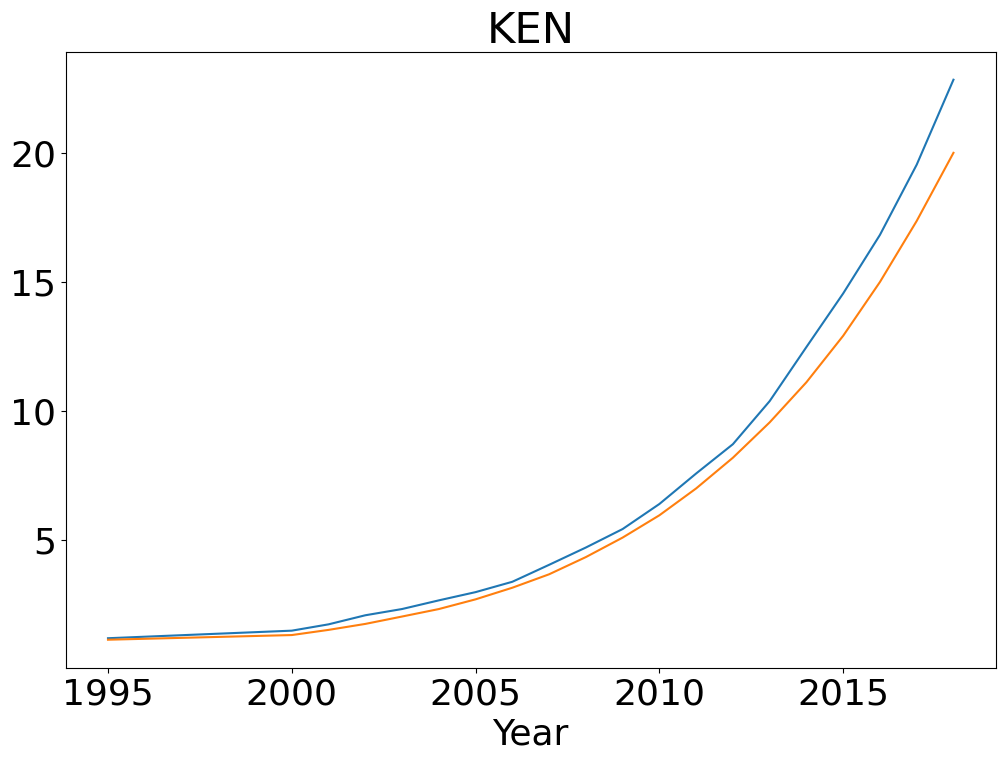

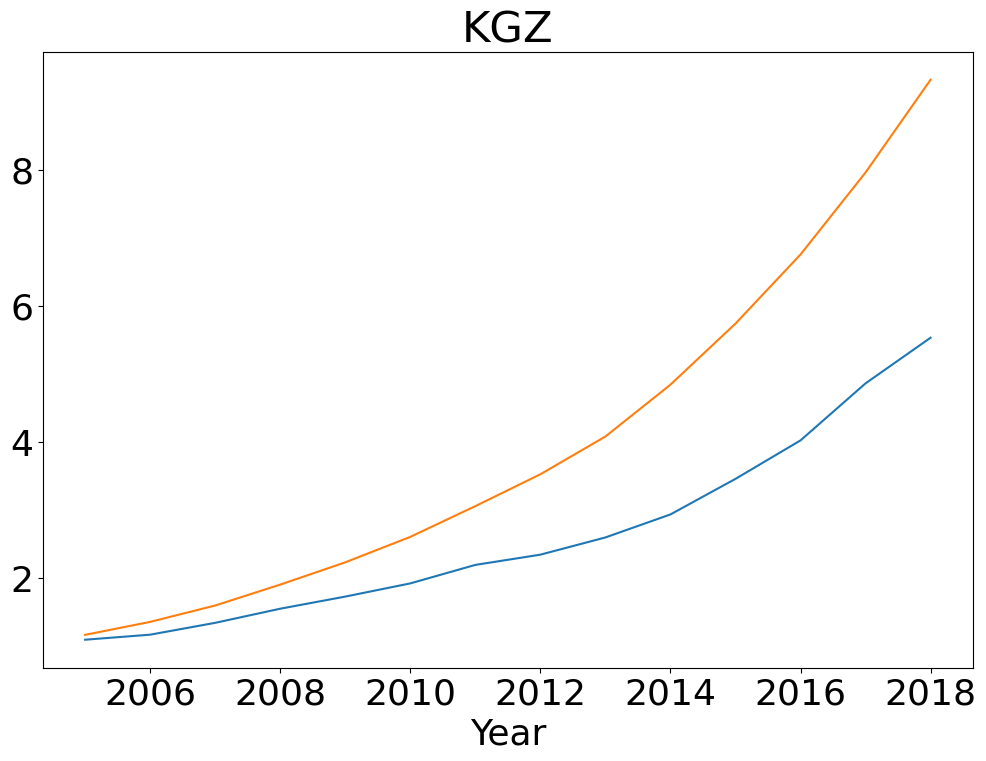

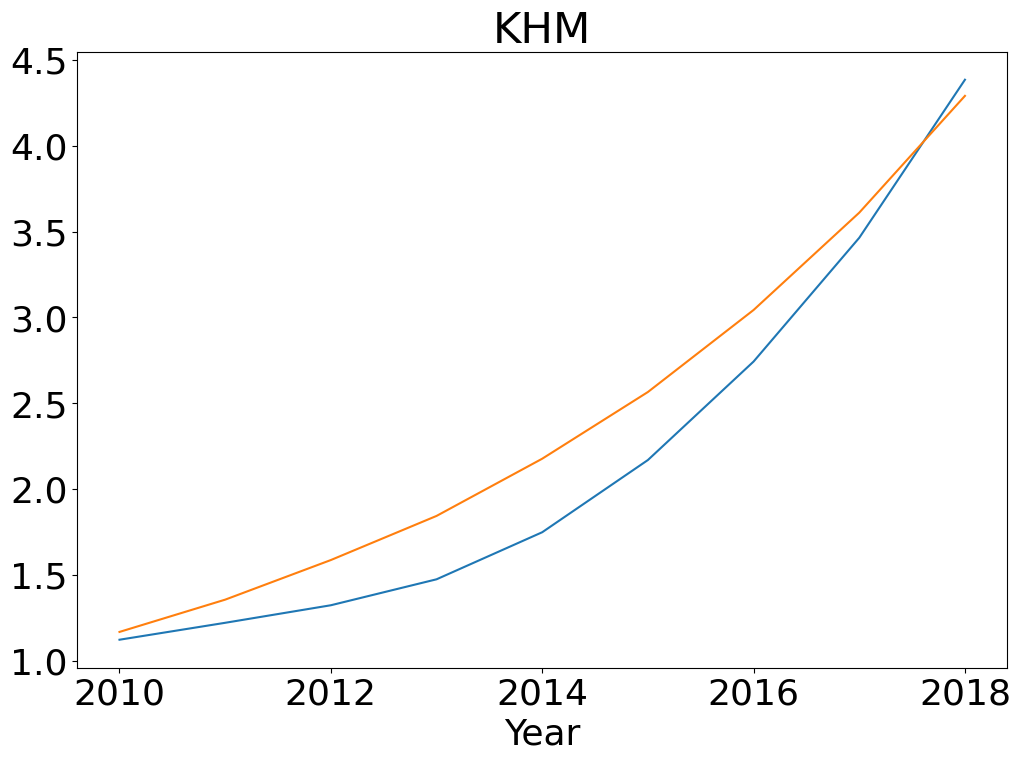

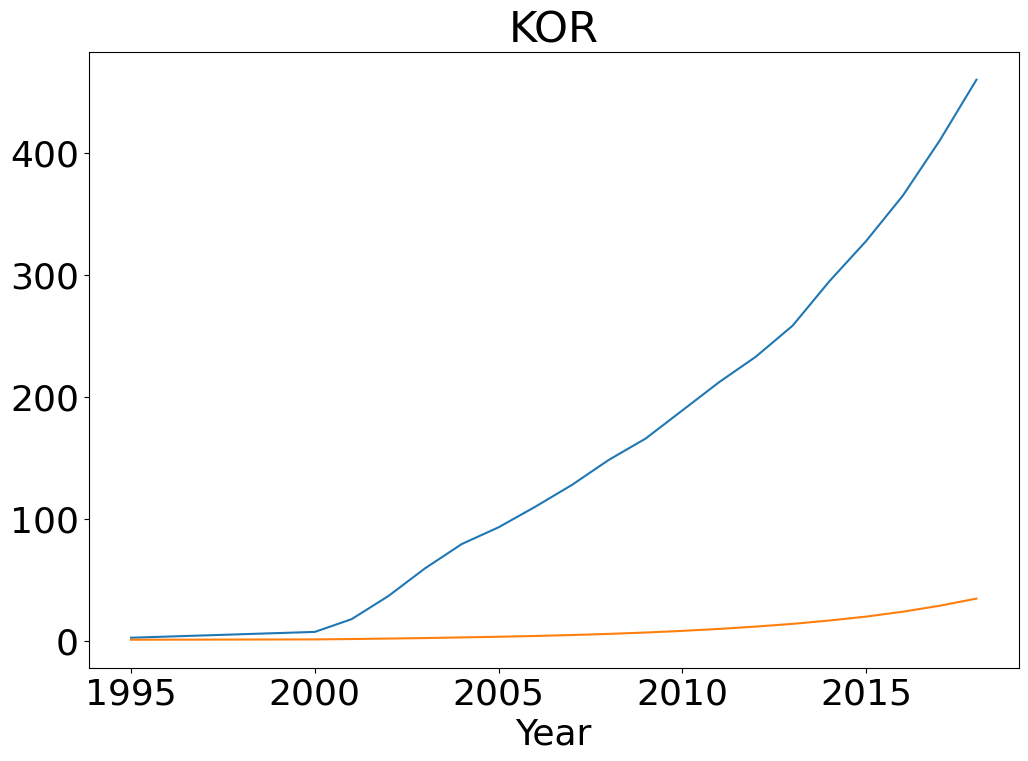

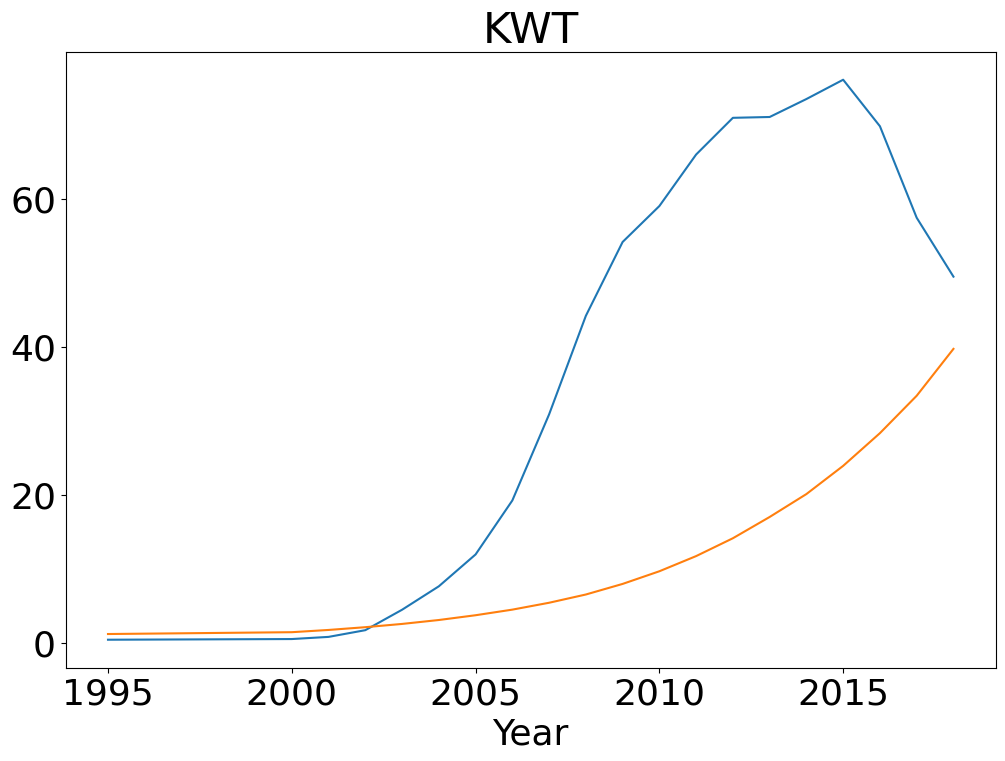

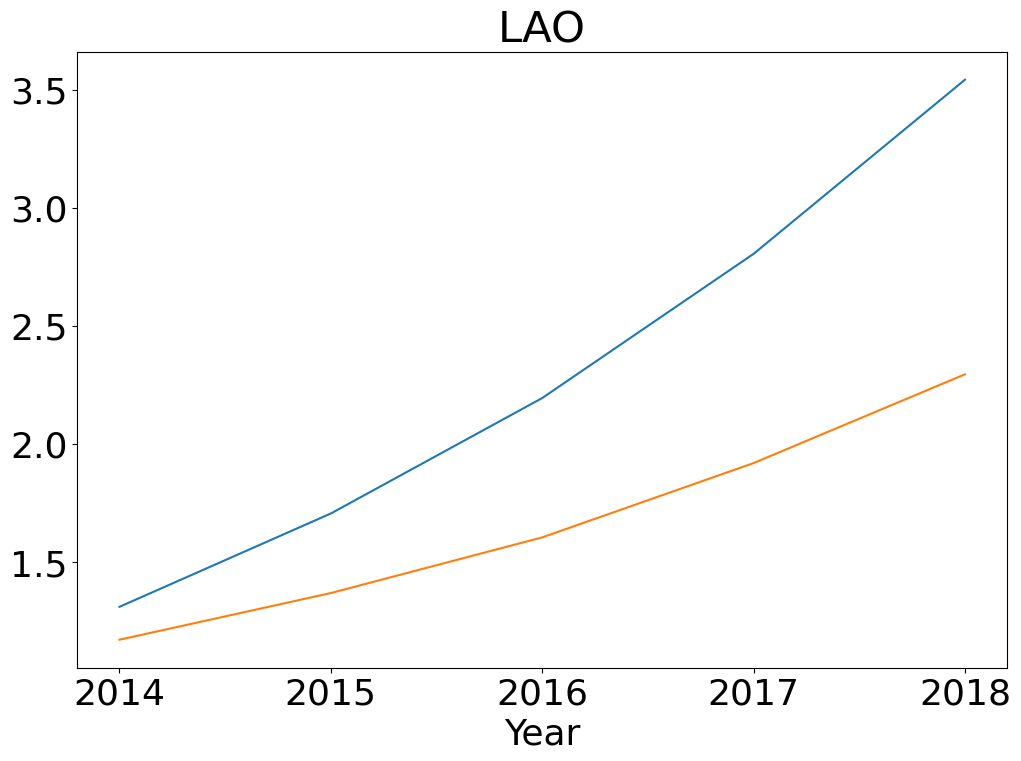

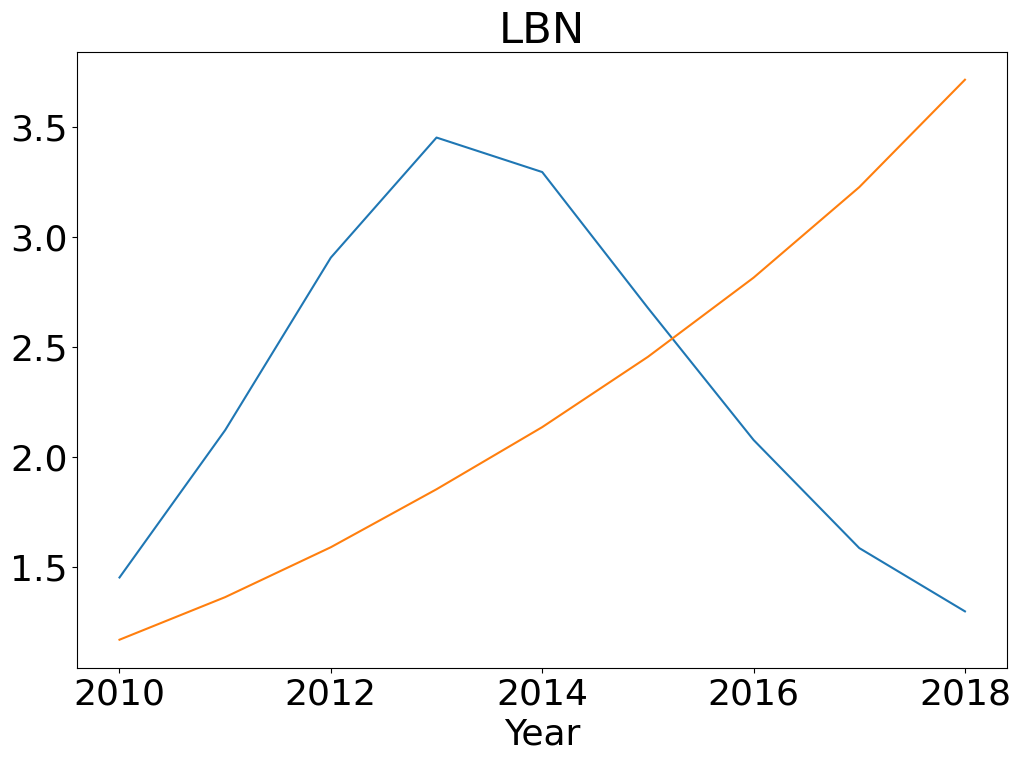

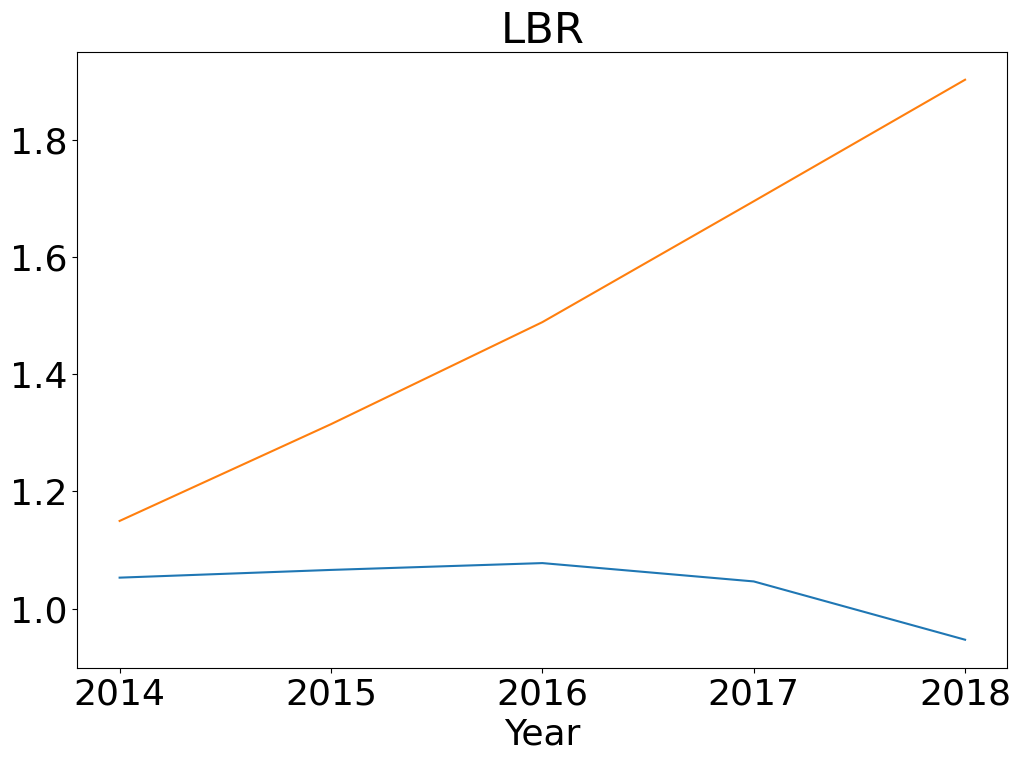

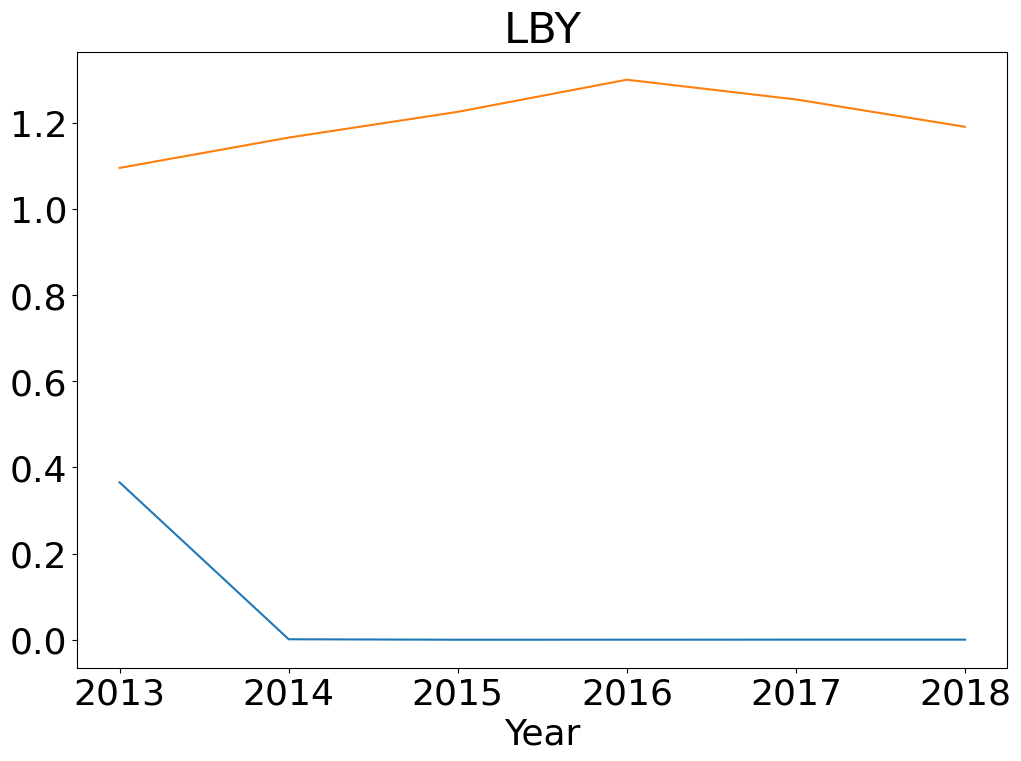

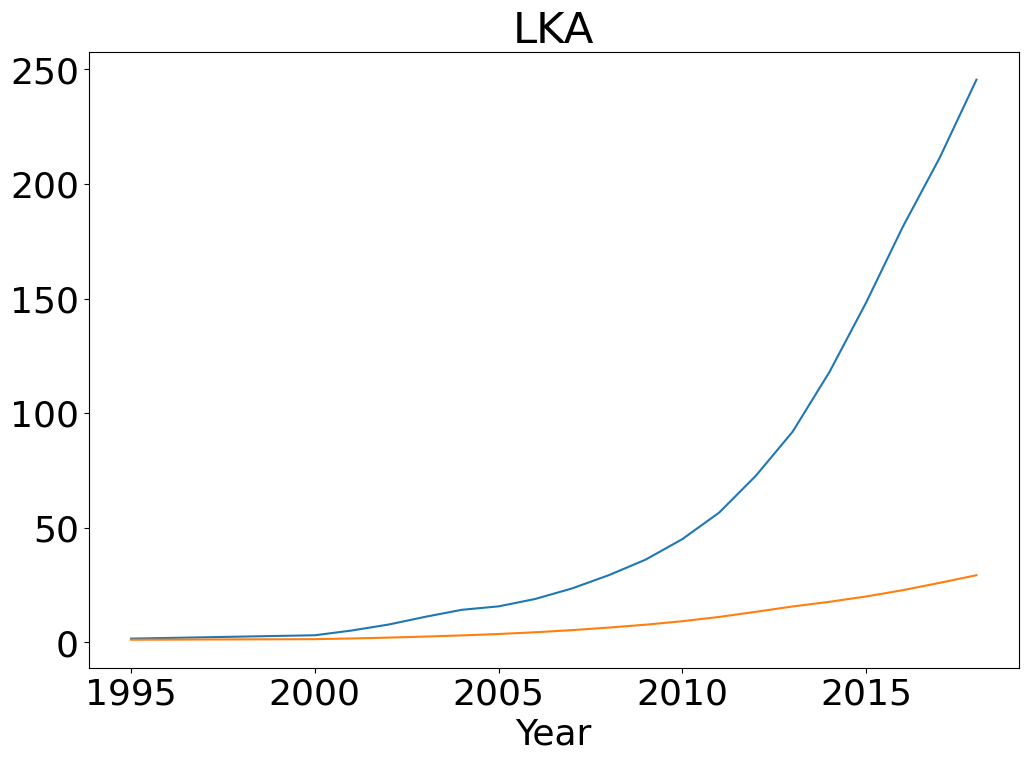

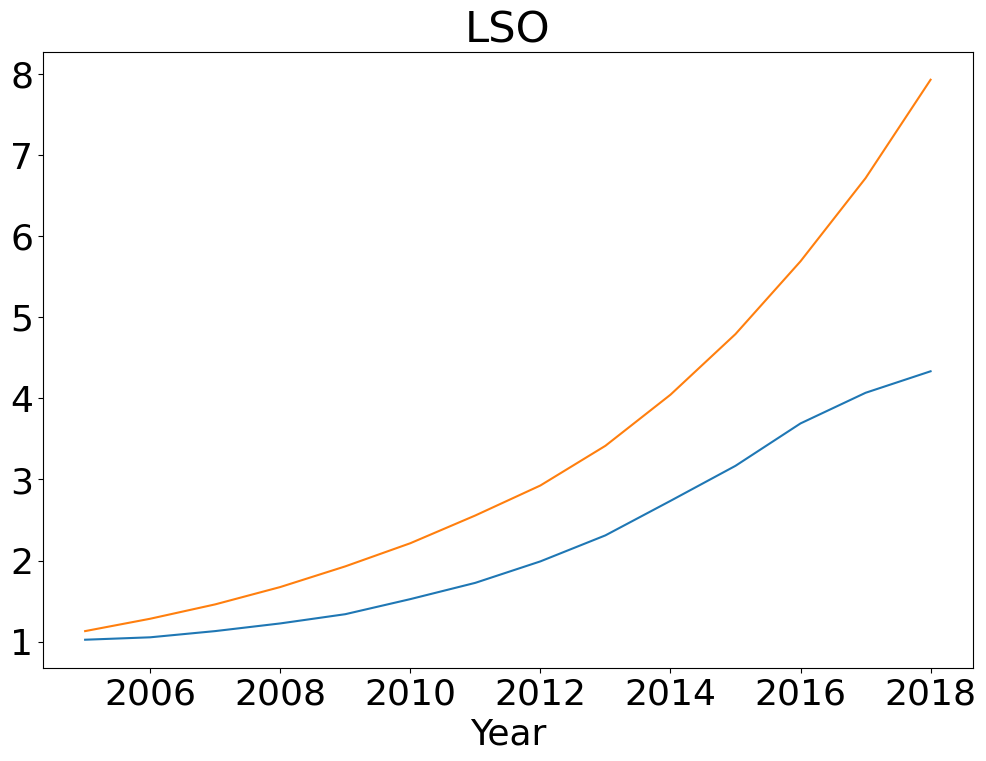

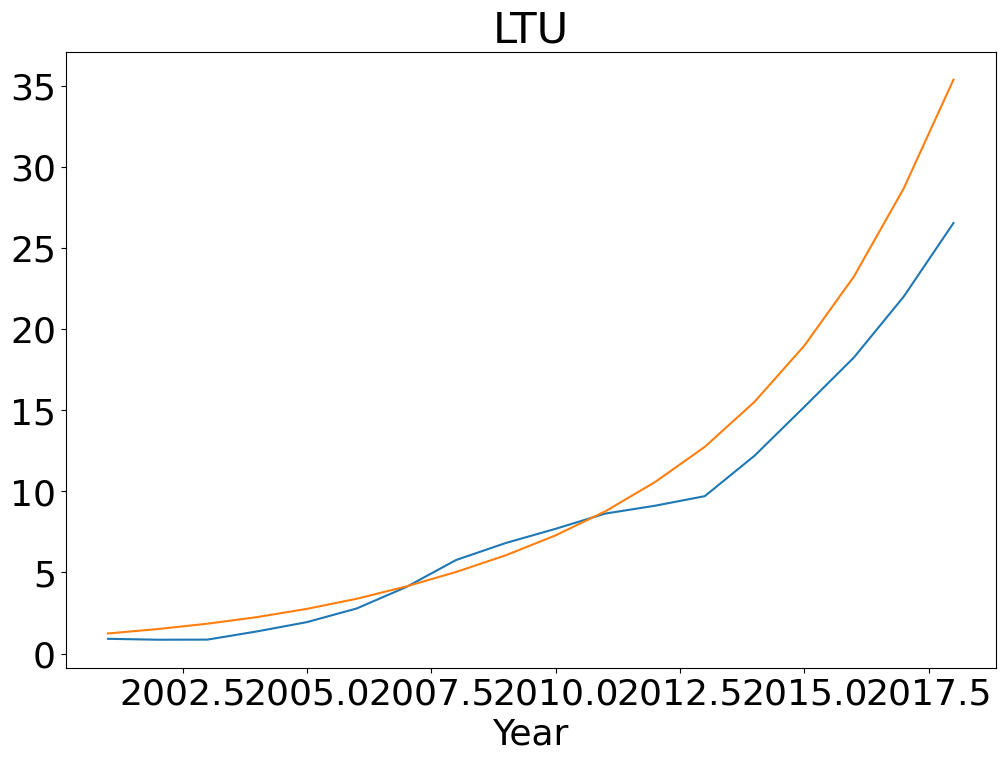

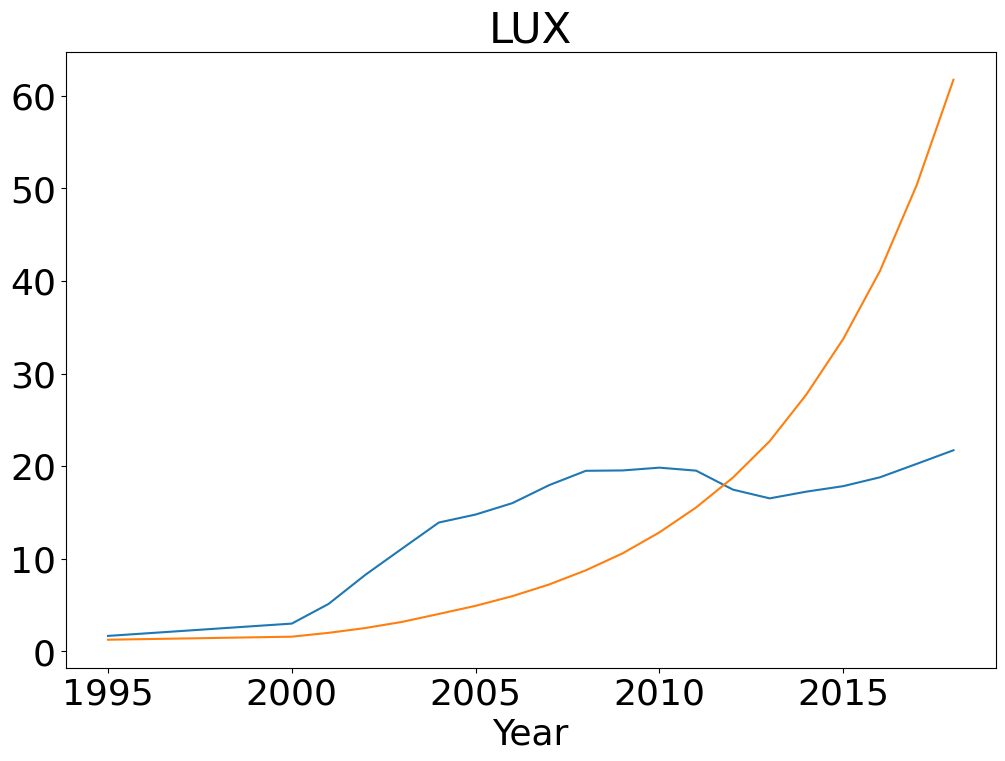

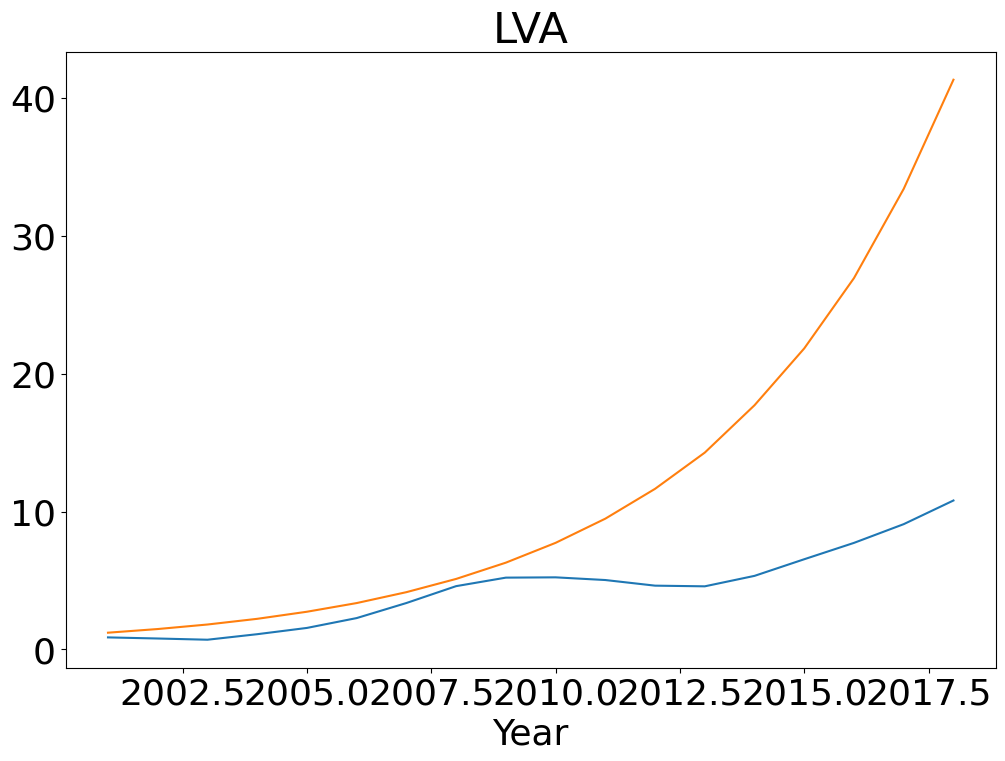

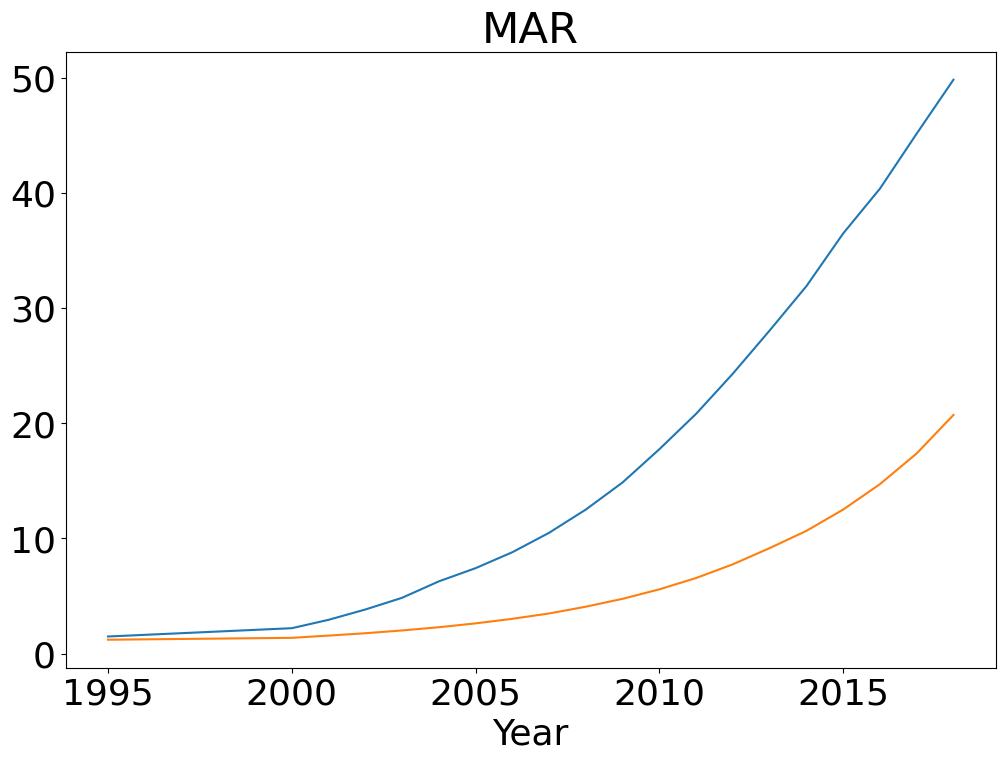

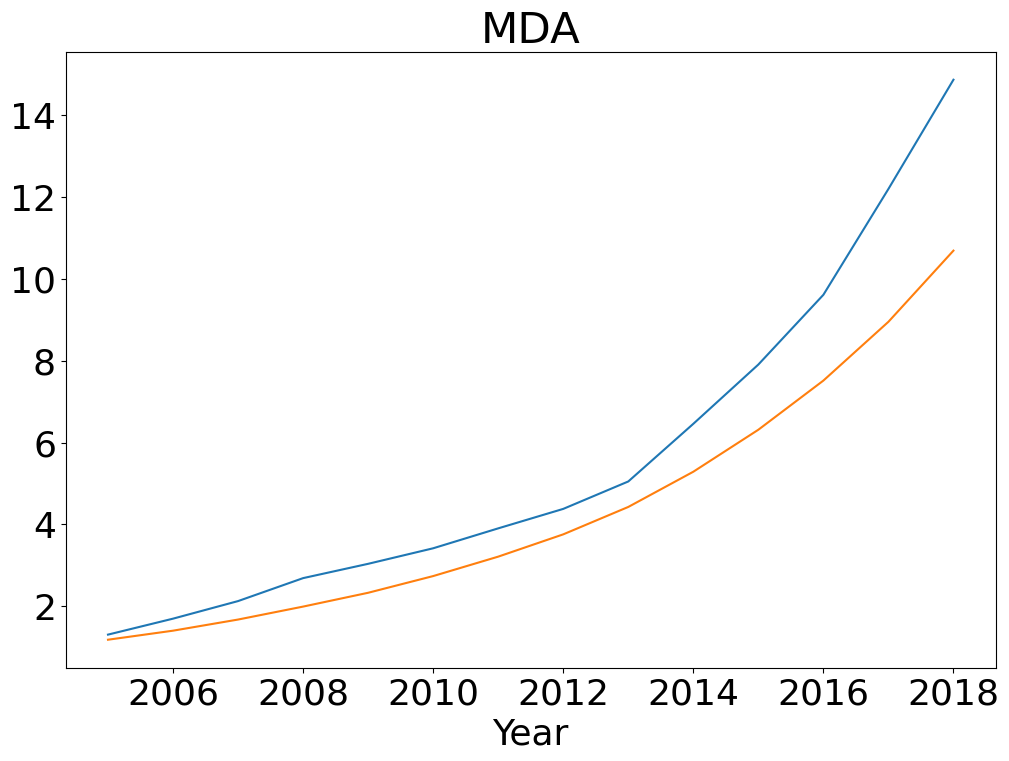

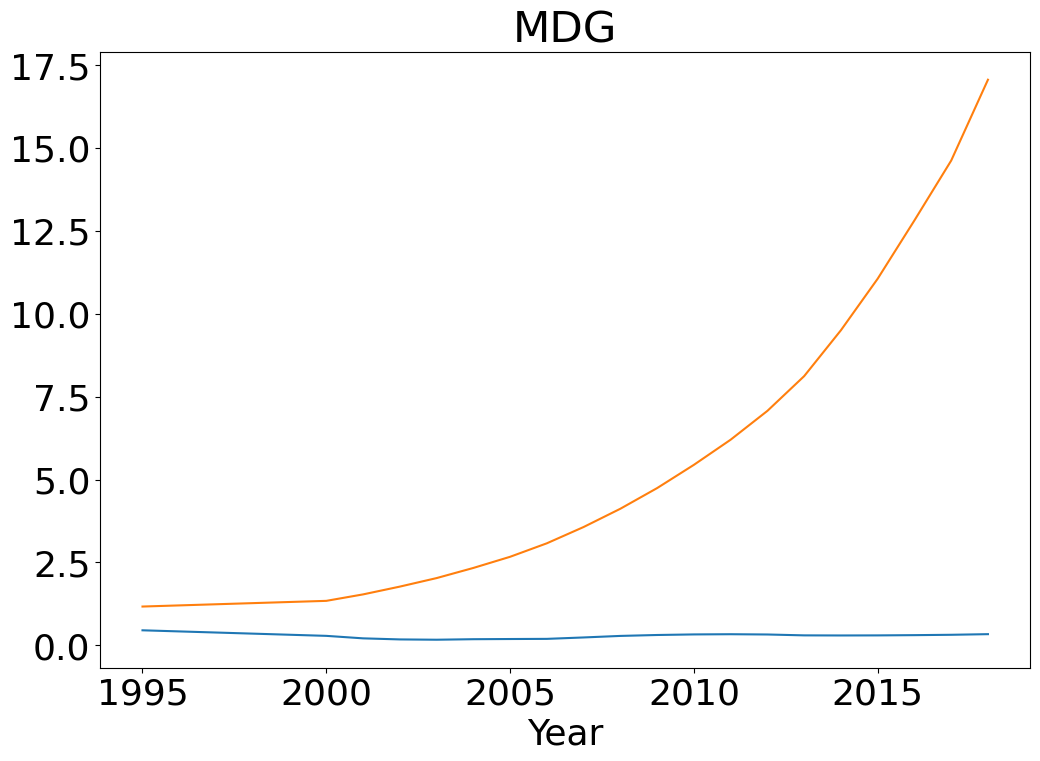

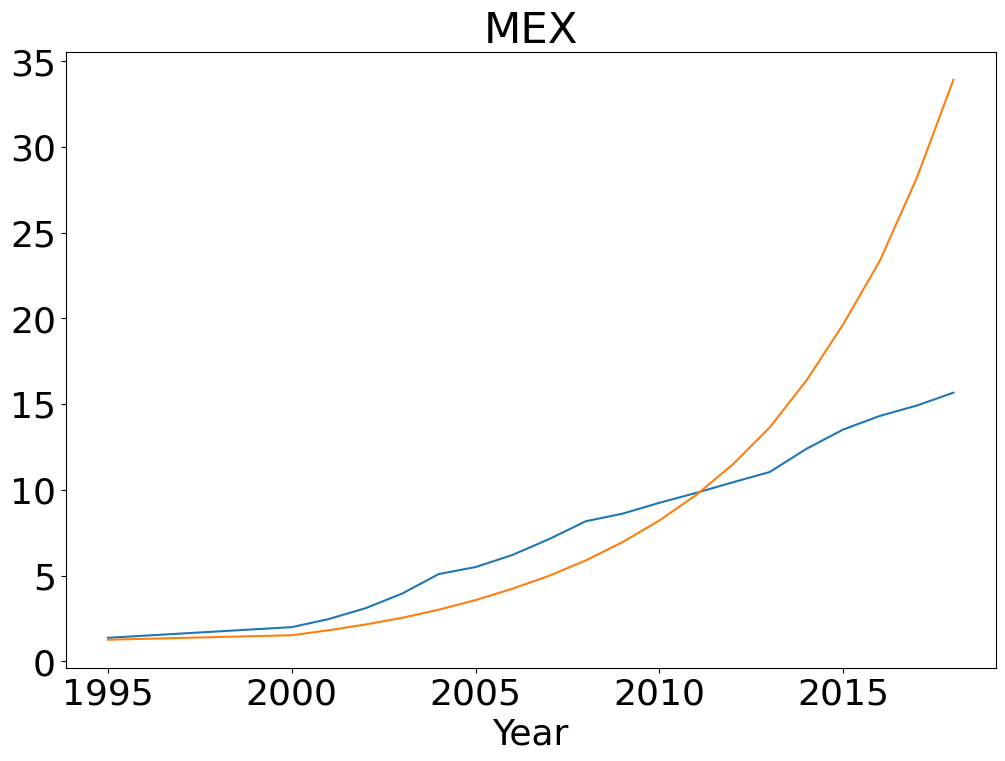

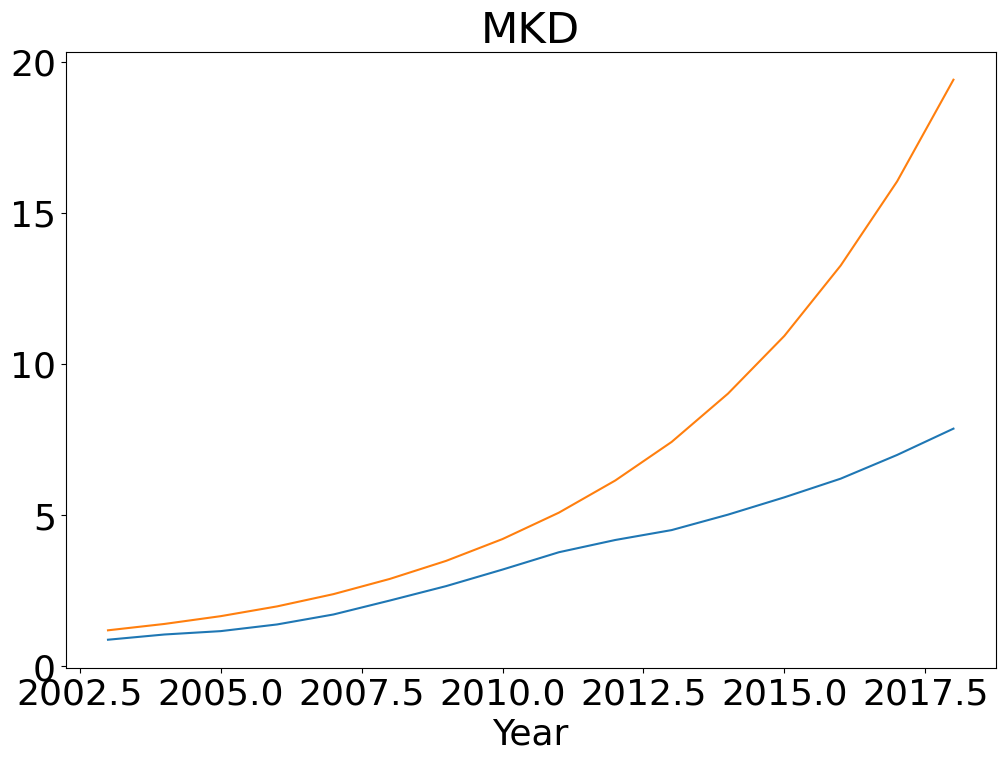

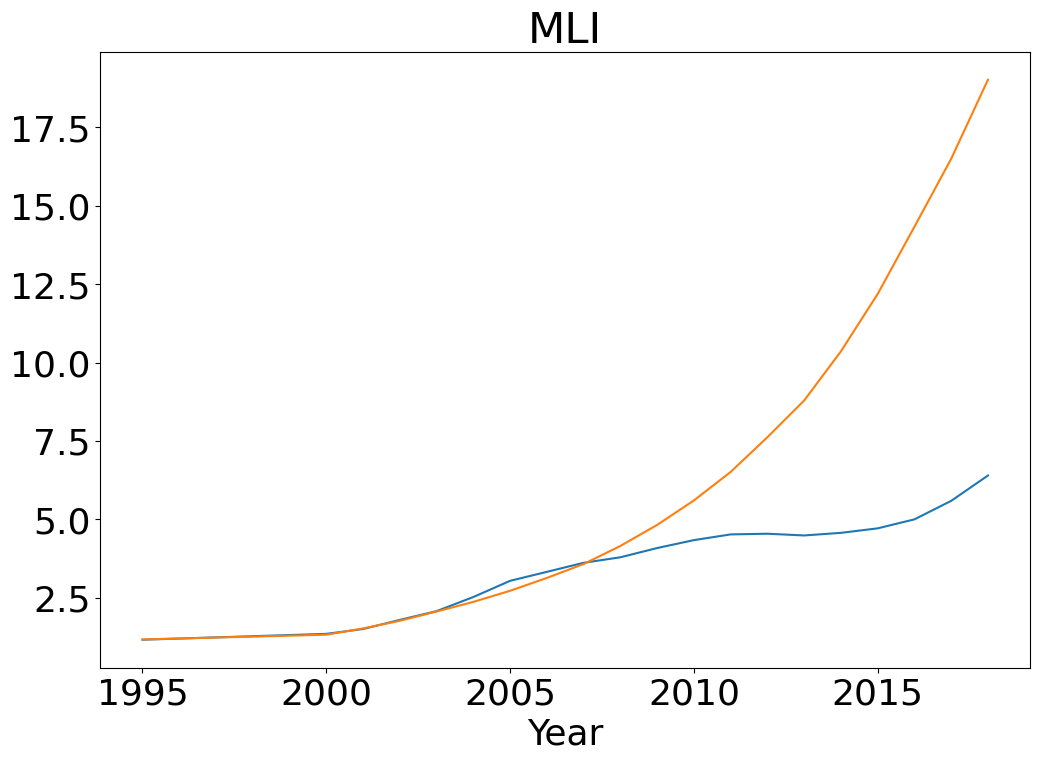

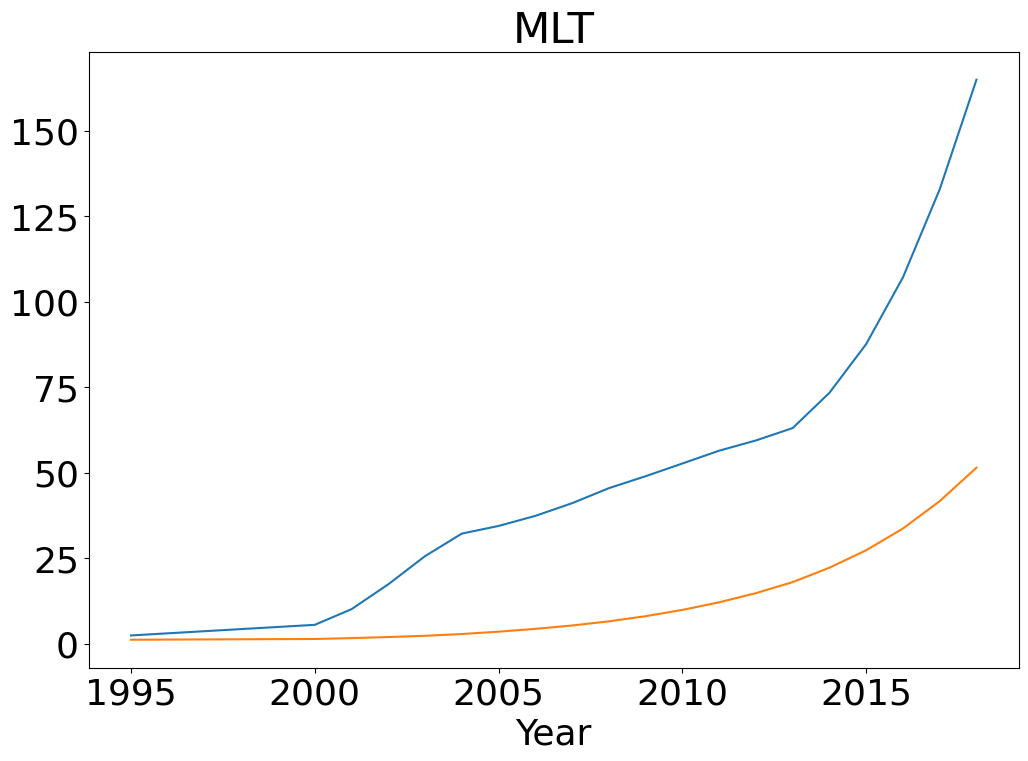

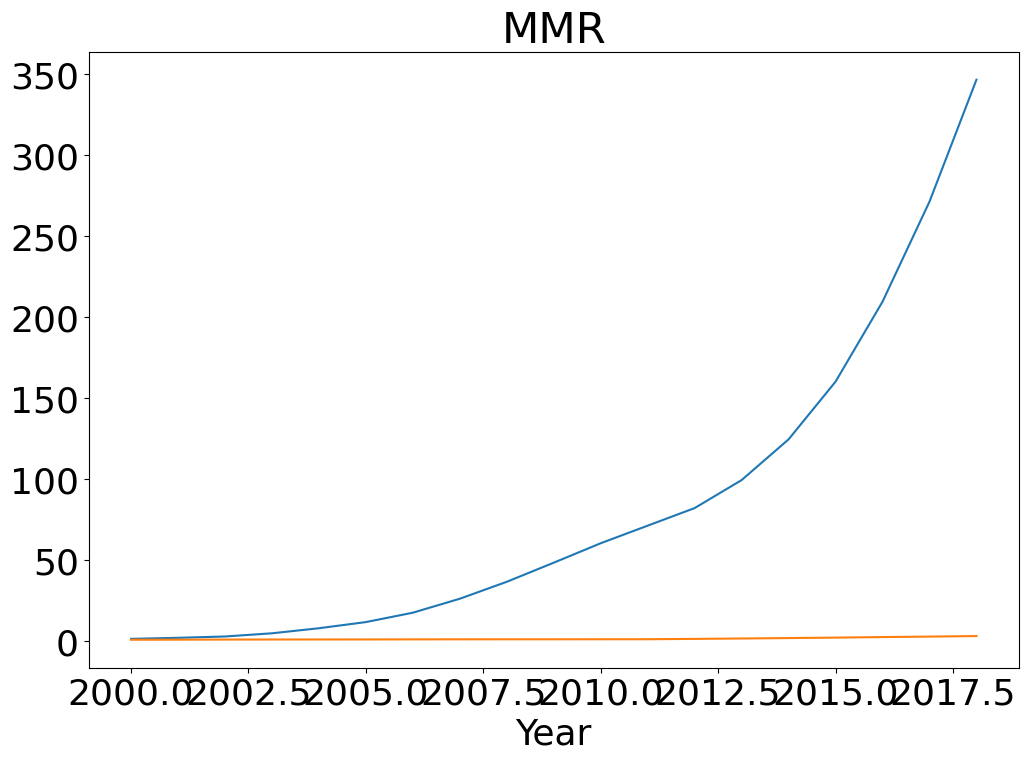

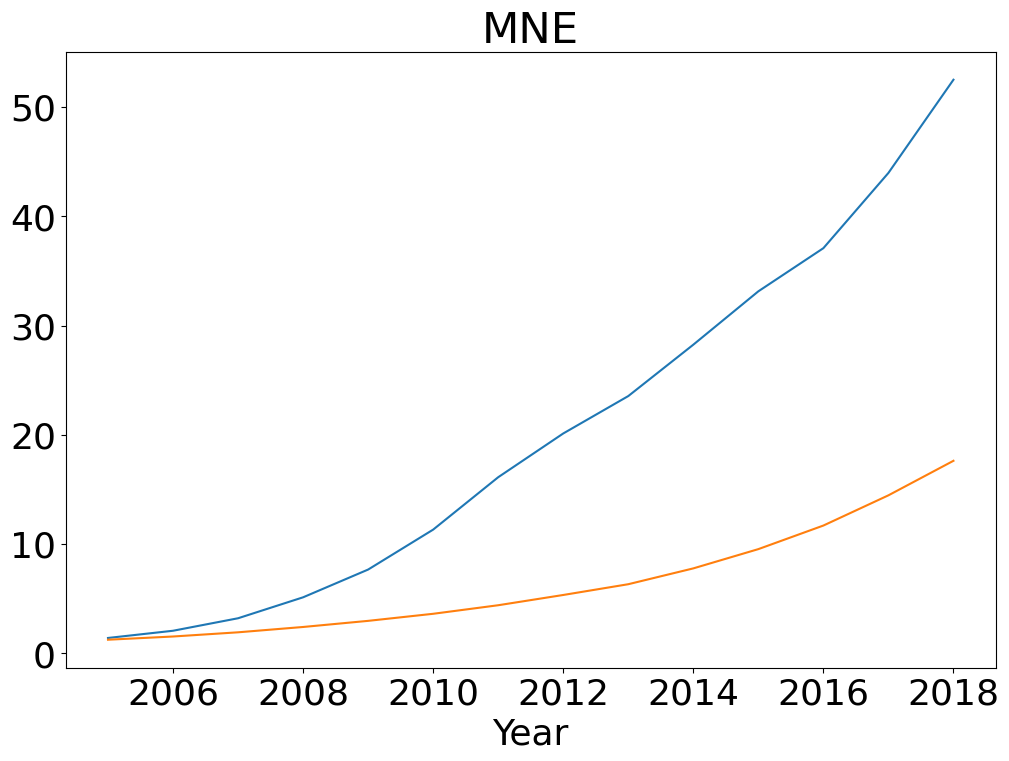

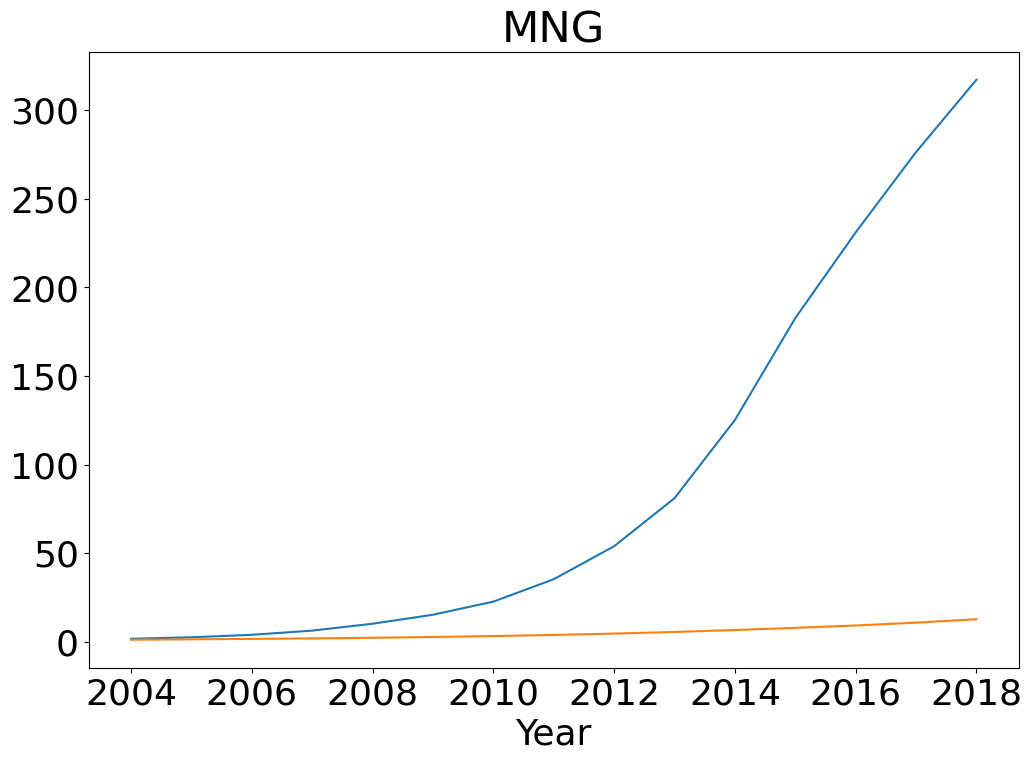

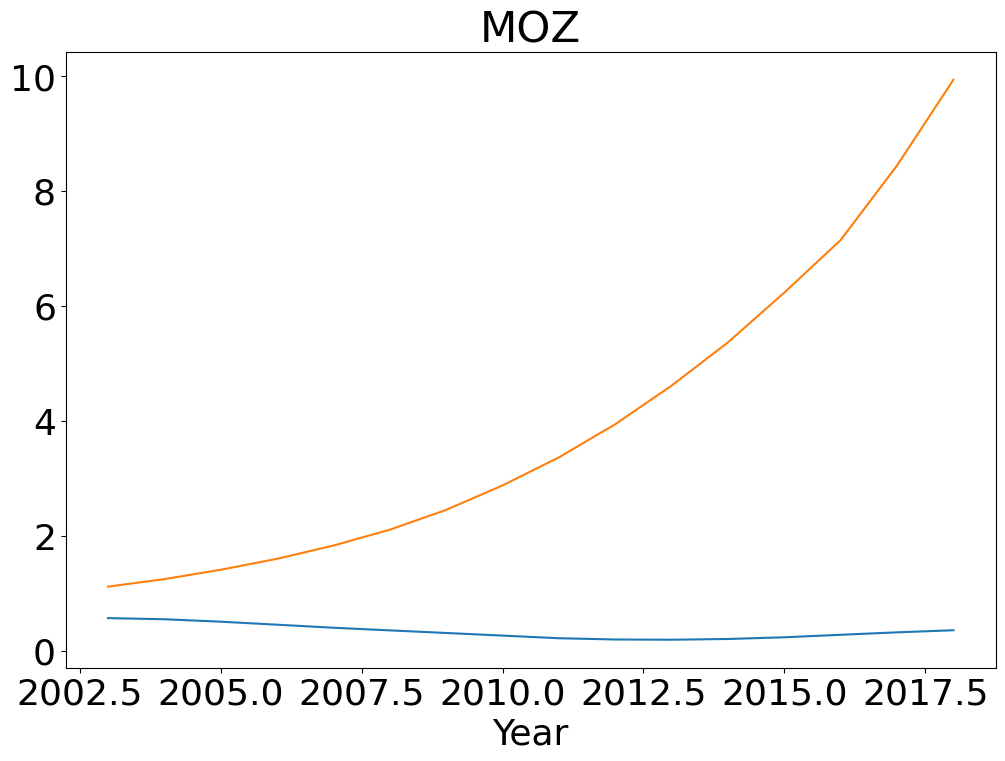

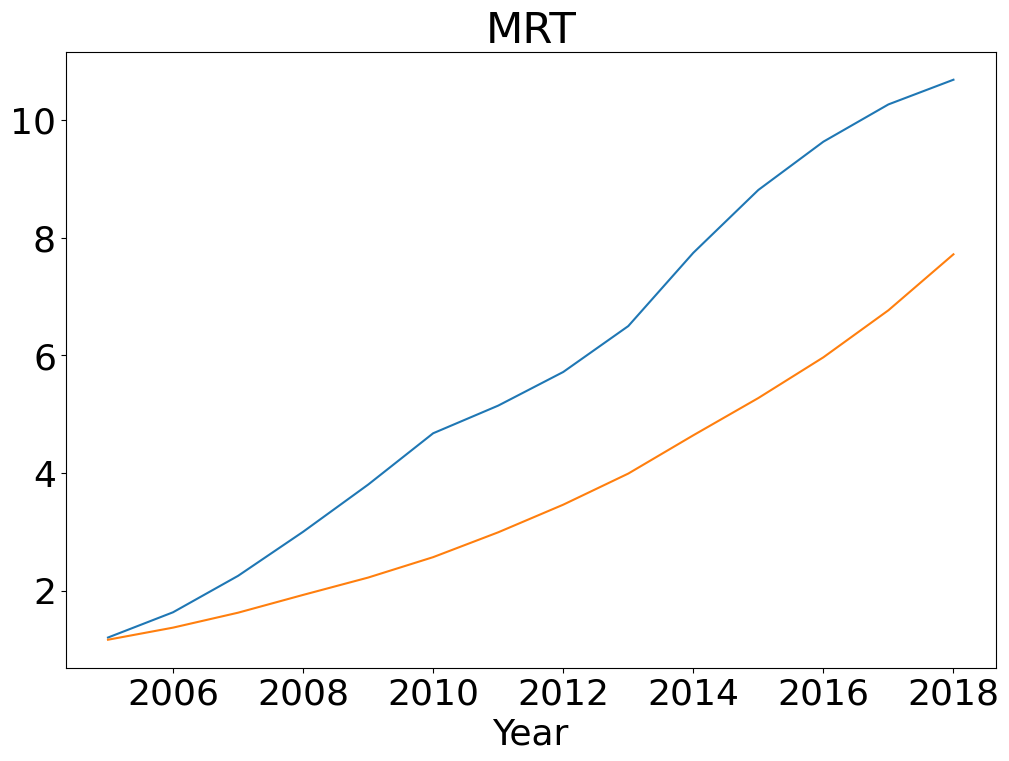

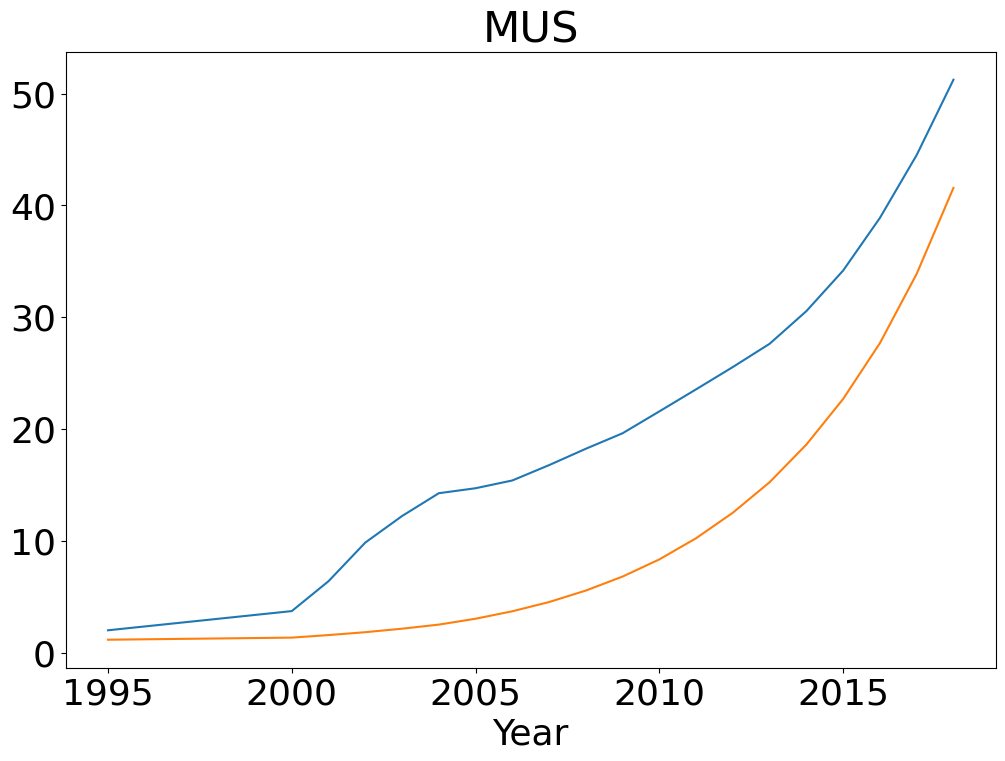

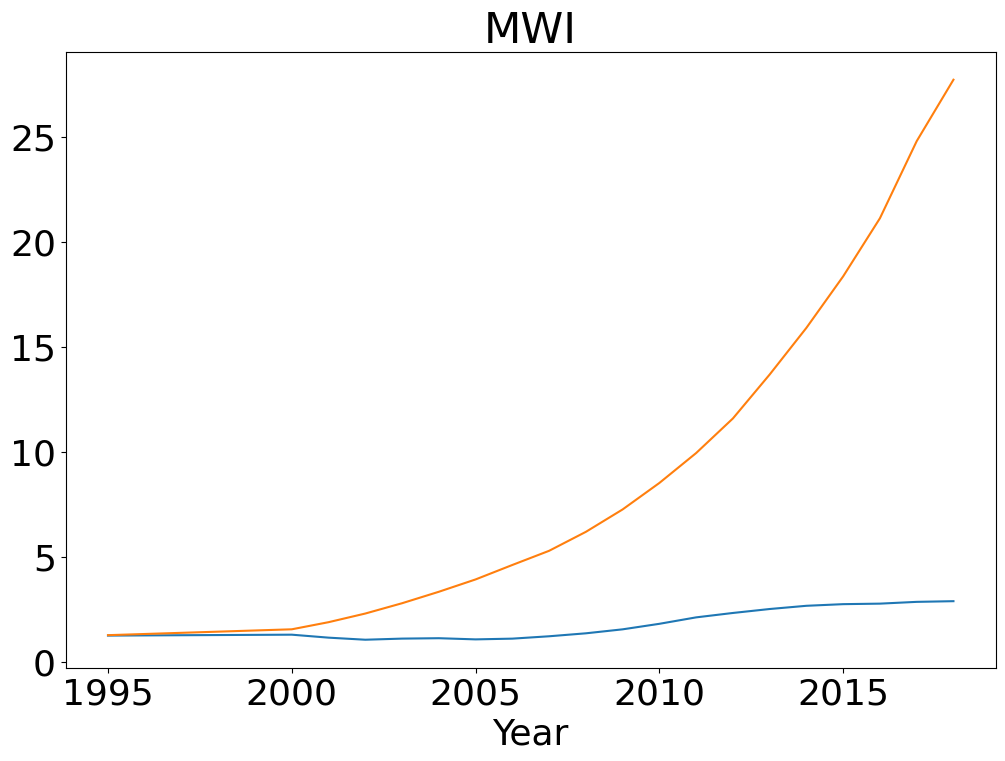

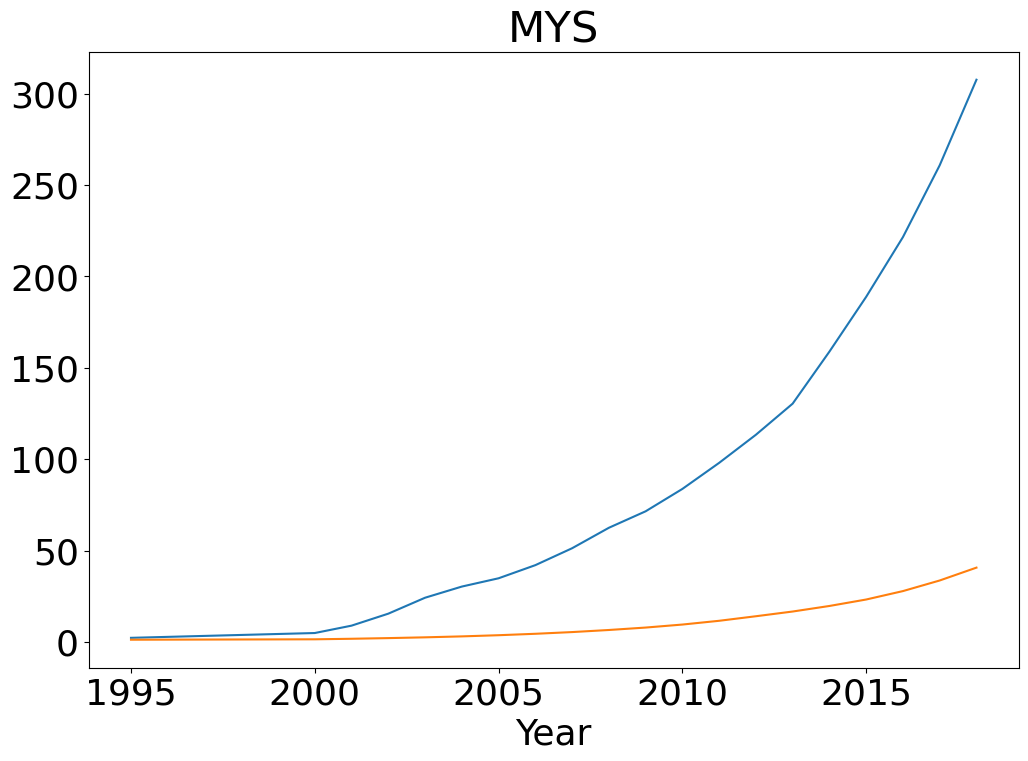

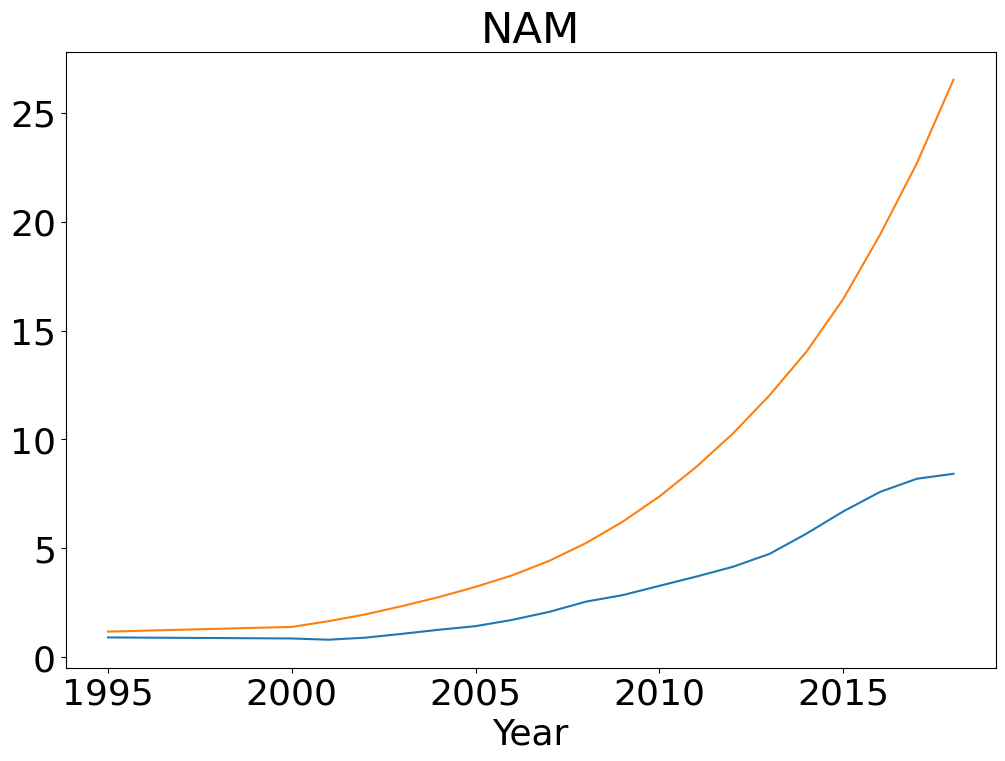

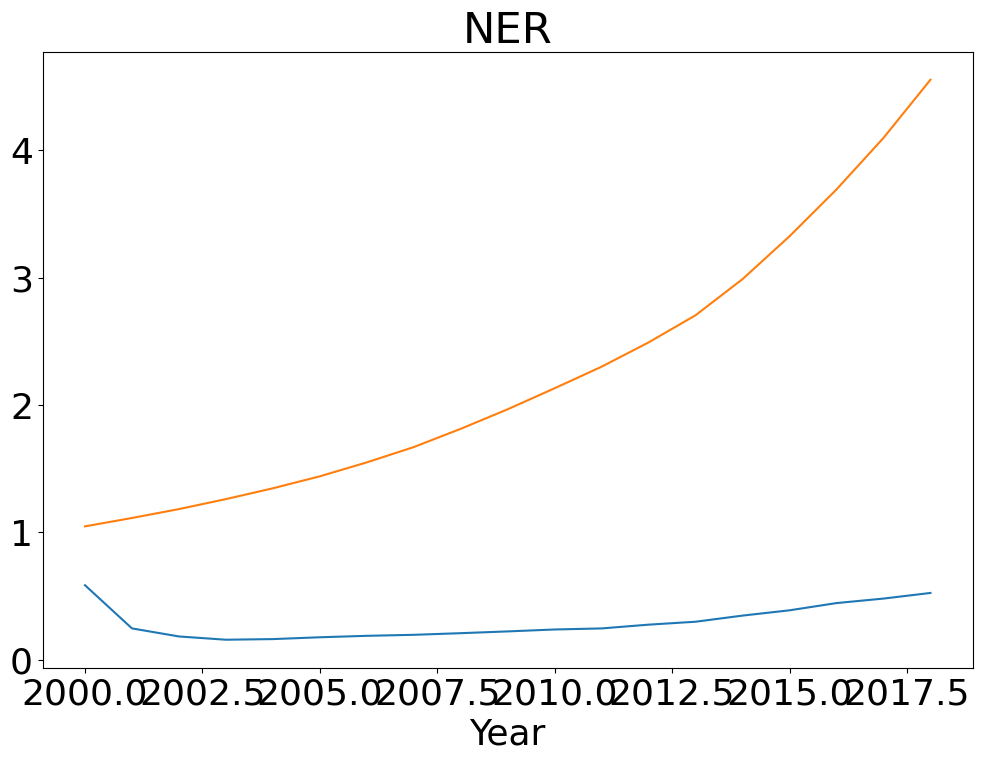

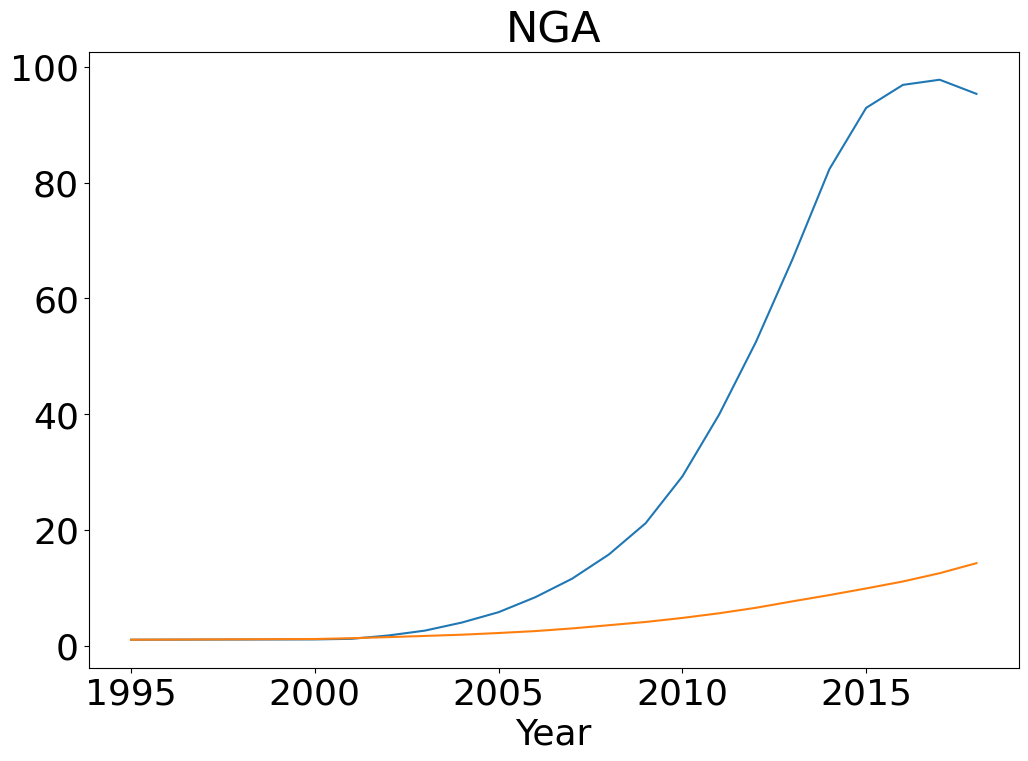

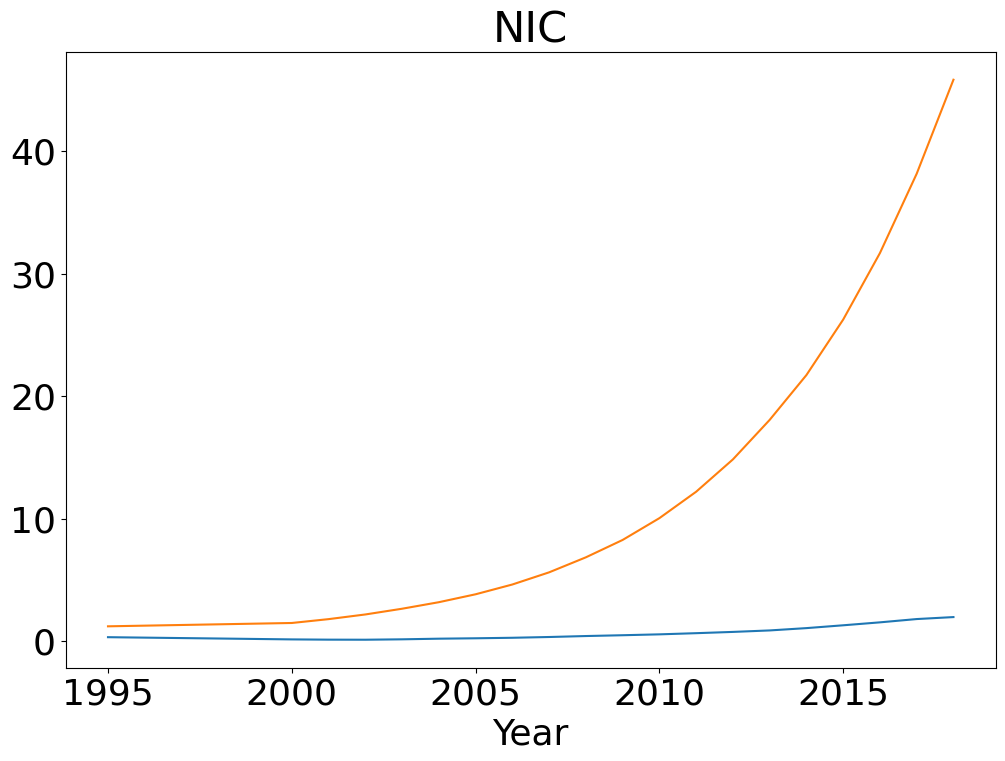

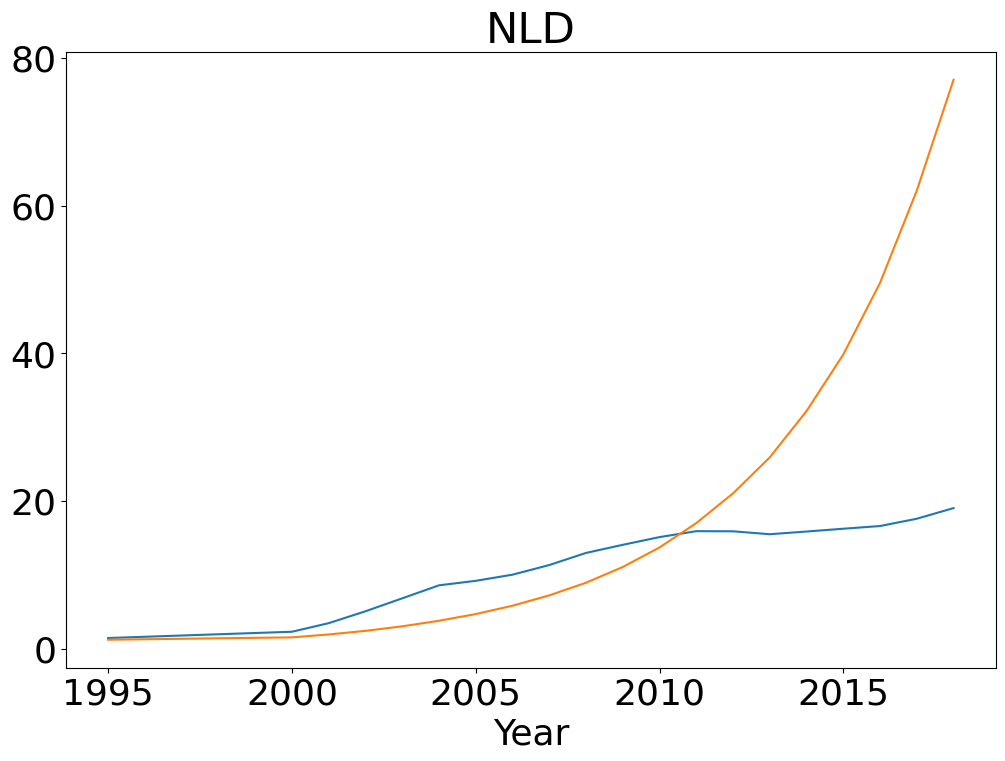

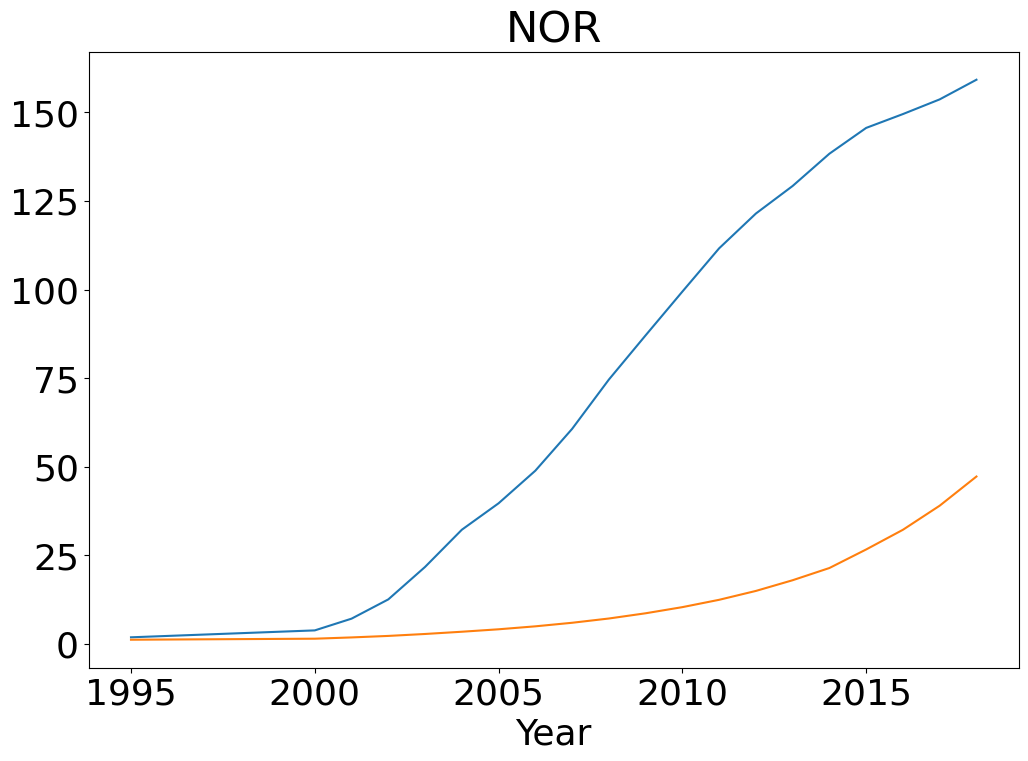

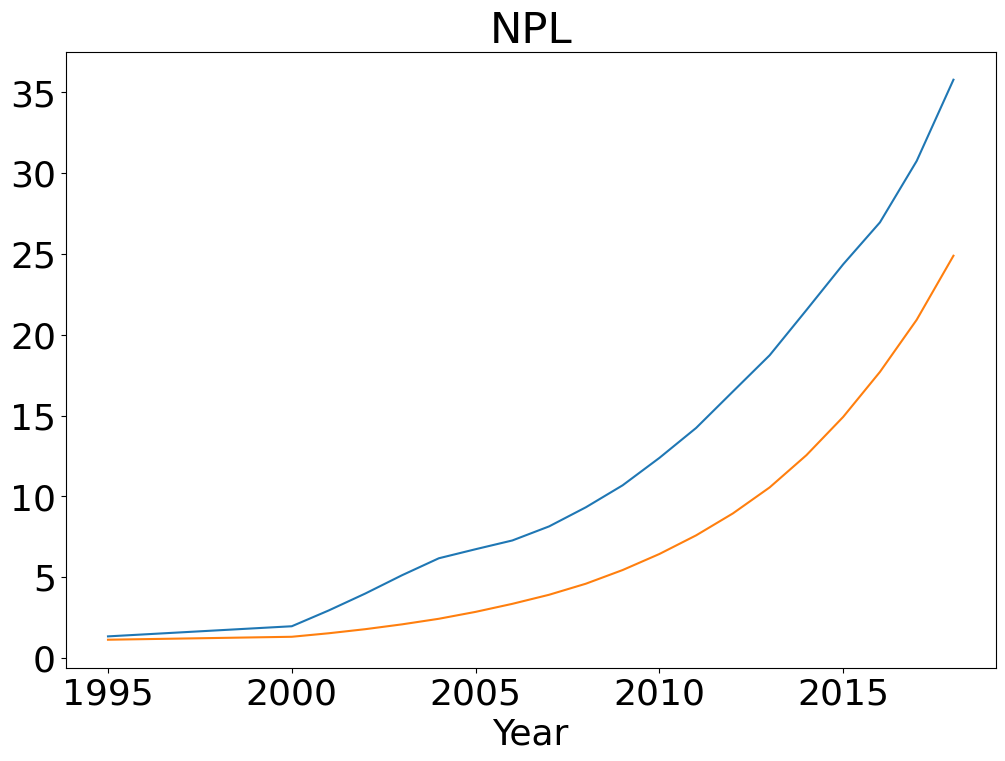

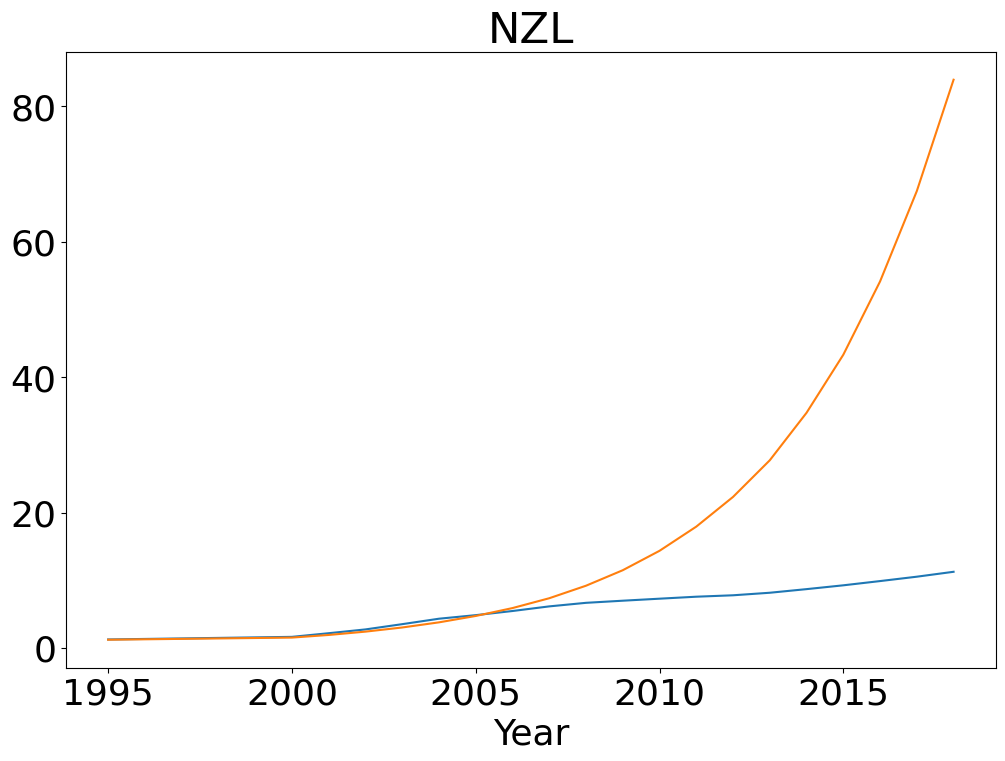

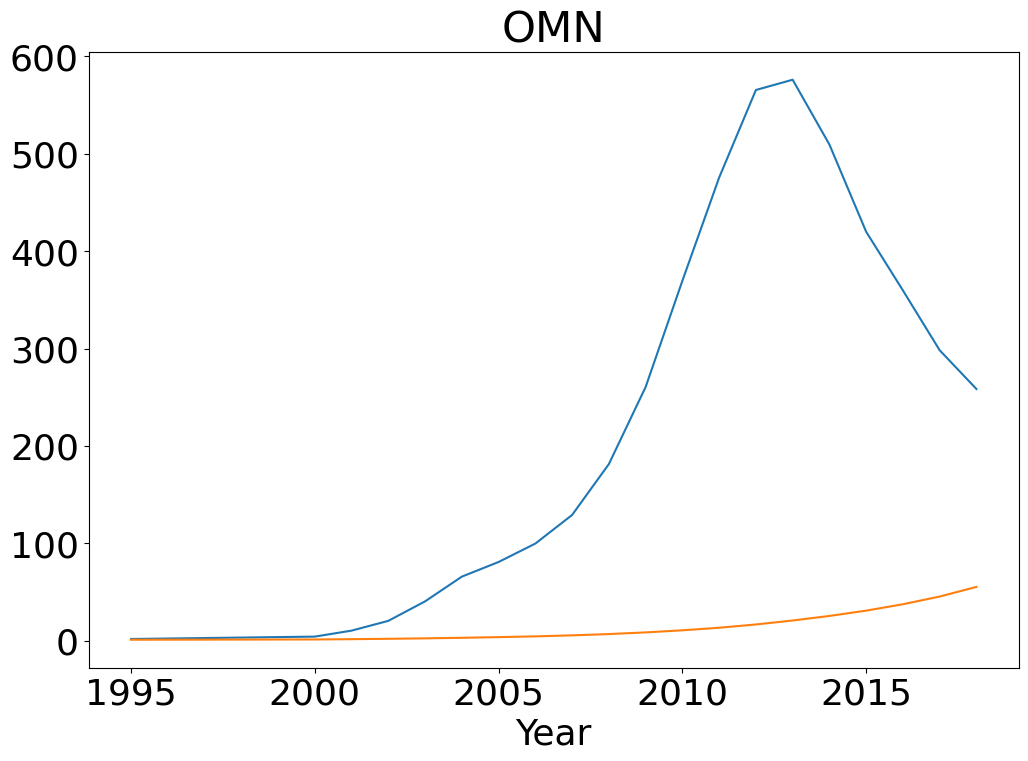

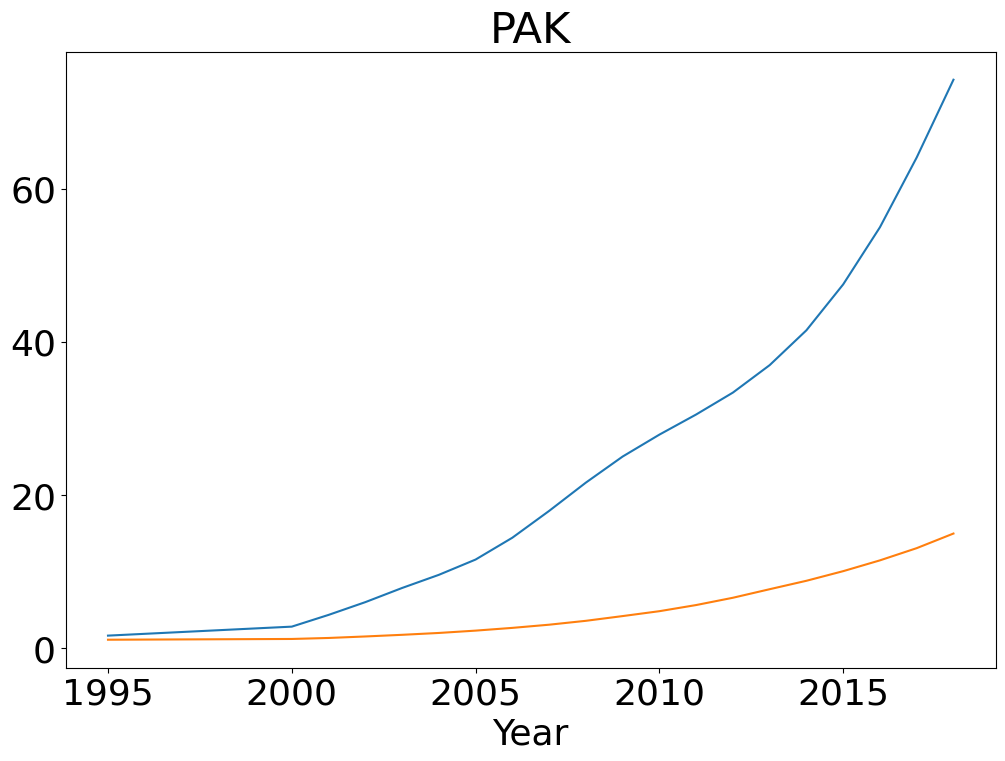

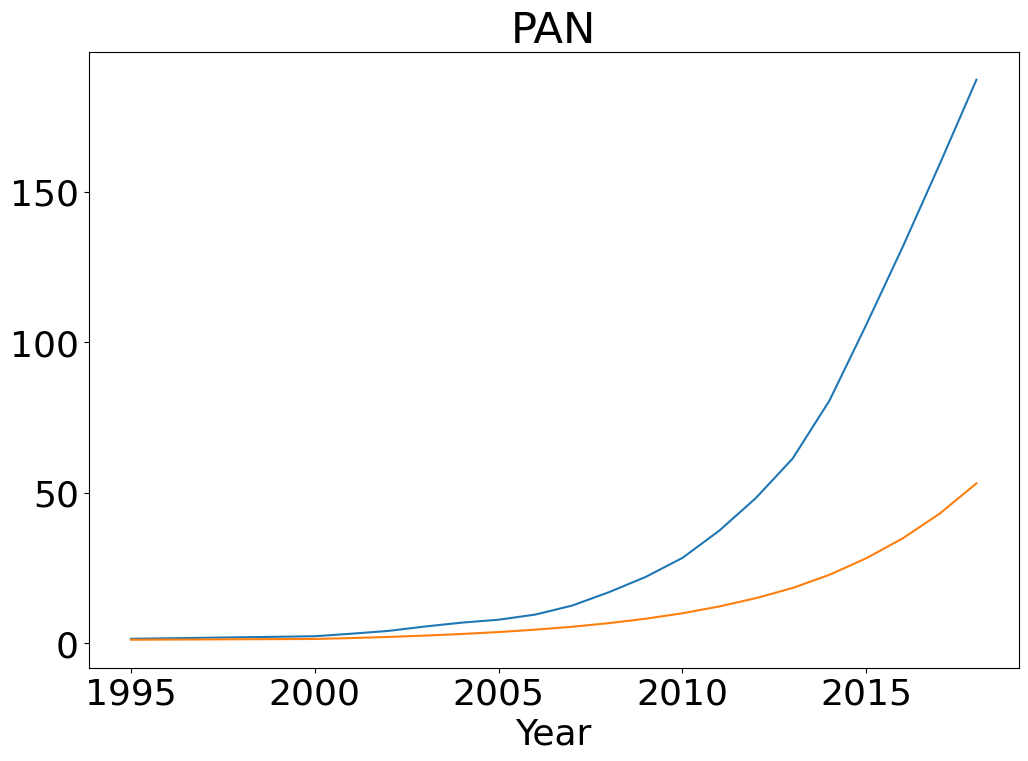

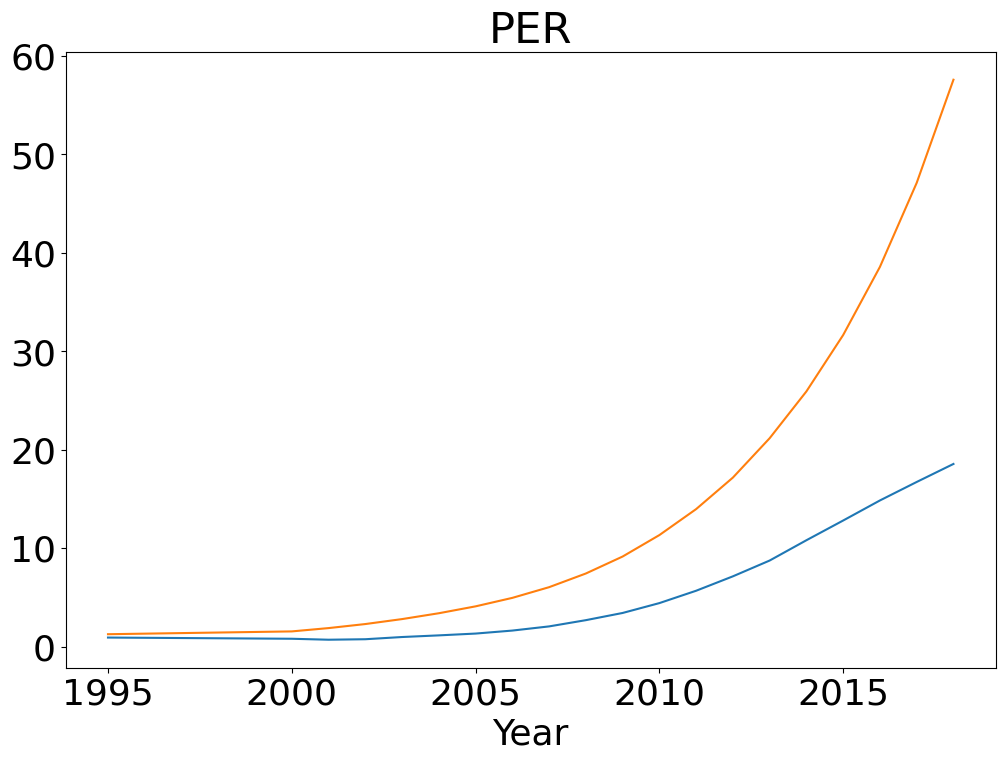

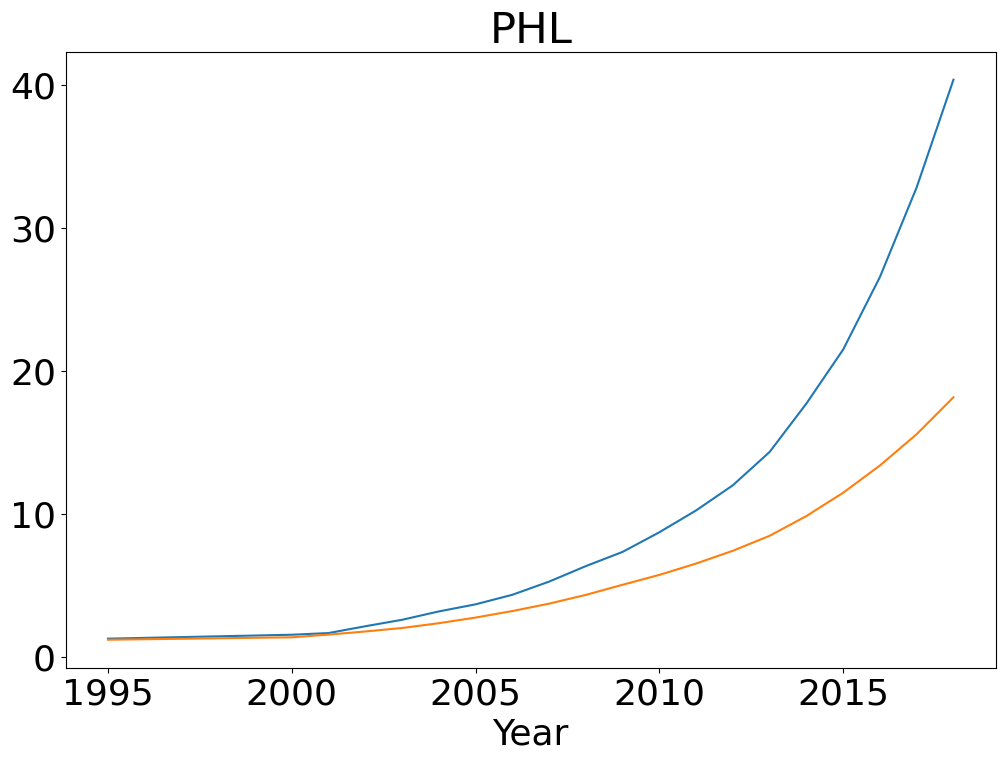

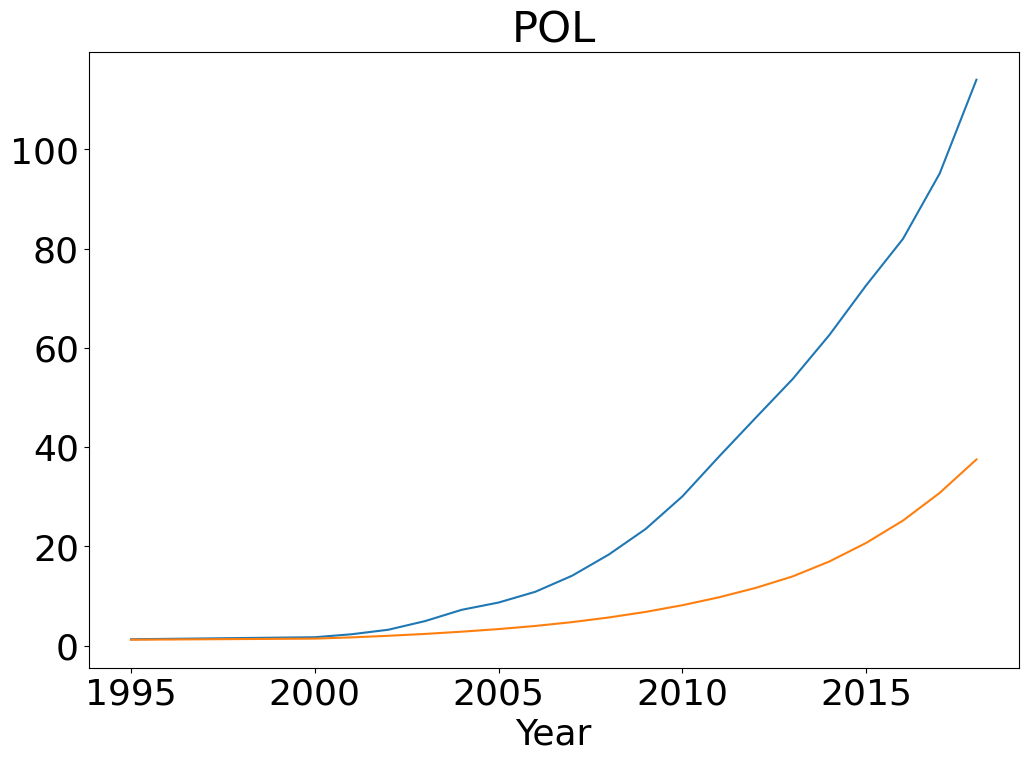

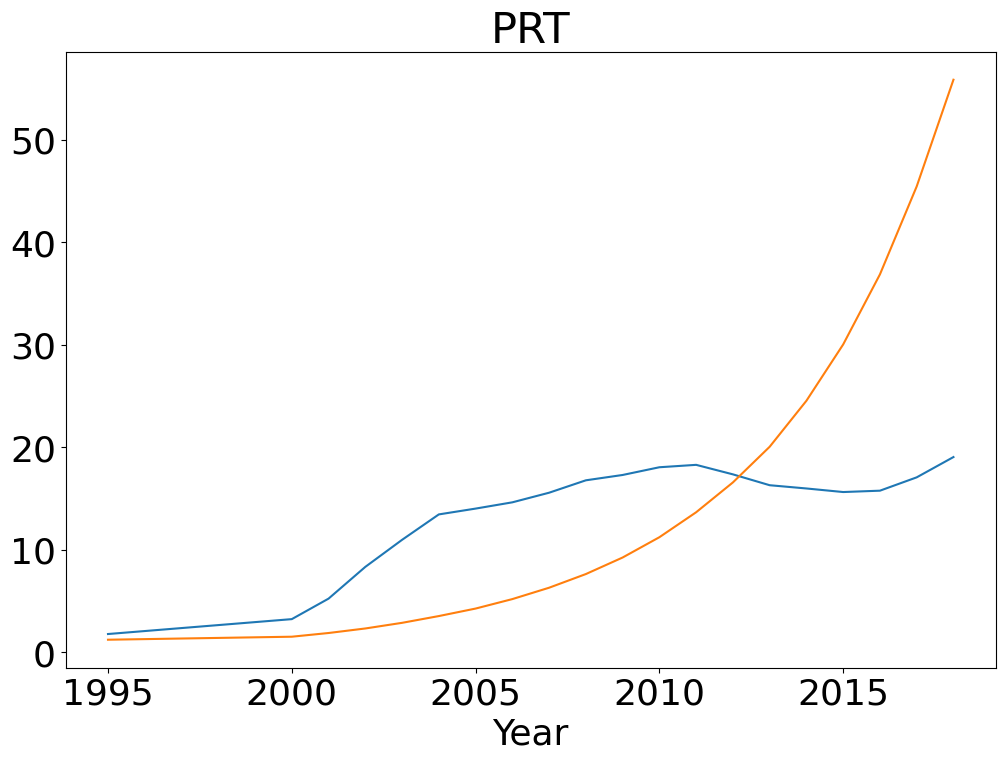

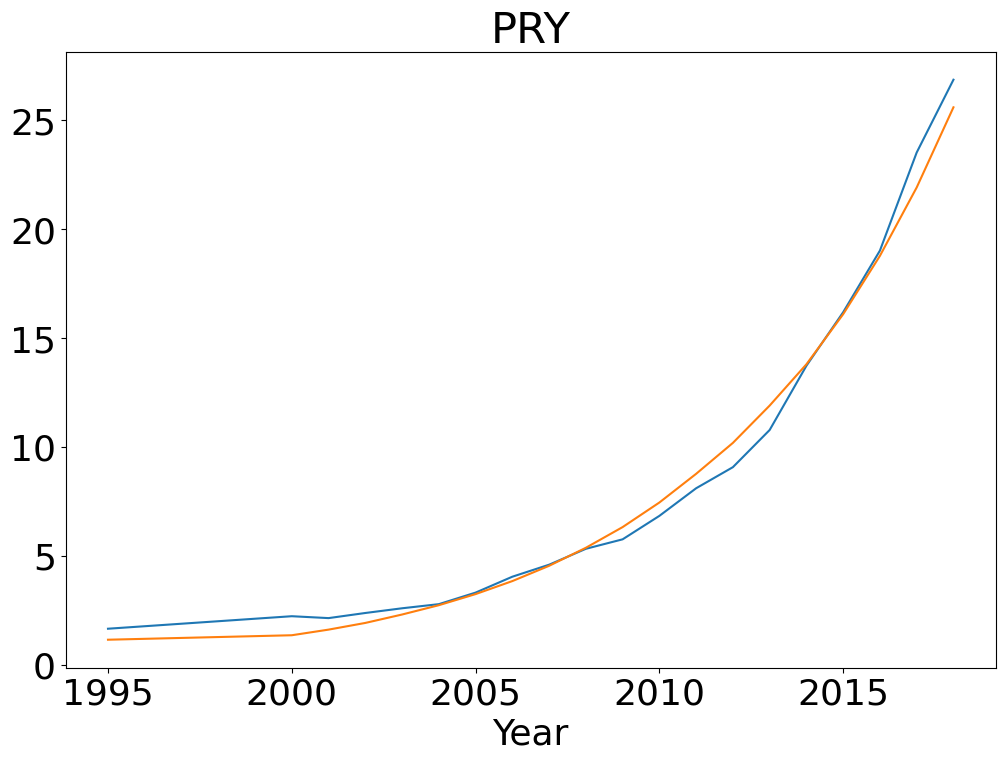

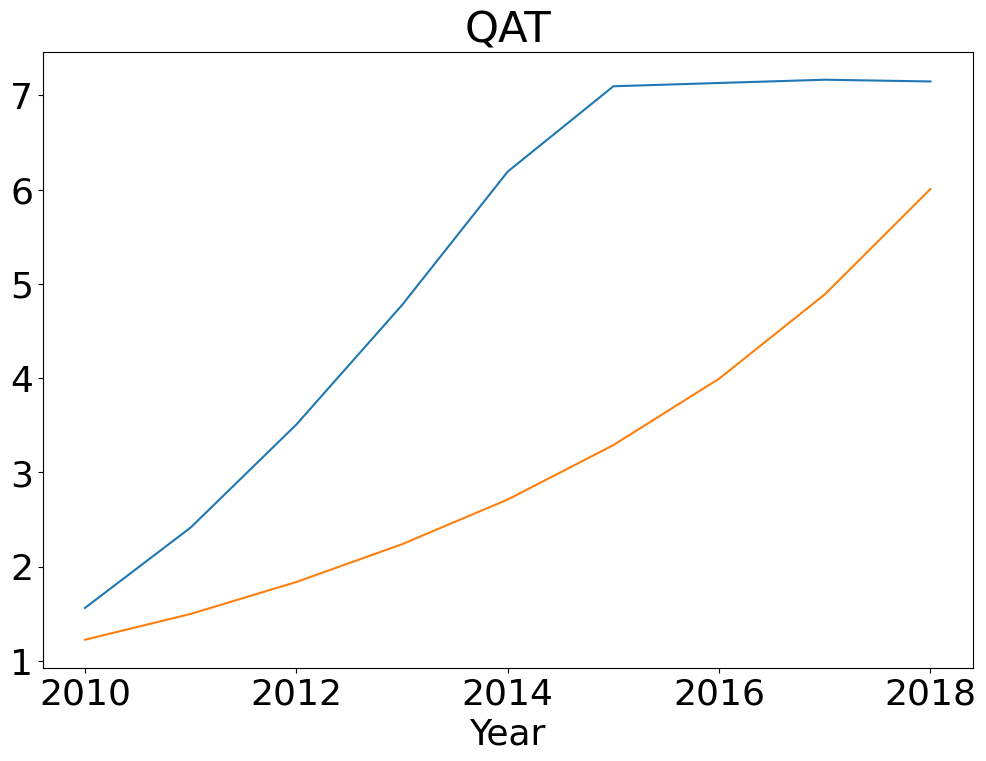

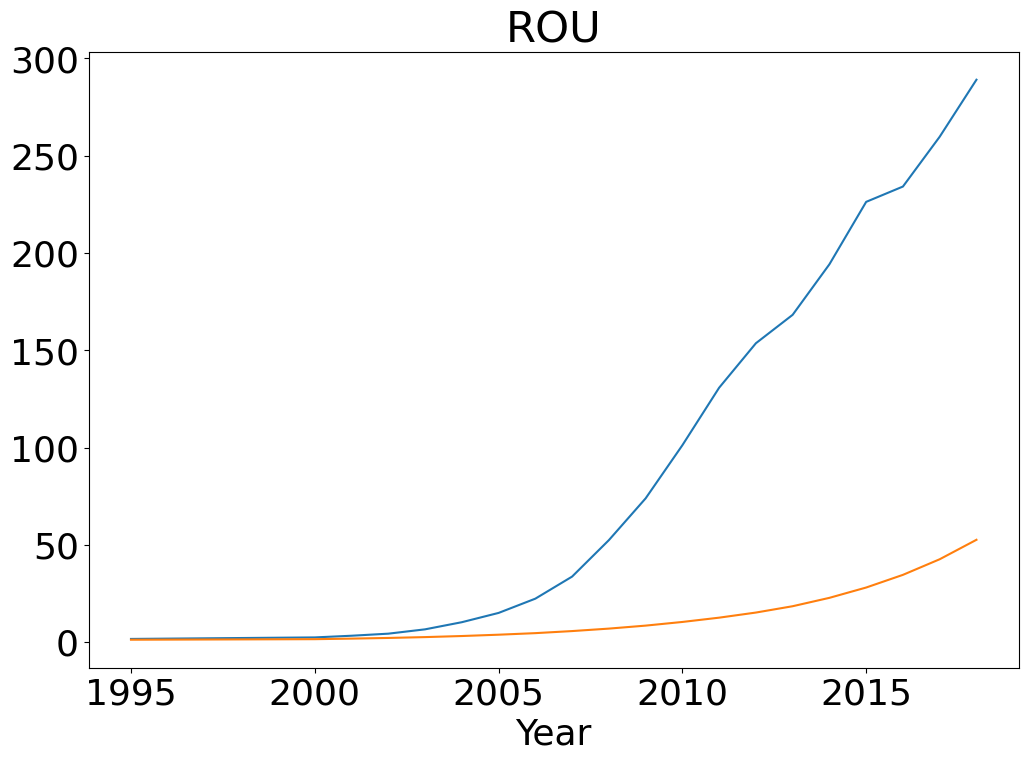

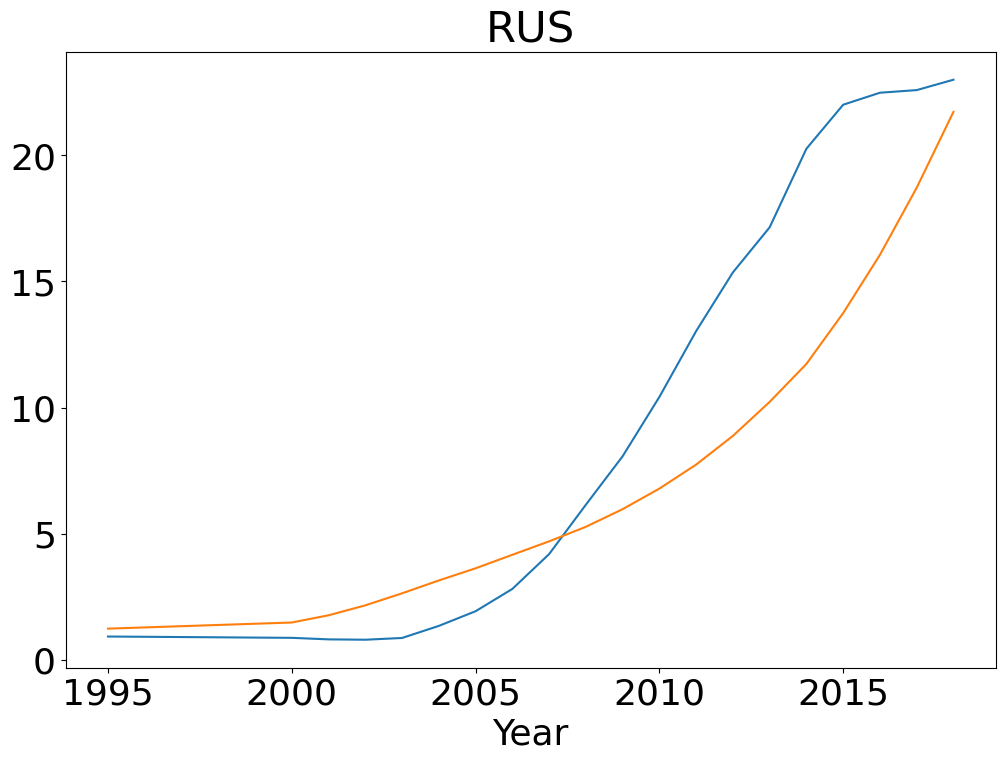

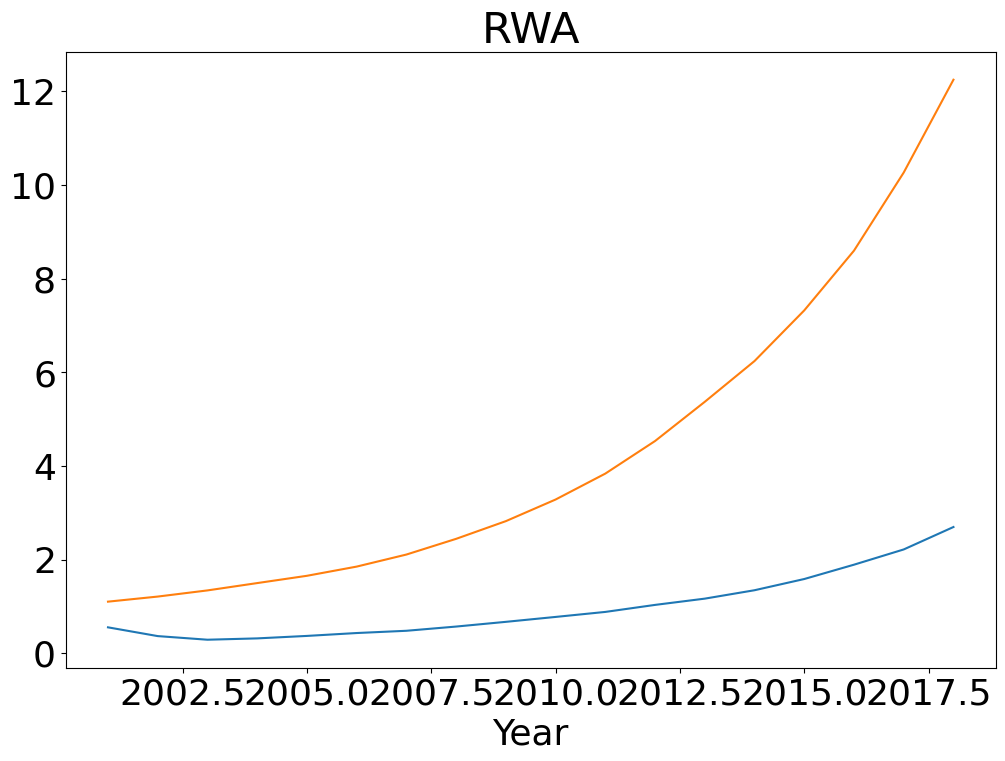

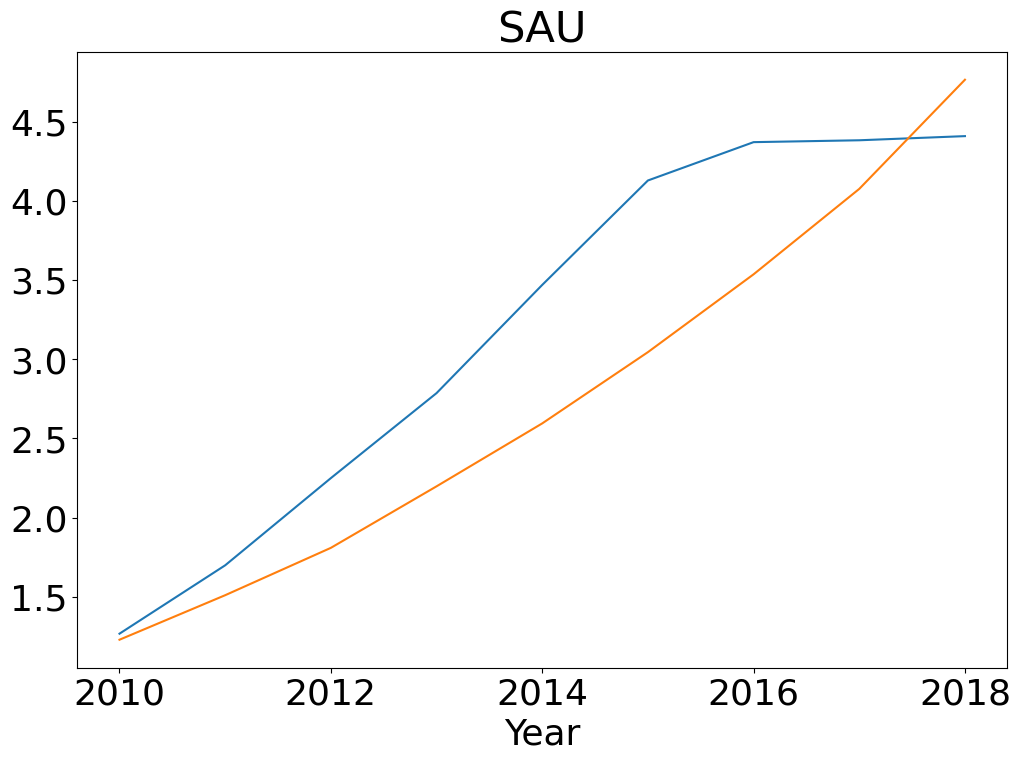

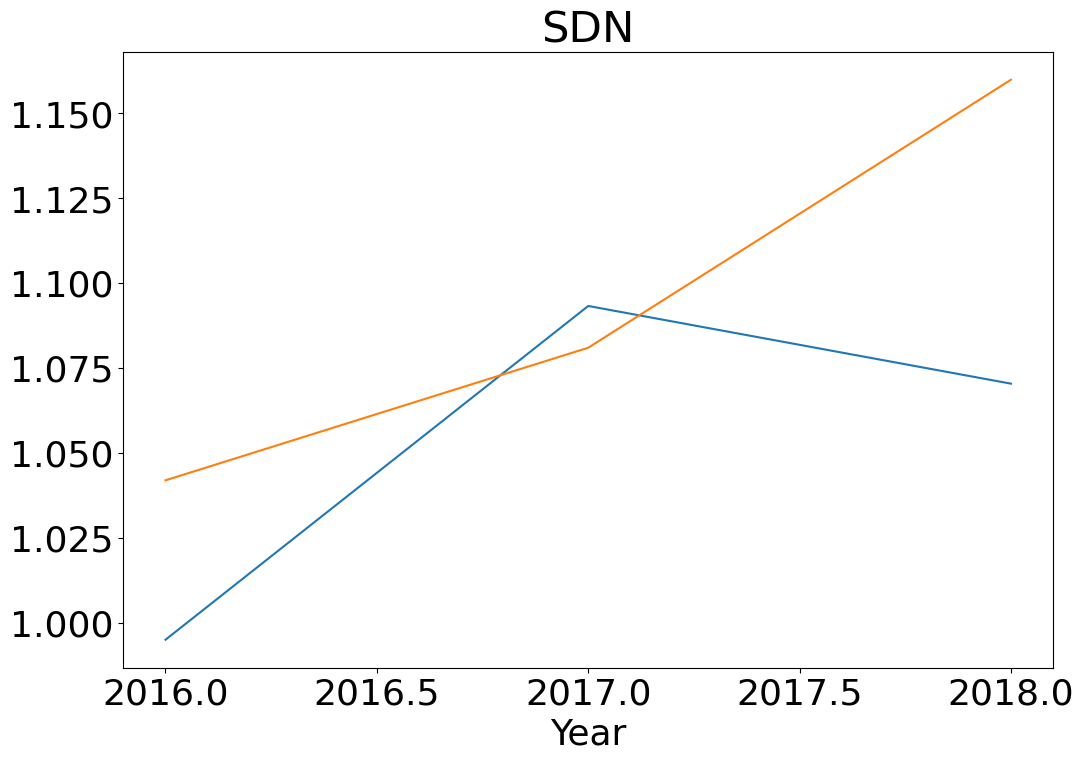

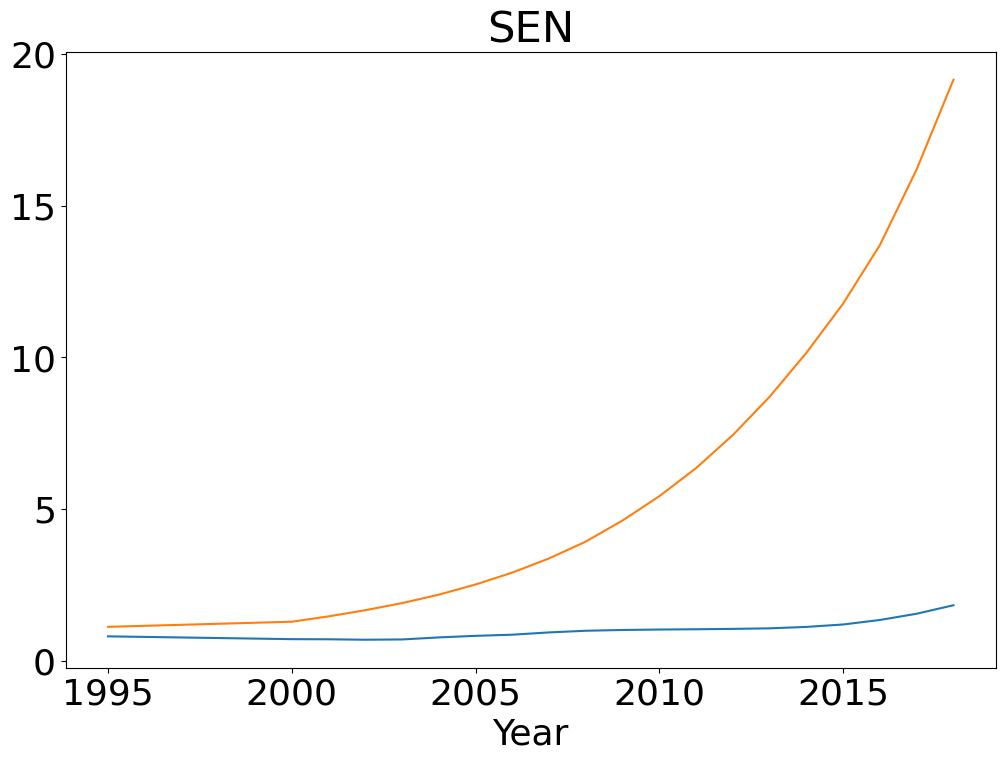

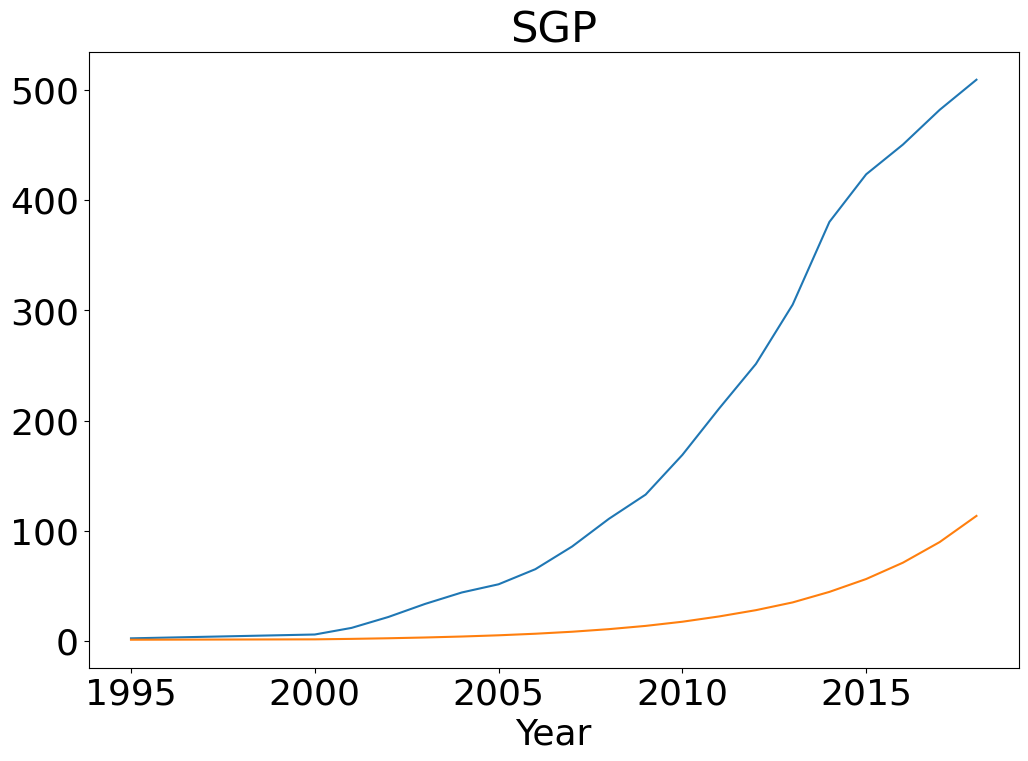

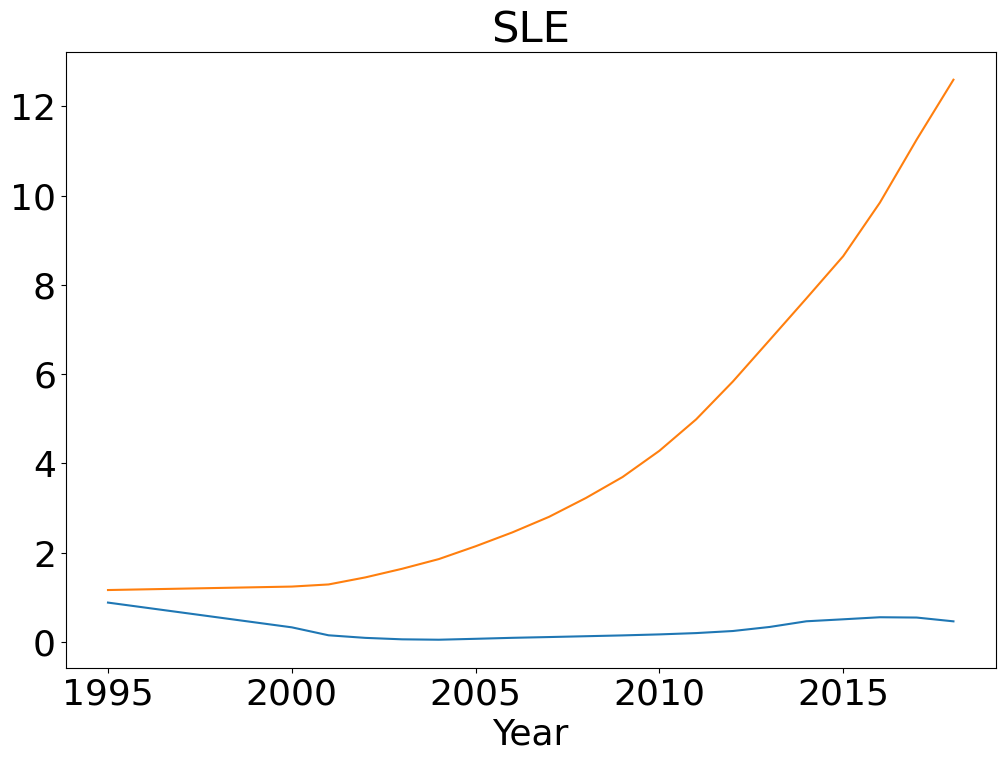

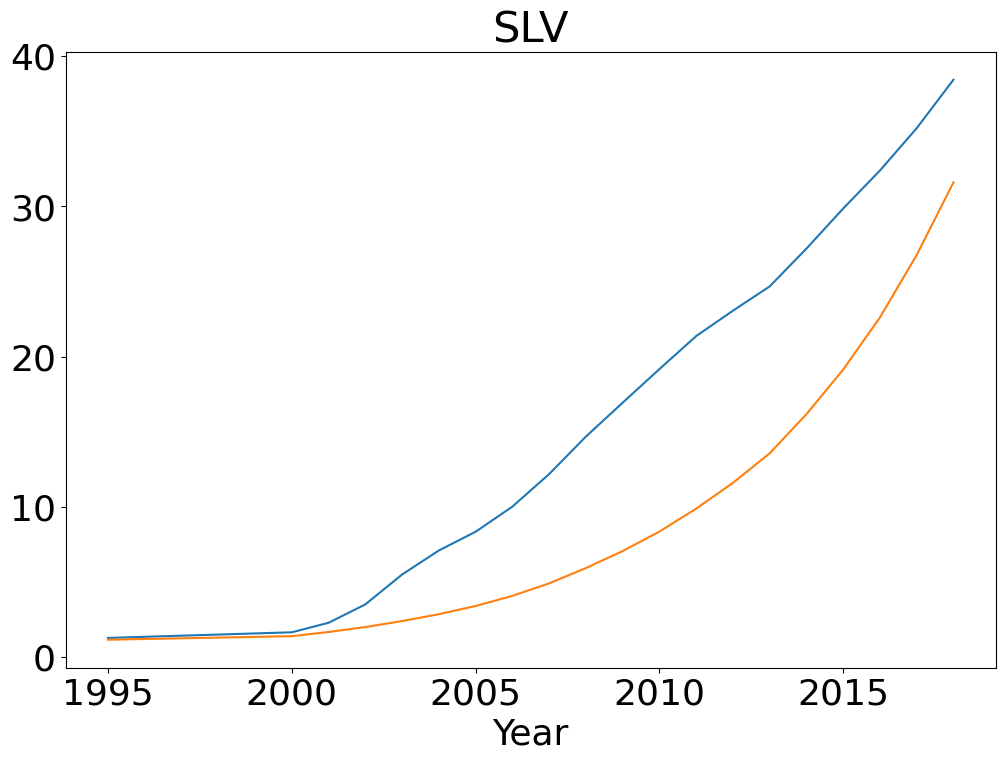

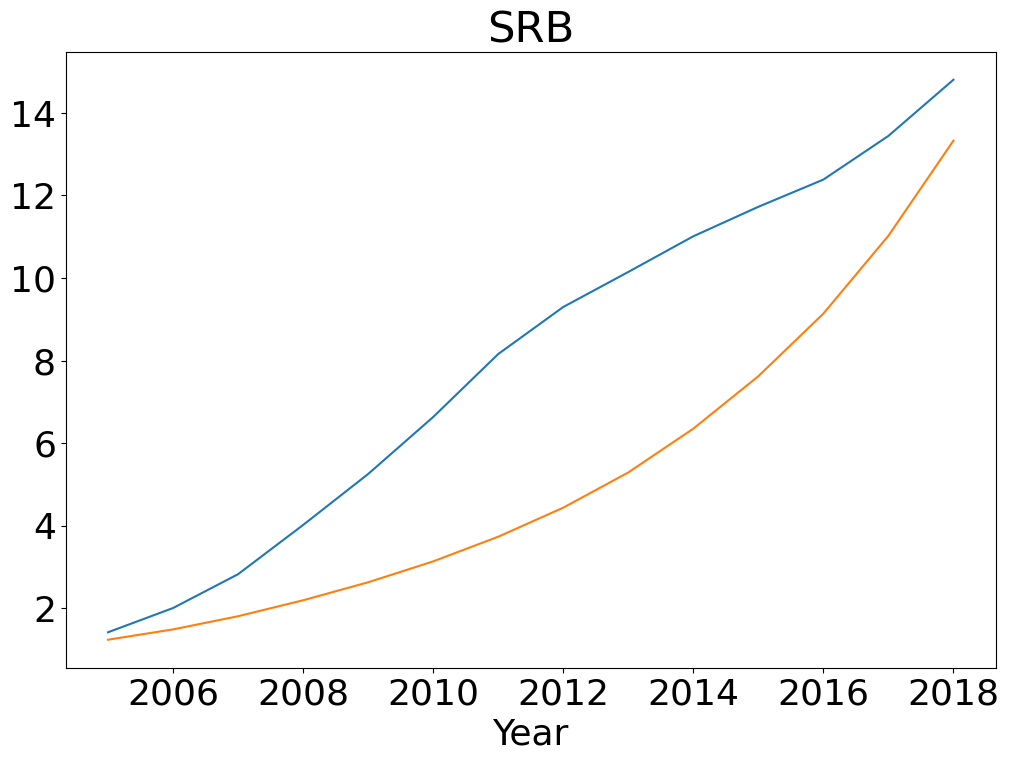

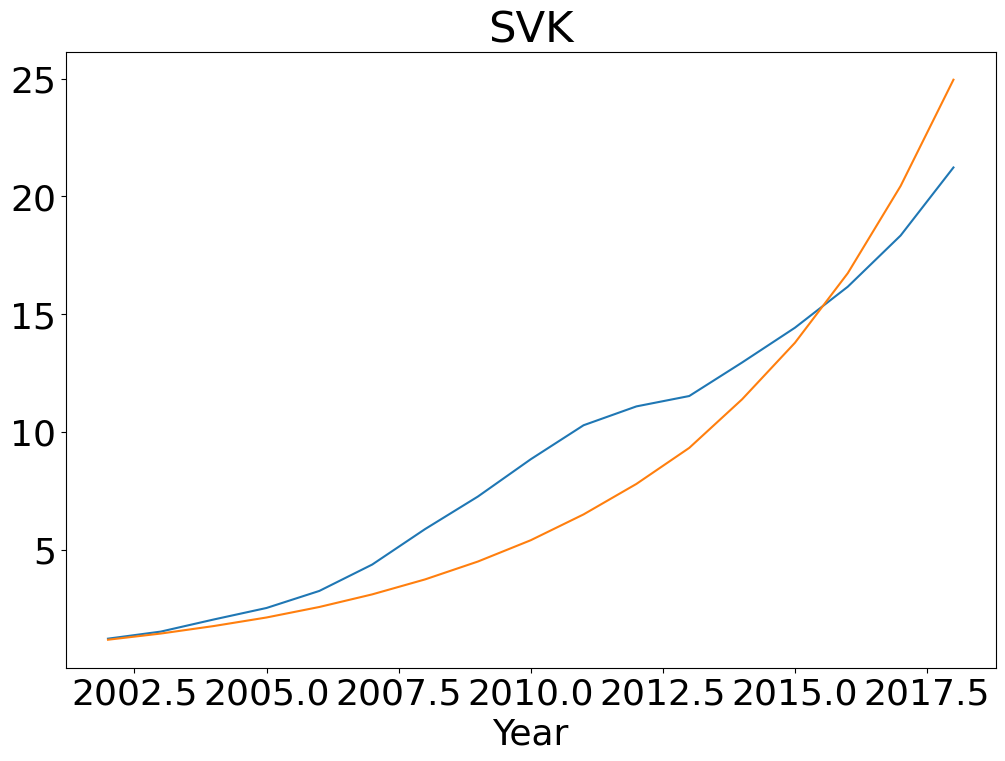

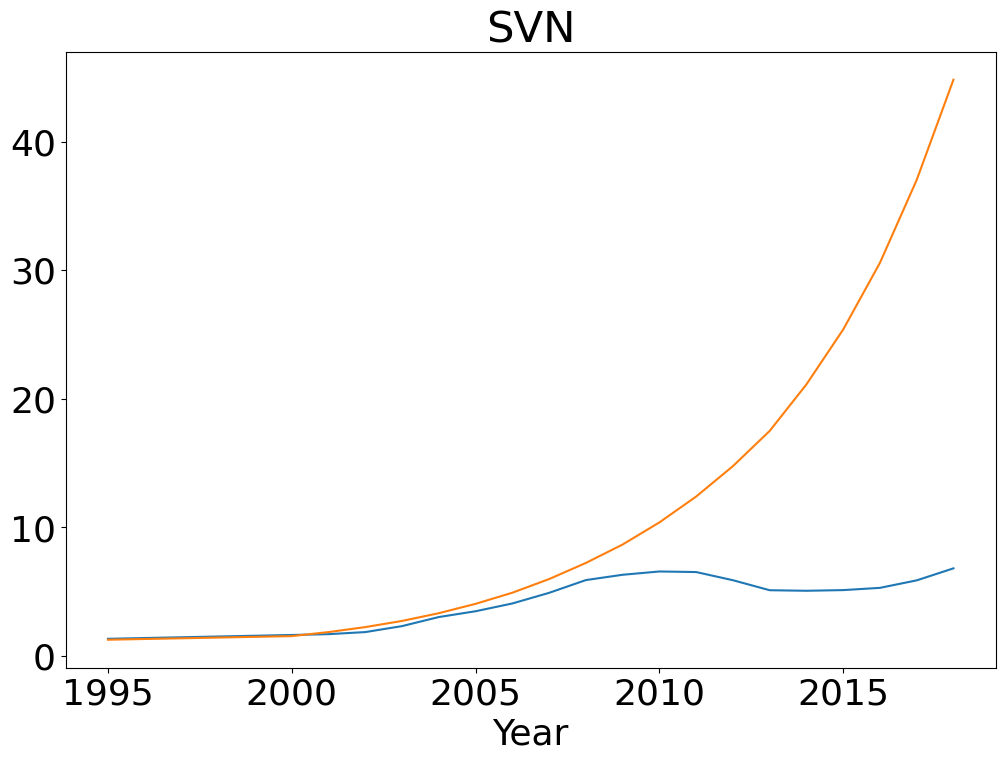

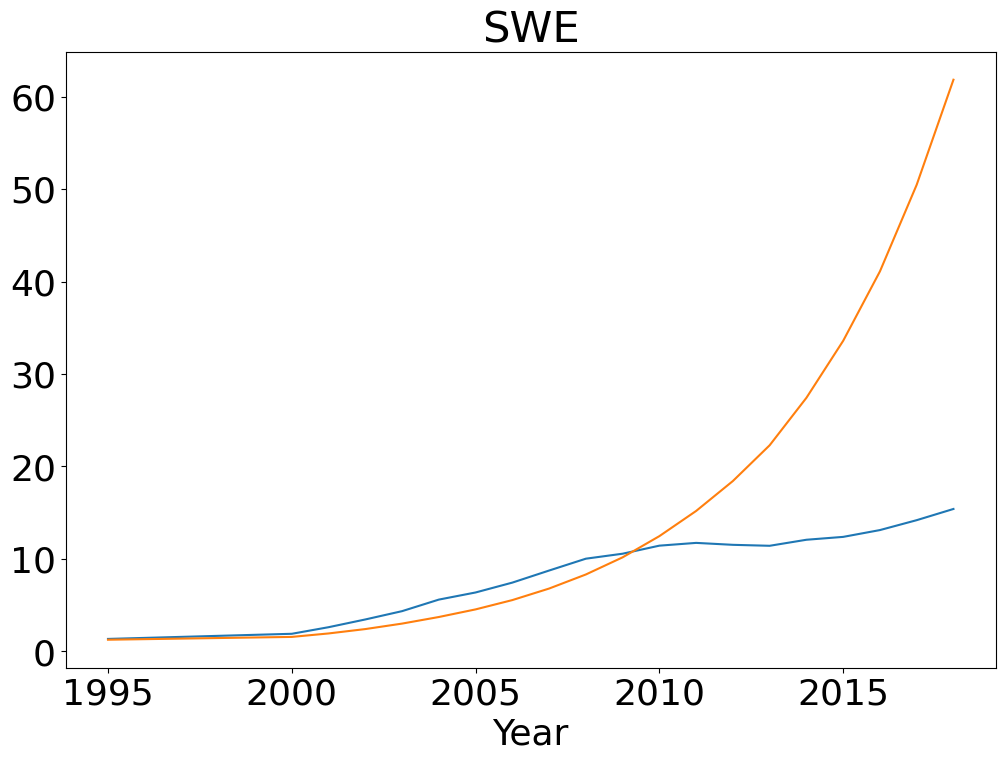

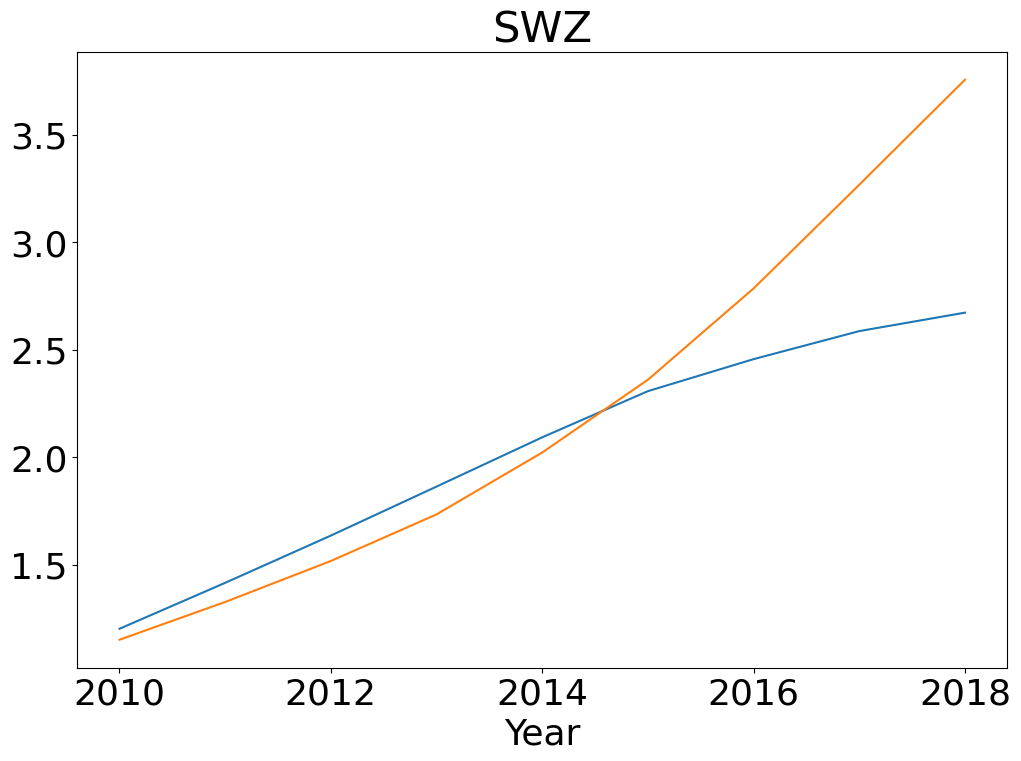

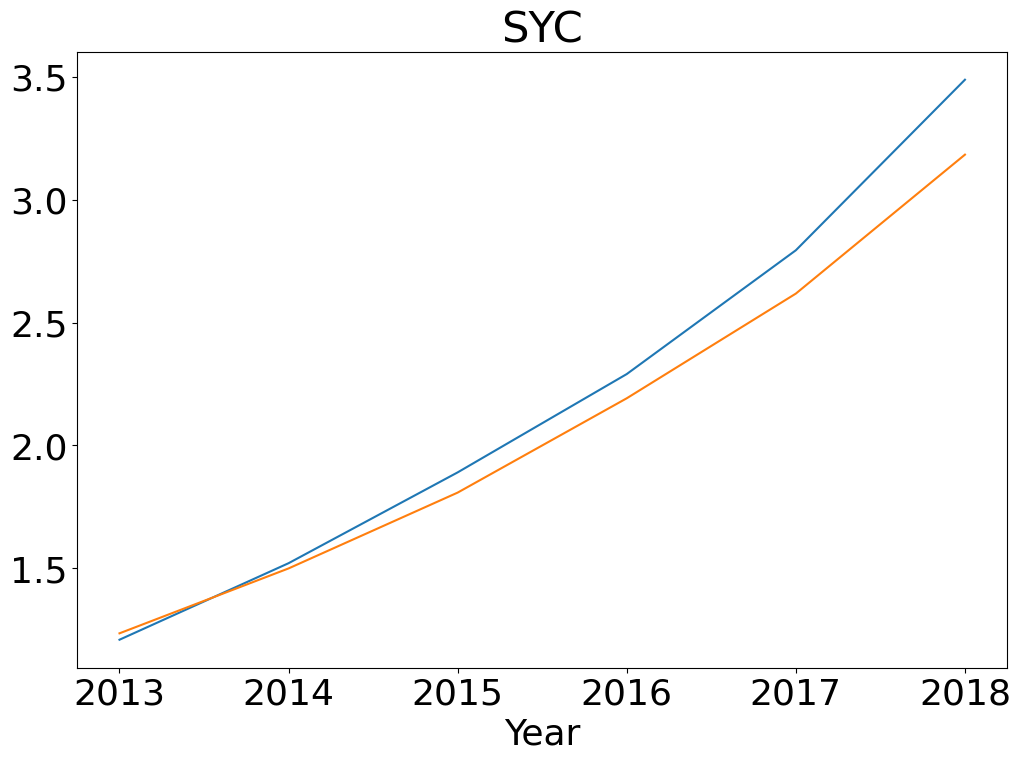

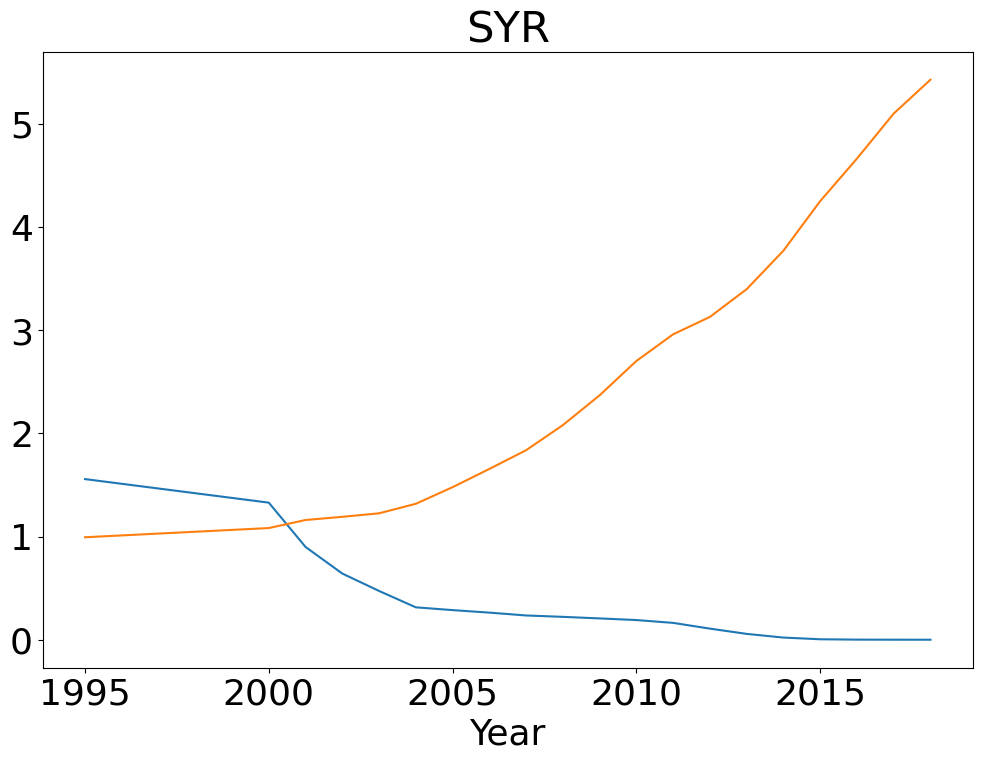

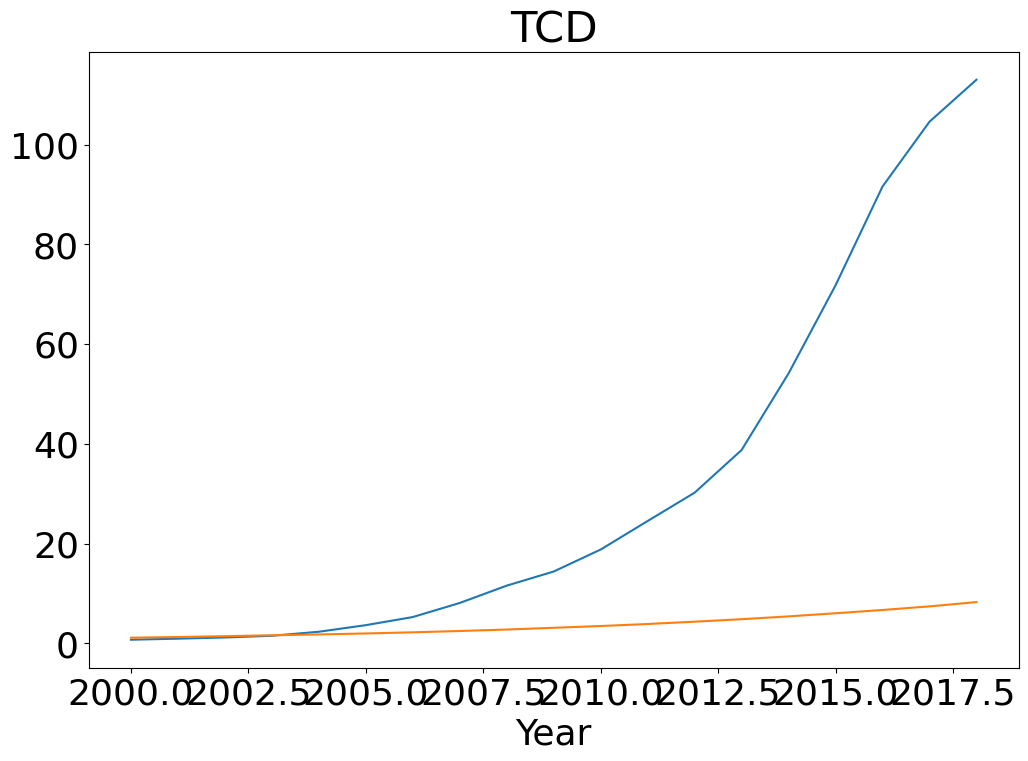

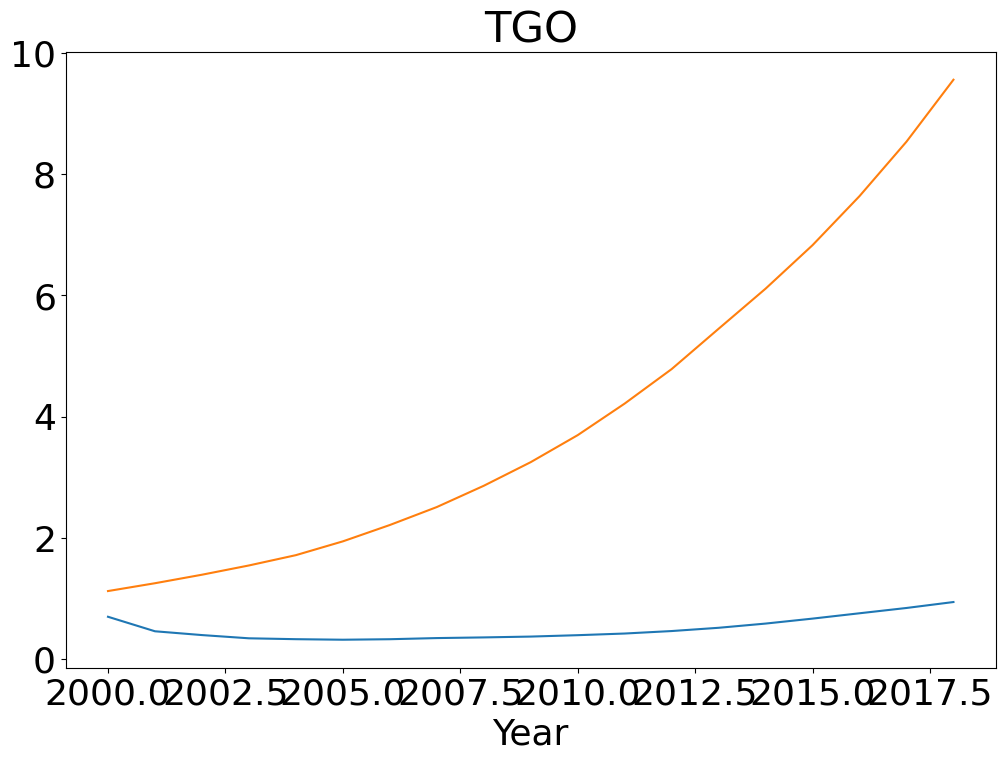

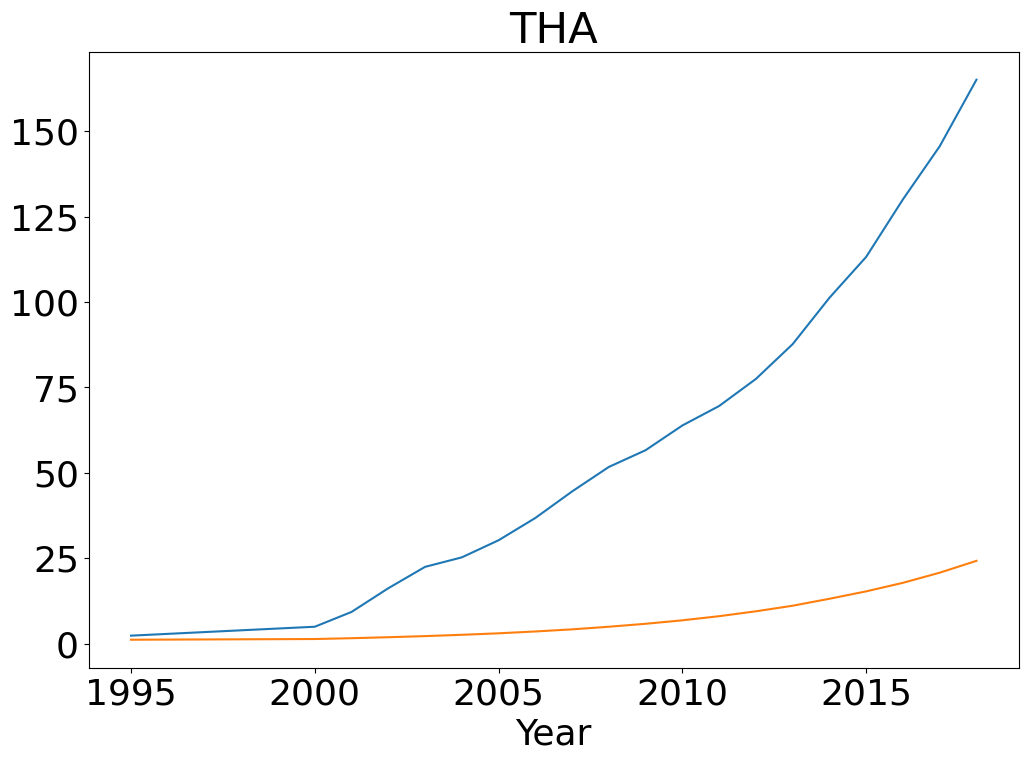

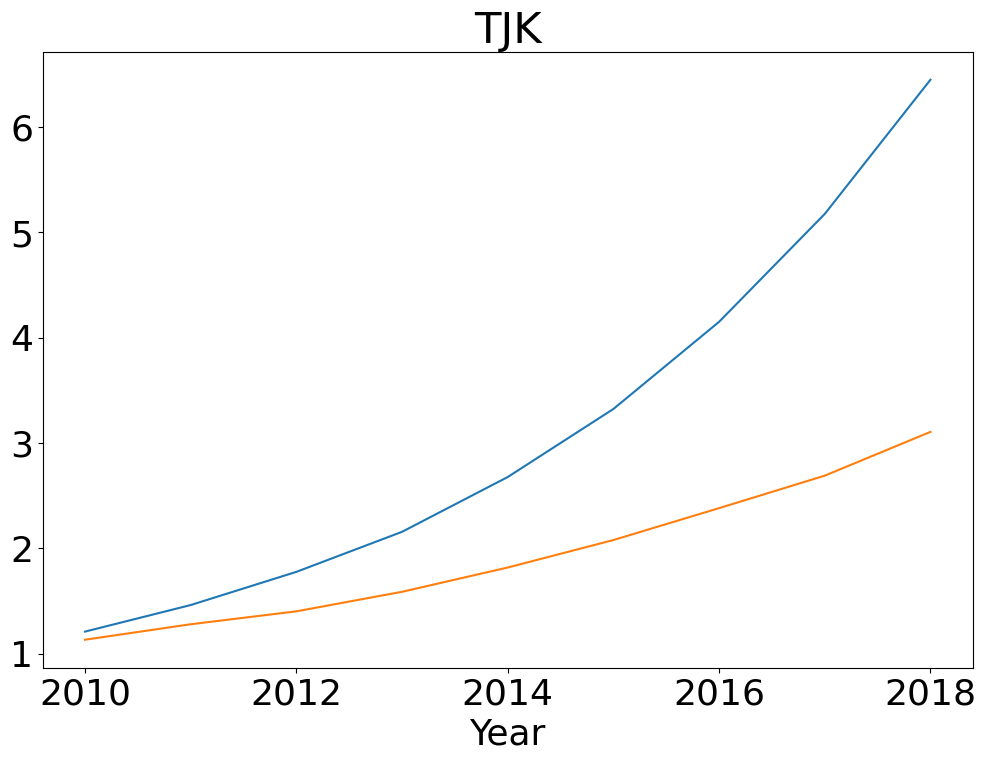

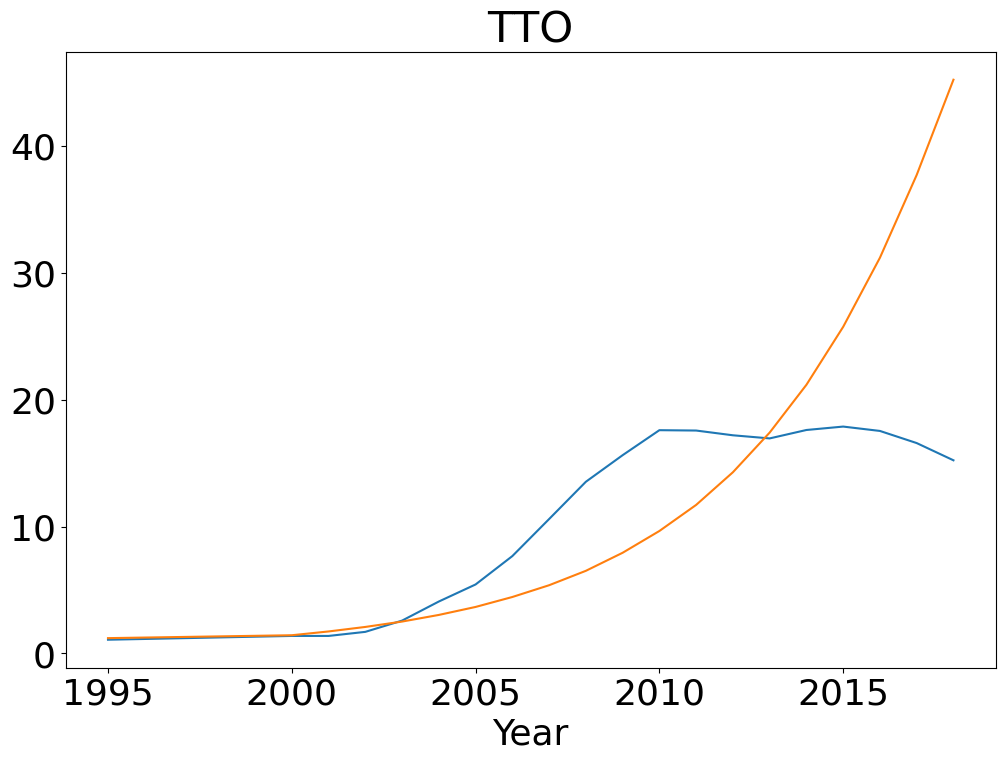

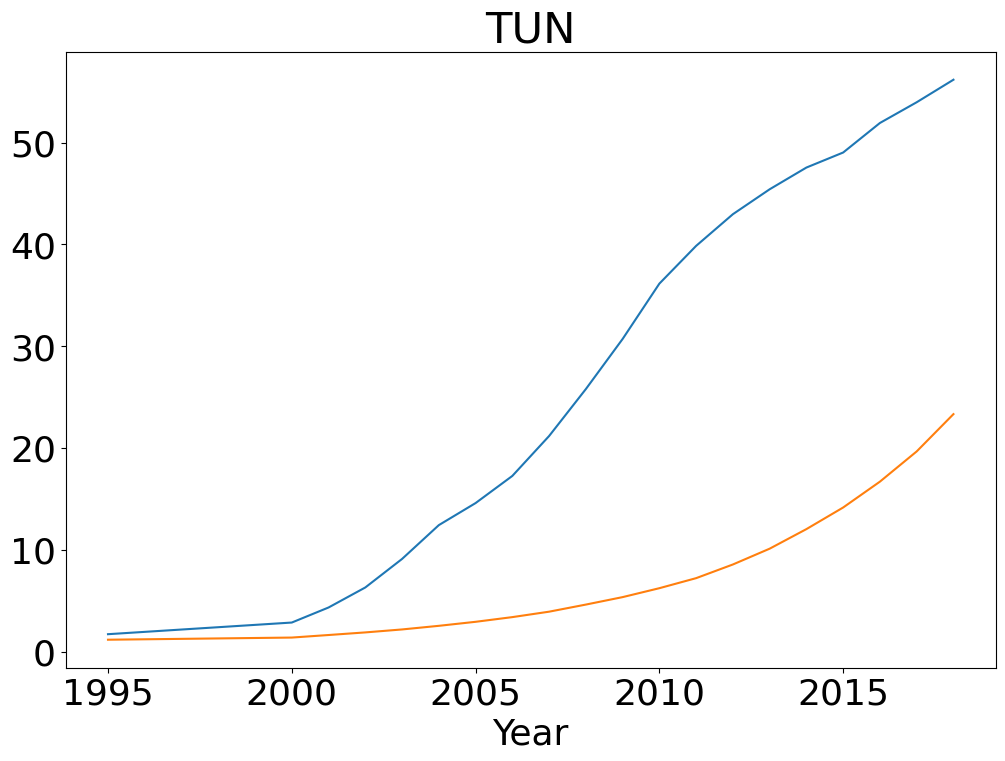

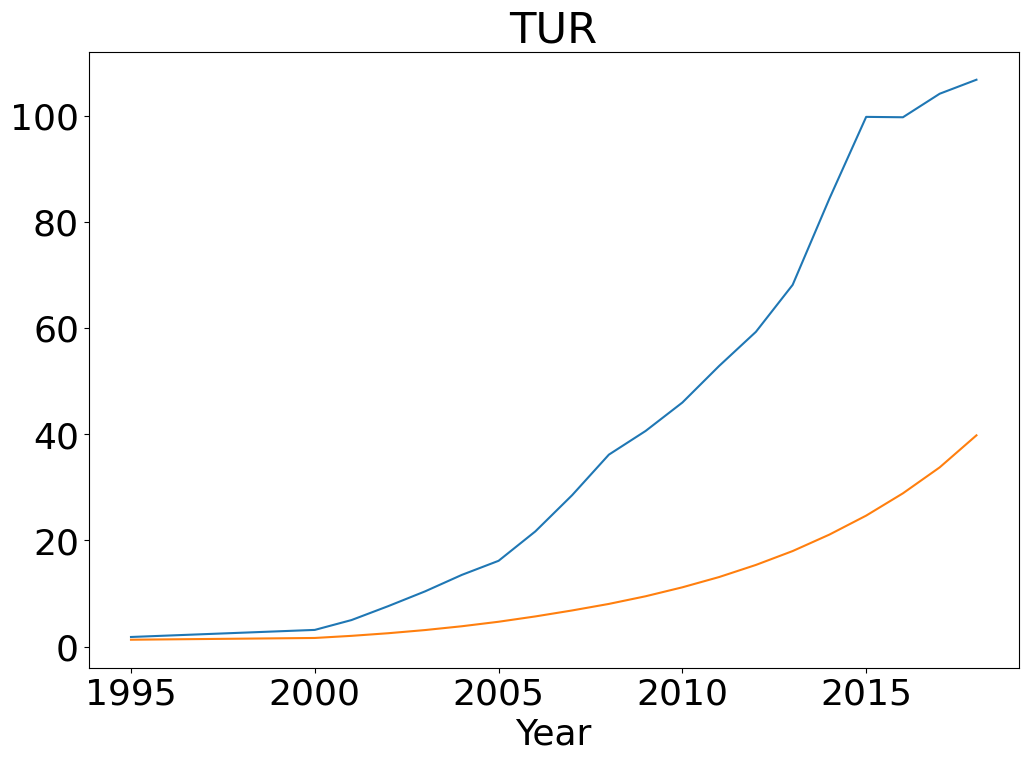

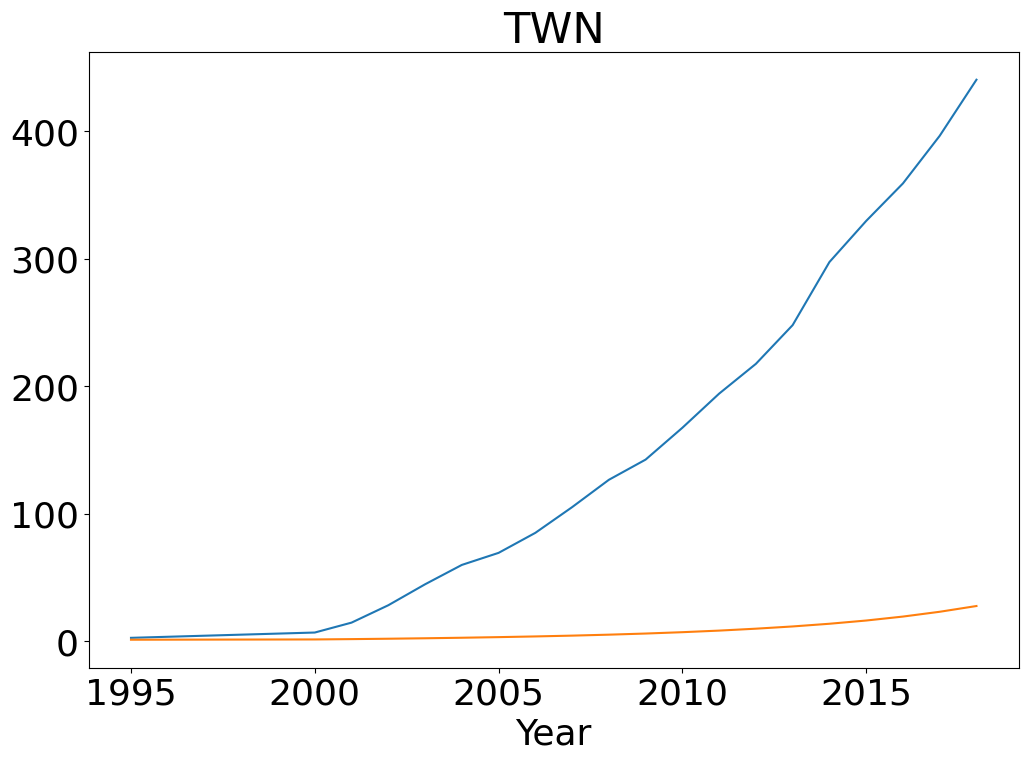

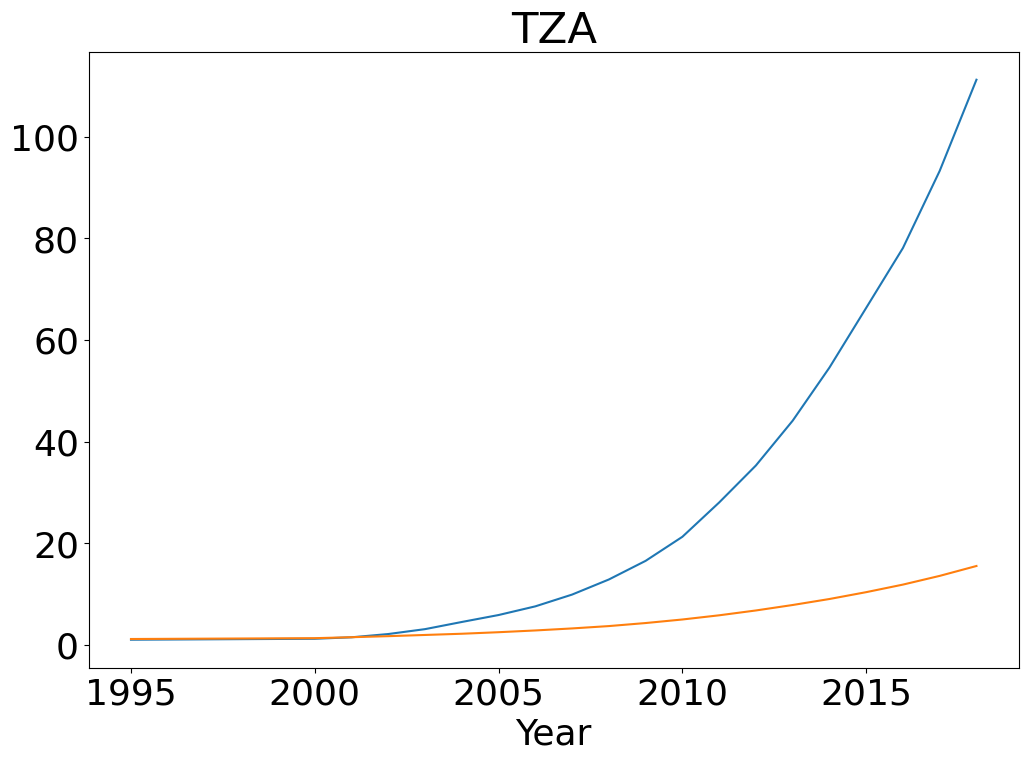

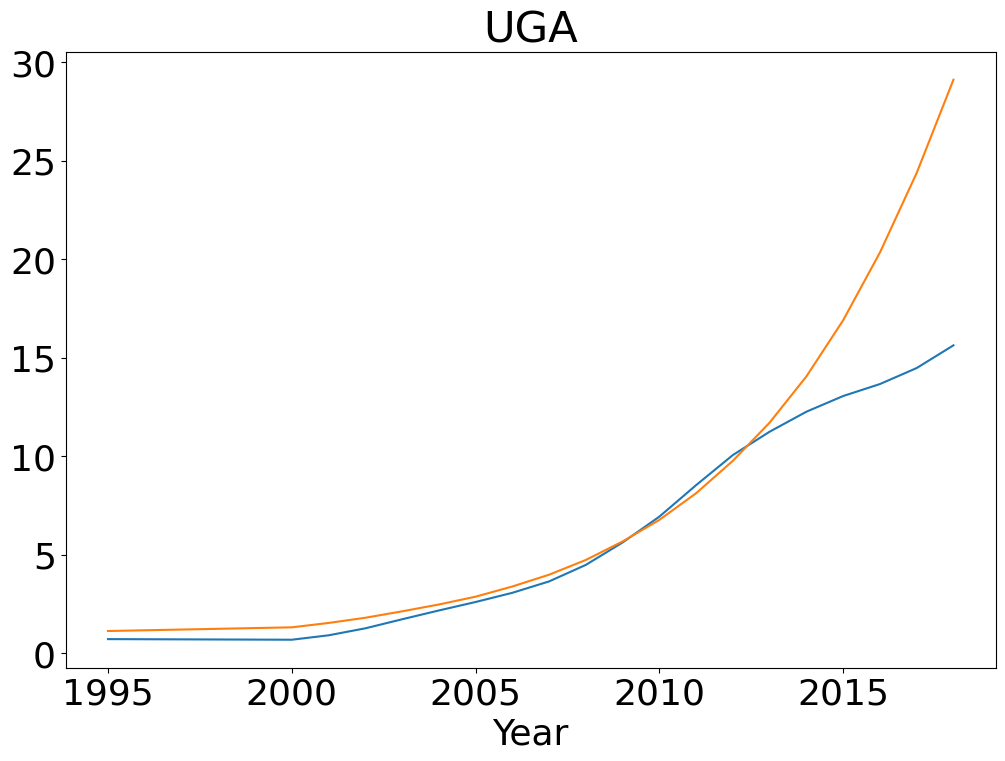

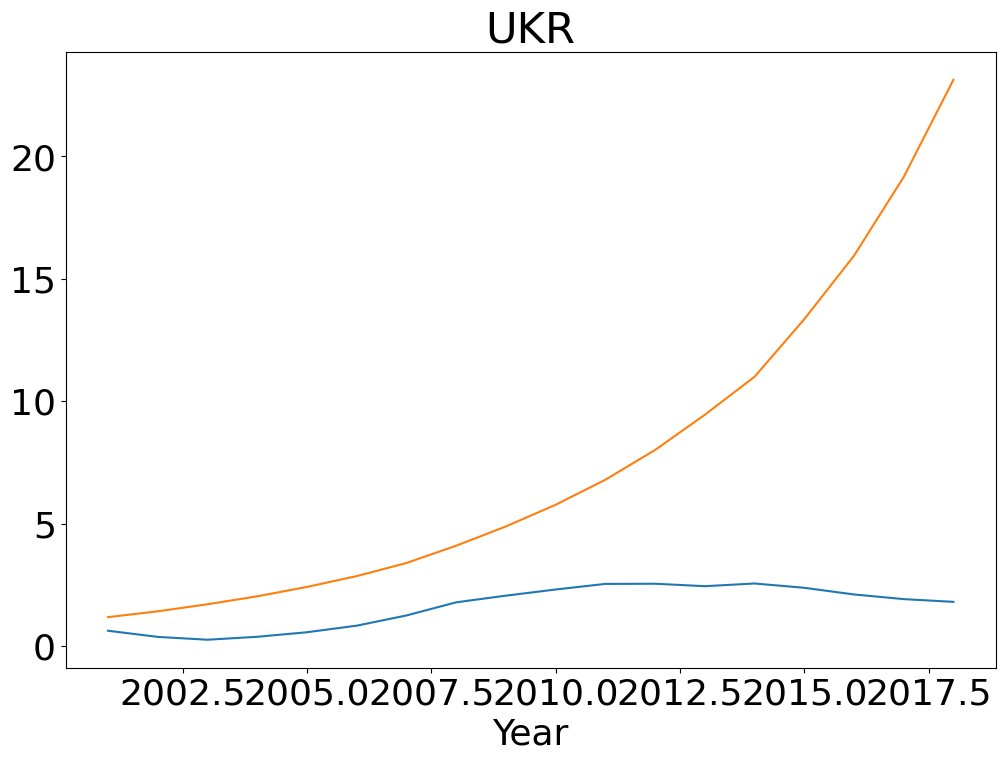

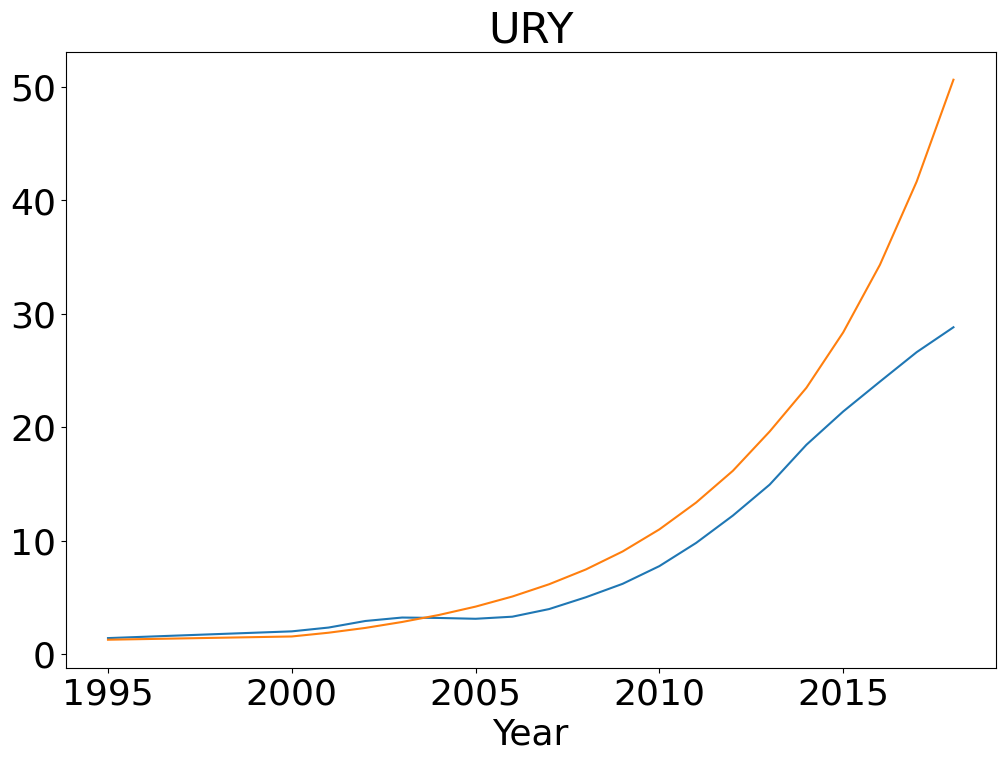

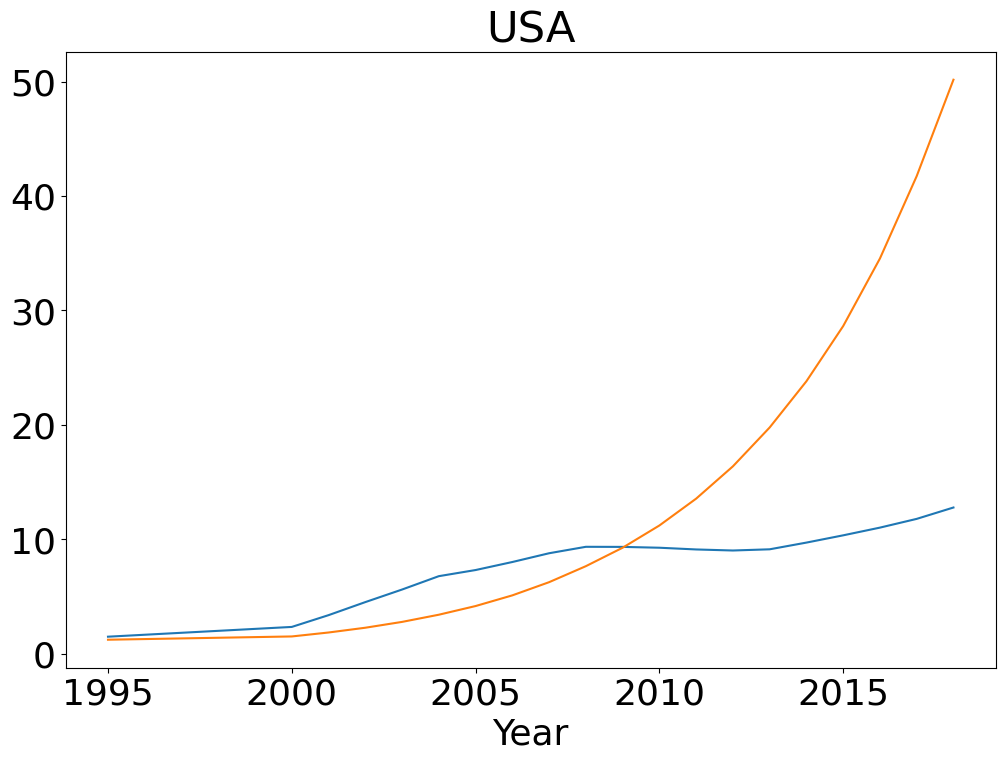

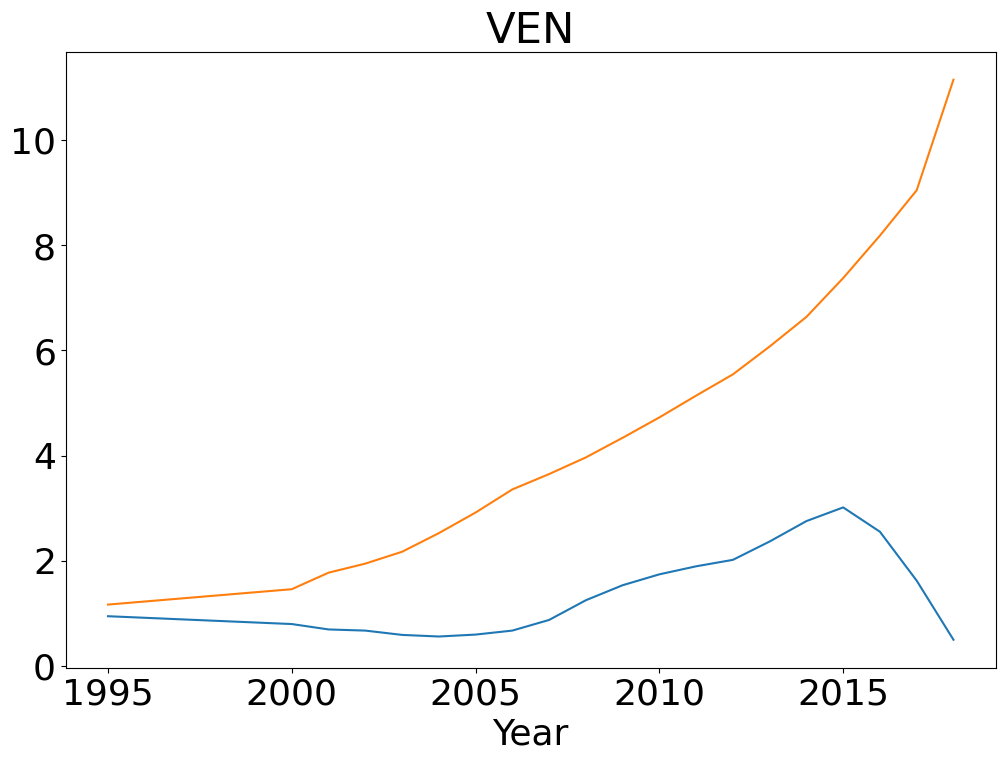

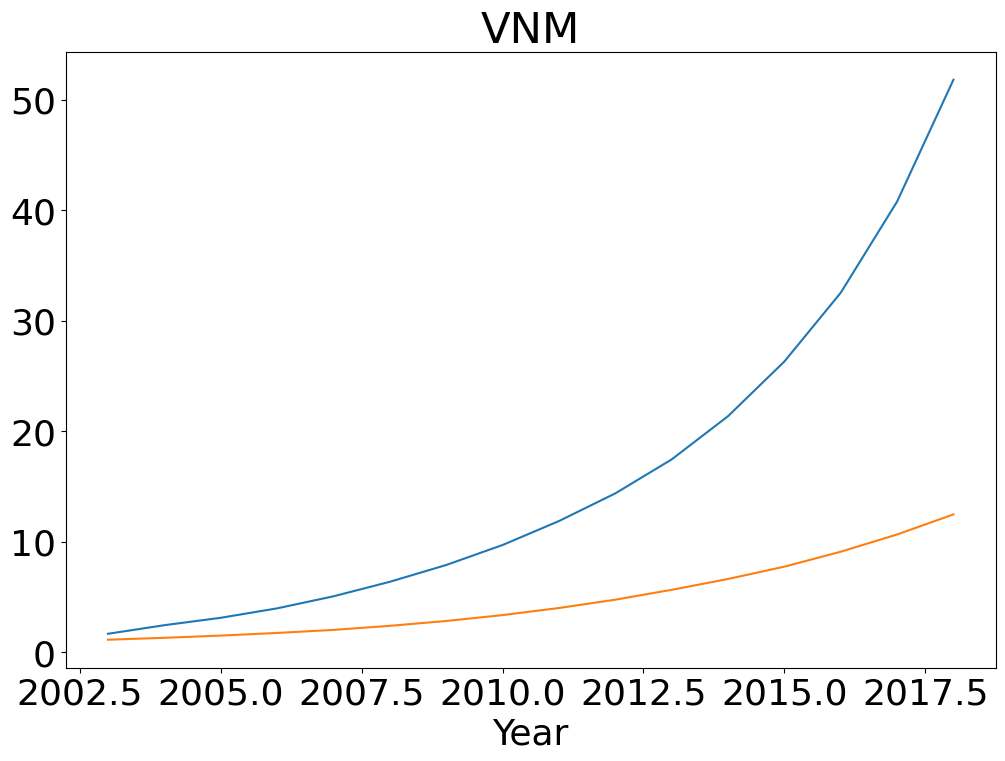

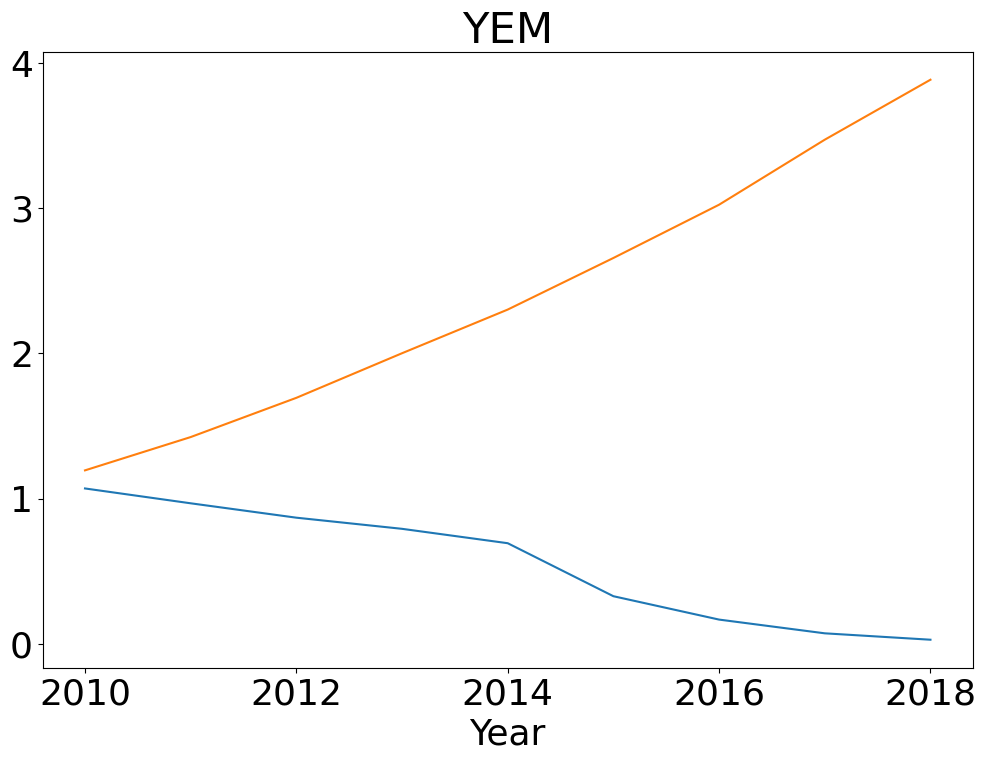

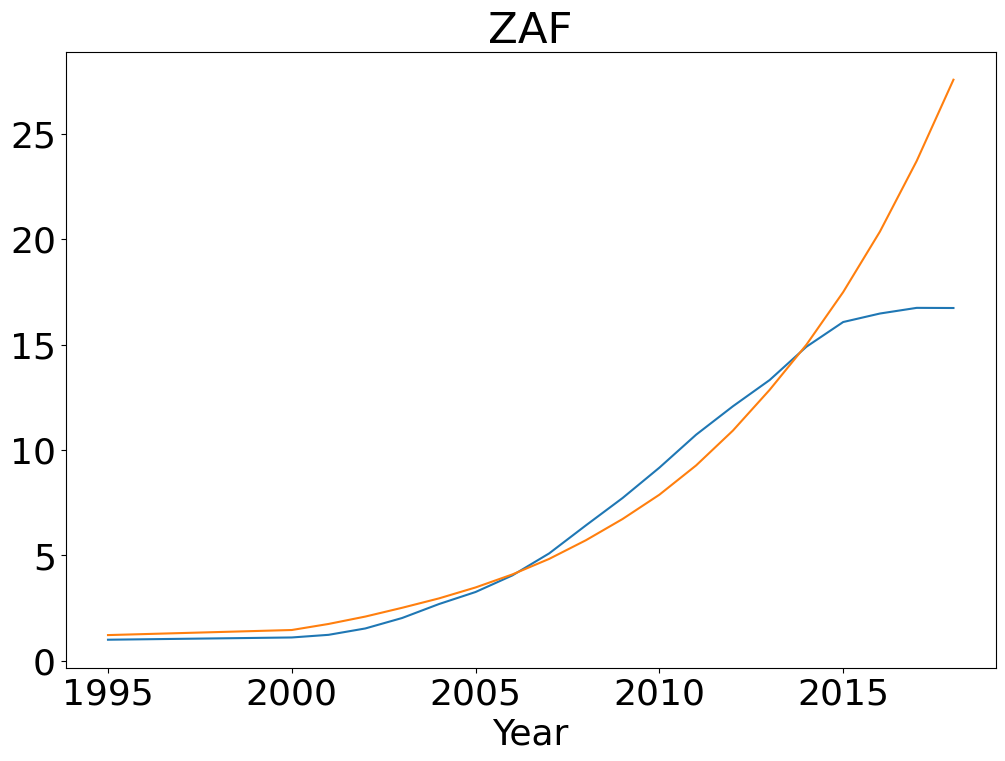

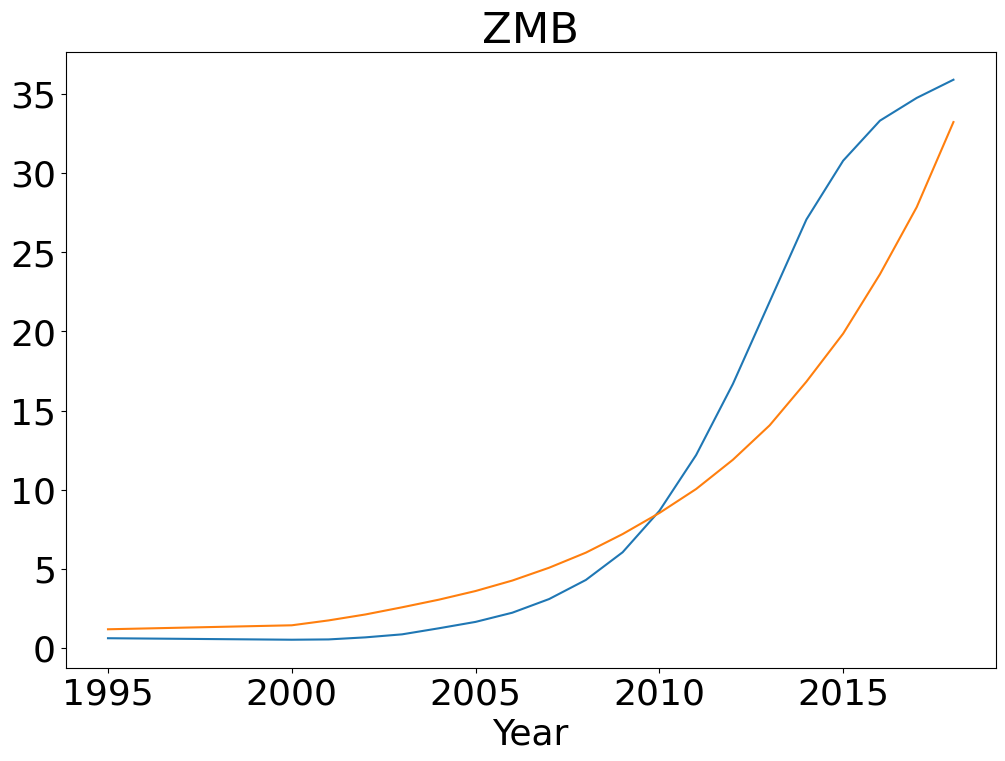

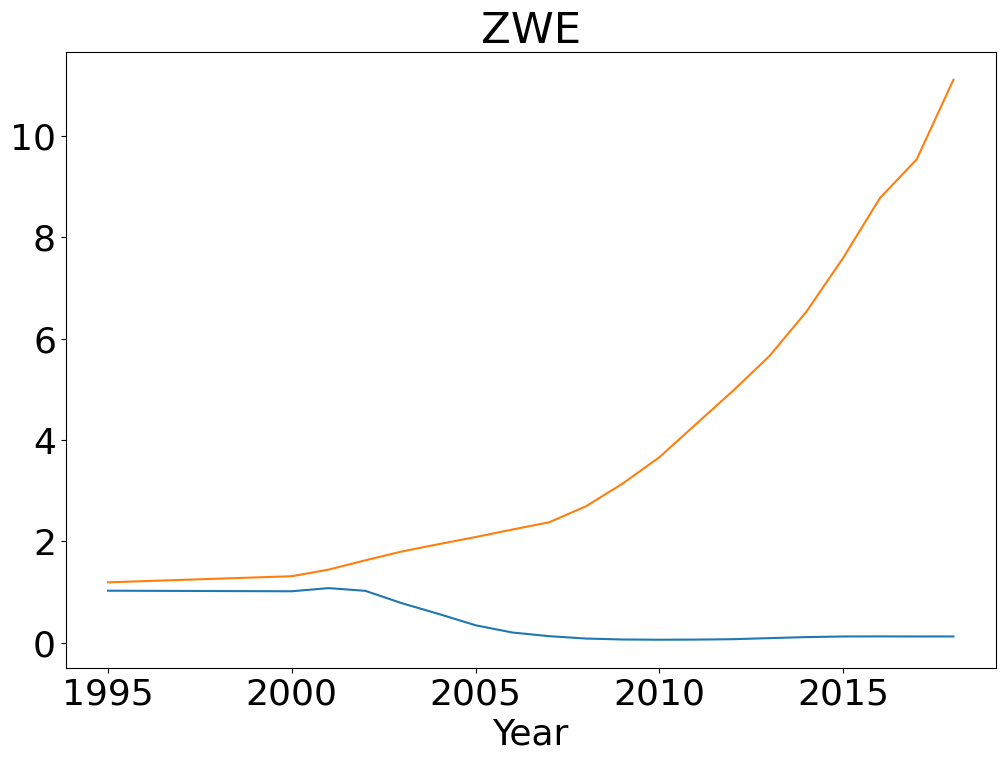

In [47]:
for country in countries:
    fig, ax = plt.subplots(figsize = (12,8))
    plot_data[y_var + ["Predictor"]].loc[country].cumprod().plot.line(ax = ax, legend = False)
    ax.set_title(country)
    plt.plot()

In [48]:
reg_data["RGDP Per Capita Lag"] = reg_data["RGDP Per Capita"].groupby("ISO_Code_3").shift(years_diff) 
x_vars.append("RGDP Per Capita Lag")
r_data = reg_data.dropna()
y = r_data.dropna(axis = 0, how = "any")[y_var]
X = r_data.dropna(axis = 0, how = "any")[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_data["Predictor"] = results.predict()

C:\Users\hthog\AppData\Local\Temp\ipykernel_7688\3121657441.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data["Predictor"] = results.predict()


In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     44.02
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           2.53e-43
Time:                        12:48:08   Log-Likelihood:                 922.90
No. Observations:                2127   AIC:                            -1834.
Df Residuals:                    2121   BIC:                            -1800.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Legal System and Property Rights    -0.0178      0.003     -5.605      0.000      -0.024      -0.012
Sound Money                         -0.0234      0.004     -6.404      0.000      -0.031      -0.016
Freedom to Trade Internationally     0.0217      0.004      4.918      0.000       0.013       0.030
Regulation                           0.0248      0.005      5.174      0.000       0.015       0.034
RGDP Per Capita Lag                  0.1386      0.012     11.515      0.000       0.115       0.162
Constant                             0.0718      0.024      2.963      0.003       0.024       0.119
==============================================================================
Omnibus:                      436.755   Durbin-Watson:                   0.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7560.580
Skew:                          -0.476   Prob(JB):                         0.00
Kurtosis:                      12.187   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\hthog\AppData\Local\Temp\ipykernel_7688\2375389319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data["Residuals"] = results.resid


<AxesSubplot: ylabel='Frequency'>

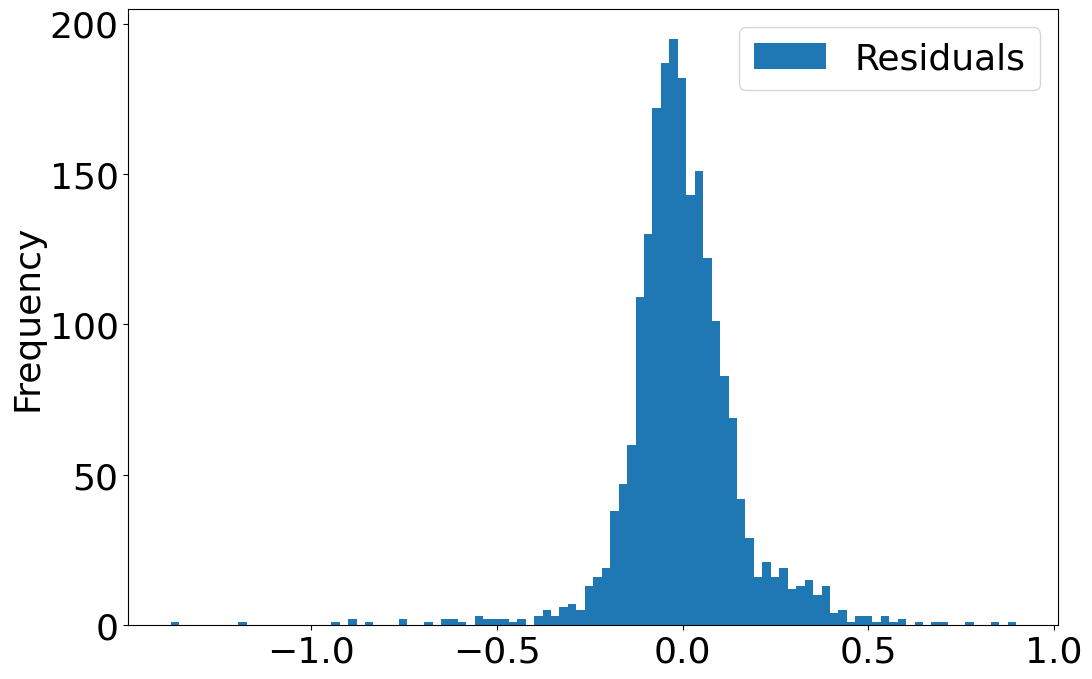

In [50]:
r_data["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))
r_data[["Residuals"]].plot.hist(bins = 100, ax = ax)

In [51]:
betaEstimates = results.params
tStats = results.tvalues
pValues = results.pvalues
stdErrors = results.bse

resultsDict = {"Beta Estimates" : betaEstimates,
              "t-stats":tStats,
              "p-values":pValues,
              "Standard Errors":stdErrors}
resultsDF = pd.DataFrame(resultsDict)
resultsDF.round(3)

Beta Estimates  t-stats  p-values  \
Legal System and Property Rights          -0.018   -5.605     0.000   
Sound Money                               -0.023   -6.404     0.000   
Freedom to Trade Internationally           0.022    4.918     0.000   
Regulation                                 0.025    5.174     0.000   
RGDP Per Capita Lag                        0.139   11.515     0.000   
Constant                                   0.072    2.963     0.003   

                                  Standard Errors  
Legal System and Property Rights            0.003  
Sound Money                                 0.004  
Freedom to Trade Internationally            0.004  
Regulation                                  0.005  
RGDP Per Capita Lag                         0.012  
Constant                                    0.024

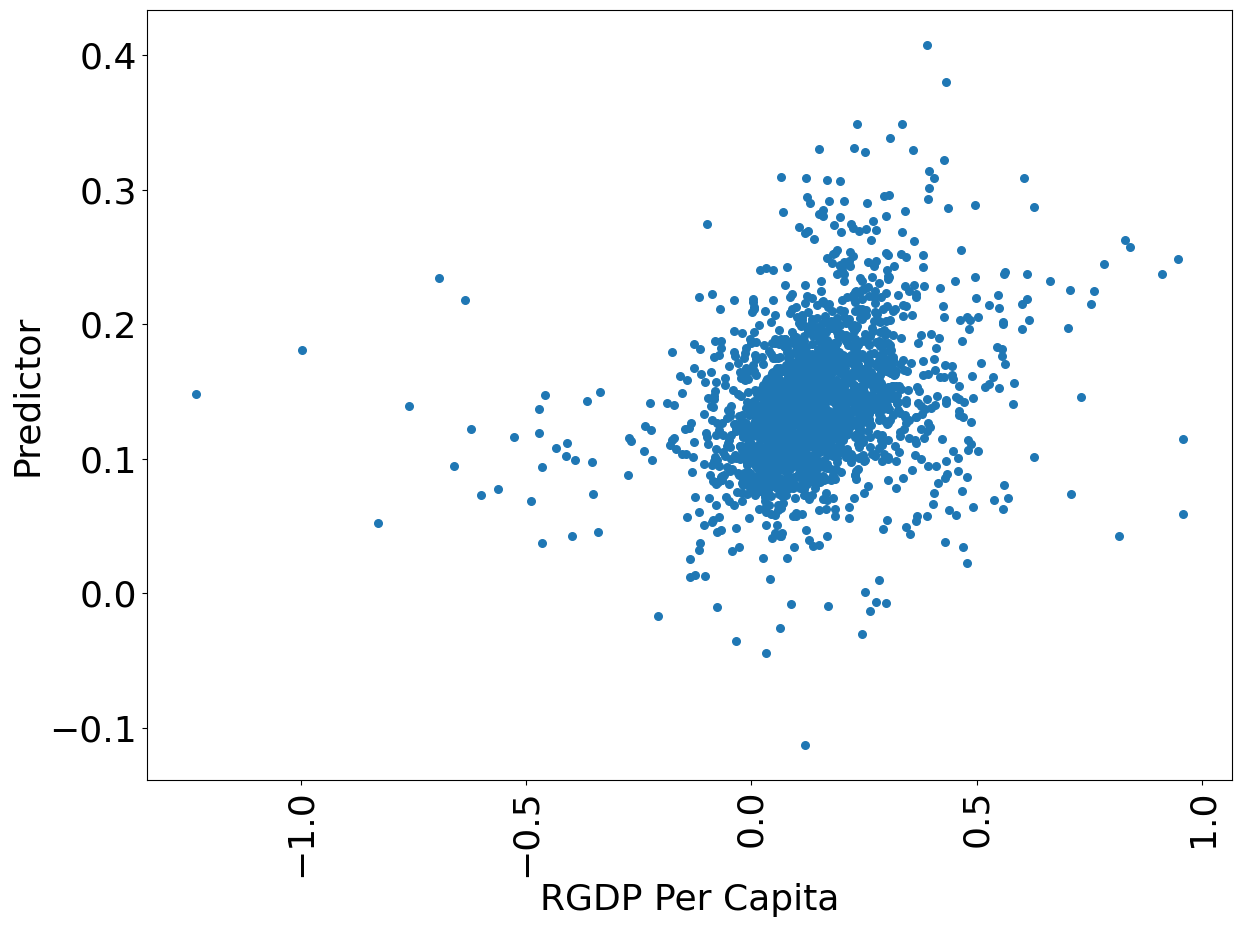

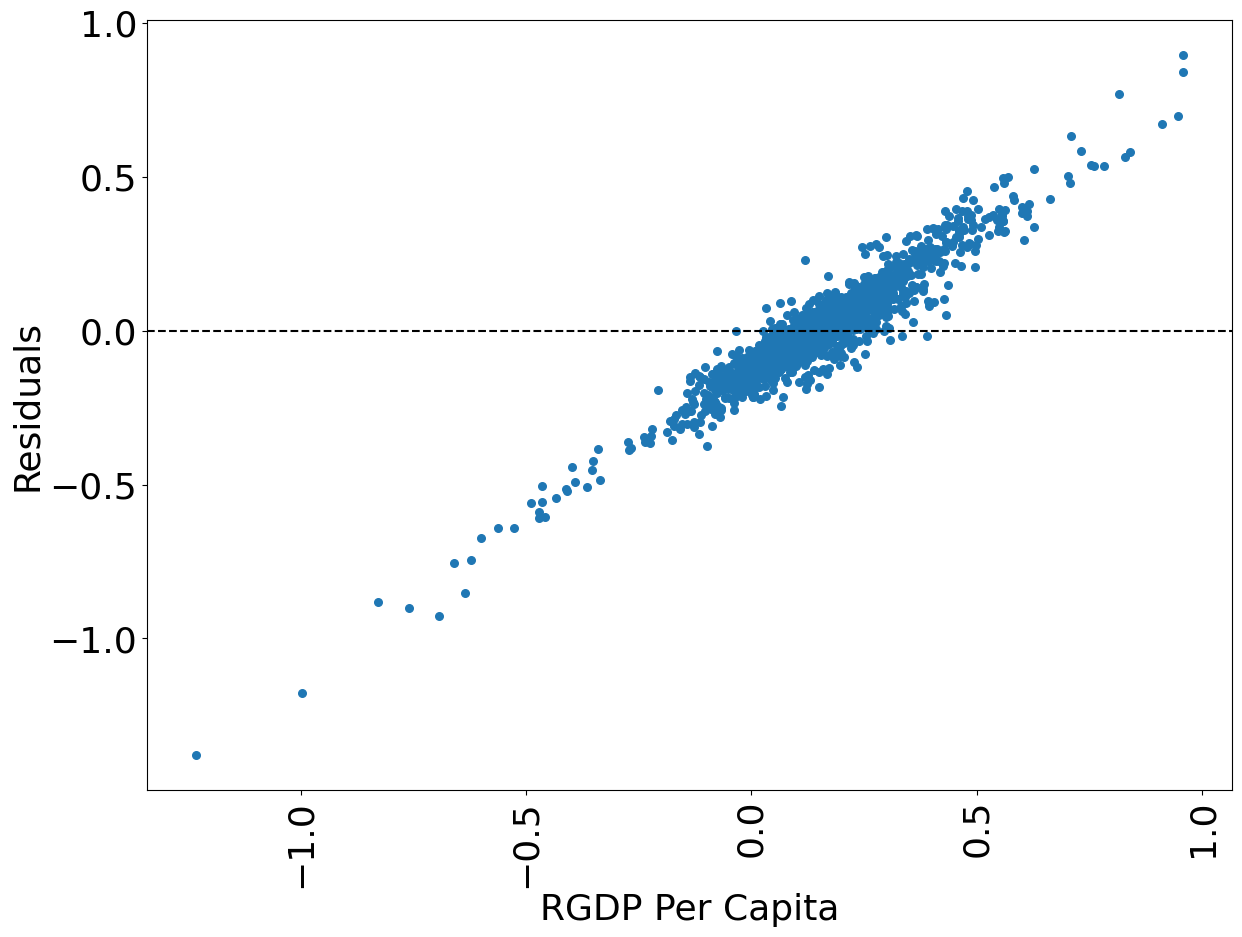

In [52]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = y_var[0],
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = y_var[0],
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()